# Coursera Capstone Week 2

## Import Library and Data from Week 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('Location_Data_SG.csv')
df = df.sort_values('cat_name').reset_index(drop = True)
df.head()

name       lat         lng  \
0                                           POSB ATM  1.300509  103.801128   
1           Singapore Airlines (SQ) Check-in Counter  1.355438  103.985661   
2  Singapore Changi Airport (SIN) (Singapore Chan...  1.353767  103.987849   
3                 SIA SilverKris Lounge (Terminal 3)  1.354745  103.985215   
4  Singapore Airlines First Class Check-In Reception  1.355134  103.986732   

         cat_name   cat_pluralname cat_shortname           cat_summary  \
0             ATM             ATMs           ATM  This spot is popular   
1         Airport         Airports       Airport  This spot is popular   
2         Airport         Airports       Airport  This spot is popular   
3  Airport Lounge  Airport Lounges        Lounge  This spot is popular   
4  Airport Lounge  Airport Lounges        Lounge  This spot is popular   

  cat_summary_type           cat_reasonName    station_name station_type  \
0          general  globalInteractionReason    Commonwealth          MRT   
1          general  globalInteractionReason  Changi Airport          MRT   
2          general  globalInteractionReason  Changi Airport          MRT   
3          general  globalInteractionReason  Changi Airport          MRT   
4          general  globalInteractionReason  Changi Airport          MRT   

   station_lat  station_lng  
0     1.302439   103.798326  
1     1.357622   103.988487  
2     1.357622   103.988487  
3     1.357622   103.988487  
4     1.357622   103.988487

### Clean up some text

In [3]:
df.drop(['cat_pluralname','cat_shortname'],axis = 1,inplace = True)
for i in df.columns:
    try:
        df[i] = df[i].str.lower().str.replace('café','cafe')
    except:
        pass
for i in df.index :
    if df.loc[i,'cat_name'][-1] == 's':
        df.loc[i,'cat_name'] = df.loc[i,'cat_name'][:-1]
df.head()

name       lat         lng  \
0                                           posb atm  1.300509  103.801128   
1           singapore airlines (sq) check-in counter  1.355438  103.985661   
2  singapore changi airport (sin) (singapore chan...  1.353767  103.987849   
3                 sia silverkris lounge (terminal 3)  1.354745  103.985215   
4  singapore airlines first class check-in reception  1.355134  103.986732   

         cat_name           cat_summary cat_summary_type  \
0             atm  this spot is popular          general   
1         airport  this spot is popular          general   
2         airport  this spot is popular          general   
3  airport lounge  this spot is popular          general   
4  airport lounge  this spot is popular          general   

            cat_reasonName    station_name station_type  station_lat  \
0  globalinteractionreason    commonwealth          mrt     1.302439   
1  globalinteractionreason  changi airport          mrt     1.357622   
2  globalinteractionreason  changi airport          mrt     1.357622   
3  globalinteractionreason  changi airport          mrt     1.357622   
4  globalinteractionreason  changi airport          mrt     1.357622   

   station_lng  
0   103.798326  
1   103.988487  
2   103.988487  
3   103.988487  
4   103.988487

## First Visualize what kind of place in SG

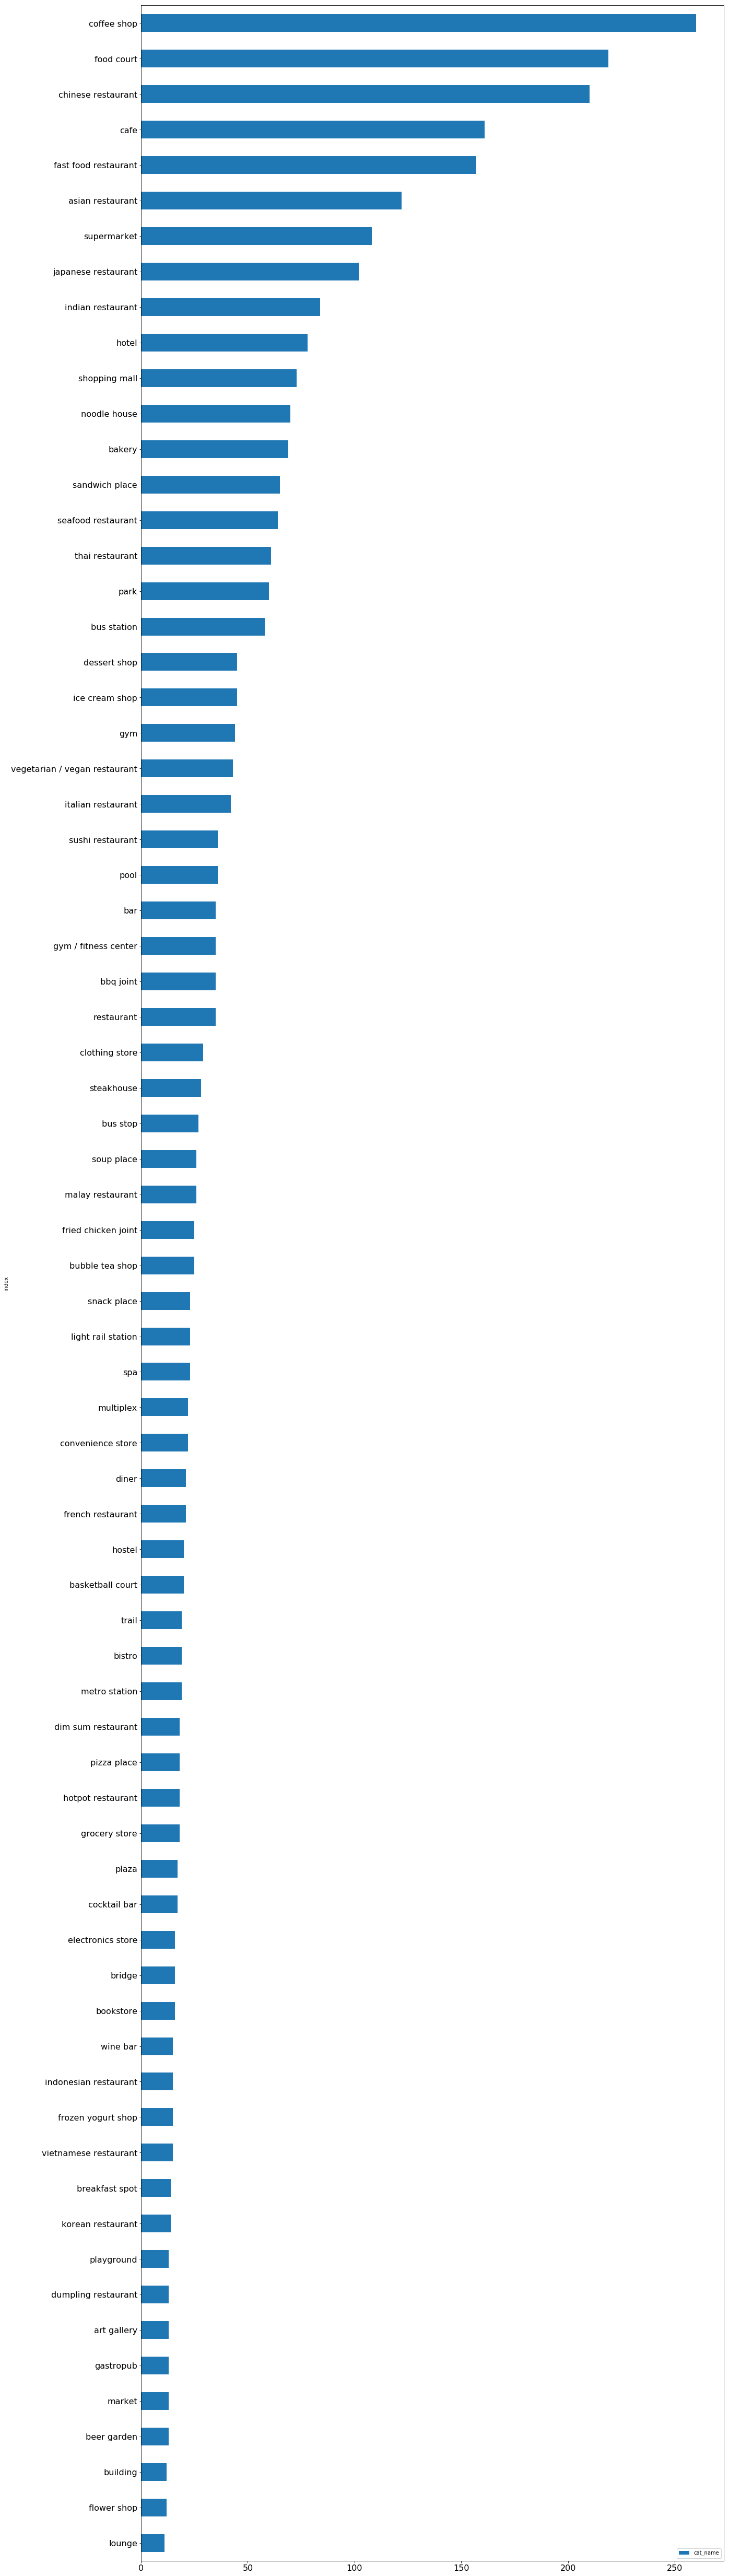

In [4]:
name_new = df['cat_name'].value_counts().to_frame().reset_index()
for i in name_new.index:
    if name_new.loc[:i,'cat_name'].sum() >= name_new.cat_name.sum()*0.8 :
        break
name_new[0:i].sort_values('cat_name').plot(x = 'index',kind = 'barh',figsize =(20,90),fontsize=16)
plt.show()

## Extract more information from cat_name

In [87]:
name_new = df['cat_name'].value_counts().to_frame().reset_index()
NB_set = name_new.copy()
for i in ['/','(',')','&'] :
    NB_set['index'] = NB_set['index'].str.replace(i,' ')
NB_set = NB_set['index'].str.split(' ',expand = True)

name_new = pd.concat([name_new,NB_set],axis = 1)
name_new.head()

index  cat_name        0           1           2     3  \
0           coffee shop       260   coffee        shop        None  None   
1            food court       219     food       court        None  None   
2    chinese restaurant       210  chinese  restaurant        None  None   
3                  cafe       161     cafe        None        None  None   
4  fast food restaurant       157     fast        food  restaurant  None   

      4     5     6     7  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  
3  None  None  None  None  
4  None  None  None  None

In [88]:
new_ab = pd.Series()
for i in NB_set.columns:
    new_ab = new_ab.append(NB_set[i])

new_ab = pd.DataFrame(new_ab).groupby(0).count().reset_index()
new_ab = new_ab[(new_ab[0] != '')&(new_ab[0].notnull())]
new_ab.head()

0
1    airport
2      alley
3   american
4  apartment
5     arcade

In [89]:
df_cluster = name_new.copy()

cluster_name = list()
loop_j = list(df_cluster.drop(['index','cat_name'],axis = 1).columns)
for i in new_ab[0]:
    try :
        df_cluster[i] = 0        
        for j in loop_j:
            df_cluster[i] += (df_cluster[j] == i)
        df_cluster[i] = df_cluster[i]*df_cluster['cat_name']
        cluster_name.append(i)
    except :
        pass
df_cluster = df_cluster.drop(loop_j,axis = 1)

#cluster_col = df_cluster.drop(['PostalCode', 'Borough', 'Neighborhood'],axis =1).columns
df_cluster.sort_values('index').head()

index  cat_name  airport  alley  american  apartment  \
200              airport         2        2      0         0          0   
202       airport lounge         2        2      0         0          0   
84   american restaurant        10        0      0        10          0   
212               arcade         2        0      0         0          0   
65           art gallery        13        0      0         0          0   

     arcade  area  arena  aristocrat  ...  warehouse  water  waterfall  \
200       0     0      0           0  ...          0      0          0   
202       0     0      0           0  ...          0      0          0   
84        0     0      0           0  ...          0      0          0   
212       2     0      0           0  ...          0      0          0   
65        0     0      0           0  ...          0      0          0   

     waterfront  whisky  wine  wings  yoga  yogurt  zoo  
200           0       0     0      0     0       0    0  
202           0       0     0      0     0       0    0  
84            0       0     0      0     0       0    0  
212           0       0     0      0     0       0    0  
65            0       0     0      0     0       0    0  

[5 rows x 338 columns]

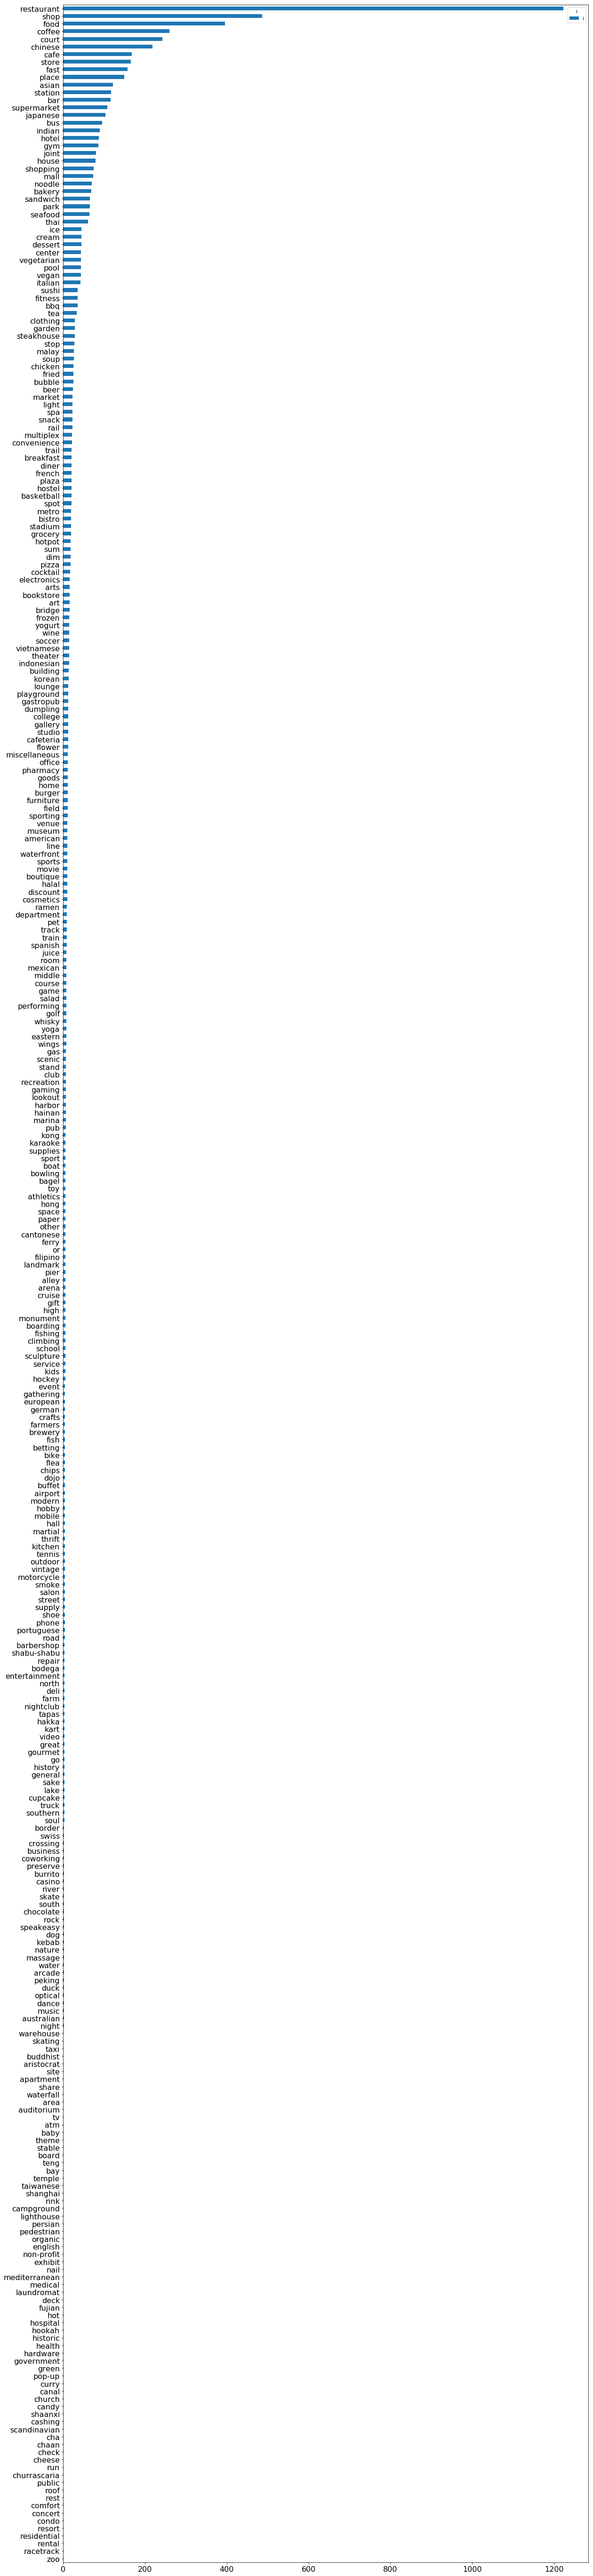

In [90]:
df_cluster['i'] = 'i'
df_cluster = df_cluster.set_index('index')
df_cluster.drop('cat_name',axis = 1).groupby('i').sum().T.sort_values('i').plot(kind = 'barh',figsize = (20,120),fontsize = 16)

### For grouping, Some Function may not clear or could have different meaning as listed ;
 1. shop
 2. court
 3. place
 4. joint
 5. house
 6. bakery
 7. steakhouse
 8. Garden

**Def function to Check**

In [9]:
def check_rr(check_r):
    relate_c = df_cluster[df_cluster[check_r] >= 1]

    loop_i = list(relate_c.drop(check_r,axis = 1).columns[2:])

    relate_c2 = relate_c.drop(loop_i,axis = 1)

    for i in loop_i:
        if relate_c[i].sum() == 0:
            pass
        else :
            relate_c2[i] = relate_c[i]

    return relate_c2   

*Using Table format for copy and paste

#### SHOP

In [10]:
check_rr('shop')

cat_name  airport  shop  bagel  betting  board  bubble  \
index                                                                         
coffee shop               260        0   260      0        0      0       0   
dessert shop               45        0    45      0        0      0       0   
ice cream shop             45        0    45      0        0      0       0   
bubble tea shop            25        0    25      0        0      0      25   
frozen yogurt shop         15        0    15      0        0      0       0   
flower shop                12        0    12      0        0      0       0   
miscellaneous shop         11        0    11      0        0      0       0   
sporting goods shop        11        0    11      0        0      0       0   
cosmetics shop             10        0    10      0        0      0       0   
bagel shop                  6        0     6      6        0      0       0   
gift shop                   5        0     5      0        0      0       0   
hobby shop                  4        0     4      0        0      0       0   
mobile phone shop           4        0     4      0        0      0       0   
fish & chips shop           4        0     4      0        0      0       0   
smoke shop                  4        0     4      0        0      0       0   
motorcycle shop             4        0     4      0        0      0       0   
betting shop                4        0     4      0        4      0       0   
gourmet shop                3        0     3      0        0      0       0   
other repair shop           3        0     3      0        0      0       0   
cupcake shop                3        0     3      0        0      0       0   
chocolate shop              2        0     2      0        0      0       0   
optical shop                2        0     2      0        0      0       0   
pop-up shop                 1        0     1      0        0      0       0   
board shop                  1        0     1      0        0      1       0   
cheese shop                 1        0     1      0        0      0       0   
shop & service              1        0     1      0        0      0       0   

                     cheese  chips  chocolate  ...  other  phone  pop-up  \
index                                          ...                         
coffee shop               0      0          0  ...      0      0       0   
dessert shop              0      0          0  ...      0      0       0   
ice cream shop            0      0          0  ...      0      0       0   
bubble tea shop           0      0          0  ...      0      0       0   
frozen yogurt shop        0      0          0  ...      0      0       0   
flower shop               0      0          0  ...      0      0       0   
miscellaneous shop        0      0          0  ...      0      0       0   
sporting goods shop       0      0          0  ...      0      0       0   
cosmetics shop            0      0          0  ...      0      0       0   
bagel shop                0      0          0  ...      0      0       0   
gift shop                 0      0          0  ...      0      0       0   
hobby shop                0      0          0  ...      0      0       0   
mobile phone shop         0      0          0  ...      0      4       0   
fish & chips shop         0      4          0  ...      0      0       0   
smoke shop                0      0          0  ...      0      0       0   
motorcycle shop           0      0          0  ...      0      0       0   
betting shop              0      0          0  ...      0      0       0   
gourmet shop              0      0          0  ...      0      0       0   
other repair shop         0      0          0  ...      3      0       0   
cupcake shop              0      0          0  ...      0      0       0   
chocolate shop            0      0          2  ...      0      0       0   
optical shop              0      0          0  ...      0   

Some shop like coffee shop, ice cream shop are not shops  
They are actually cafe.

In [11]:
not_shop = ['coffee shop','ice cream shop','dessert shop','bubble tea shop','frozen yogurt shop']
for i in not_shop :
    df_cluster.loc[i,'shop'] = 0
    df_cluster.loc[i,'cafe'] = df_cluster.loc[i,'cat_name']

#### COURT

In [12]:
check_rr('court')

cat_name  airport  court  basketball  food  tennis  i
index                                                                  
food court             219        0    219           0   219       0  i
basketball court        20        0     20          20     0       0  i
tennis court             4        0      4           0     0       4  i

food court should be a restaurant

In [13]:
not_shop = ['food court']
for i in not_shop :
    df_cluster.loc[i,'court'] = 0
    df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']

#### PLACE

In [14]:
check_rr('place')

cat_name  airport  place  breakfast  burrito  \
index                                                                   
sandwich place                 65        0     65          0        0   
soup place                     26        0     26          0        0   
snack place                    23        0     23          0        0   
pizza place                    18        0     18          0        0   
salad place                     8        0      8          0        0   
chinese breakfast place         7        0      7          7        0   
burrito place                   2        0      2          0        2   

                         chinese  pizza  salad  sandwich  snack  soup  i  
index                                                                     
sandwich place                 0      0      0        65      0     0  i  
soup place                     0      0      0         0      0    26  i  
snack place                    0      0      0         0     23     0  i  
pizza place                    0     18      0         0      0     0  i  
salad place                    0      0      8         0      0     0  i  
chinese breakfast place        7      0      0         0      0     0  i  
burrito place                  0      0      0         0      0     0  i

In [15]:
not_shop = list(check_rr('place').index)
for i in not_shop :
    df_cluster.loc[i,'place'] = 0
    df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']
not_shop = ['snack place']
for i in not_shop :
    df_cluster.loc[i,'place'] = 0
    df_cluster.loc[i,'cafe'] = df_cluster.loc[i,'cat_name']

All of them except snack place are restaurant  
while snack place  is cafe

#### JOINT

In [16]:
check_rr('joint')

cat_name  airport  joint  bbq  burger  chicken  dog  \
index                                                                      
bbq joint                  35        0     35   35       0        0    0   
fried chicken joint        25        0     25    0       0       25    0   
burger joint               11        0     11    0      11        0    0   
wings joint                 8        0      8    0       0        0    0   
hot dog joint               1        0      1    0       0        0    1   

                     fried  hot  wings  i  
index                                      
bbq joint                0    0      0  i  
fried chicken joint     25    0      0  i  
burger joint             0    0      0  i  
wings joint              0    0      8  i  
hot dog joint            0    1      0  i

All of them are restaurant

In [17]:
not_shop = list(check_rr('joint').index)
for i in not_shop :
    df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']


#### HOUSE

In [18]:
check_rr('house')

cat_name  airport  house  boarding  club  noodle  i
index                                                              
noodle house          70        0     70         0     0      70  i
boarding house         5        0      5         5     0       0  i
club house             4        0      4         0     4       0  i

noodle house is restaurant

In [19]:
not_shop = ['noodle house']
for i in not_shop :
    df_cluster.loc[i,'house'] = 0
    df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']


#### BAKERY

In [20]:
check_rr('bakery')

cat_name  airport  bakery  i
index                               
bakery        69        0      69  i

bakery should have store

In [21]:
i = 'bakery'
df_cluster.loc[i,'store'] = df_cluster.loc[i,'cat_name']

#### STEAKHOUSE

In [22]:
check_rr('steakhouse')

cat_name  airport  steakhouse  i
index                                       
steakhouse        28        0          28  i

steakhouse is restaurant

In [23]:
i = 'steakhouse'
df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']

#### FOOD

In [24]:
check_rr('food')

cat_name  airport  food  comfort  fast  \
index                                                                     
food court                            219        0   219        0     0   
fast food restaurant                  157        0   157        0   157   
food stand                              6        0     6        0     0   
street food gathering                   4        0     4        0     0   
southern / soul food restaurant         3        0     3        0     0   
food truck                              3        0     3        0     0   
food                                    2        0     2        0     0   
comfort food restaurant                 1        0     1        1     0   
health food store                       1        0     1        0     0   

                                 gathering  health  restaurant  soul  \
index                                                                  
food court                               0       0         219     0   
fast food restaurant                     0       0         157     0   
food stand                               0       0           0     0   
street food gathering                    4       0           0     0   
southern / soul food restaurant          0       0           3     3   
food truck                               0       0           0     0   
food                                     0       0           0     0   
comfort food restaurant                  0       0           1     0   
health food store                        0       1           0     0   

                                 southern  stand  store  street  truck  i  
index                                                                      
food court                              0      0      0       0      0  i  
fast food restaurant                    0      0      0       0      0  i  
food stand                              0      6      0       0      0  i  
street food gathering                   0      0      0       4      0  i  
southern / soul food restaurant         3      0      0       0      0  i  
food truck                              0      0      0       0      3  i  
food                                    0      0      0       0      0  i  
comfort food restaurant                 0      0      0       0      0  i  
health food store                       0      0      1       0      0  i

food stand should have restaurant

In [25]:
not_shop = ['food stand']
for i in not_shop :
    df_cluster.loc[i,'restaurant'] = df_cluster.loc[i,'cat_name']

#### GARDEN

In [26]:
check_rr('garden')

cat_name  airport  garden  beer  center  sculpture  i
index                                                                  
beer garden             13        0      13    13       0          0  i
garden                  10        0      10     0       0          0  i
sculpture garden         4        0       4     0       0          4  i
garden center            1        0       1     0       1          0  i

Beer Garden is not the garden!! It's a bar

In [27]:
not_shop = ['beer garden']
for i in not_shop :
    df_cluster.loc[i,'garden'] = 0
    df_cluster.loc[i,'bar'] = df_cluster.loc[i,'cat_name']

### Other  
Some place like station, bus shouldn't in the list since we already focusing on area around MRT

In [28]:
df_cluster = df_cluster[~df_cluster.index.str.contains('bus')]
df_cluster = df_cluster[~df_cluster.index.str.contains('station')]

Food that have restaurant should don't have Food

In [29]:
for i in list(df_cluster[(df_cluster.index.str.contains('food'))&(df_cluster['restaurant']>0)].index):
    df_cluster.loc[i,'food'] = 0

### Mall is the same as Shopping

In [30]:
check_rr('shopping')

cat_name  airport  shopping  mall  plaza  i
index                                                      
shopping mall         73        0        73    73      0  i
shopping plaza         2        0         2     0      2  i

In [31]:
check_rr('mall')

cat_name  airport  mall  shopping  i
index                                              
shopping mall        73        0    73        73  i

In [32]:
df_cluster = df_cluster.drop('mall',axis = 1)

### Insense Supermarket and Shopping seem to be the same

In [33]:
check_rr('supermarket')

cat_name  airport  supermarket  i
index                                         
supermarket       108        0          108  i

In [34]:
df_cluster.loc['supermarket','shopping'] = df_cluster.loc['supermarket','cat_name']
df_cluster.loc['supermarket','supermarket'] = 0

### Insense Shop and Store seem to be the same

In [35]:
check_rr('shop')

cat_name  airport  shop  bagel  betting  board  cheese  \
index                                                                         
flower shop                12        0    12      0        0      0       0   
miscellaneous shop         11        0    11      0        0      0       0   
sporting goods shop        11        0    11      0        0      0       0   
cosmetics shop             10        0    10      0        0      0       0   
bagel shop                  6        0     6      6        0      0       0   
gift shop                   5        0     5      0        0      0       0   
hobby shop                  4        0     4      0        0      0       0   
mobile phone shop           4        0     4      0        0      0       0   
fish & chips shop           4        0     4      0        0      0       0   
smoke shop                  4        0     4      0        0      0       0   
motorcycle shop             4        0     4      0        0      0       0   
betting shop                4        0     4      0        4      0       0   
gourmet shop                3        0     3      0        0      0       0   
other repair shop           3        0     3      0        0      0       0   
cupcake shop                3        0     3      0        0      0       0   
chocolate shop              2        0     2      0        0      0       0   
optical shop                2        0     2      0        0      0       0   
pop-up shop                 1        0     1      0        0      0       0   
board shop                  1        0     1      0        0      1       0   
cheese shop                 1        0     1      0        0      0       1   
shop & service              1        0     1      0        0      0       0   

                     chips  chocolate  cosmetics  ...  motorcycle  optical  \
index                                             ...                        
flower shop              0          0          0  ...           0        0   
miscellaneous shop       0          0          0  ...           0        0   
sporting goods shop      0          0          0  ...           0        0   
cosmetics shop           0          0         10  ...           0        0   
bagel shop               0          0          0  ...           0        0   
gift shop                0          0          0  ...           0        0   
hobby shop               0          0          0  ...           0        0   
mobile phone shop        0          0          0  ...           0        0   
fish & chips shop        4          0          0  ...           0        0   
smoke shop               0          0          0  ...           0        0   
motorcycle shop          0          0          0  ...           4        0   
betting shop             0          0          0  ...           0        0   
gourmet shop             0          0          0  ...           0        0   
other repair shop        0          0          0  ...           0        0   
cupcake shop             0          0          0  ...           0        0   
chocolate shop           0          2          0  ...           0        0   
optical shop             0          0          0  ...           0        2   
pop-up shop              0          0          0  ...           0        0   
board shop               0          0          0  ...           0        0   
cheese shop              0          0          0  ...           0        0   
shop & service           0          0          0  ...           0        0   

                     other  phone  pop-up  repair  service  smoke  sporting  i  
index                                                                           
flower shop              0      0       0       0        0      0         0  i  
miscellaneous shop       0      0       0       0        0      0         0  i  
sporting goods shop      0      0       0       0        0      0        11  i  
cos

In [36]:
check_rr('store')

cat_name  airport  store  arts  baby  bakery  \
index                                                                         
bakery                               69        0     69     0     0      69   
clothing store                       29        0     29     0     0       0   
convenience store                    22        0     22     0     0       0   
grocery store                        18        0     18     0     0       0   
electronics store                    16        0     16     0     0       0   
furniture / home store               11        0     11     0     0       0   
discount store                       10        0     10     0     0       0   
department store                      9        0      9     0     0       0   
pet store                             8        0      8     0     0       0   
toy / game store                      6        0      6     0     0       0   
paper / office supplies store         6        0      6     0     0       0   
kids store                            5        0      5     0     0       0   
shoe store                            4        0      4     0     0       0   
arts & crafts store                   4        0      4     4     0       0   
kitchen supply store                  4        0      4     0     0       0   
thrift / vintage store                4        0      4     0     0       0   
video game store                      2        0      2     0     0       0   
beer store                            2        0      2     0     0       0   
video store                           1        0      1     0     0       0   
hardware store                        1        0      1     0     0       0   
candy store                           1        0      1     0     0       0   
warehouse store                       1        0      1     0     0       0   
health food store                     1        0      1     0     0       0   
baby store                            1        0      1     0     1       0   

                               beer  candy  clothing  convenience  ...  pet  \
index                                                              ...        
bakery                            0      0         0            0  ...    0   
clothing store                    0      0        29            0  ...    0   
convenience store                 0      0         0           22  ...    0   
grocery store                     0      0         0            0  ...    0   
electronics store                 0      0         0            0  ...    0   
furniture / home store            0      0         0            0  ...    0   
discount store                    0      0         0            0  ...    0   
department store                  0      0         0            0  ...    0   
pet store                         0      0         0            0  ...    8   
toy / game store                  0      0         0            0  ...    0   
paper / office supplies store     0      0         0            0  ...    0   
kids store                        0      0         0            0  ...    0   
shoe store                        0      0         0            0  ...    0   
arts & crafts store               0      0         0            0  ...    0   
kitchen supply store              0      0         0            0  ...    0   
thrift / vintage store            0      0         0            0  ...    0   
video game store                  0      0         0            0  ...    0   
beer store                        2      0         0            0  ...    0   
video store                       0      0         0            0  ...    0   
hardware store                    0      0         0            0  ...    0   
candy store                       0      1         0            0  ...    0   
warehouse store                   0      0         0            0  ...    0   
health food store                 0      0         0            0  ...    0   
b

In [37]:
not_shop = list(check_rr('store').index)
for i in not_shop :
    df_cluster.loc[i,'store'] = 0
    df_cluster.loc[i,'shop'] = df_cluster.loc[i,'cat_name']

In [38]:
df_cluster.drop('cat_name',axis = 1).groupby('i').sum().T.sort_values('i',ascending = False)

i                i
restaurant    1775
cafe           581
shop           331
coffee         260
chinese        218
shopping       183
fast           157
bar            129
asian          122
japanese       103
indian          89
hotel           87
gym             86
joint           80
noodle          70
bakery          69
park            65
sandwich        65
seafood         64
thai            61
cream           45
ice             45
dessert         45
center          44
pool            43
vegetarian      43
vegan           43
italian         42
sushi           36
bbq             35
...            ...
residential      1
run              1
condo            1
skating          1
site             1
curry            1
share            1
shanghai         1
shaanxi          1
lighthouse       1
resort           1
english          1
scandinavian     1
rest             1
roof             1
rink             1
tv               0
business         0
light            0
rail             0
metro            0
bus              0
gas              0
train            0
place            0
station          0
stop             0
store            0
supermarket      0
line             0

[335 rows x 1 columns]

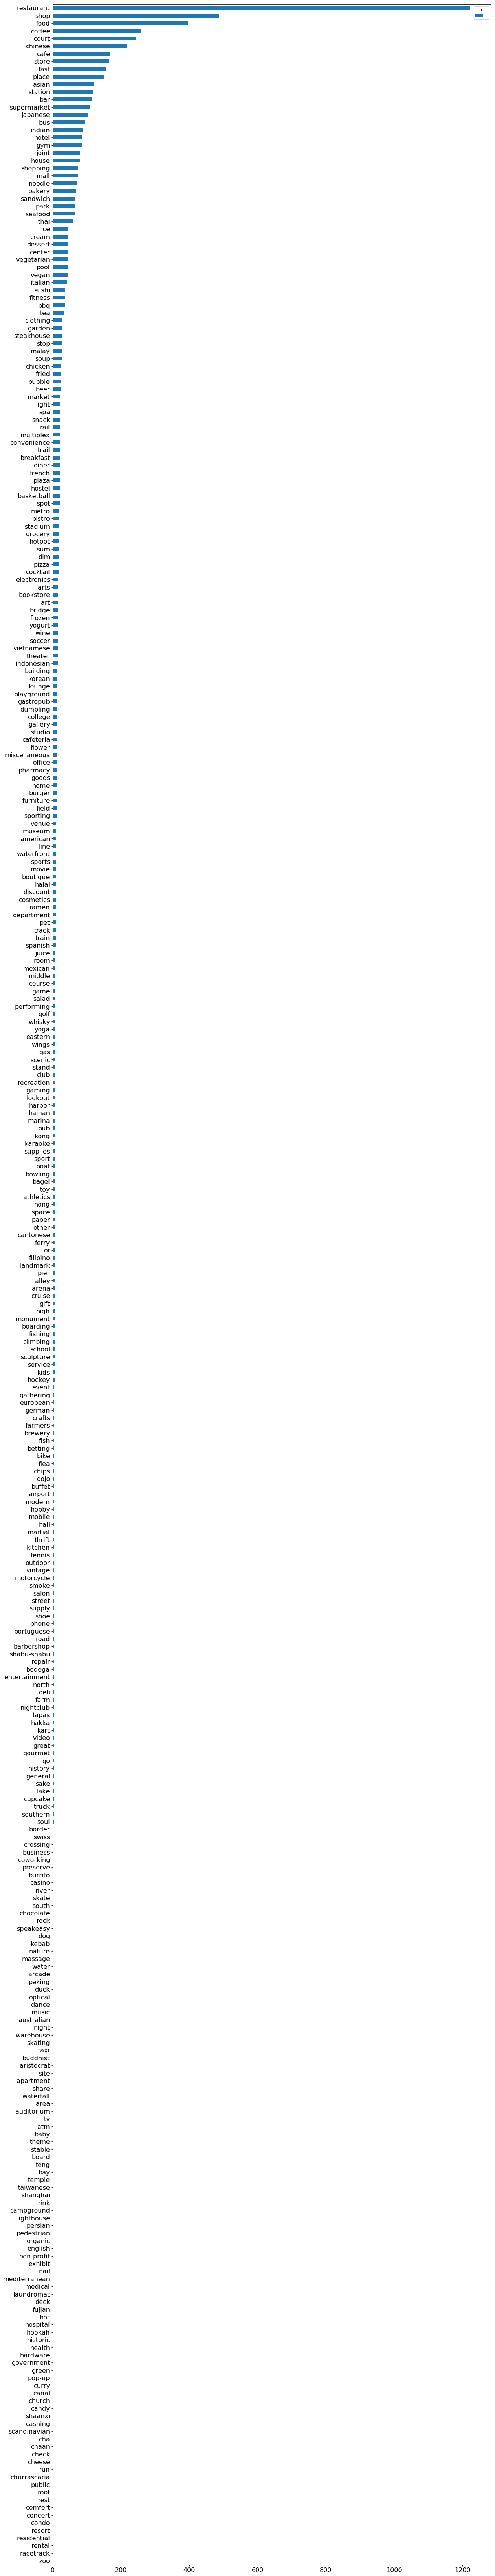

In [147]:
df_cluster.drop('cat_name',axis = 1).groupby('i').sum().T.sort_values('i',ascending = True).plot(kind = 'barh',figsize =(20,120),fontsize = 16)

## Add new attribute into data

In [39]:
df = pd.merge(df,df_cluster.drop('cat_name',axis = 1).reset_index(),how = 'left',left_on = 'cat_name',right_on = 'index')

In [40]:
for i in list(df_cluster.drop(['cat_name','i'],axis = 1).columns):
    df[i][df[i] > 0] = 1

C:\Users\chanonkr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
df.head()

name       lat         lng  \
0                                           posb atm  1.300509  103.801128   
1           singapore airlines (sq) check-in counter  1.355438  103.985661   
2  singapore changi airport (sin) (singapore chan...  1.353767  103.987849   
3                 sia silverkris lounge (terminal 3)  1.354745  103.985215   
4  singapore airlines first class check-in reception  1.355134  103.986732   

         cat_name           cat_summary cat_summary_type  \
0             atm  this spot is popular          general   
1         airport  this spot is popular          general   
2         airport  this spot is popular          general   
3  airport lounge  this spot is popular          general   
4  airport lounge  this spot is popular          general   

            cat_reasonName    station_name station_type  station_lat  ...  \
0  globalinteractionreason    commonwealth          mrt     1.302439  ...   
1  globalinteractionreason  changi airport          mrt     1.357622  ...   
2  globalinteractionreason  changi airport          mrt     1.357622  ...   
3  globalinteractionreason  changi airport          mrt     1.357622  ...   
4  globalinteractionreason  changi airport          mrt     1.357622  ...   

   water waterfall  waterfront  whisky  wine  wings  yoga  yogurt  zoo  i  
0    0.0       0.0         0.0     0.0   0.0    0.0   0.0     0.0  0.0  i  
1    0.0       0.0         0.0     0.0   0.0    0.0   0.0     0.0  0.0  i  
2    0.0       0.0         0.0     0.0   0.0    0.0   0.0     0.0  0.0  i  
3    0.0       0.0         0.0     0.0   0.0    0.0   0.0     0.0  0.0  i  
4    0.0       0.0         0.0     0.0   0.0    0.0   0.0     0.0  0.0  i  

[5 rows x 348 columns]

### Let See each station benefit

In [43]:
att_place = df.columns[12:-1]
att_place

Index(['airport', 'alley', 'american', 'apartment', 'arcade', 'area', 'arena',
       'aristocrat', 'art', 'arts',
       ...
       'warehouse', 'water', 'waterfall', 'waterfront', 'whisky', 'wine',
       'wings', 'yoga', 'yogurt', 'zoo'],
      dtype='object', length=335)

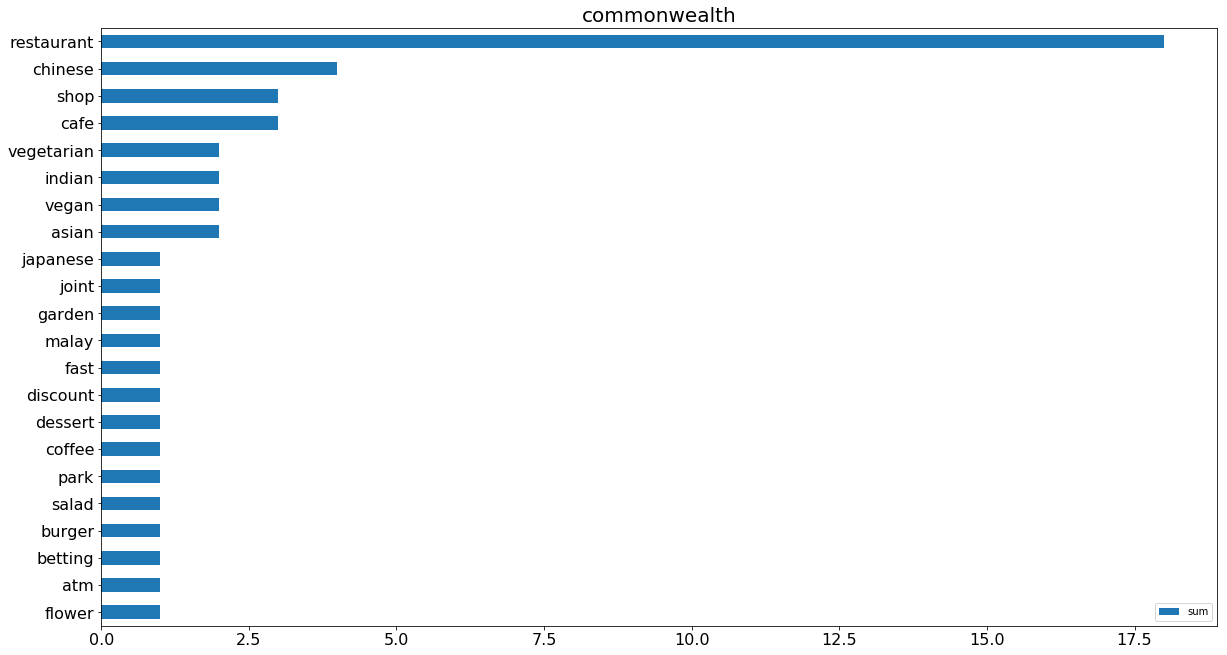

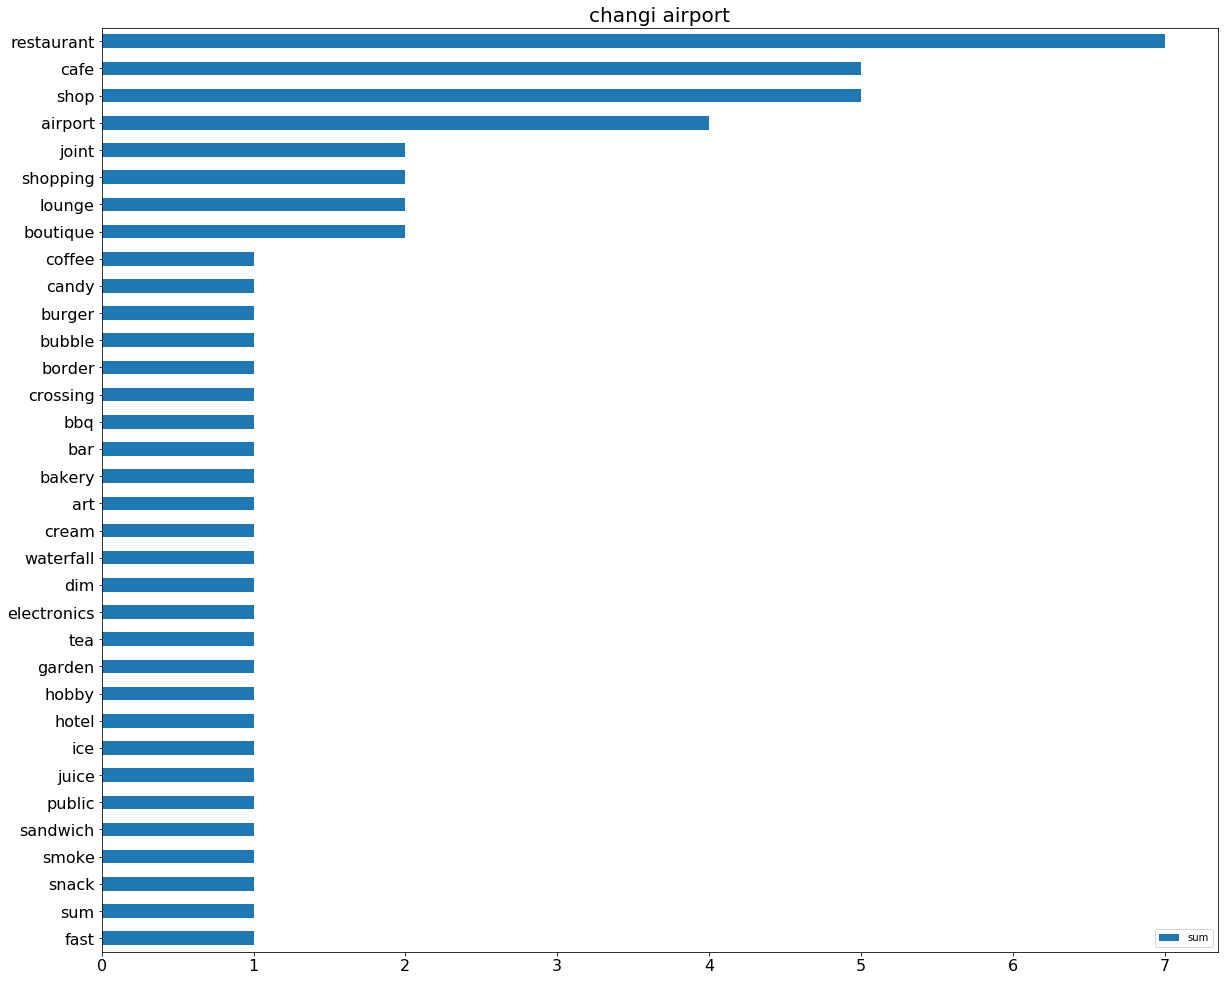

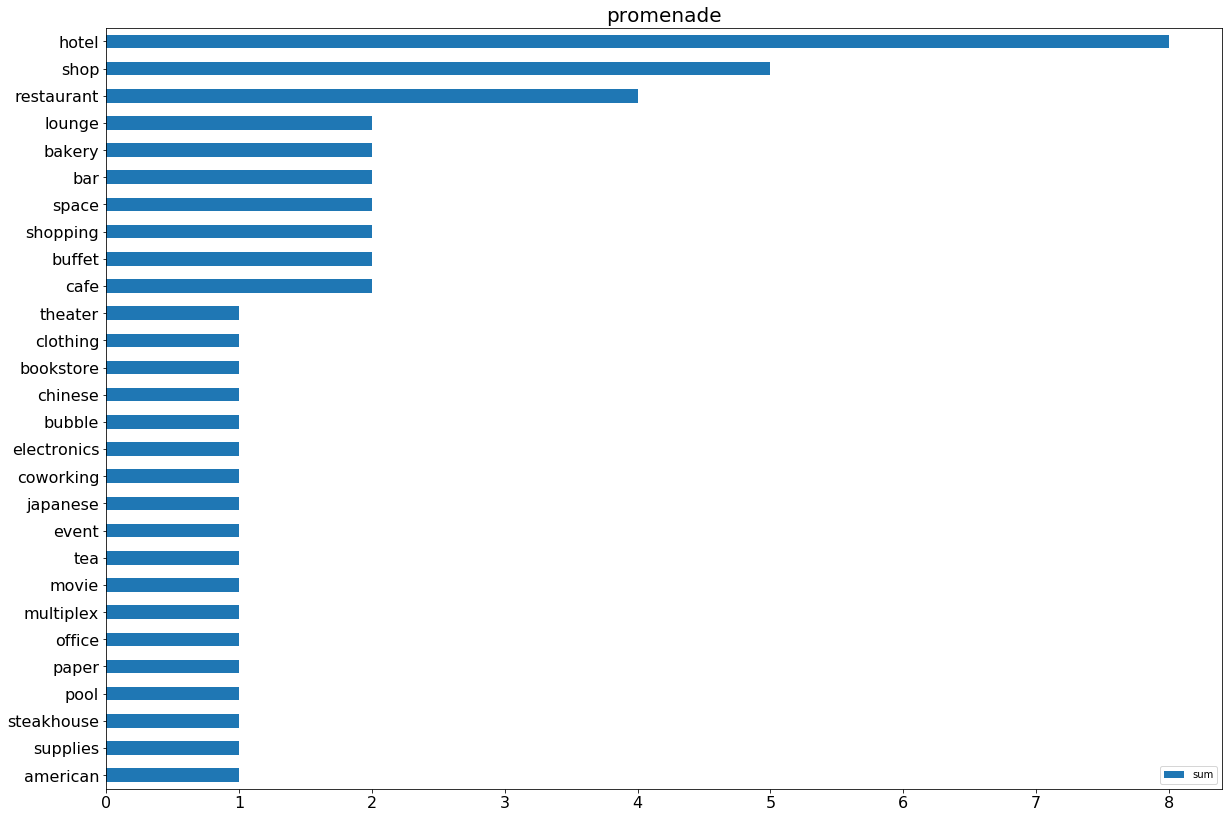

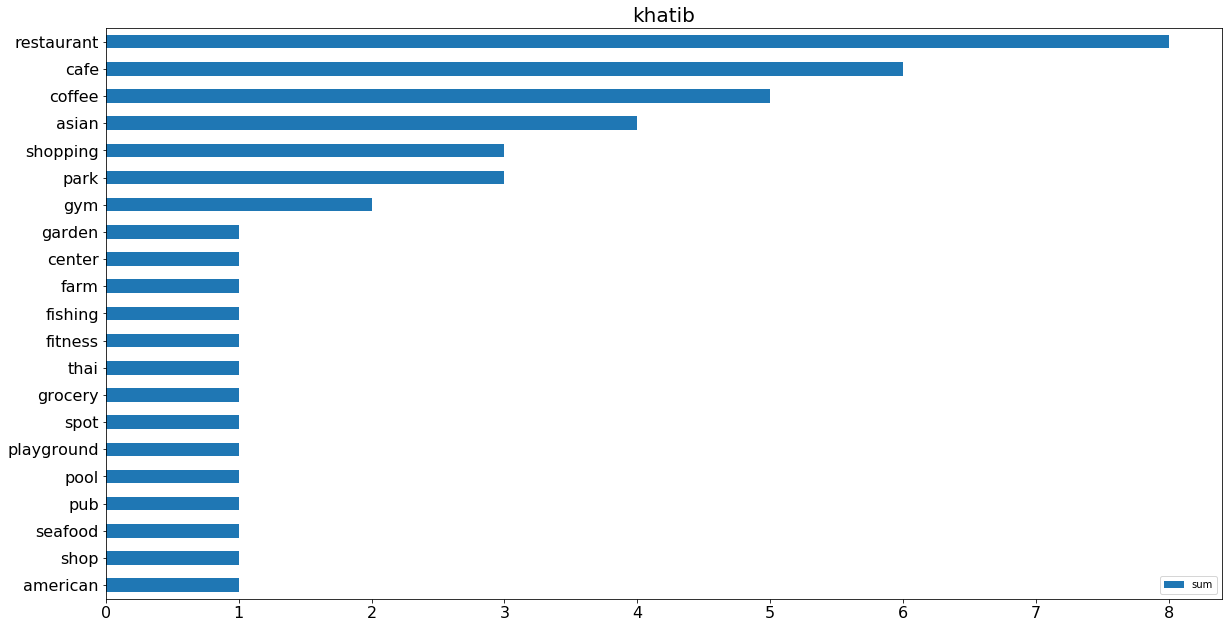

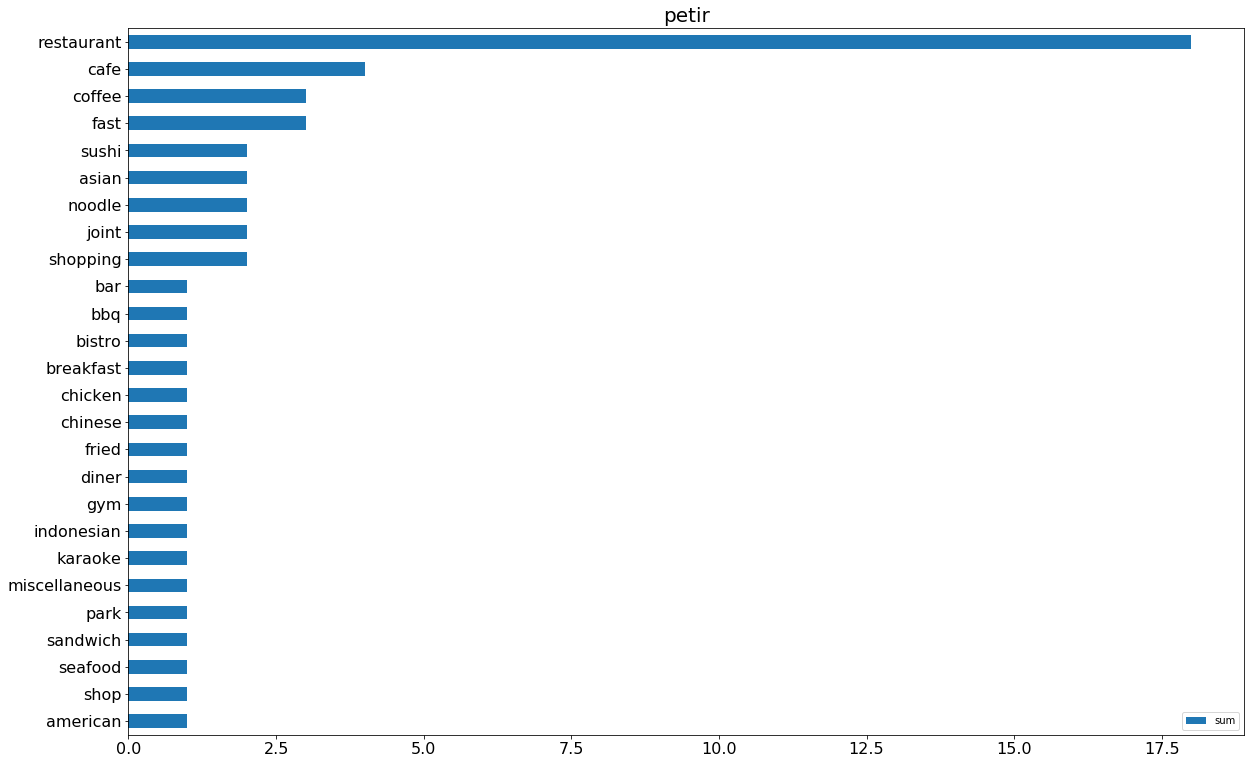

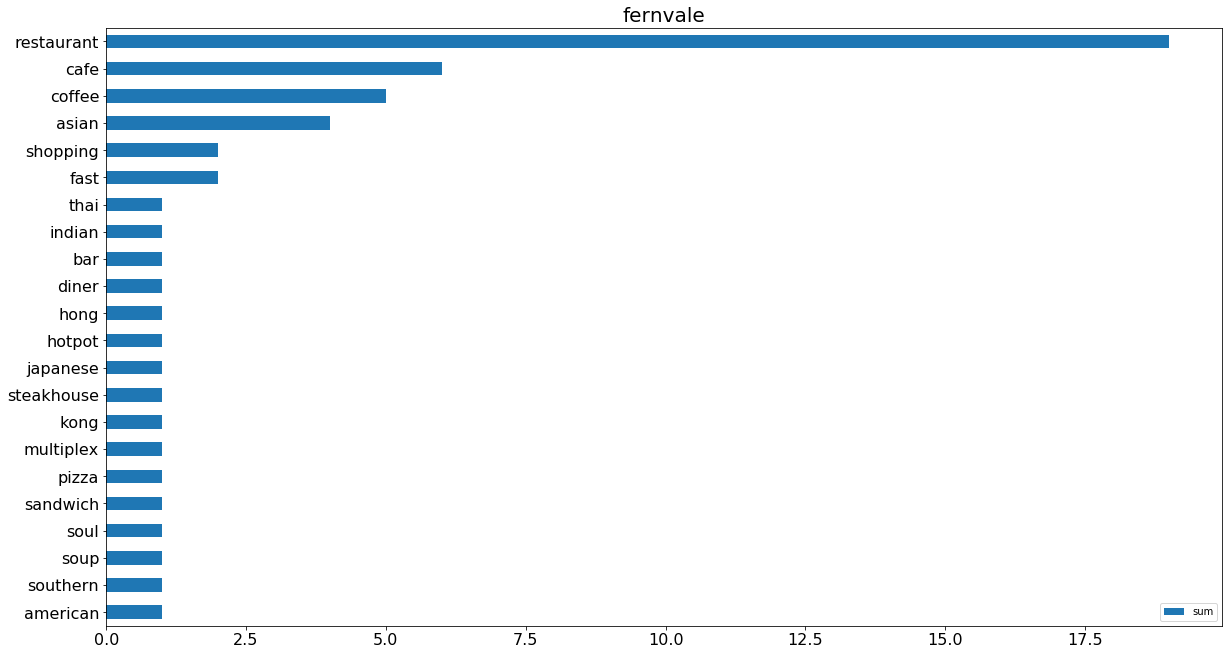

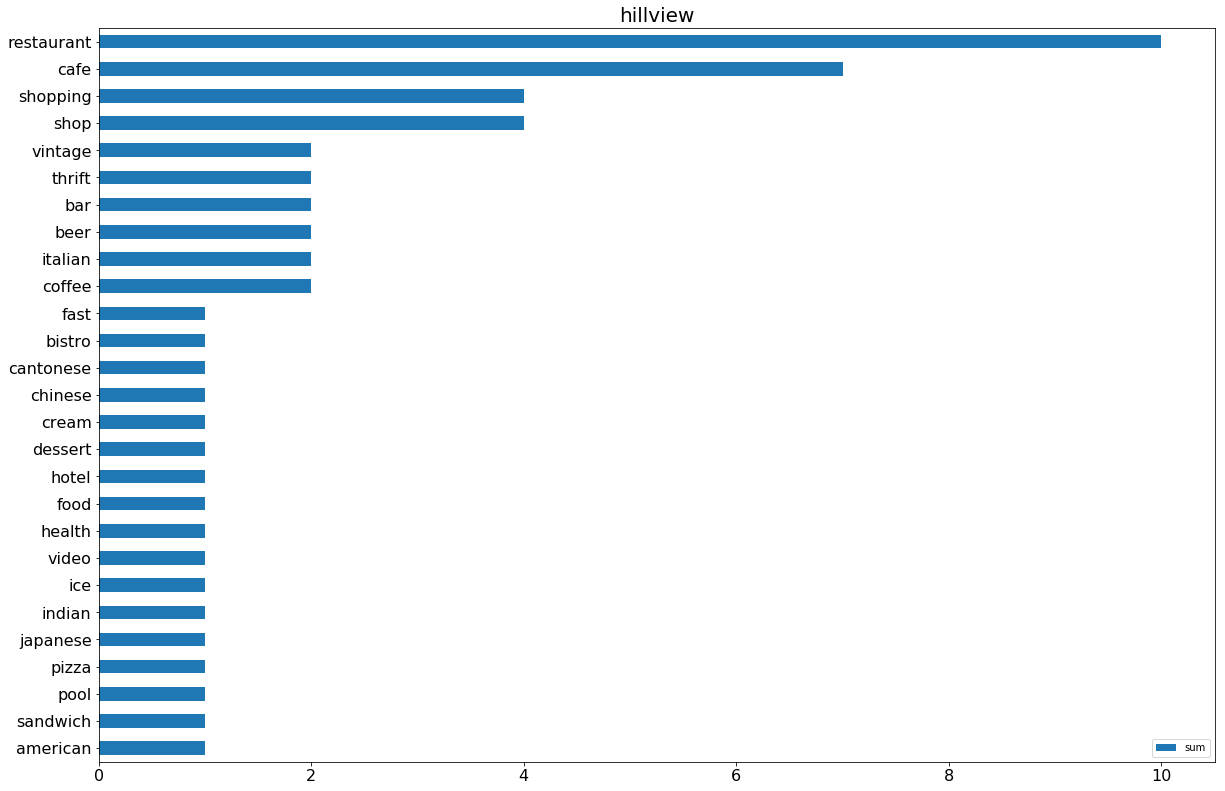

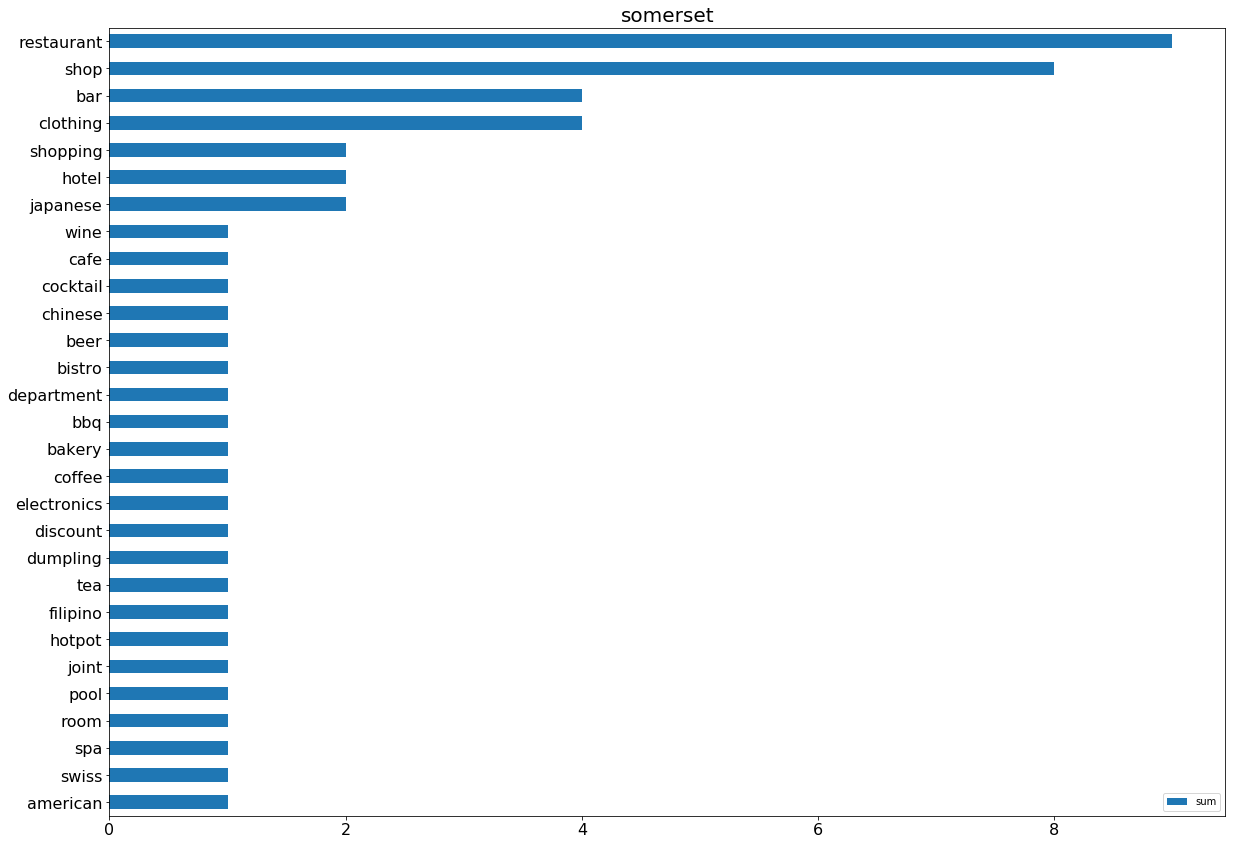

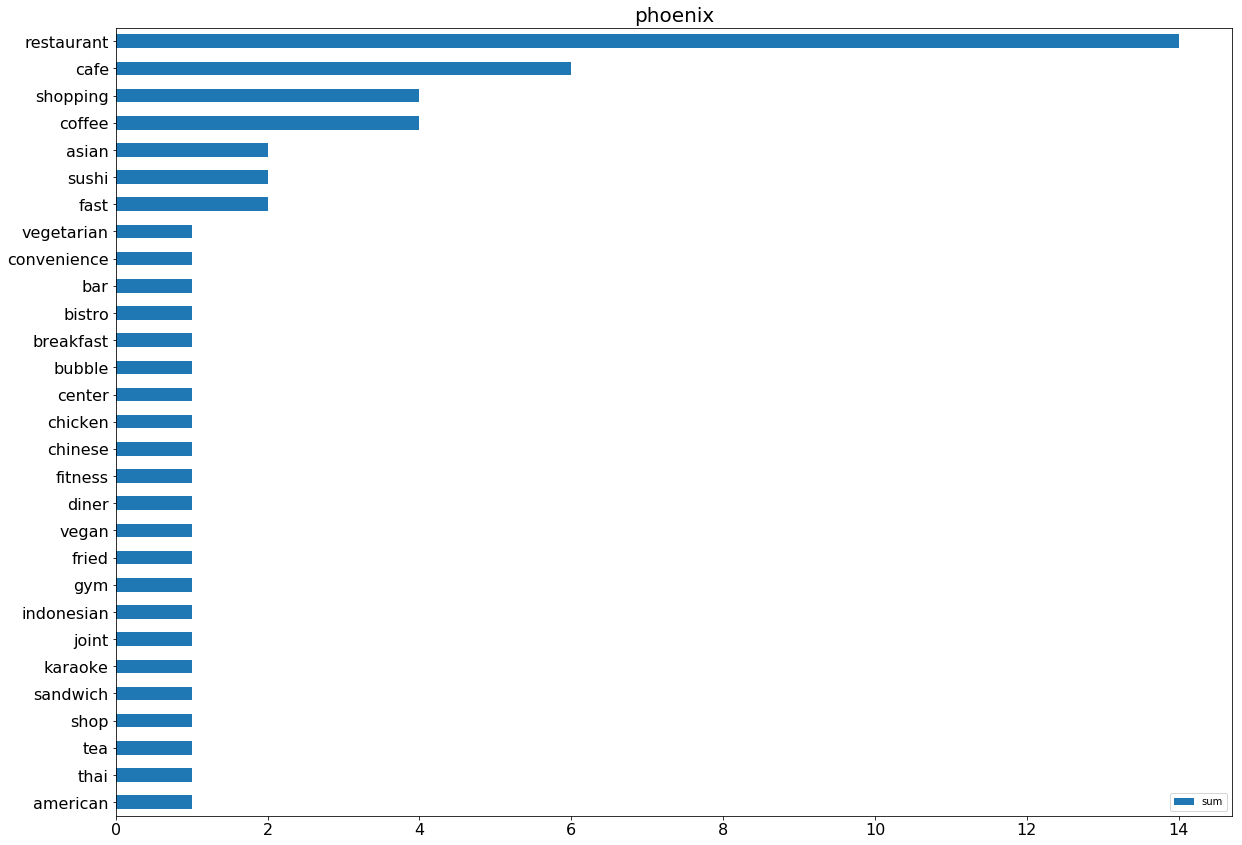

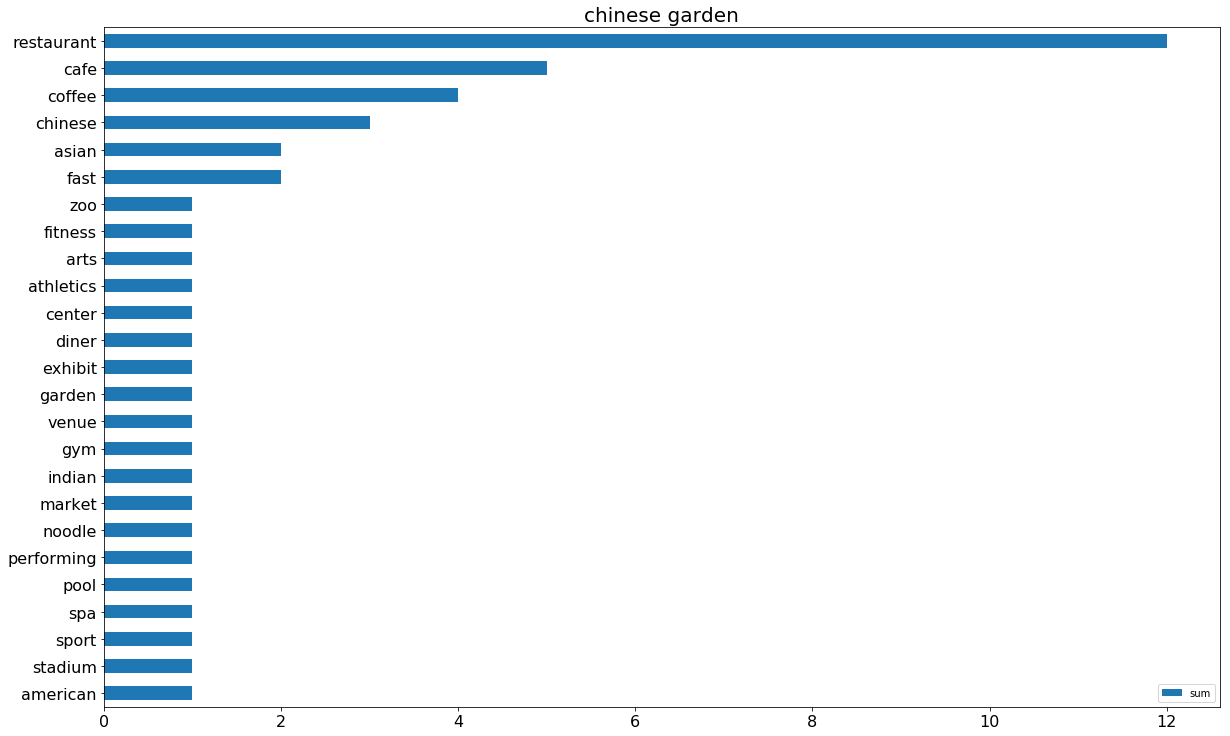

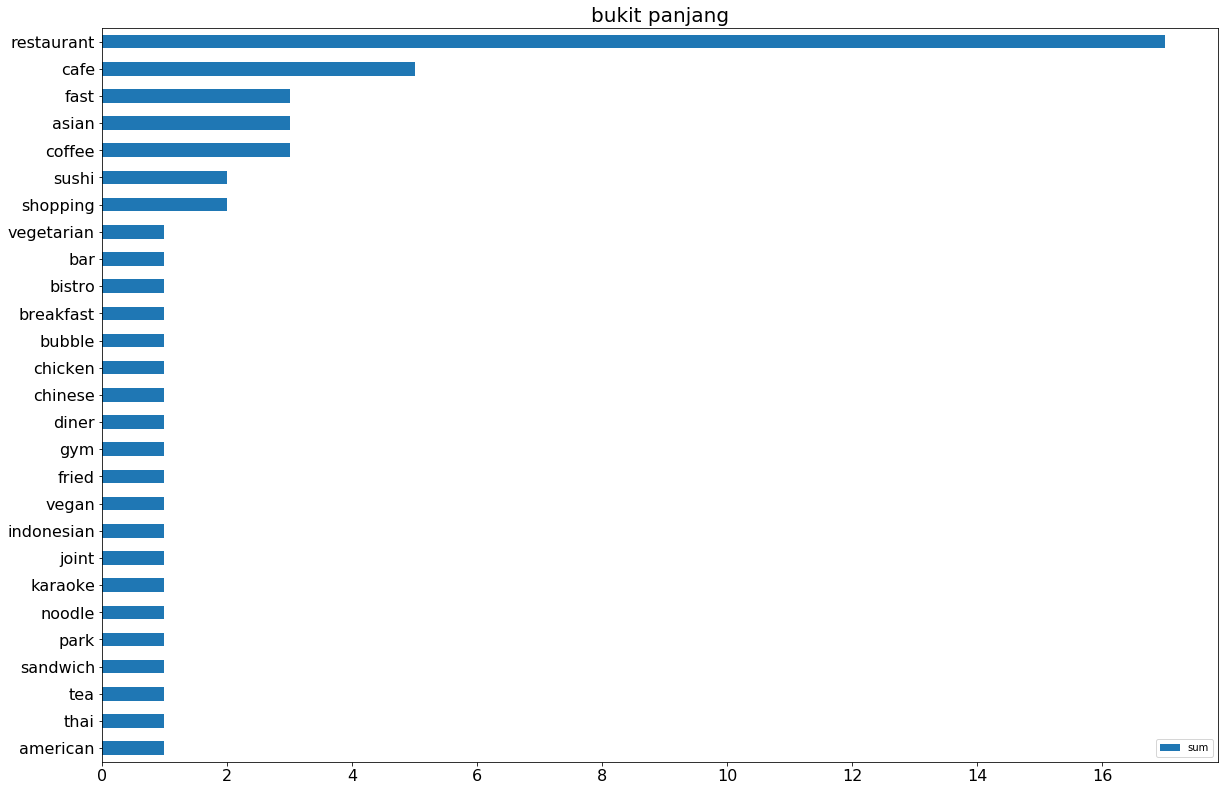

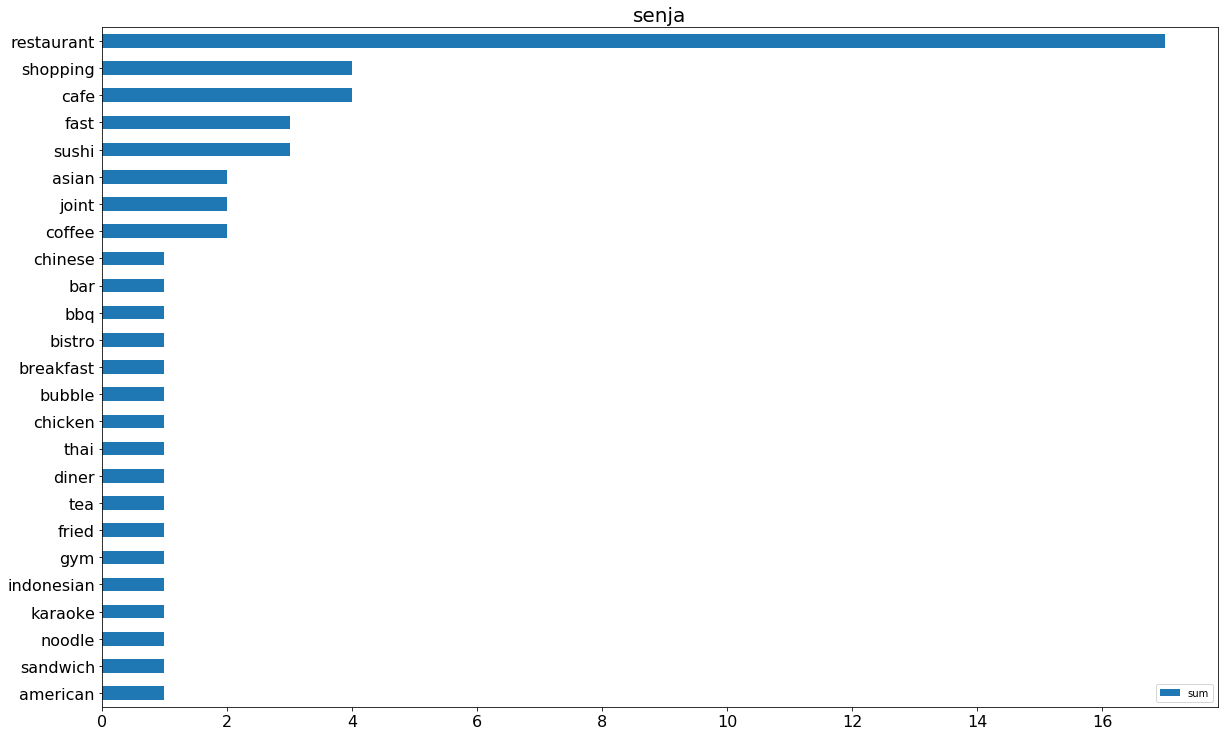

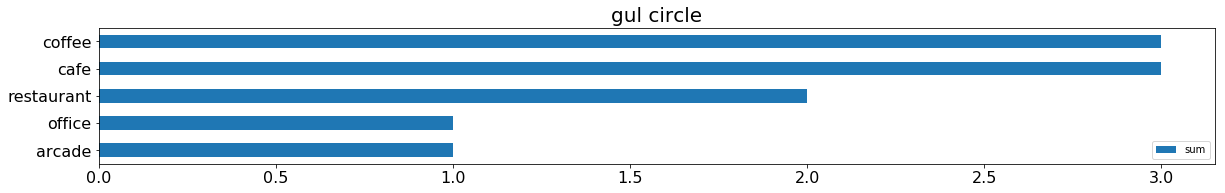

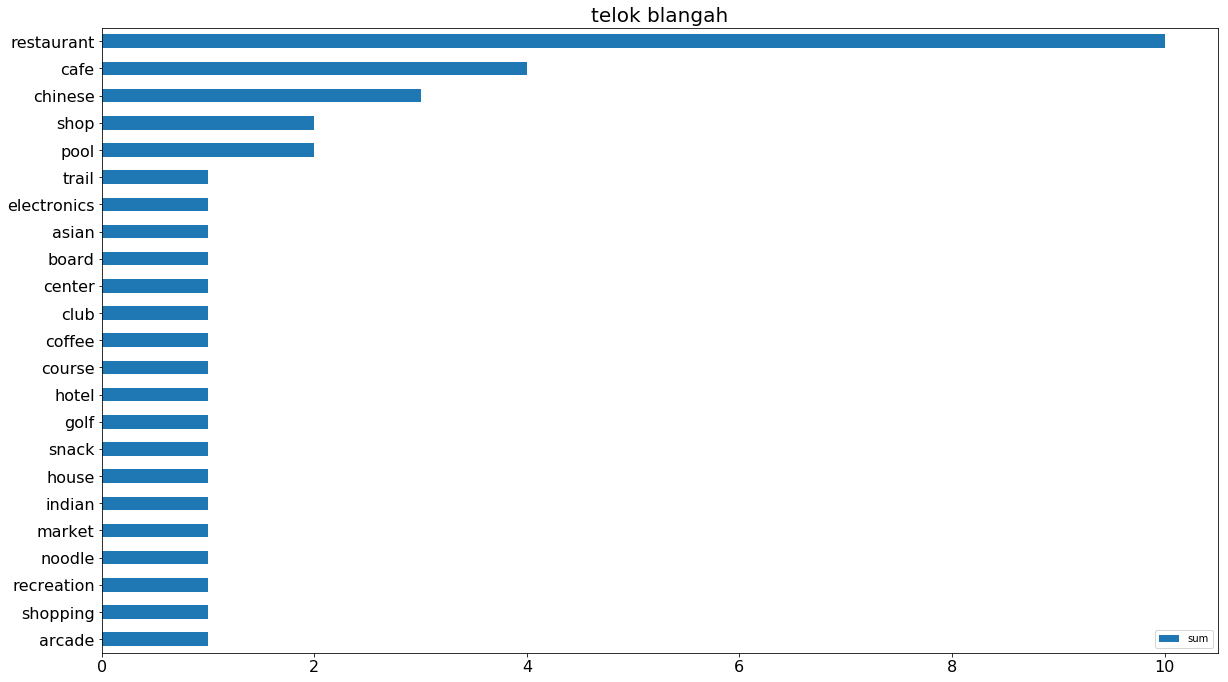

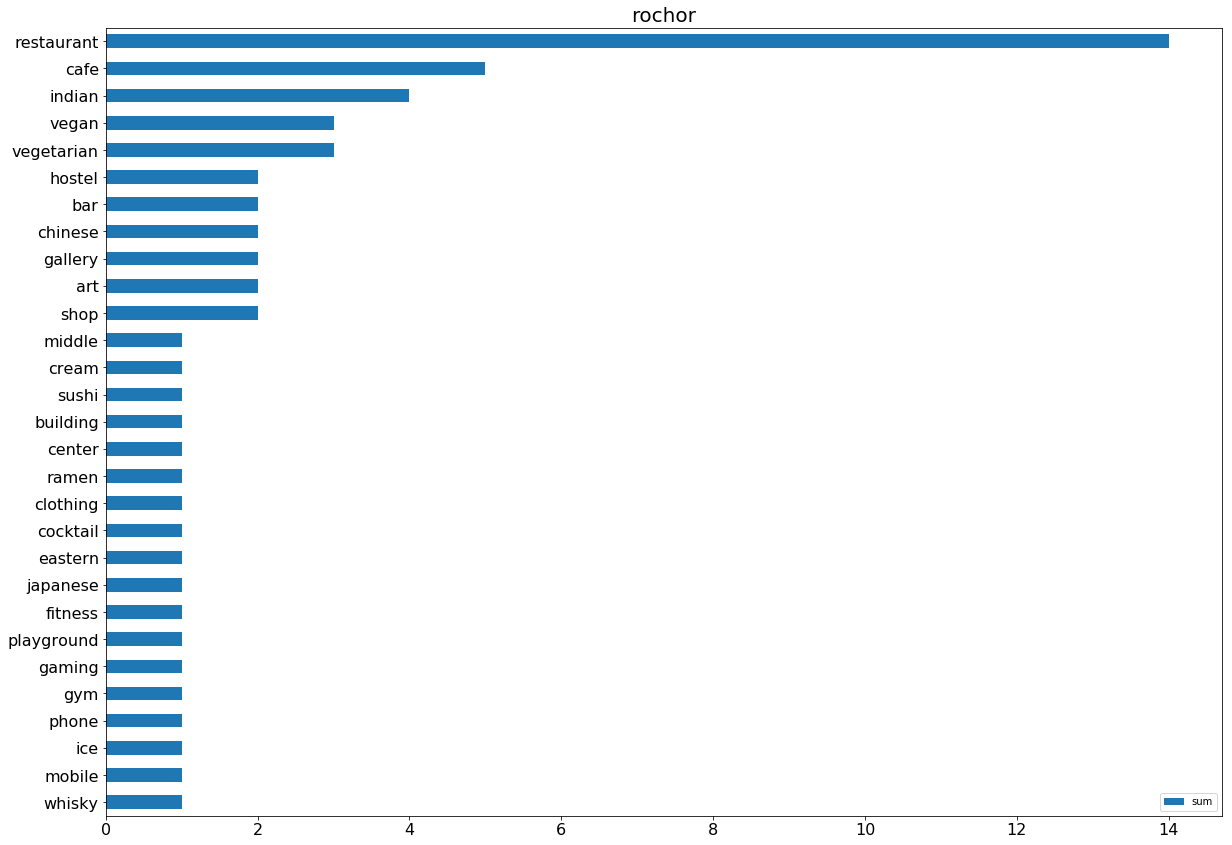

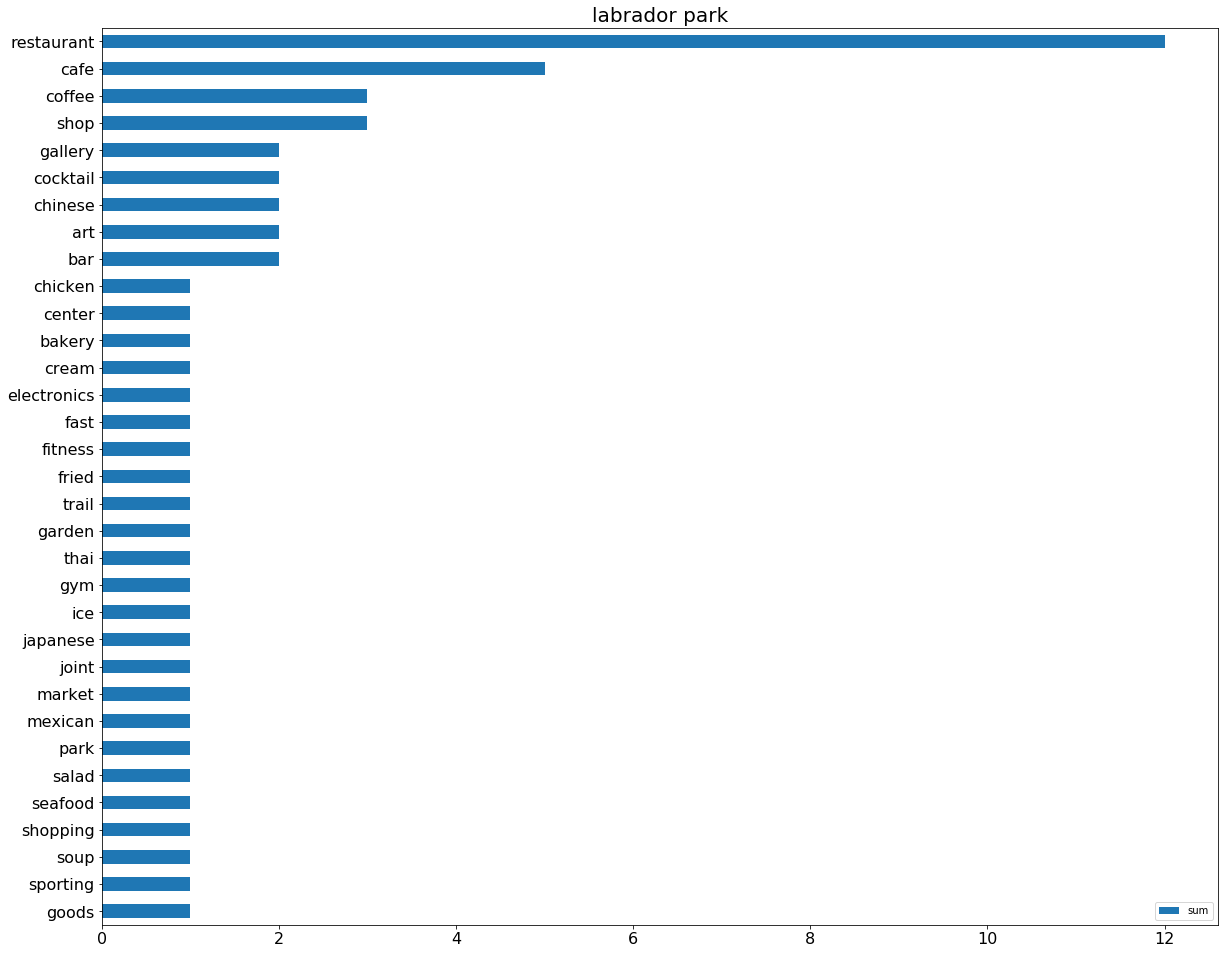

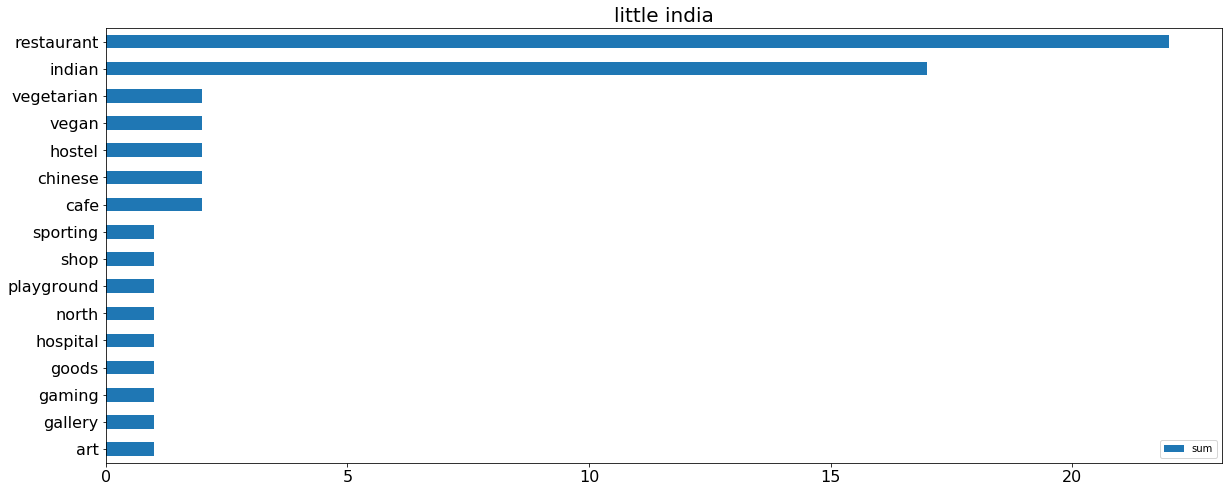

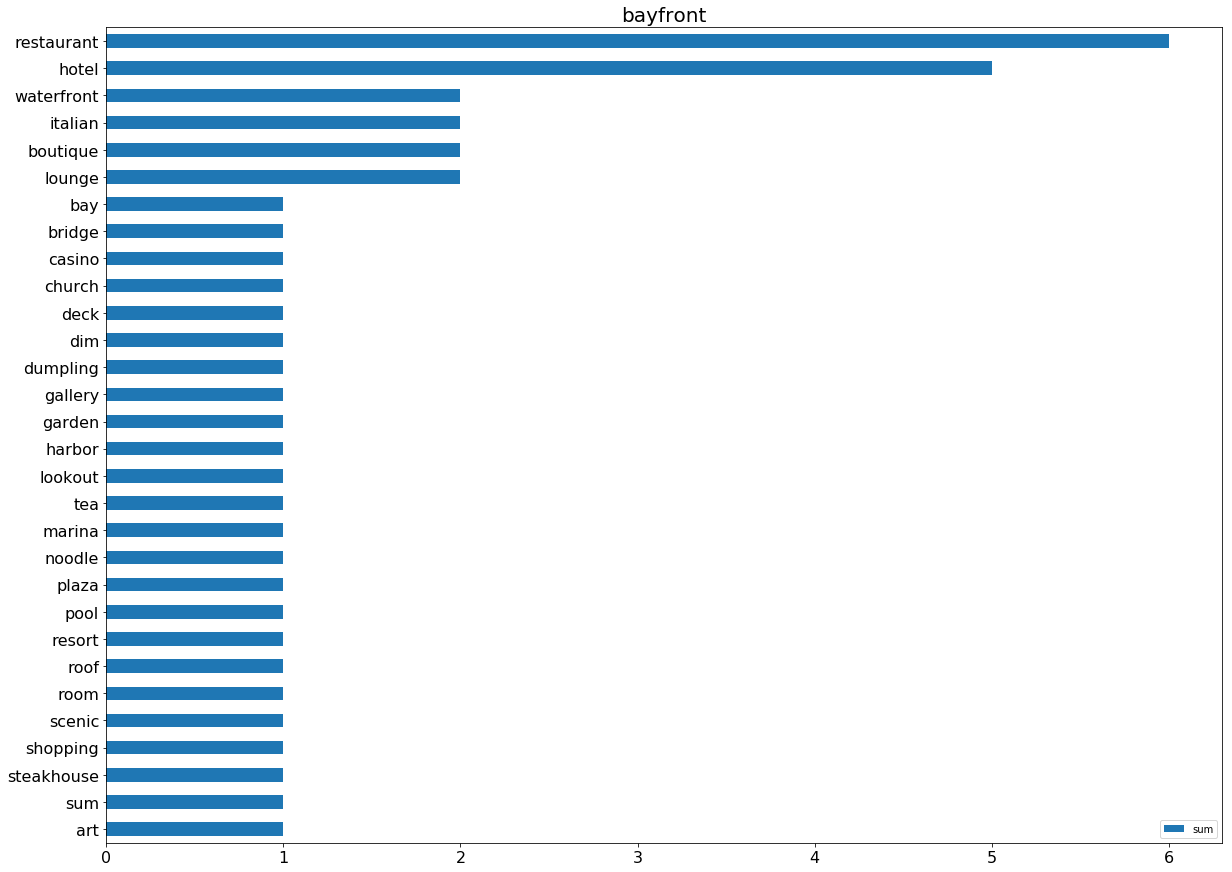

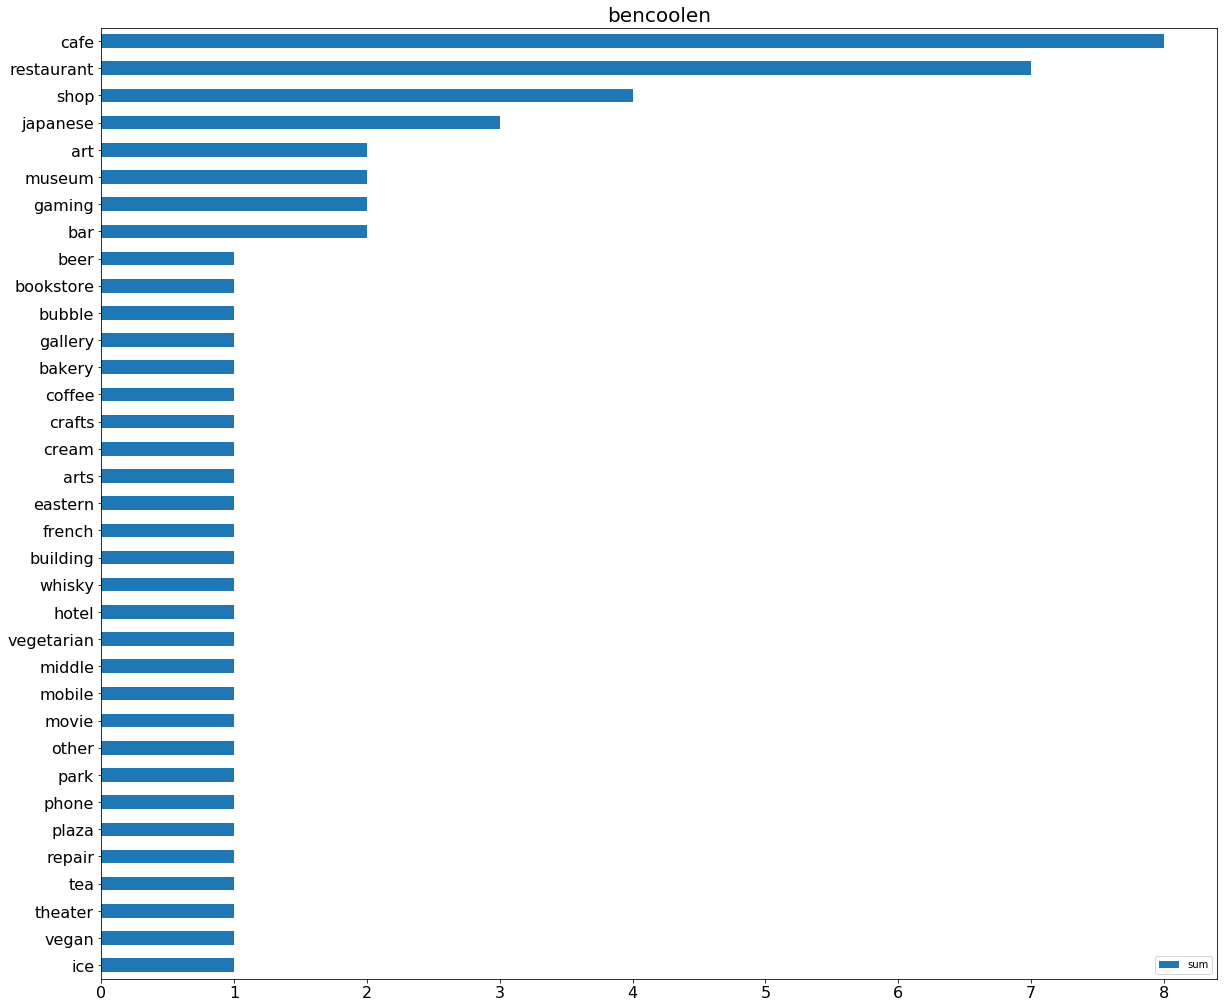

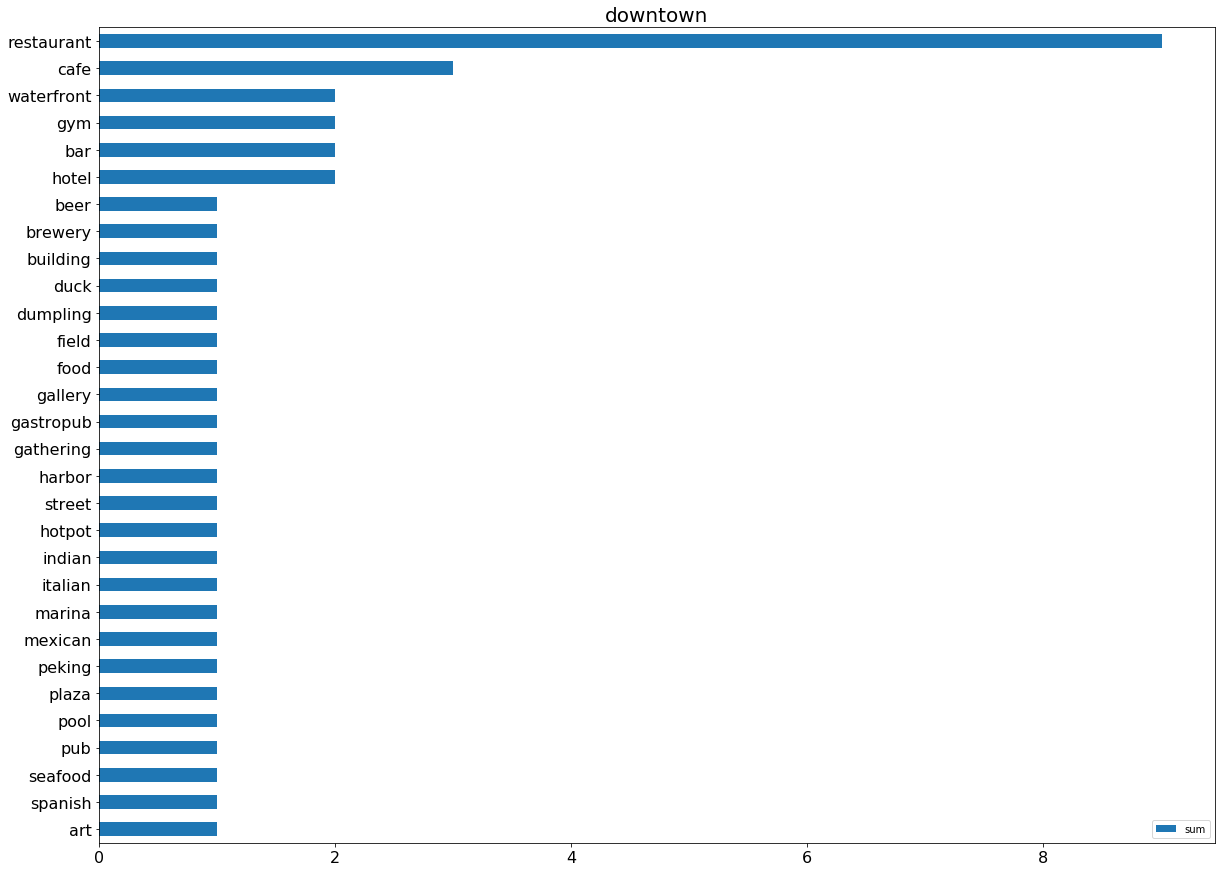

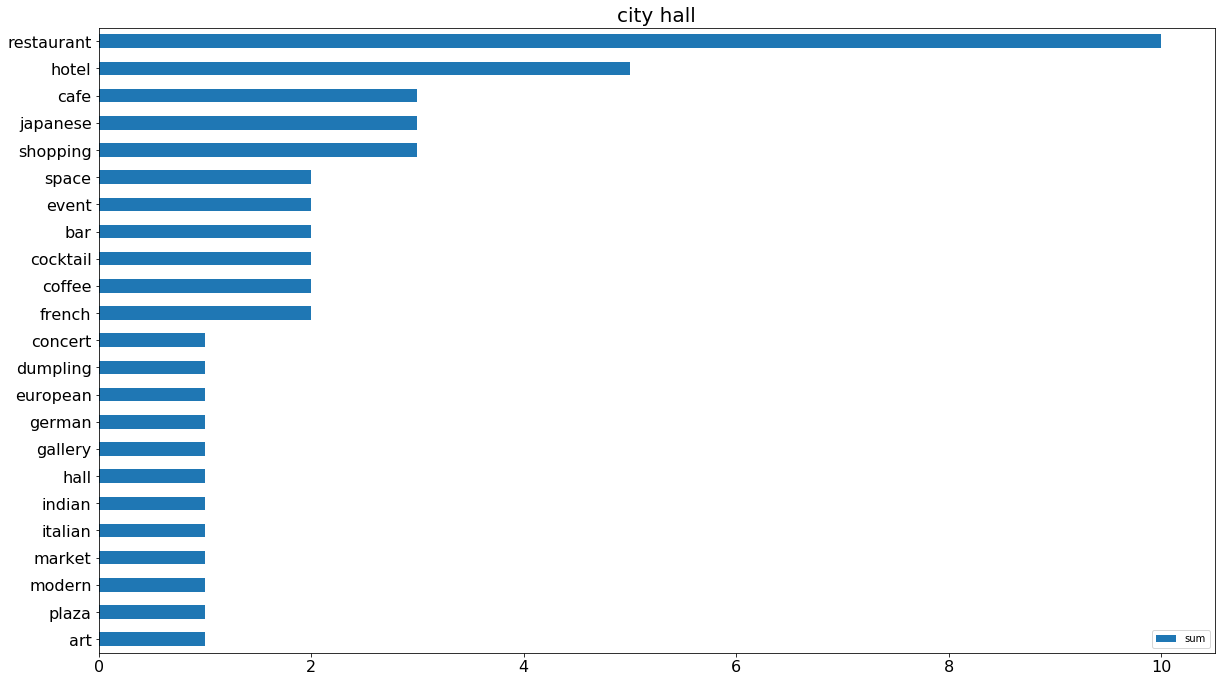

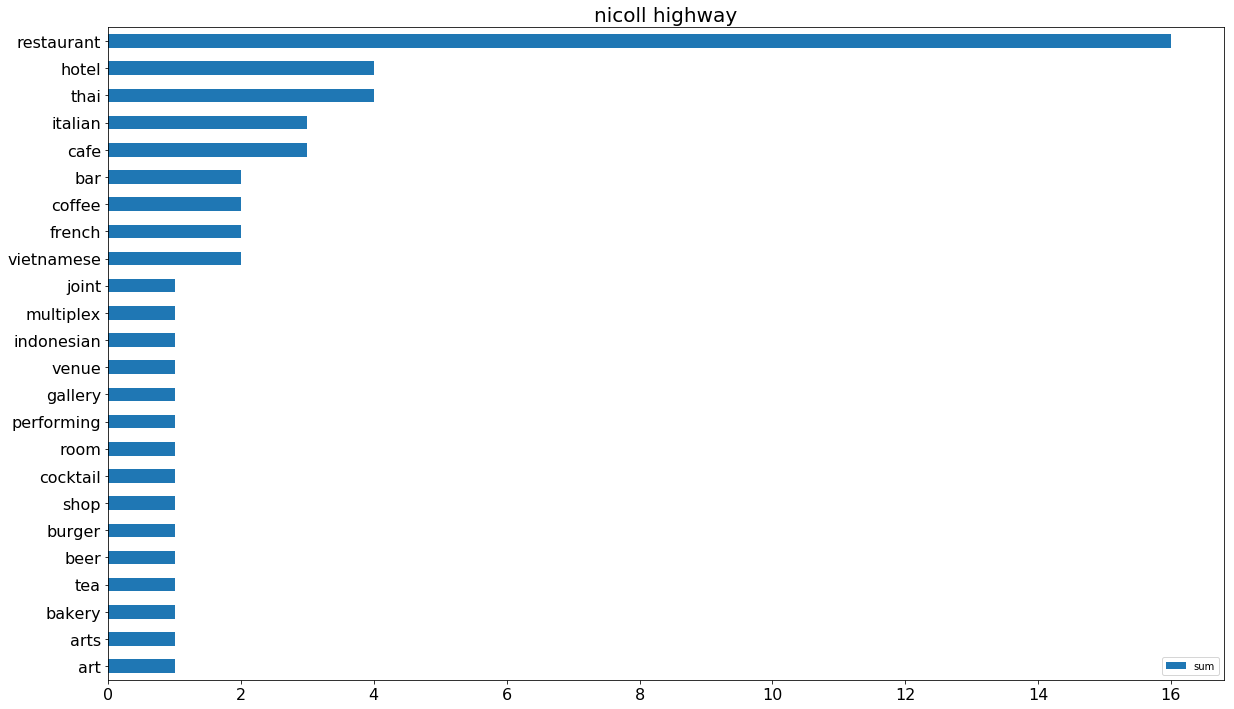

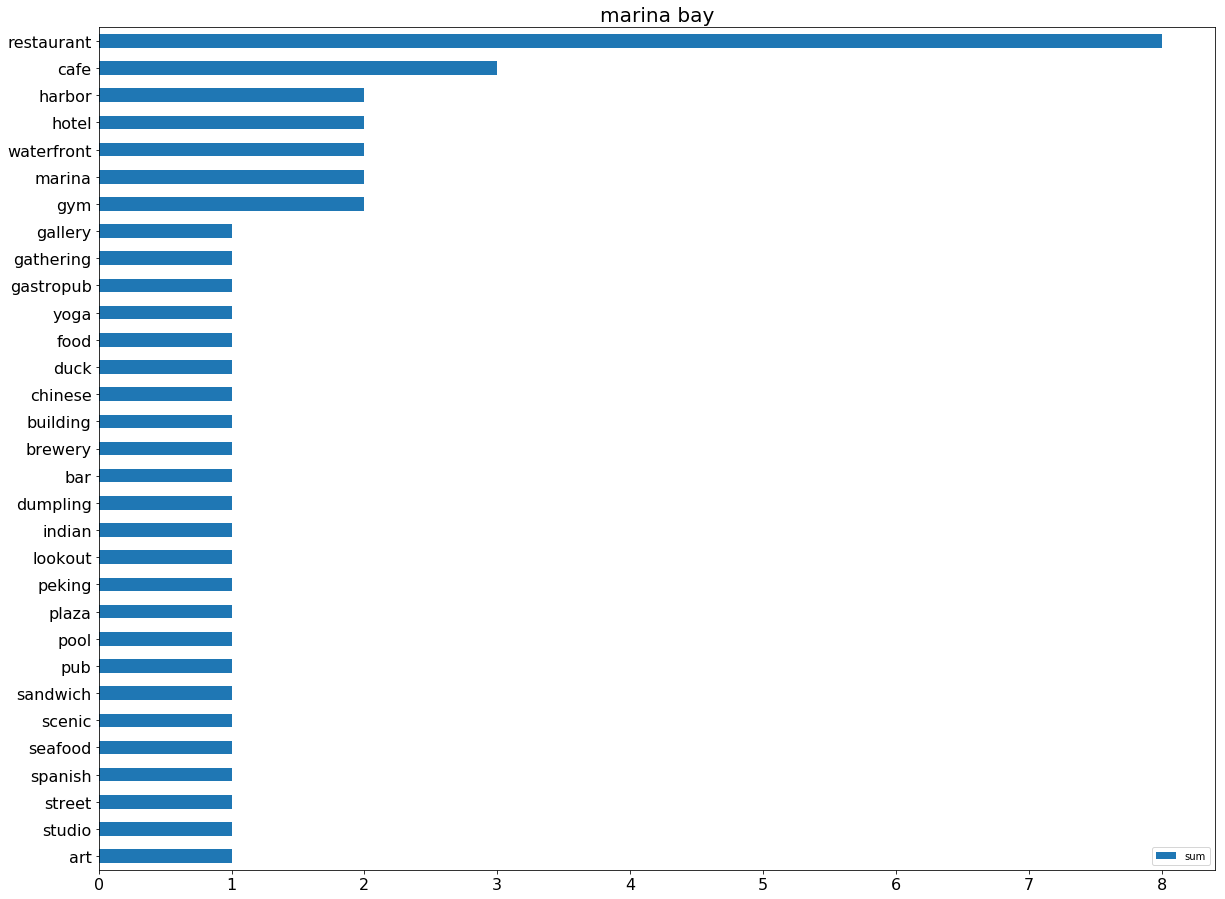

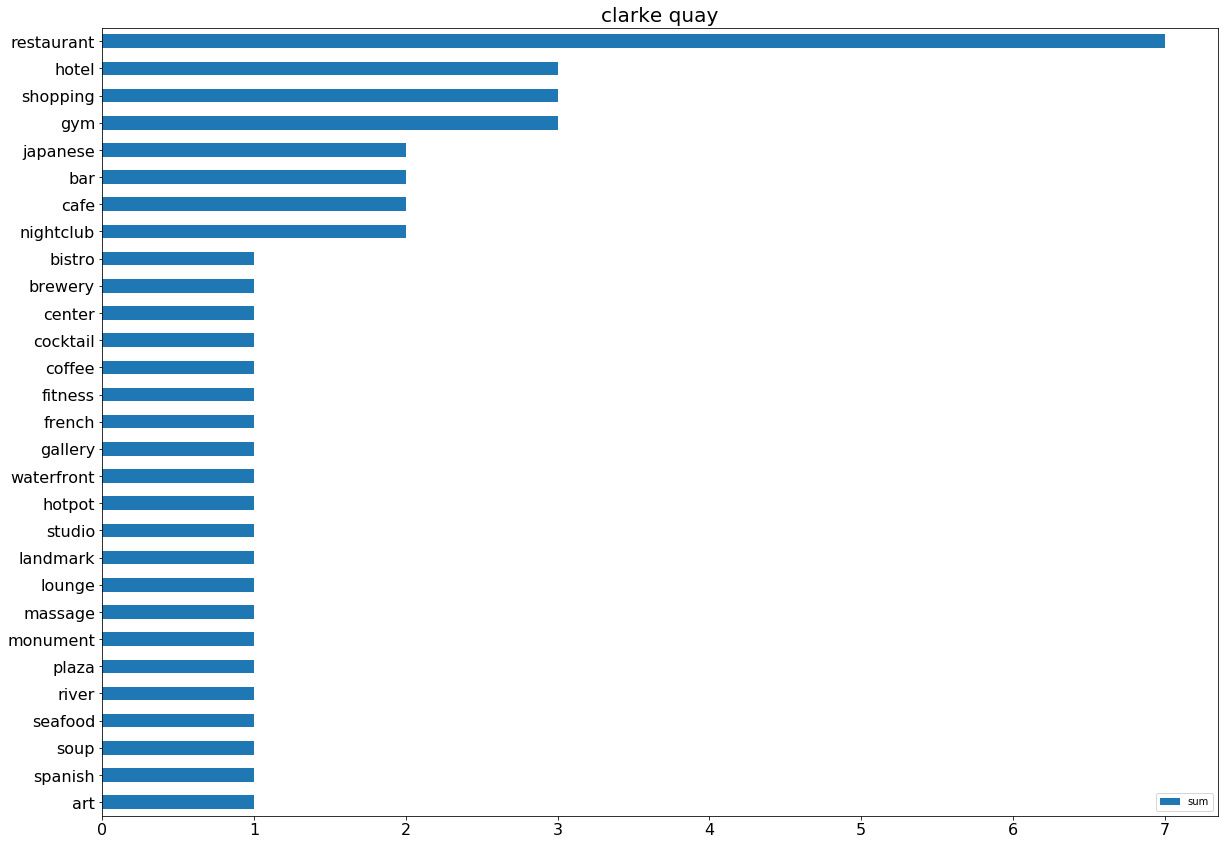

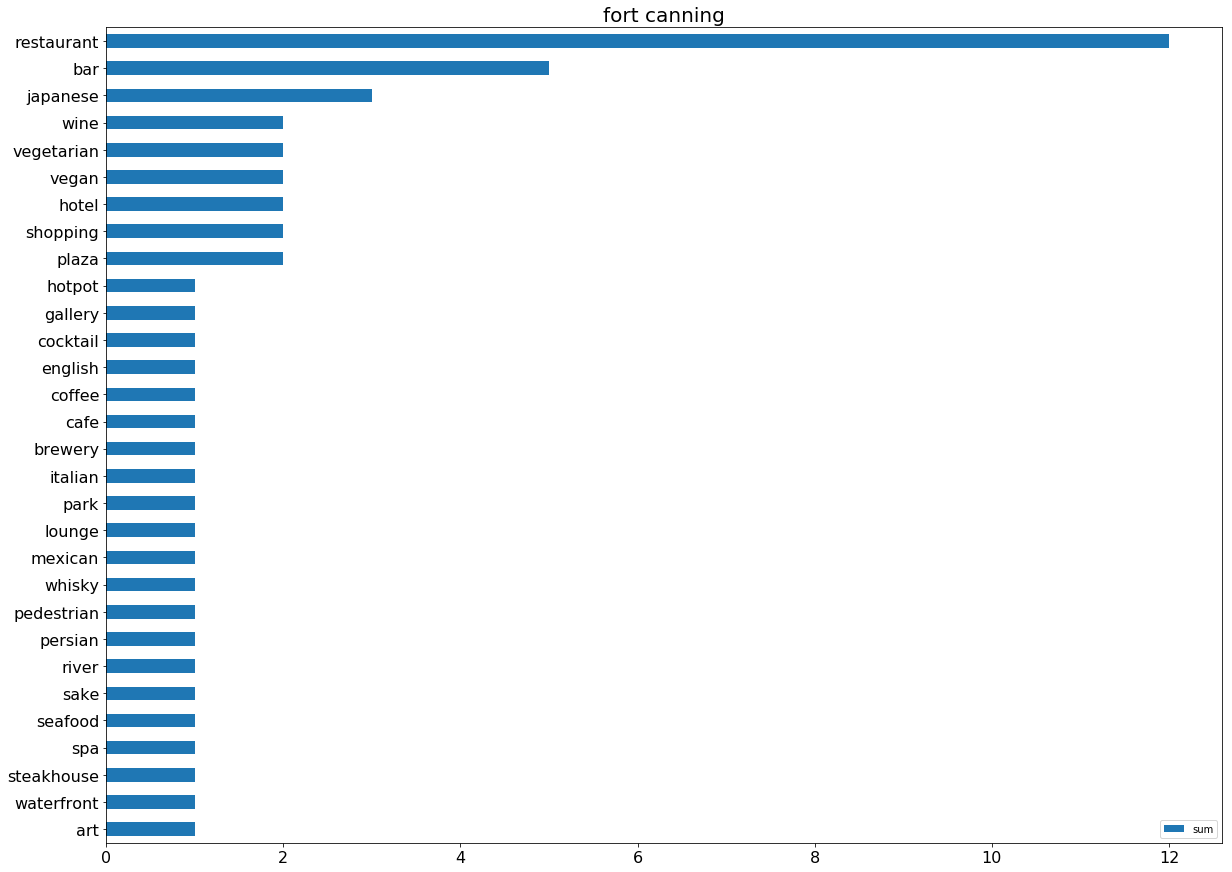

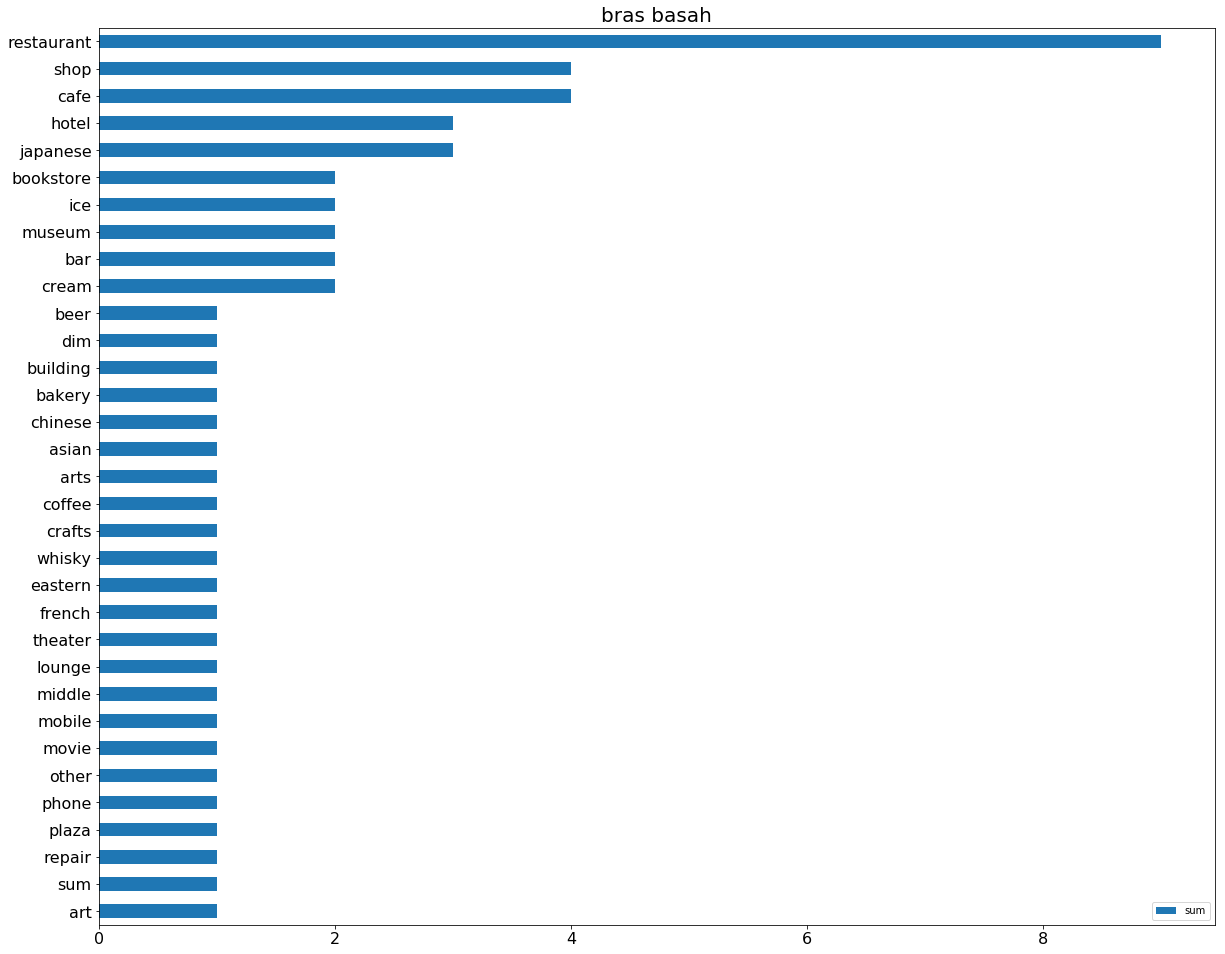

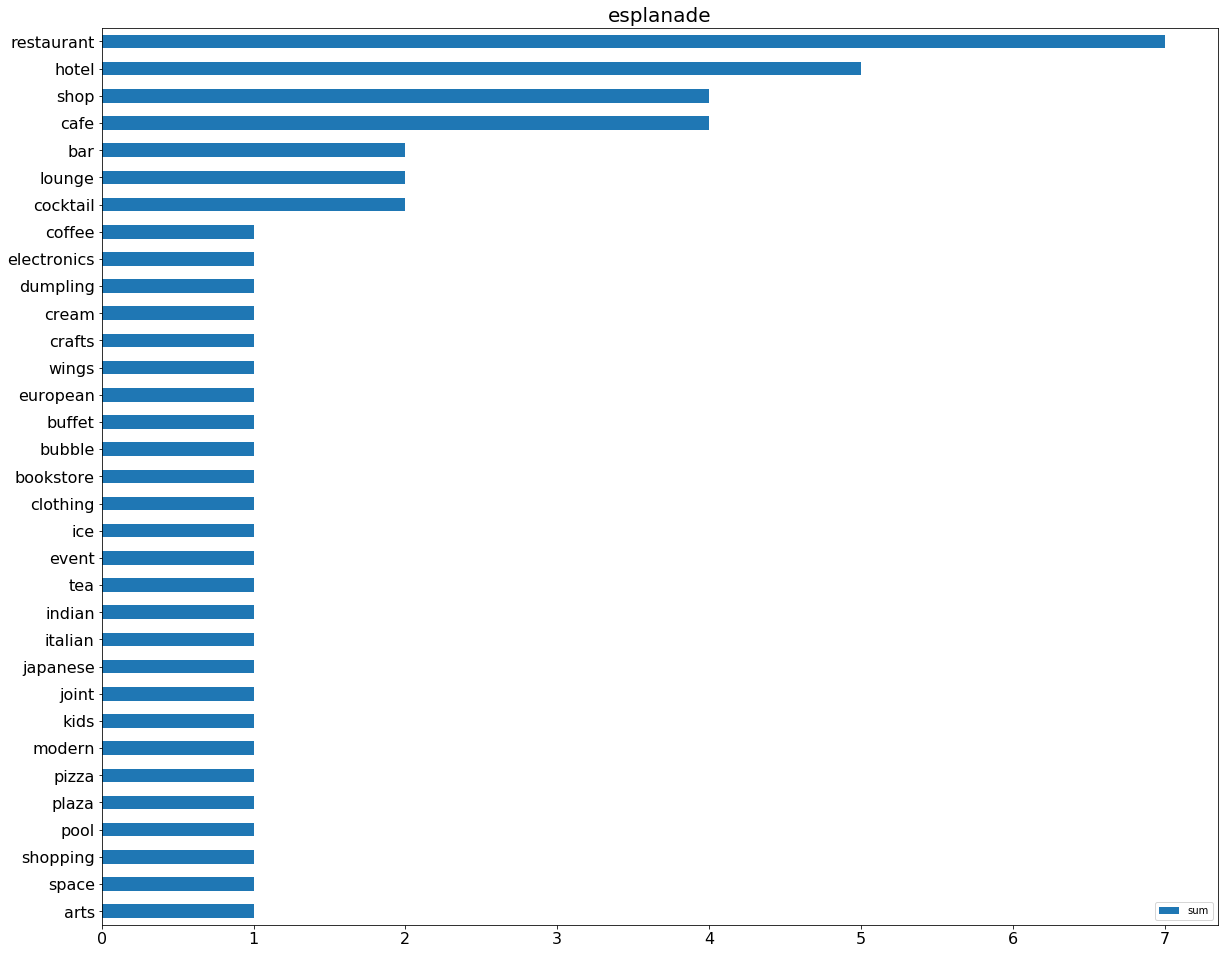

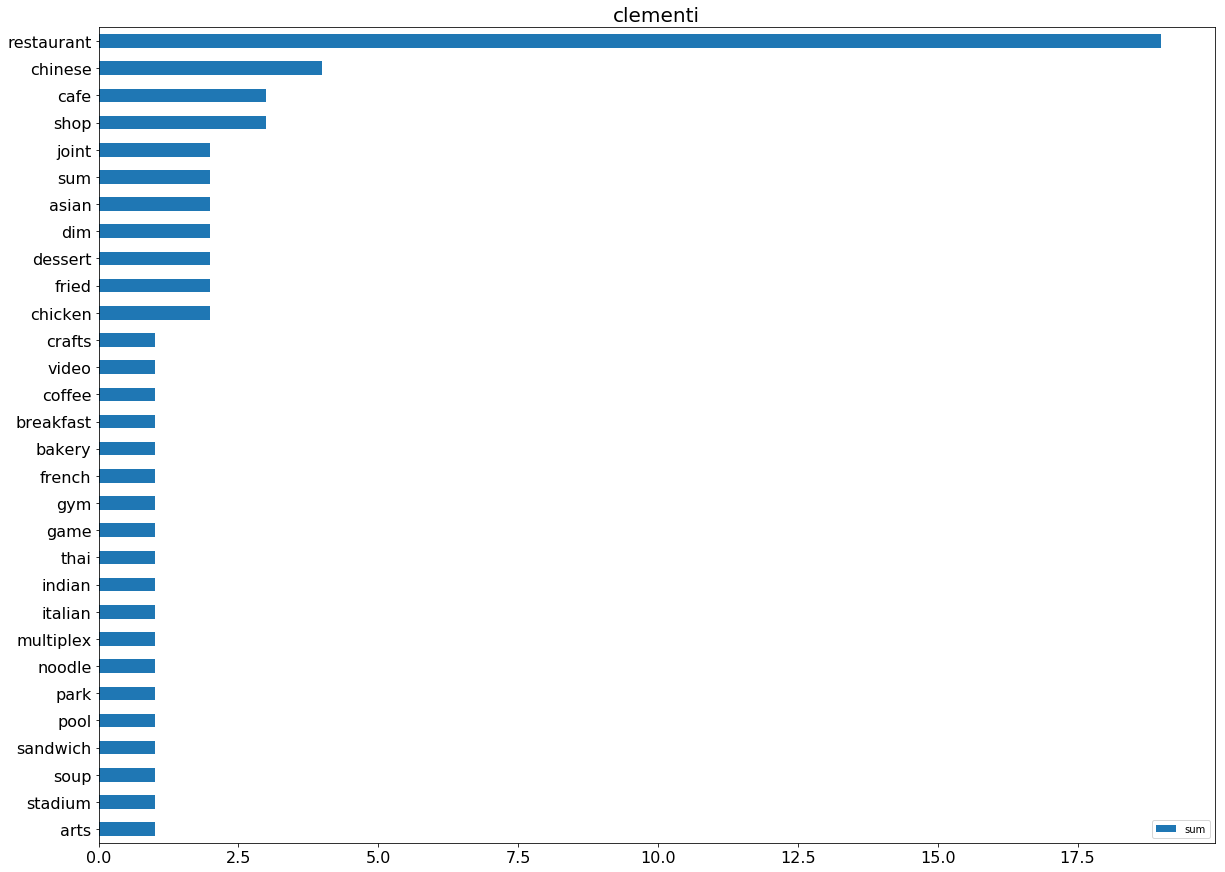

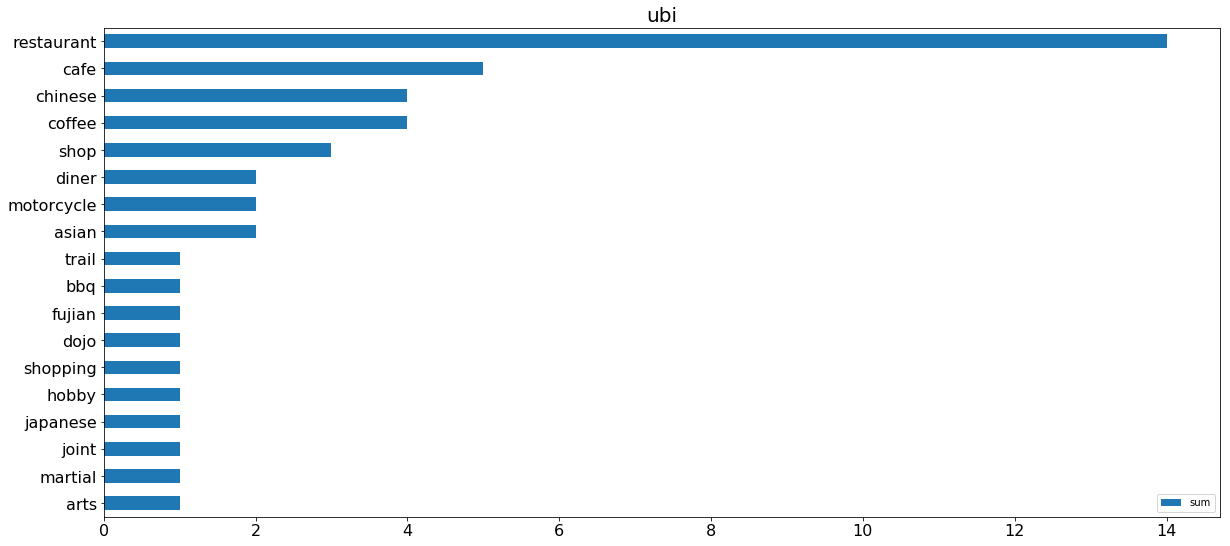

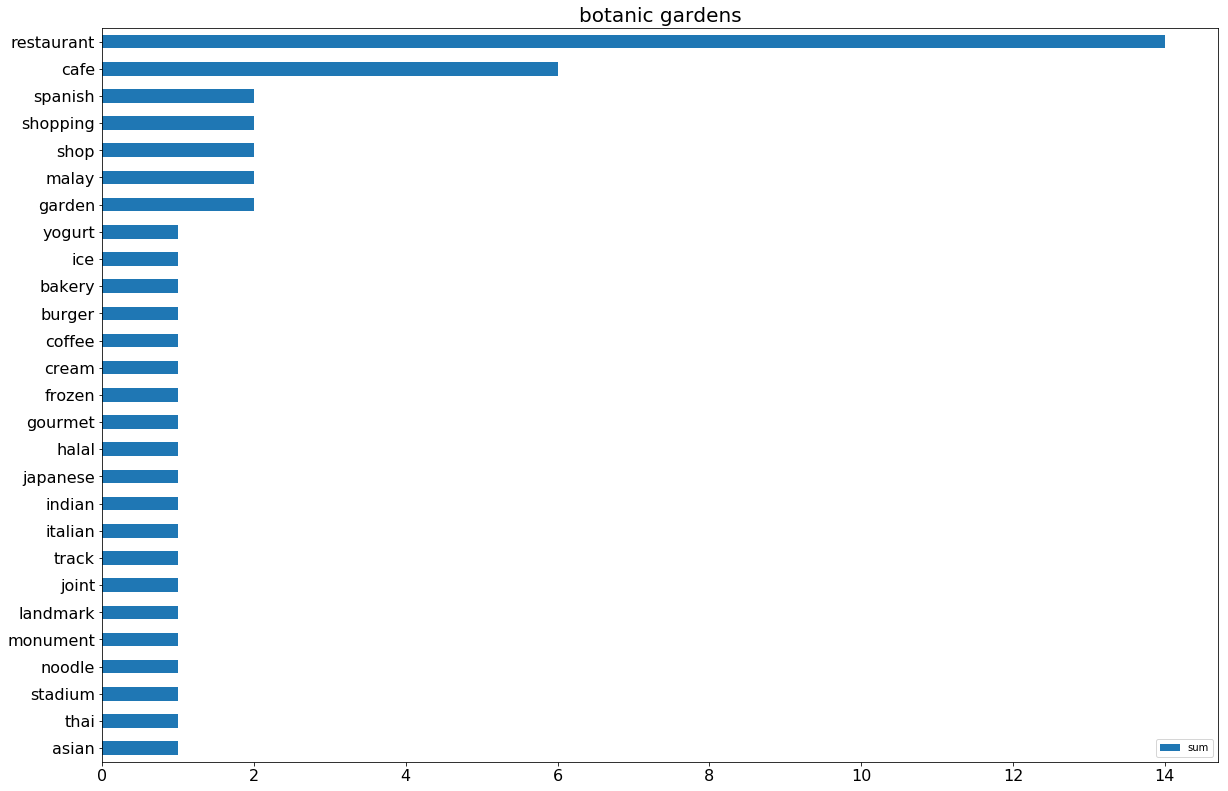

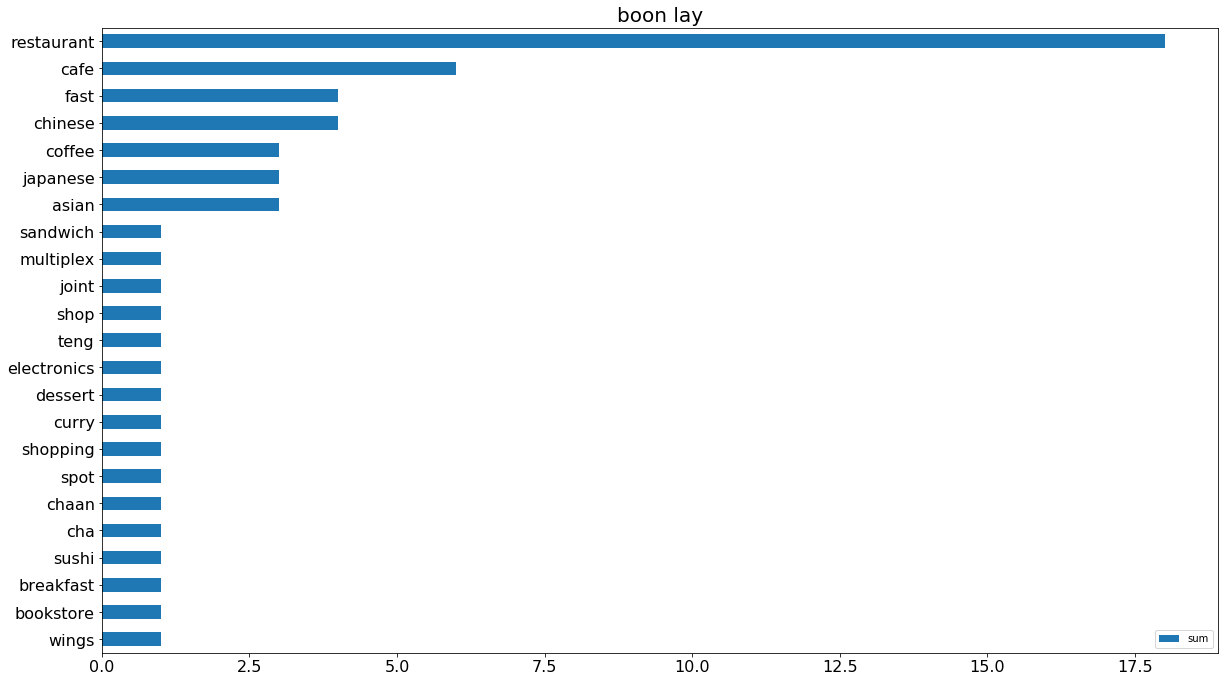

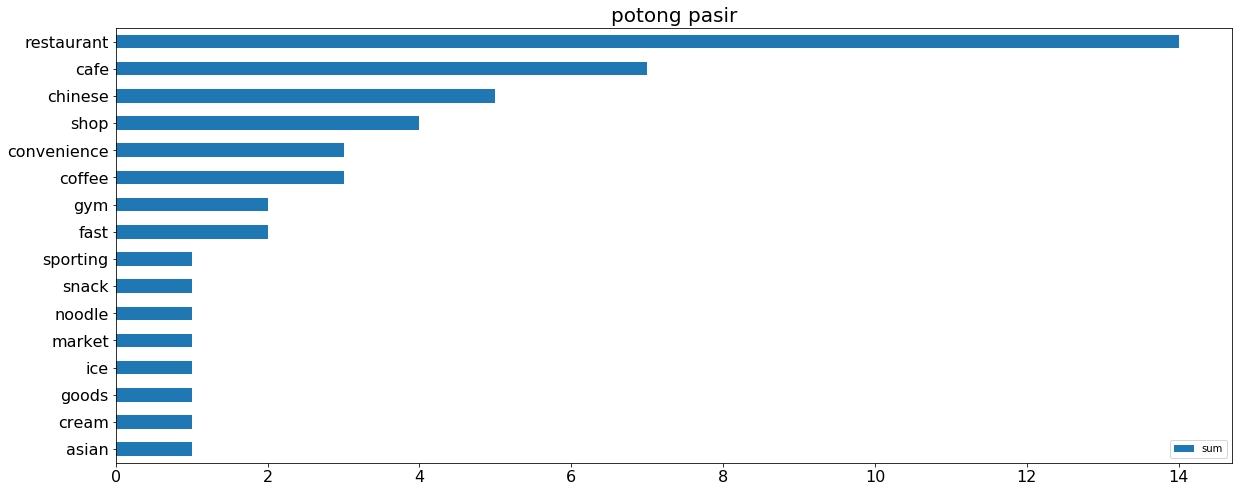

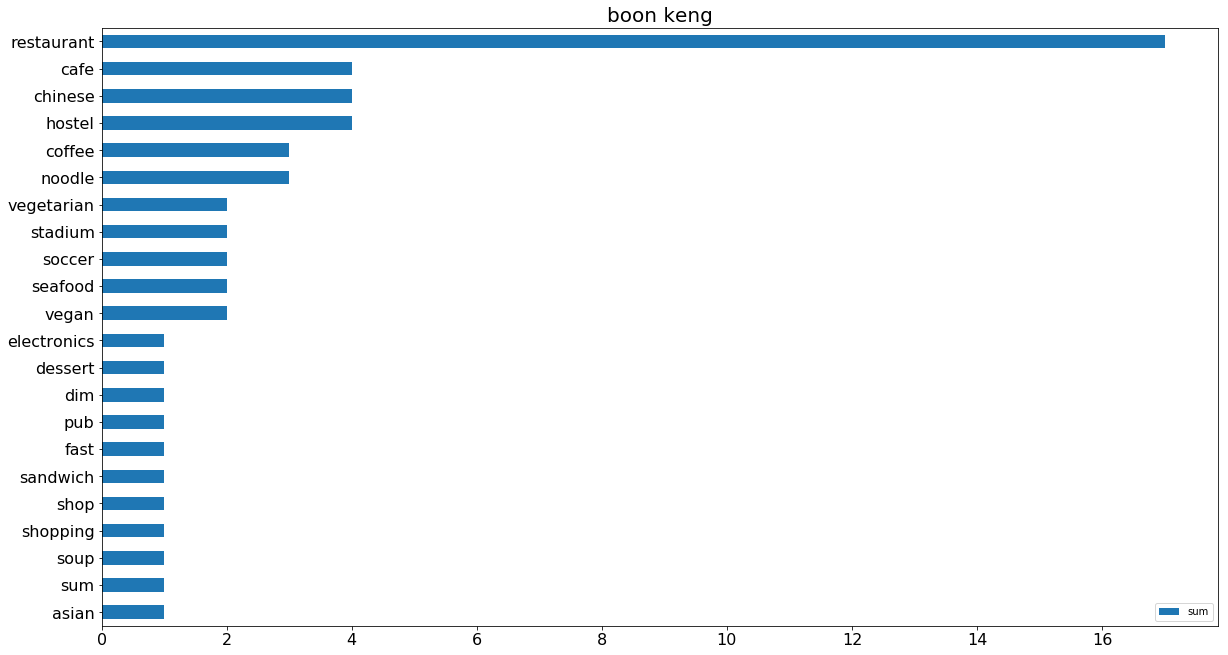

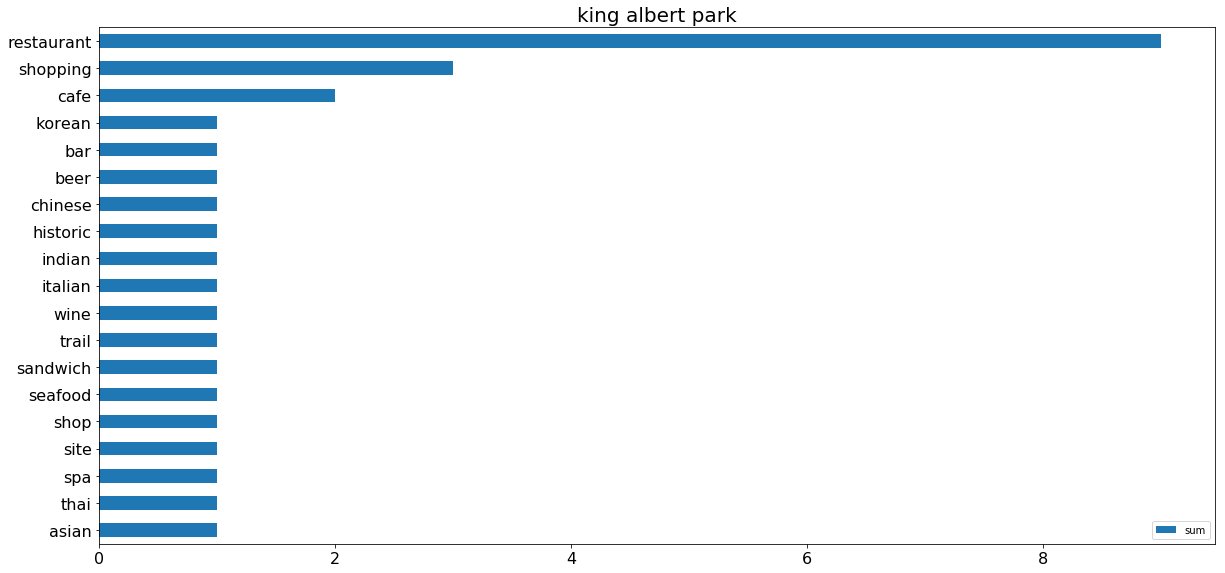

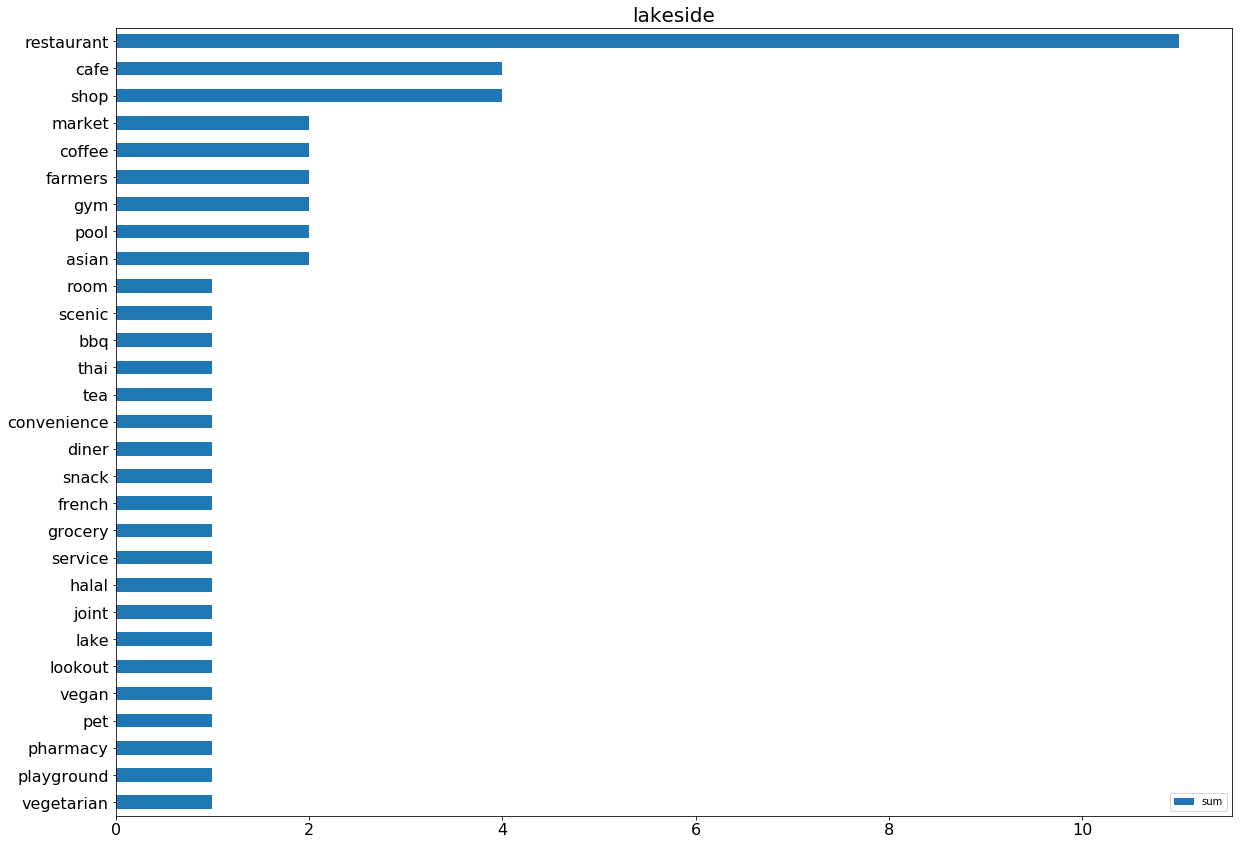

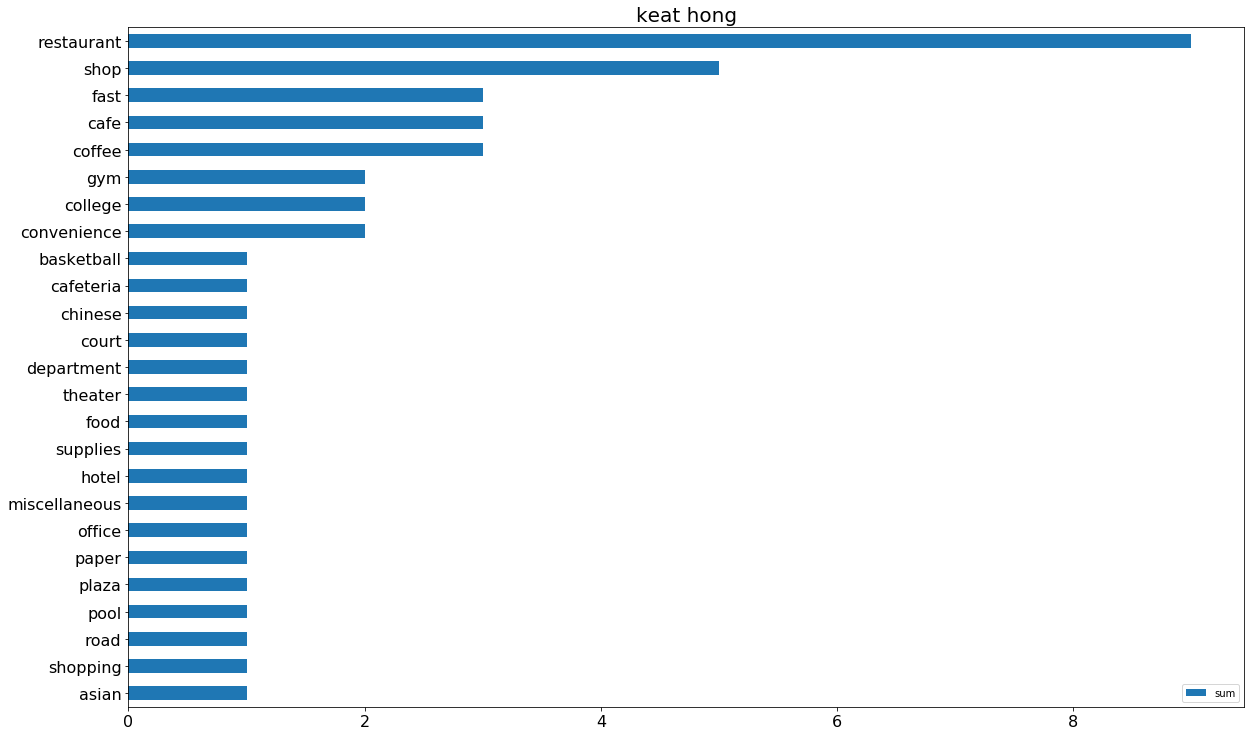

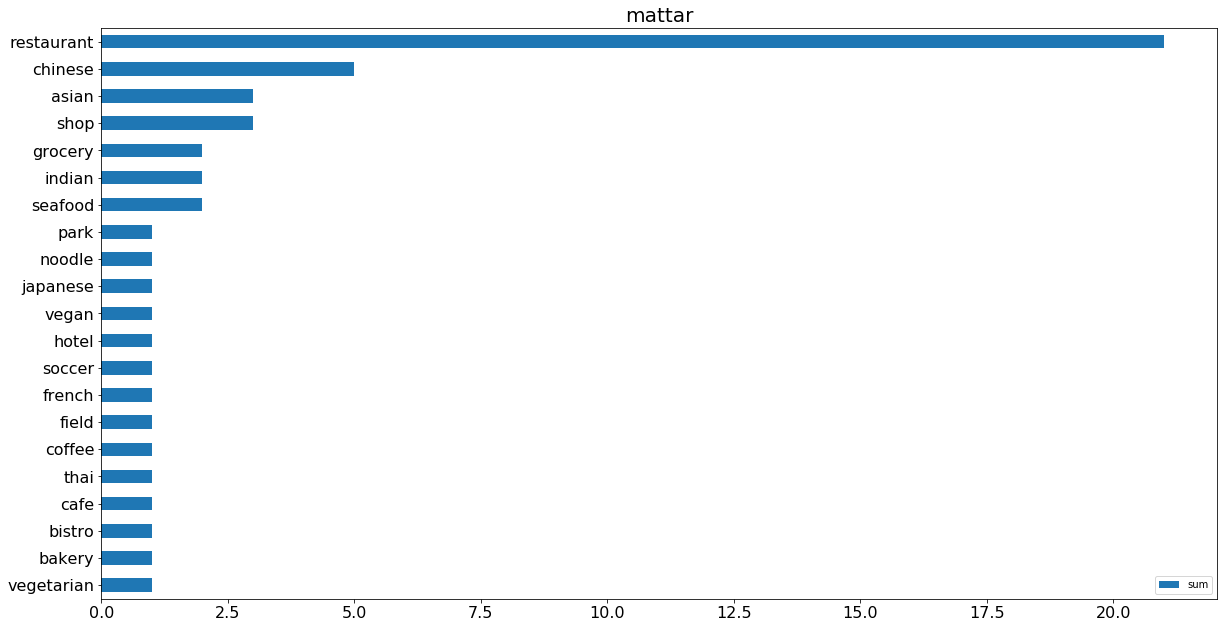

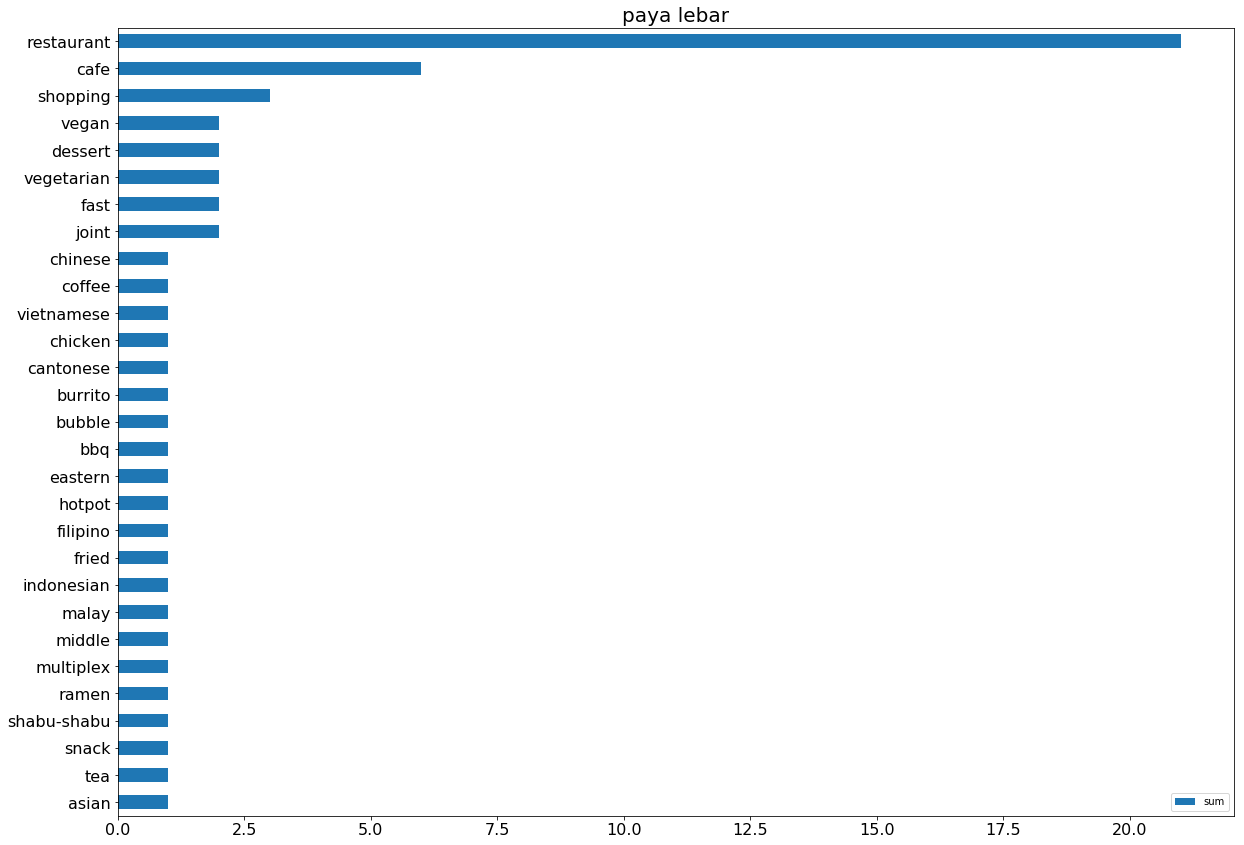

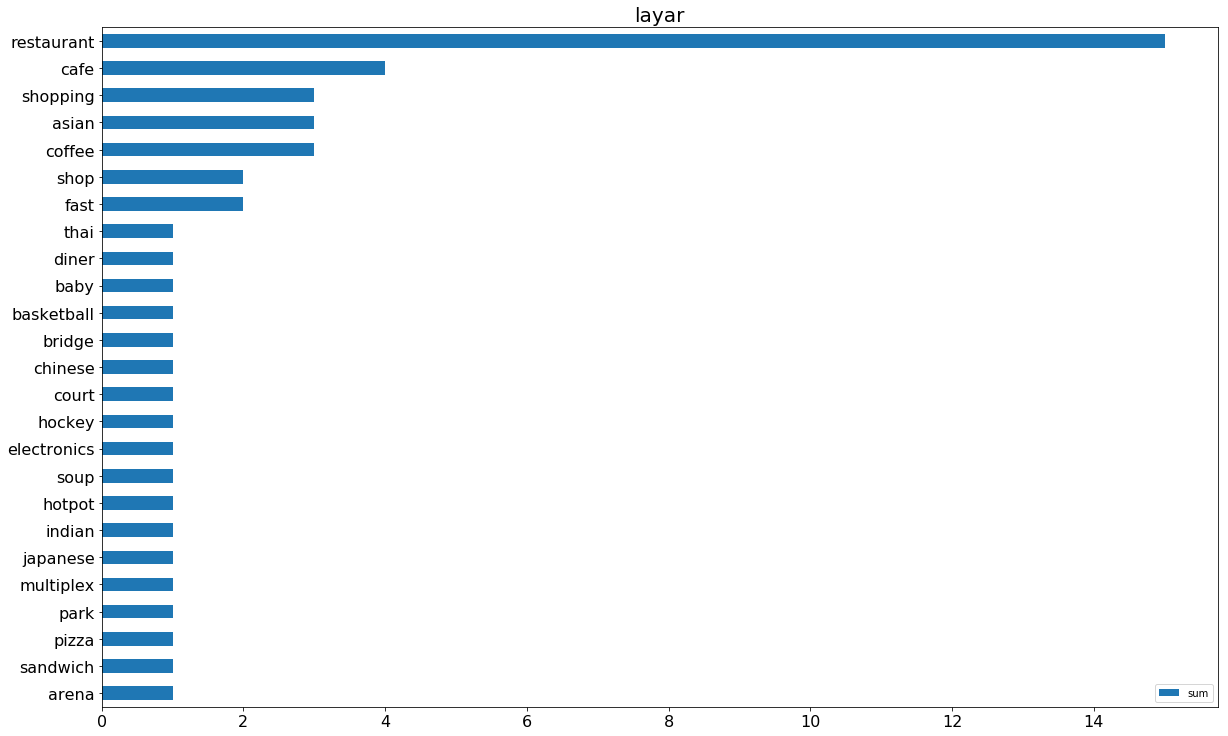

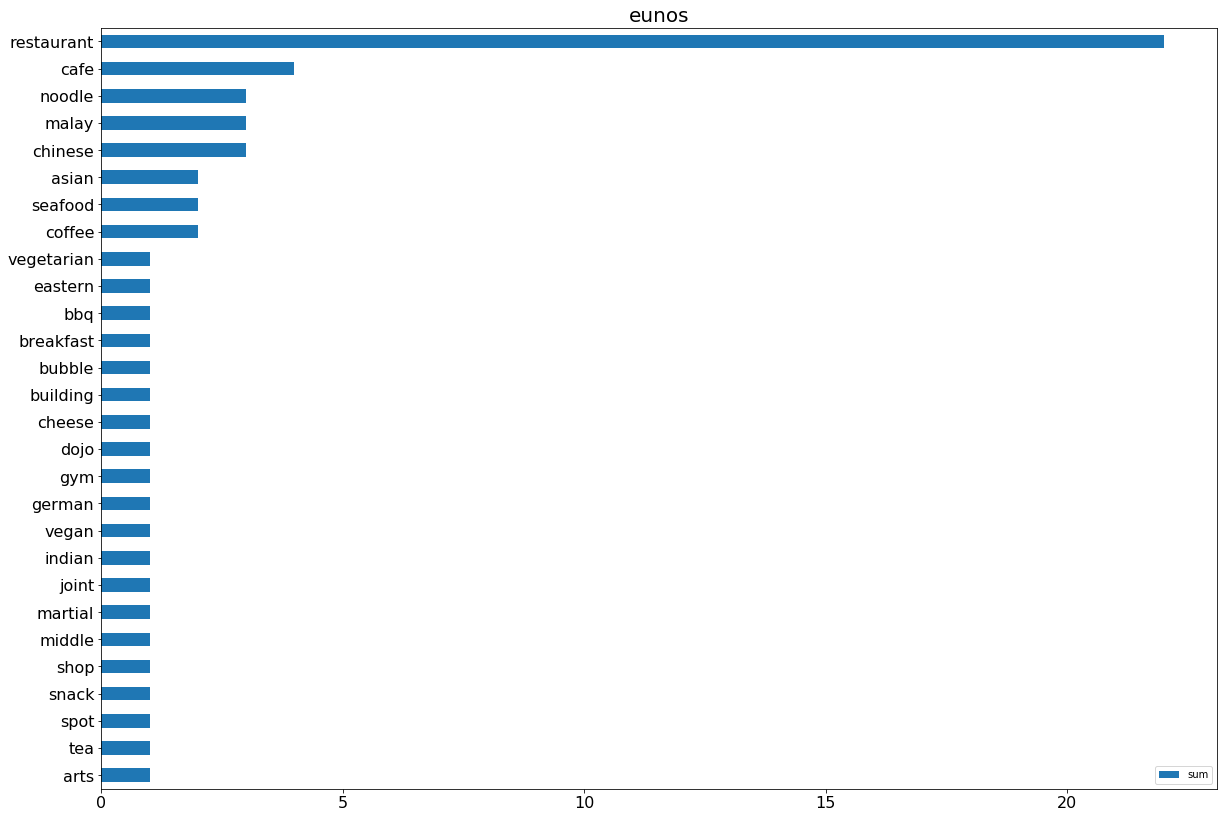

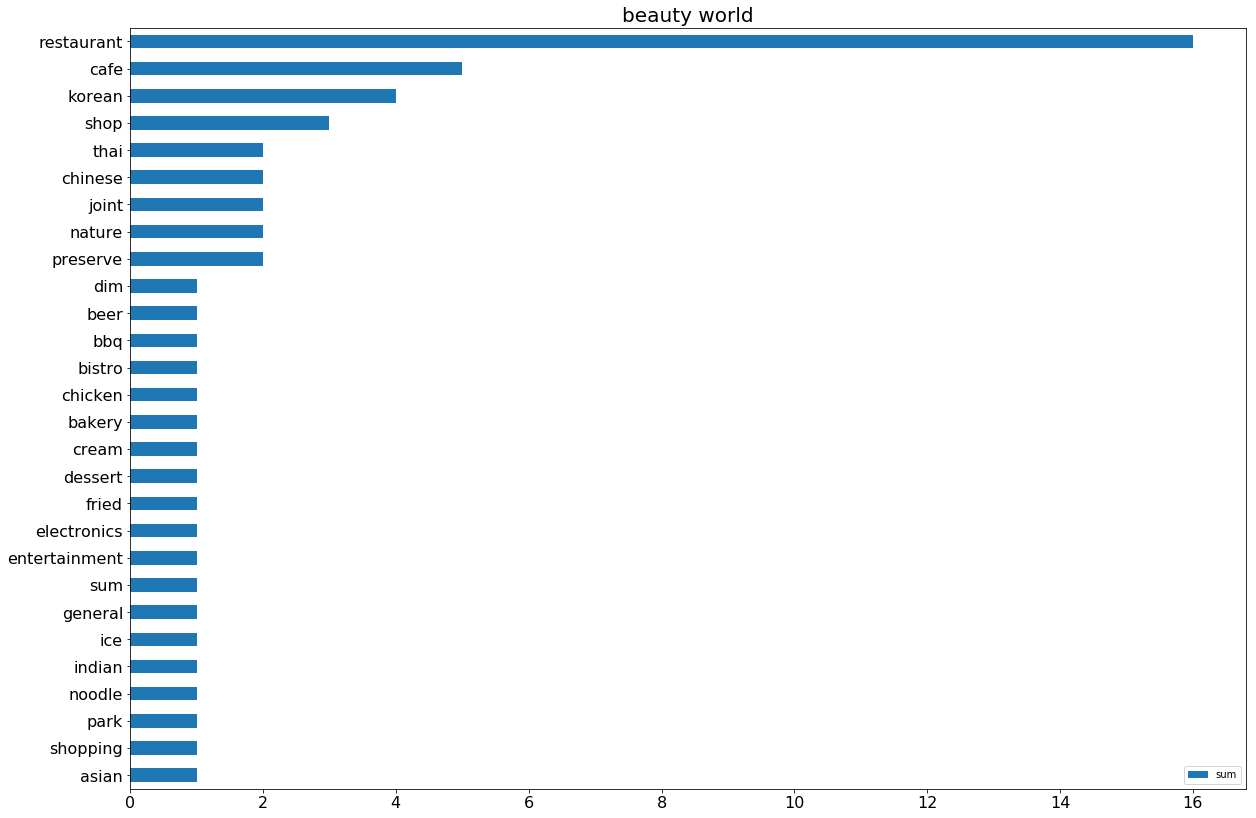

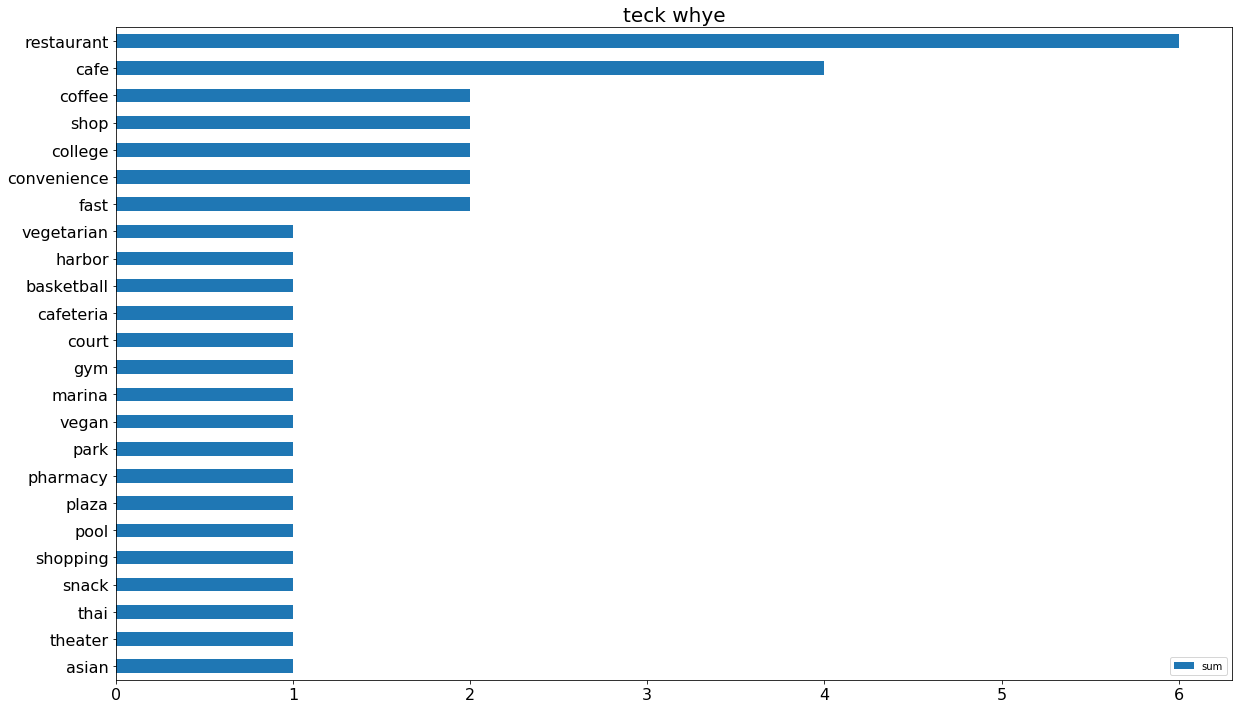

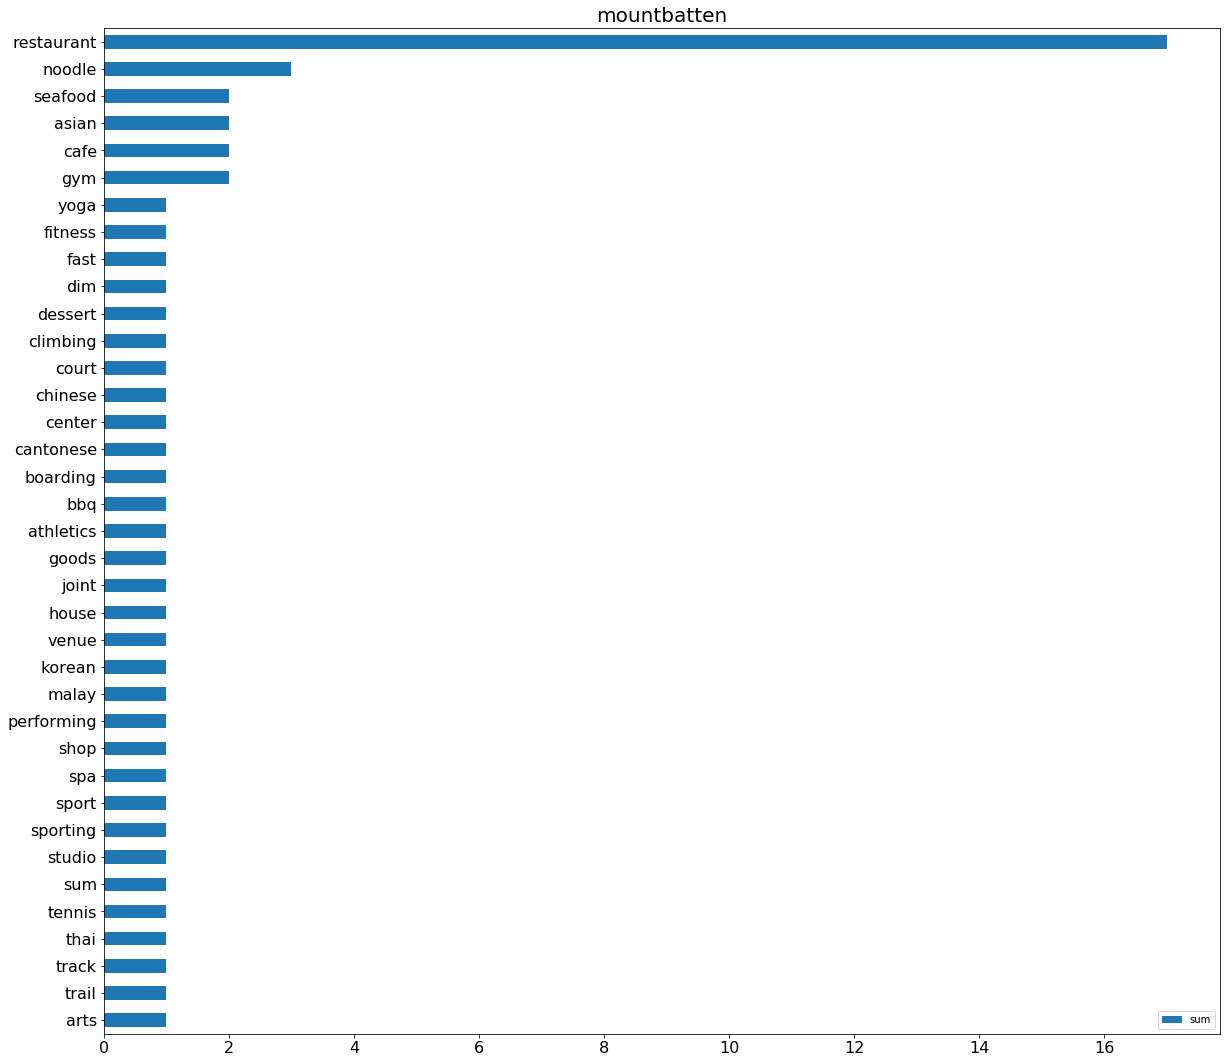

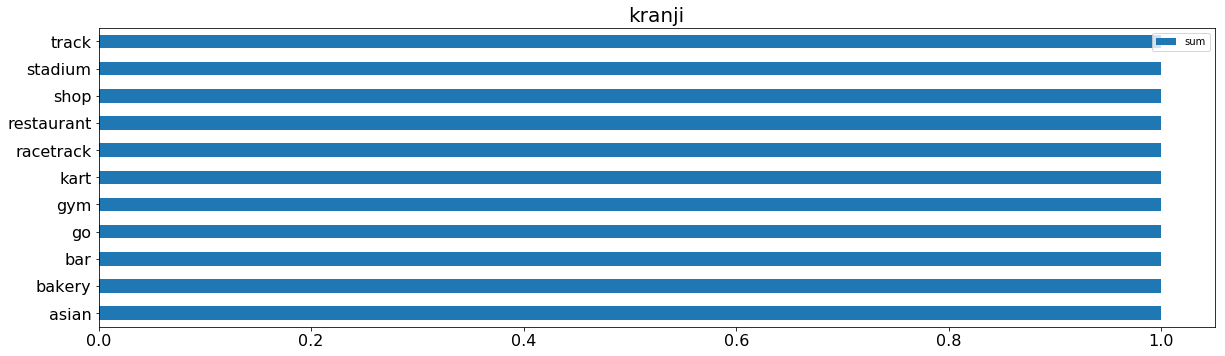

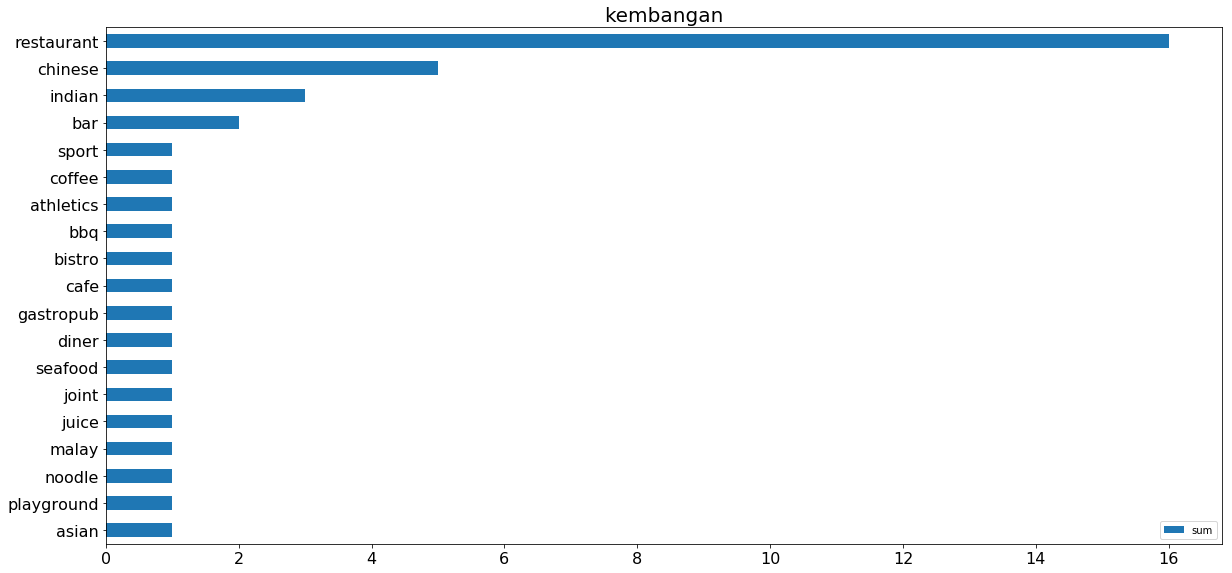

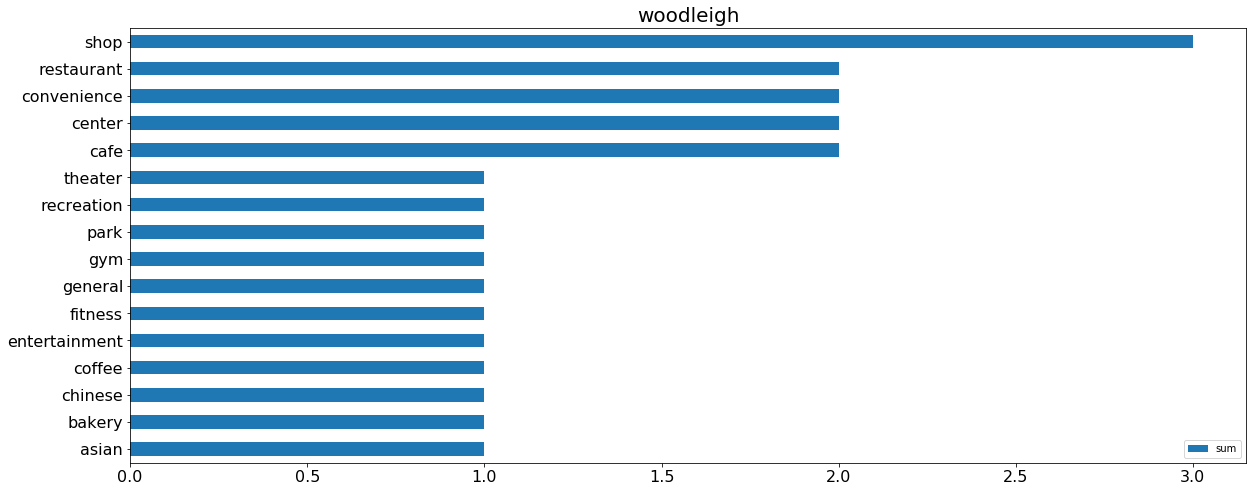

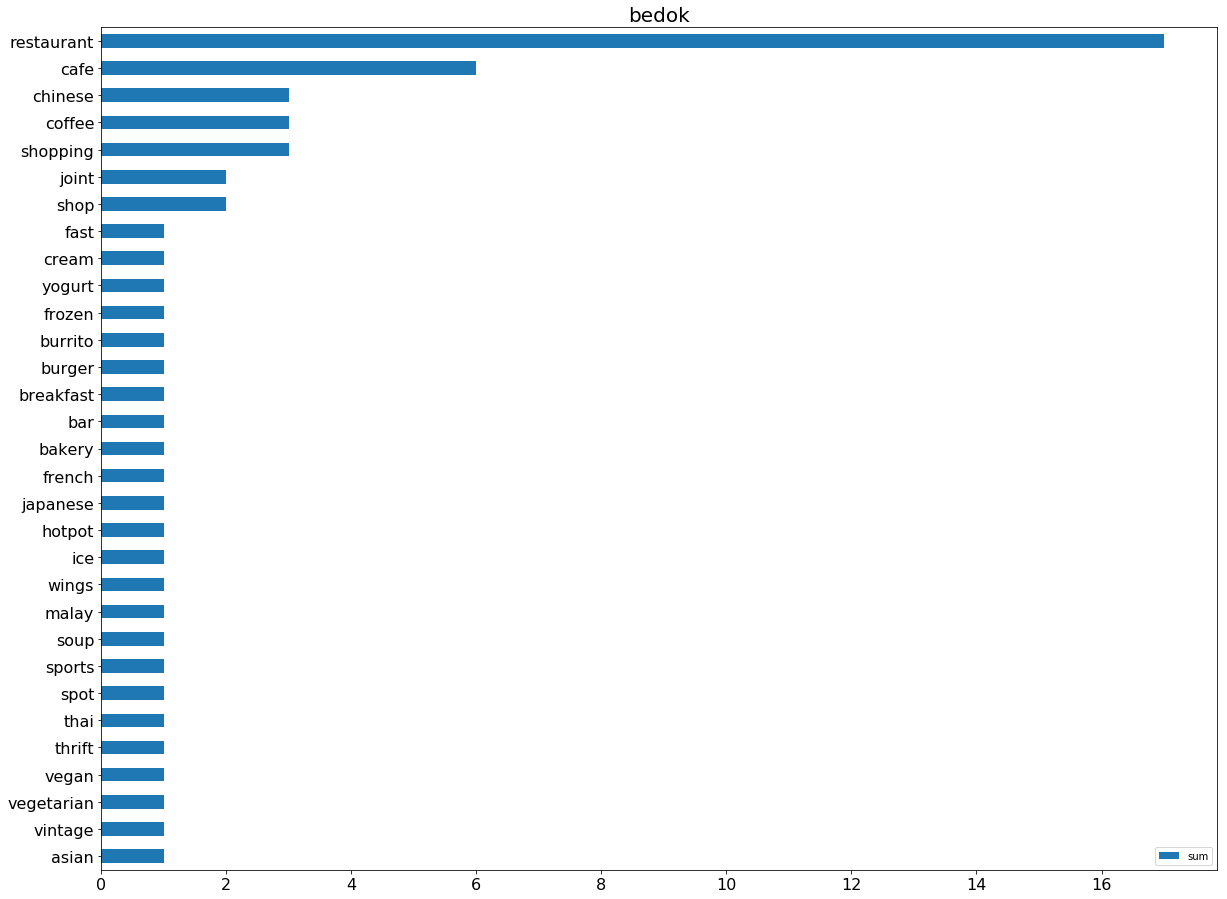

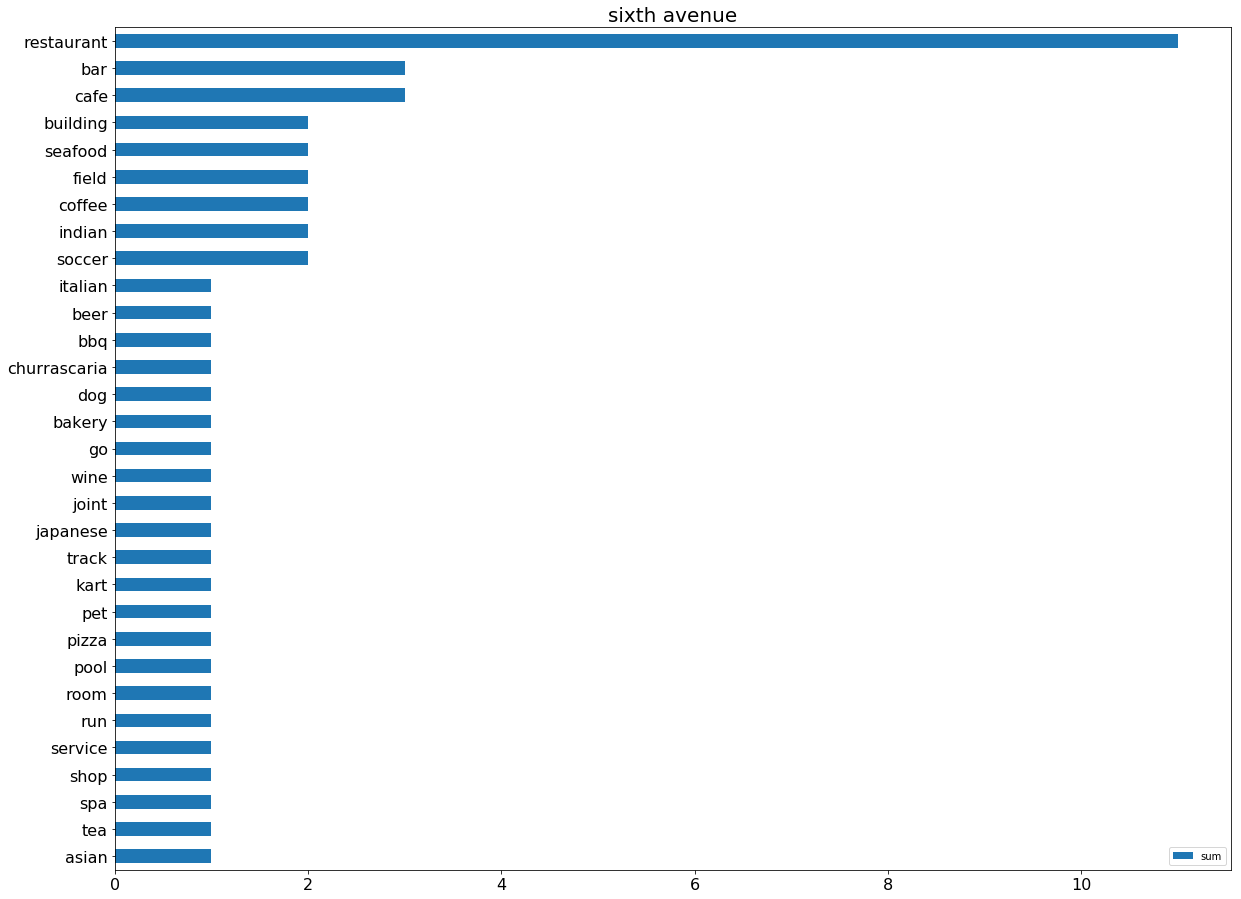

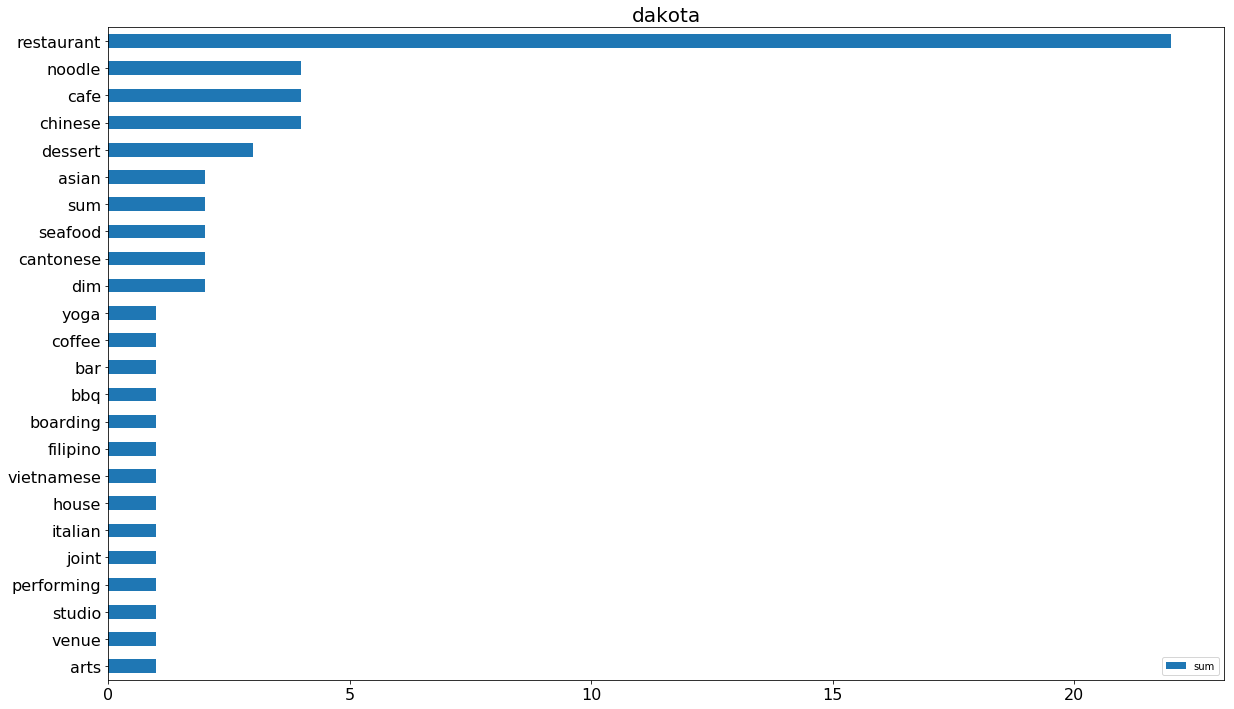

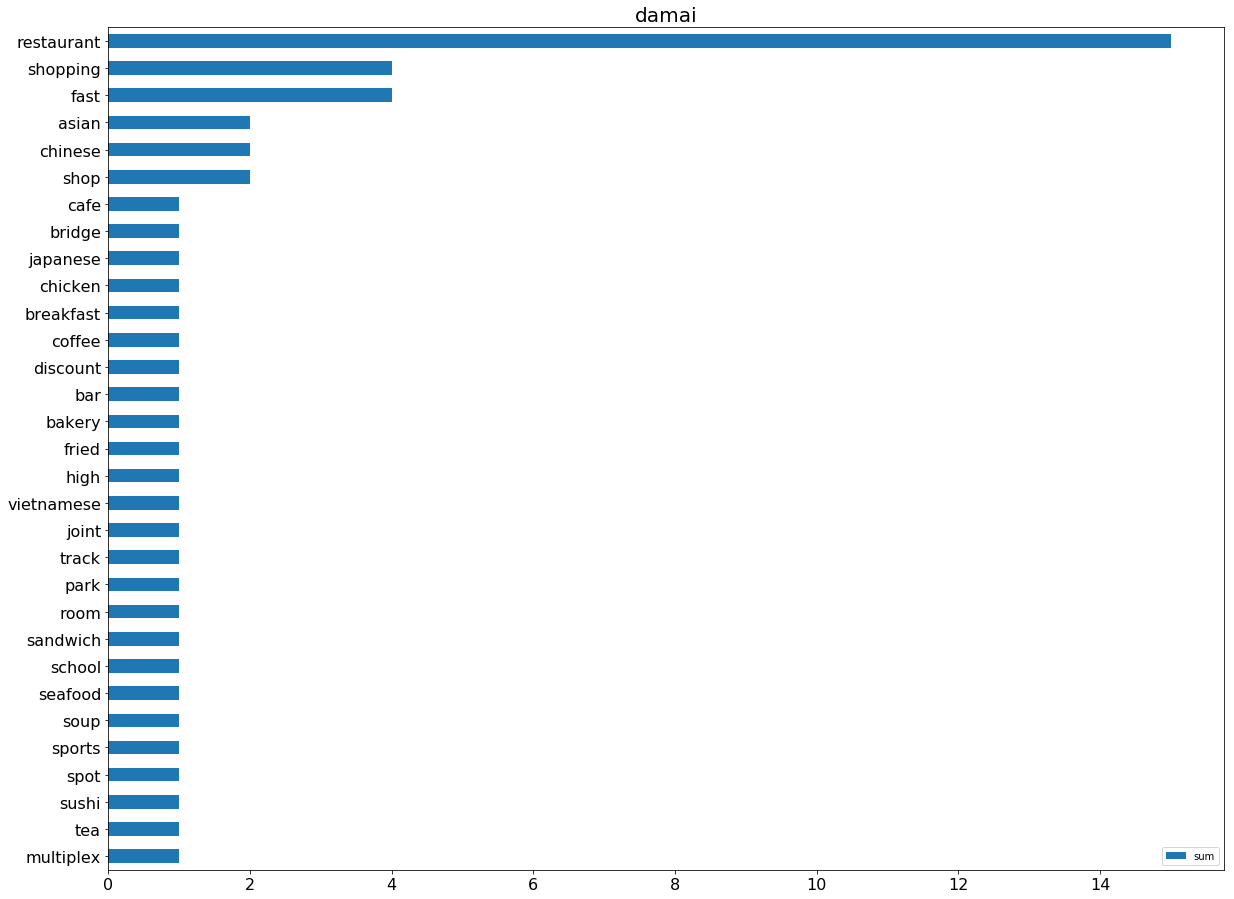

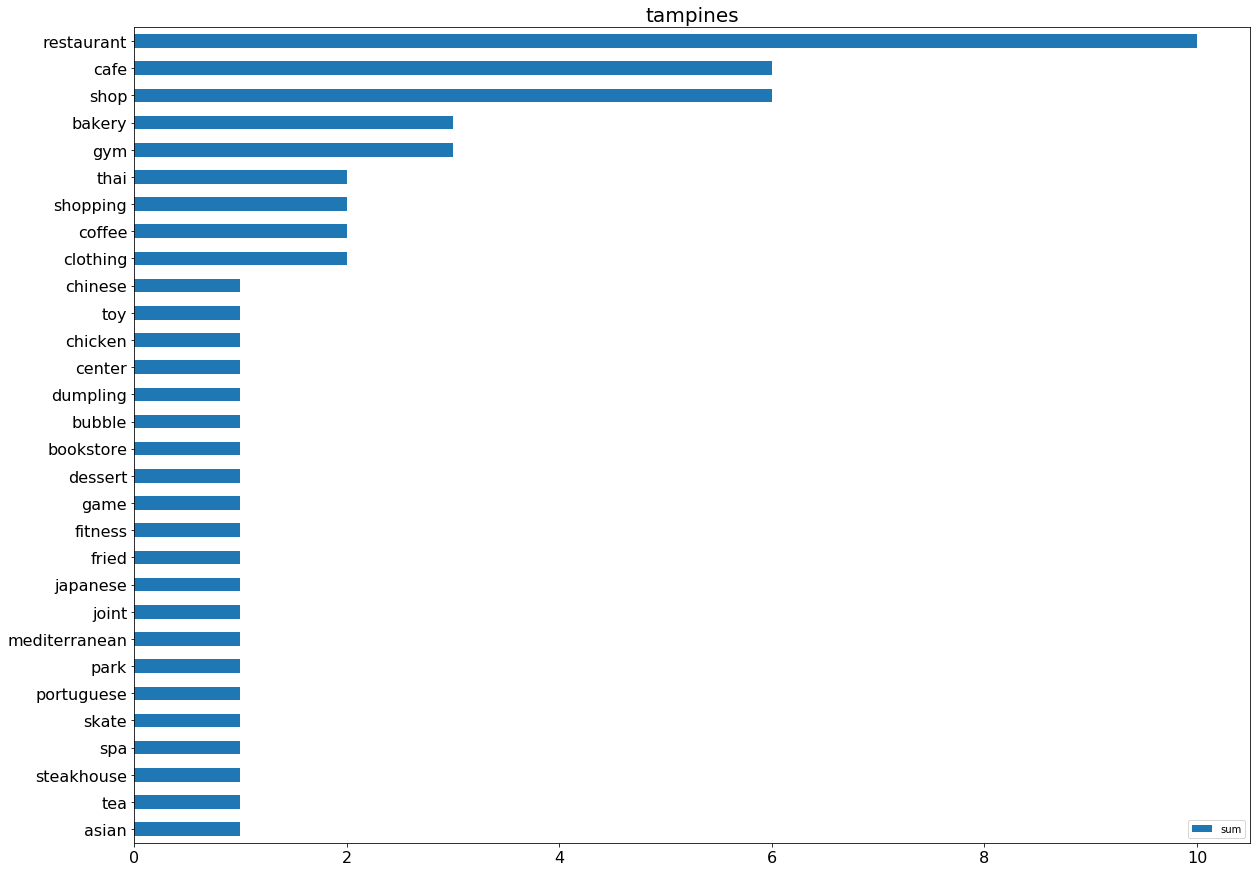

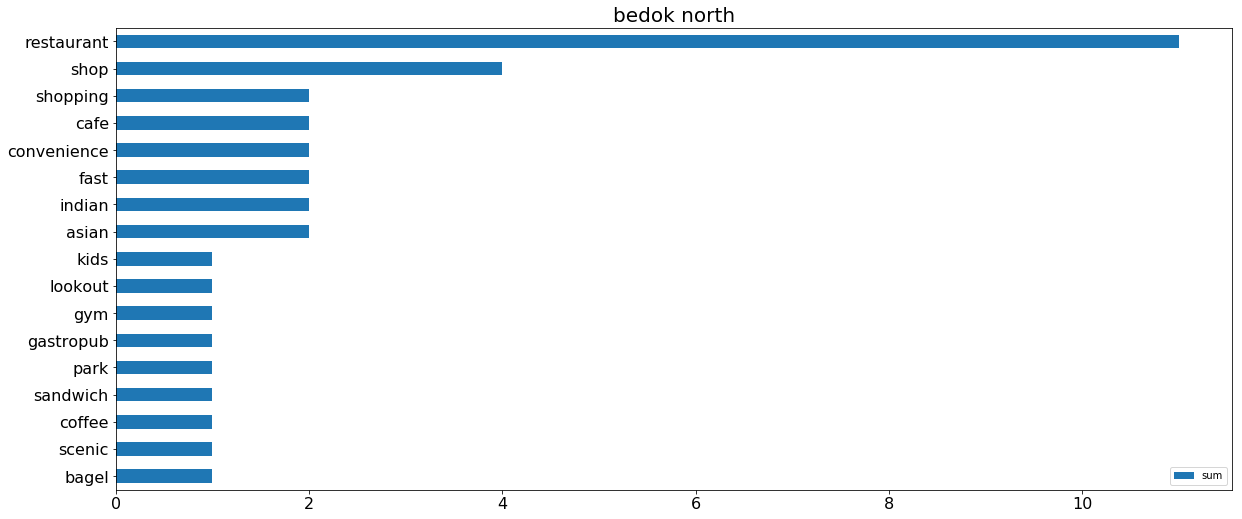

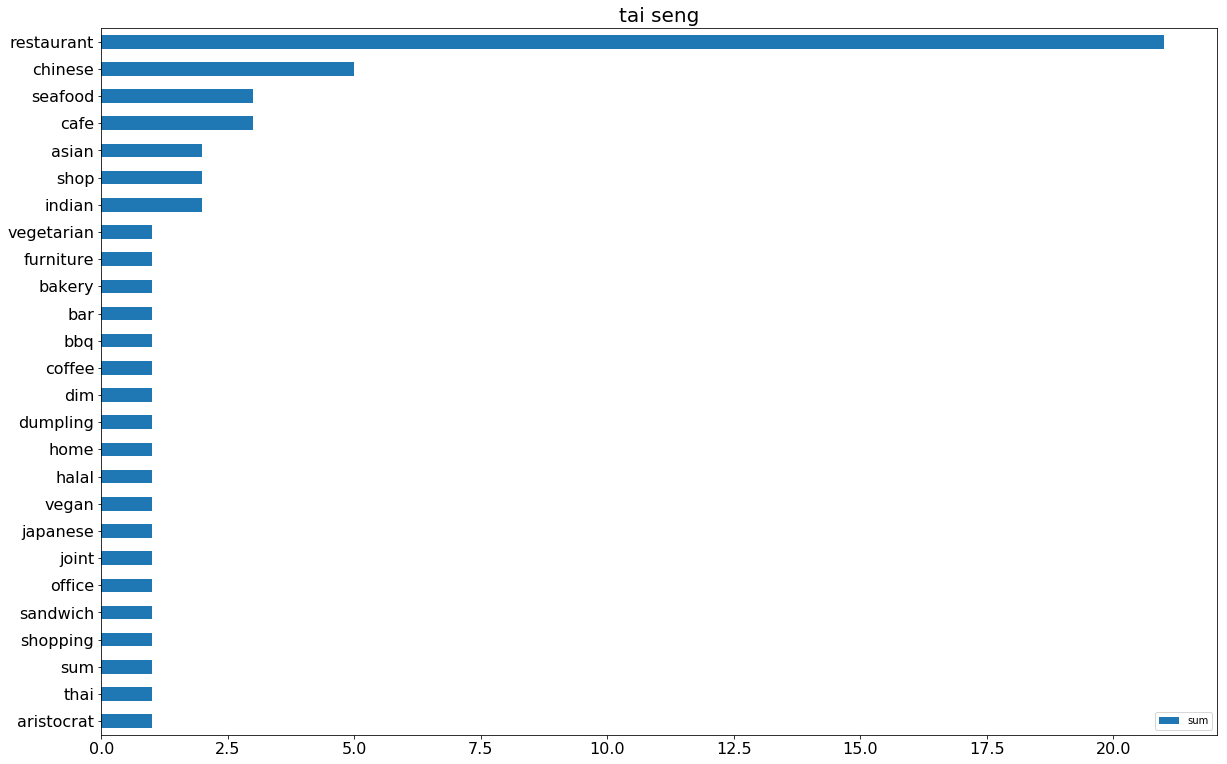

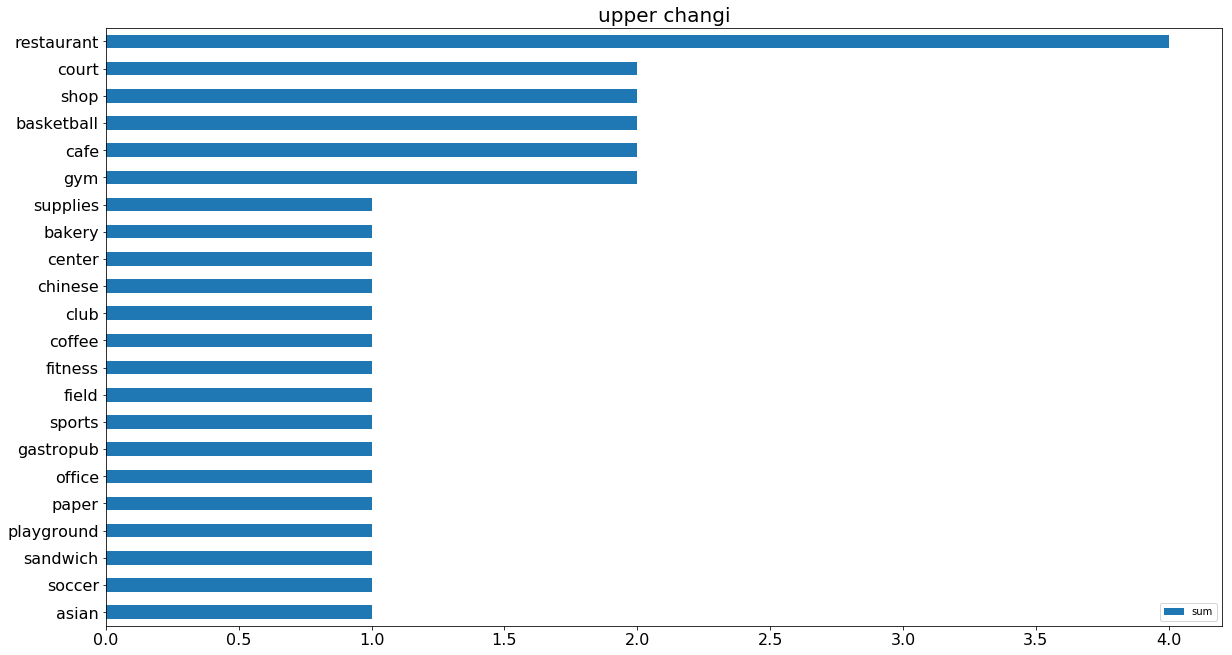

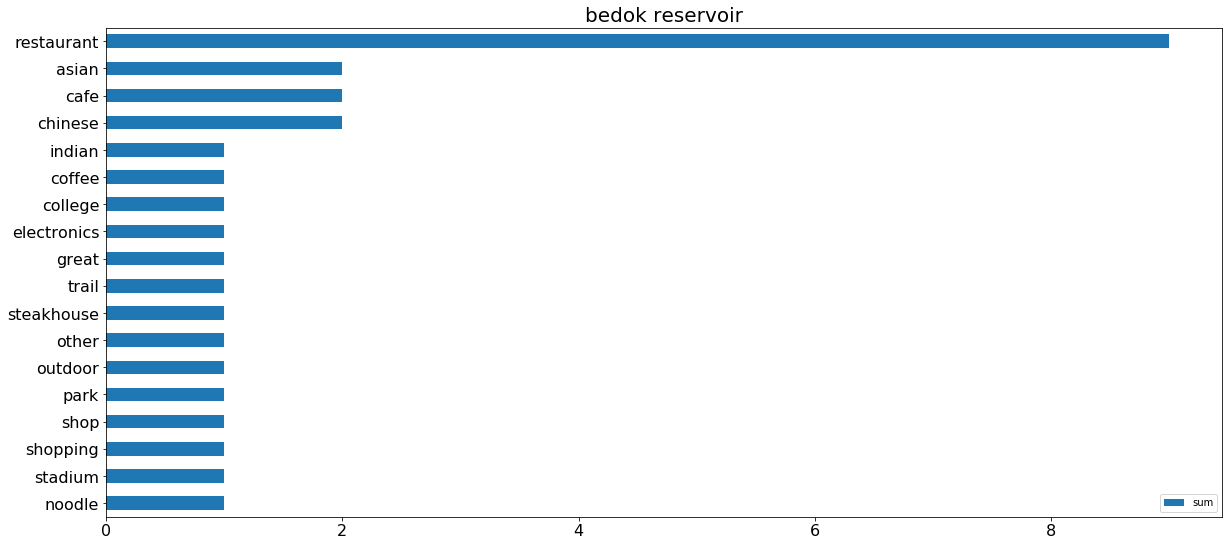

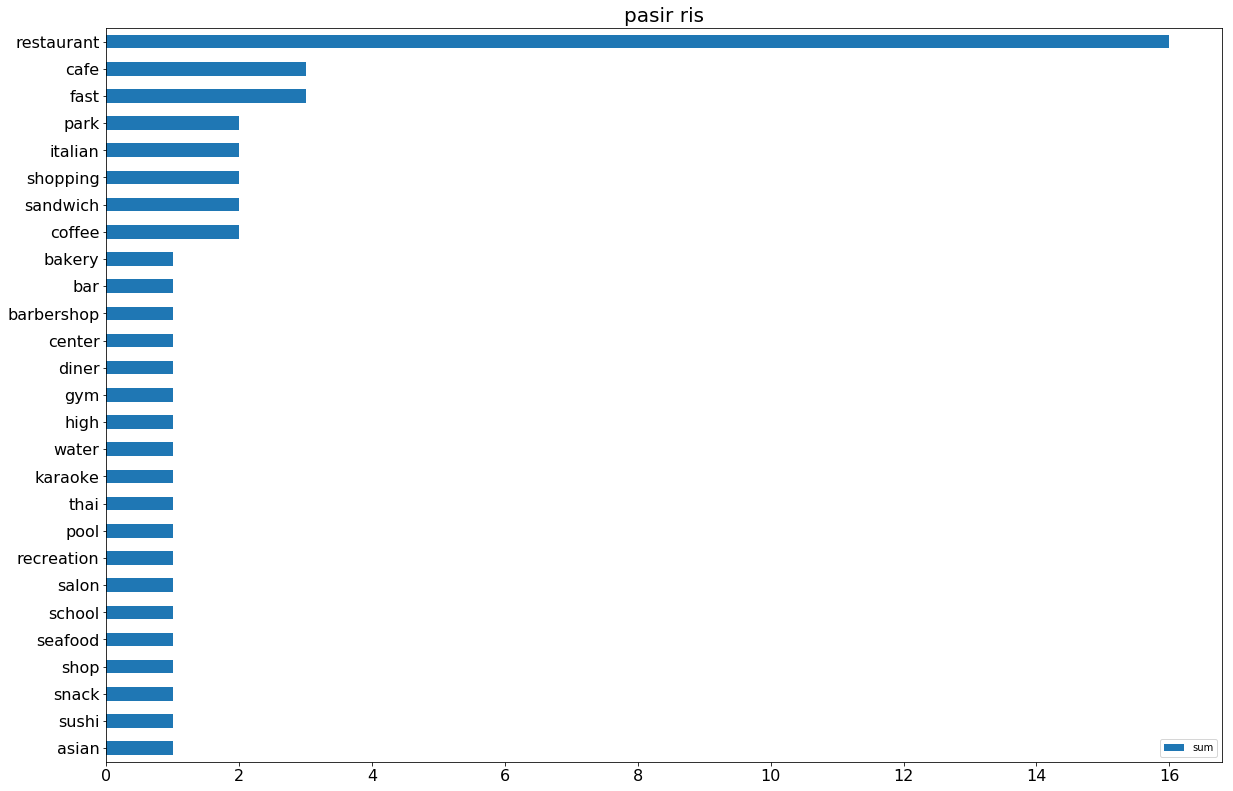

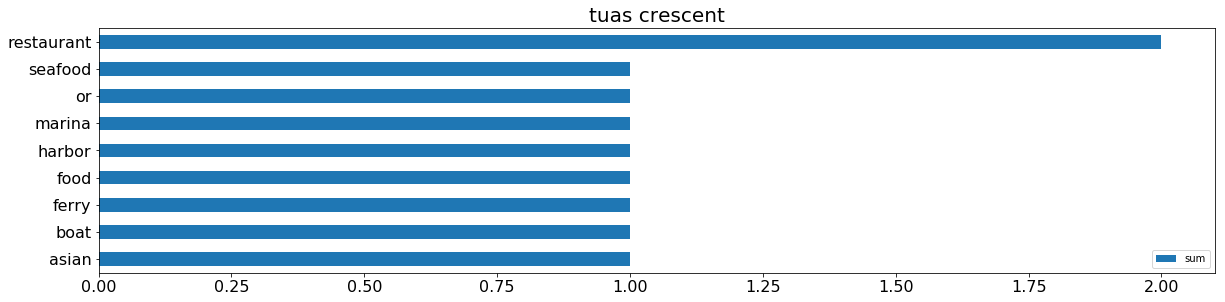

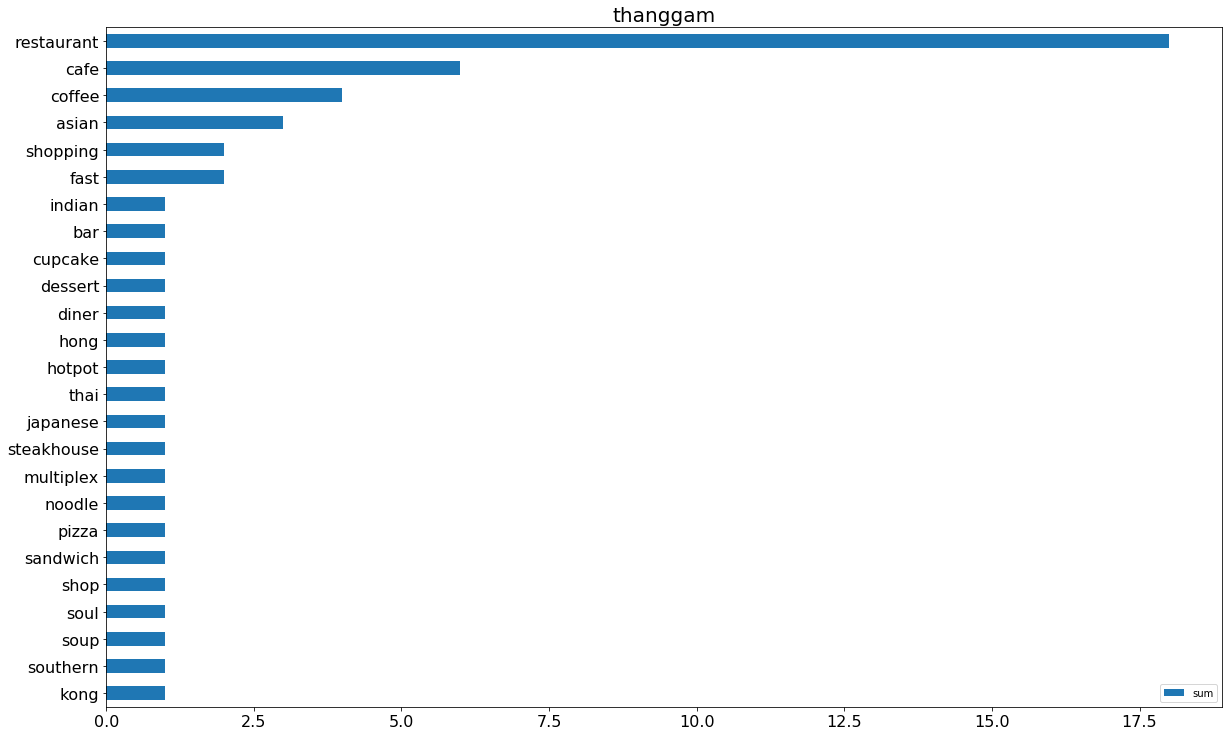

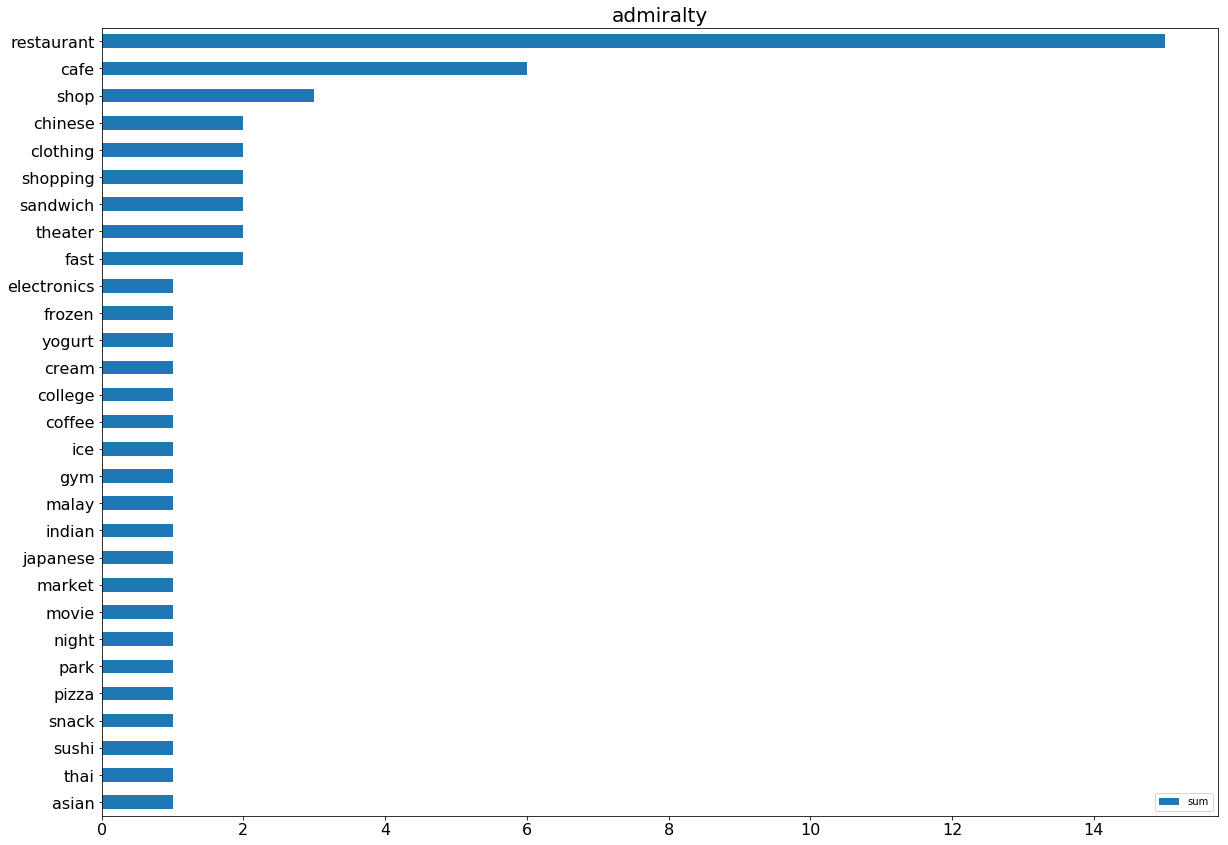

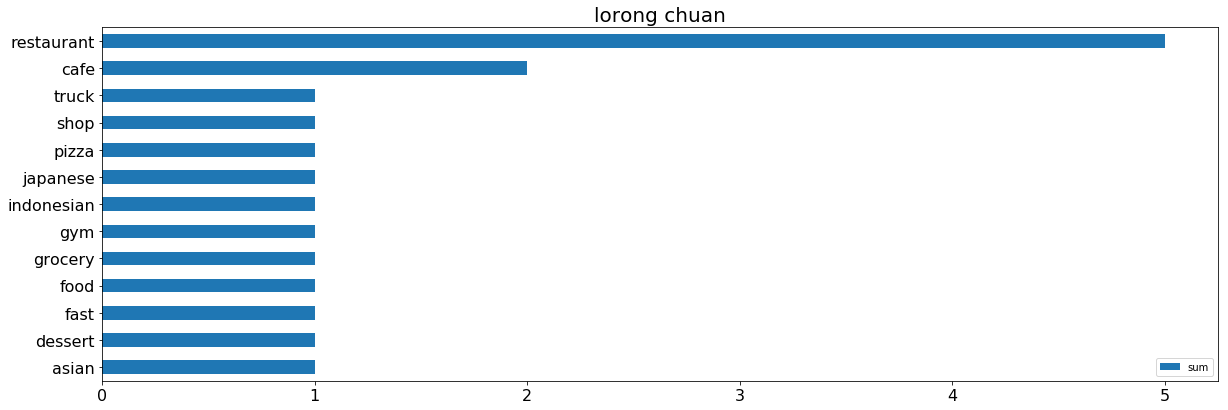

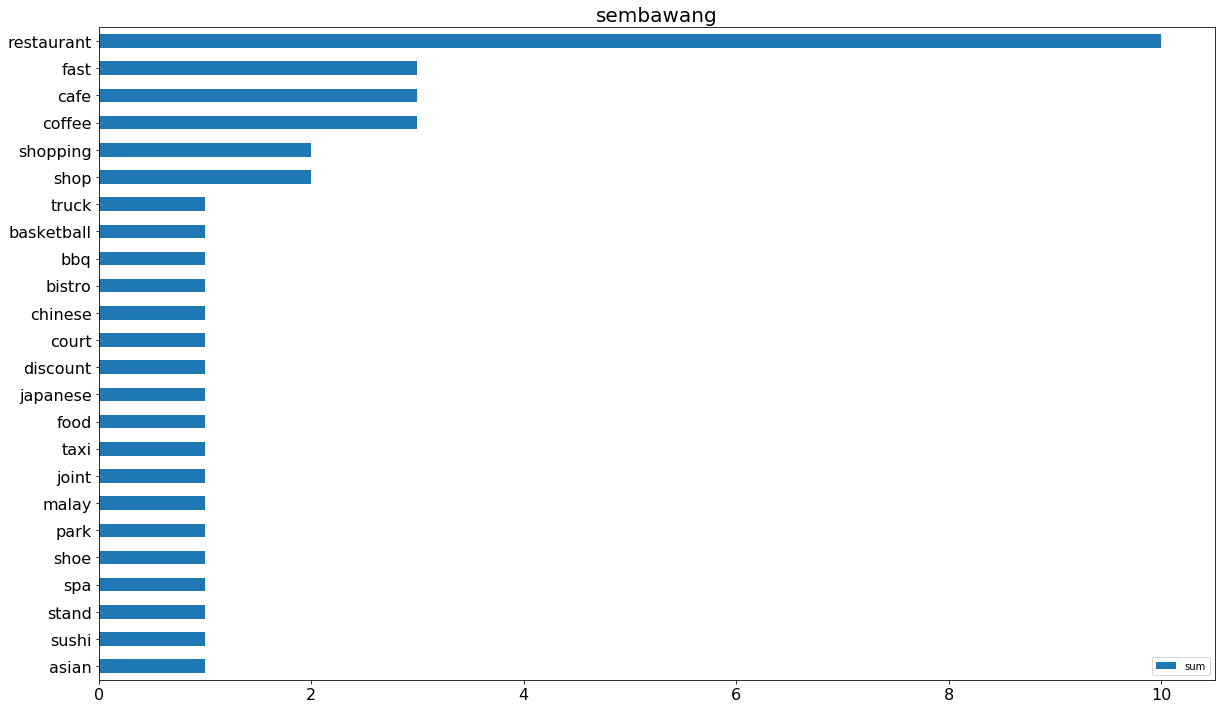

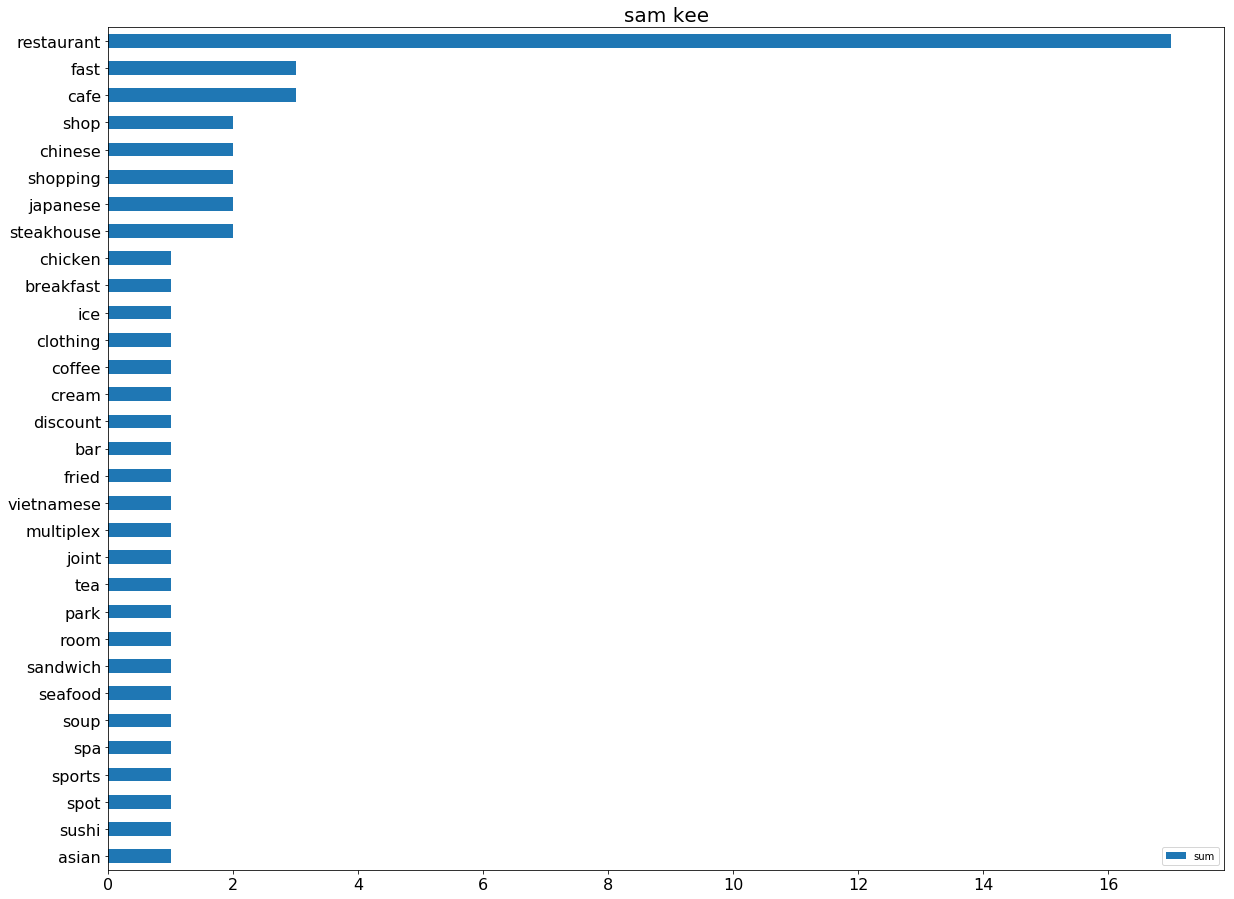

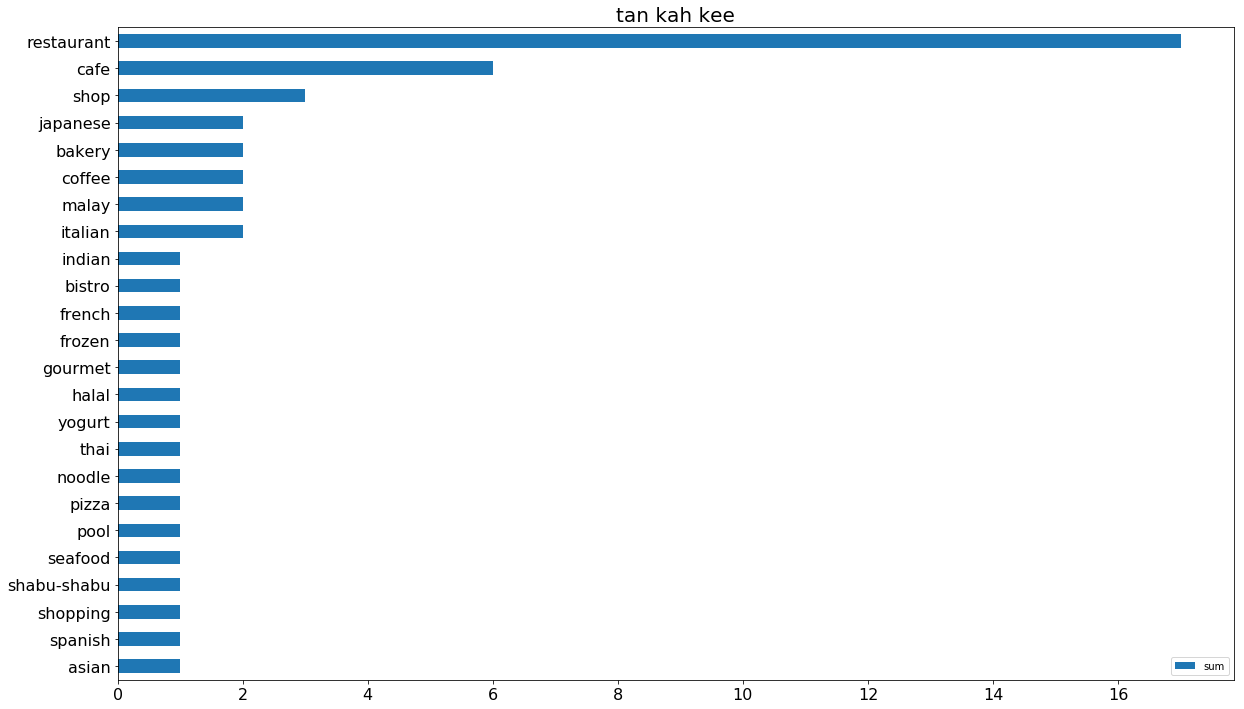

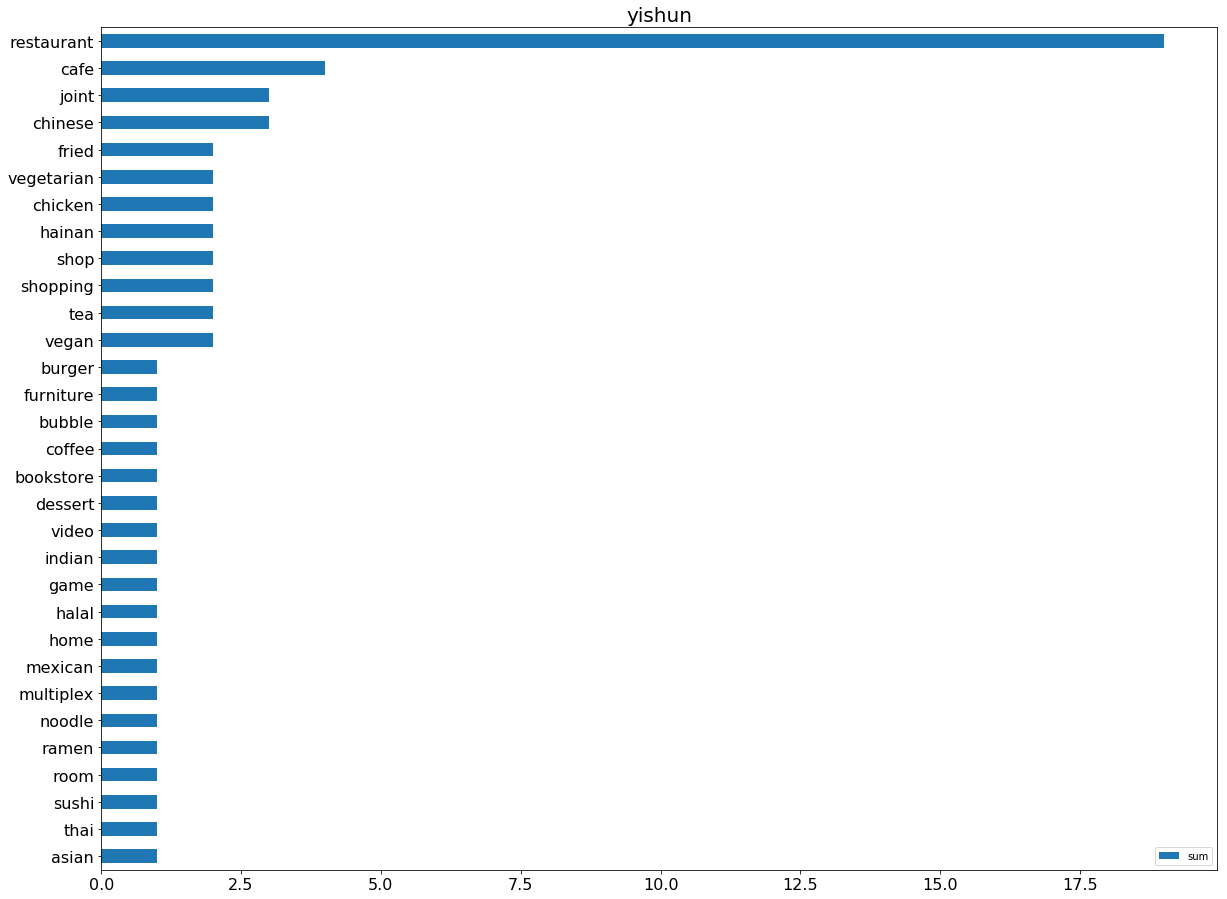

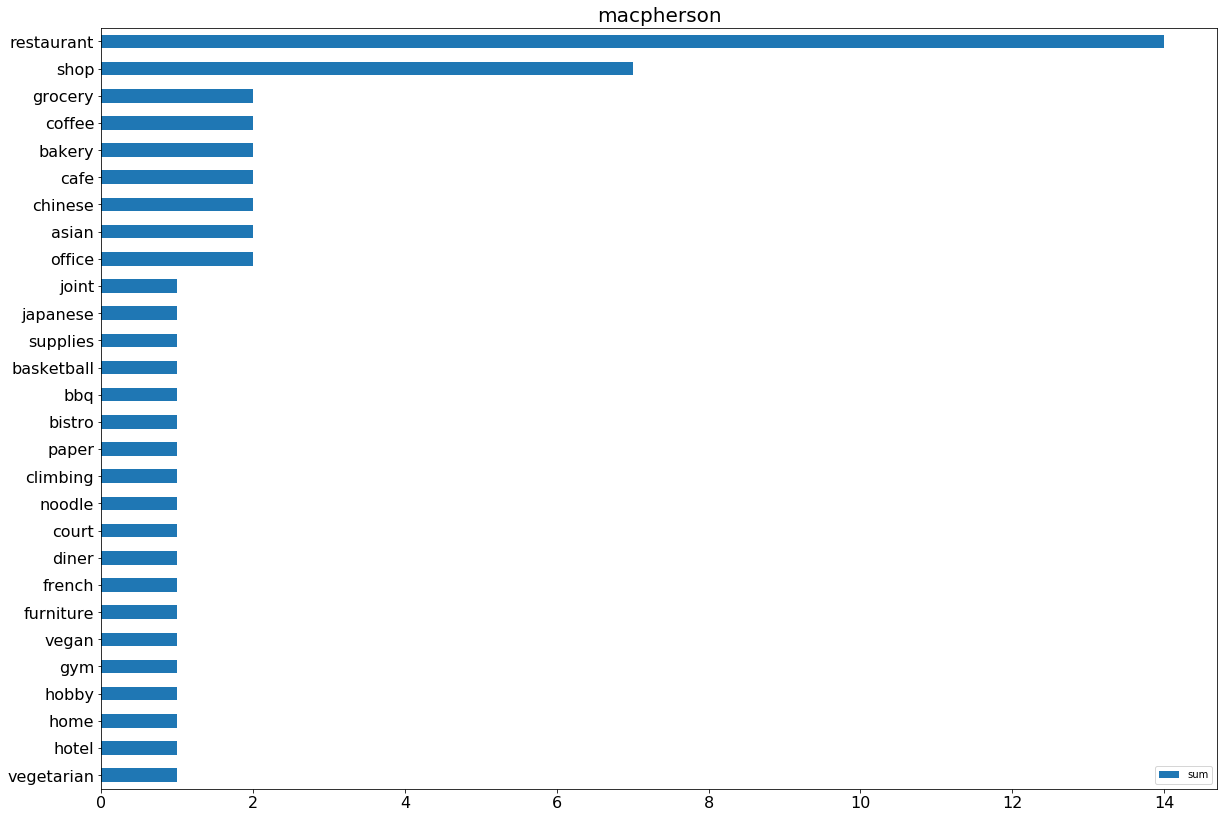

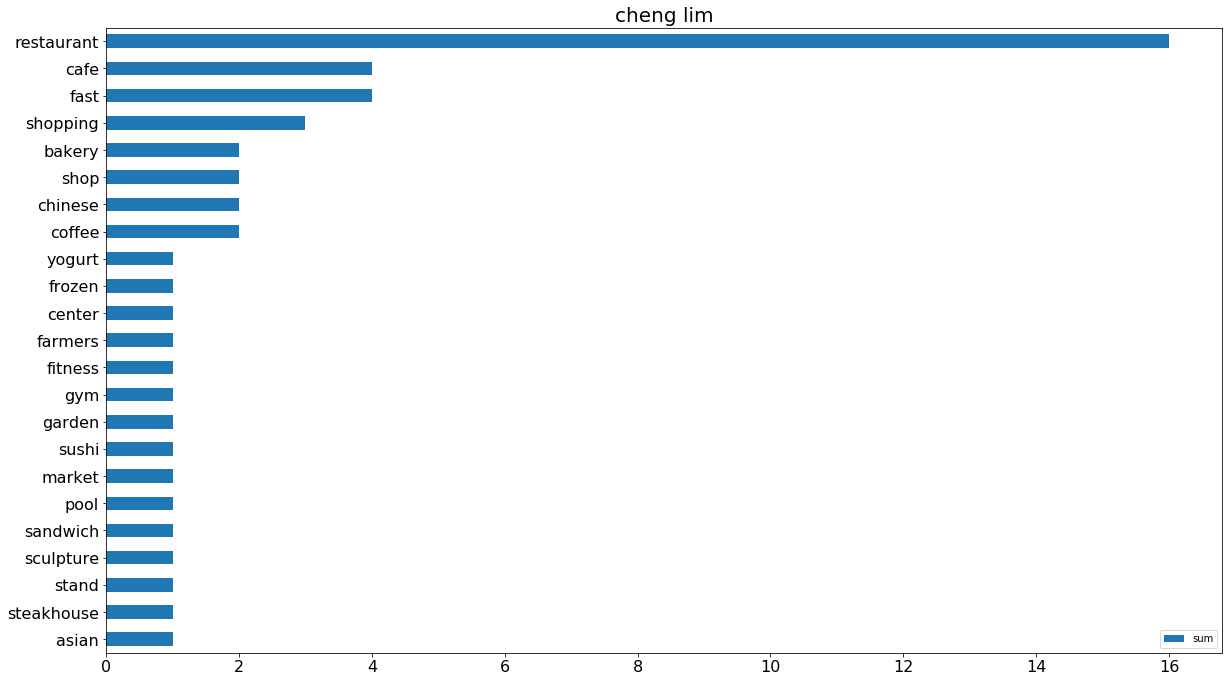

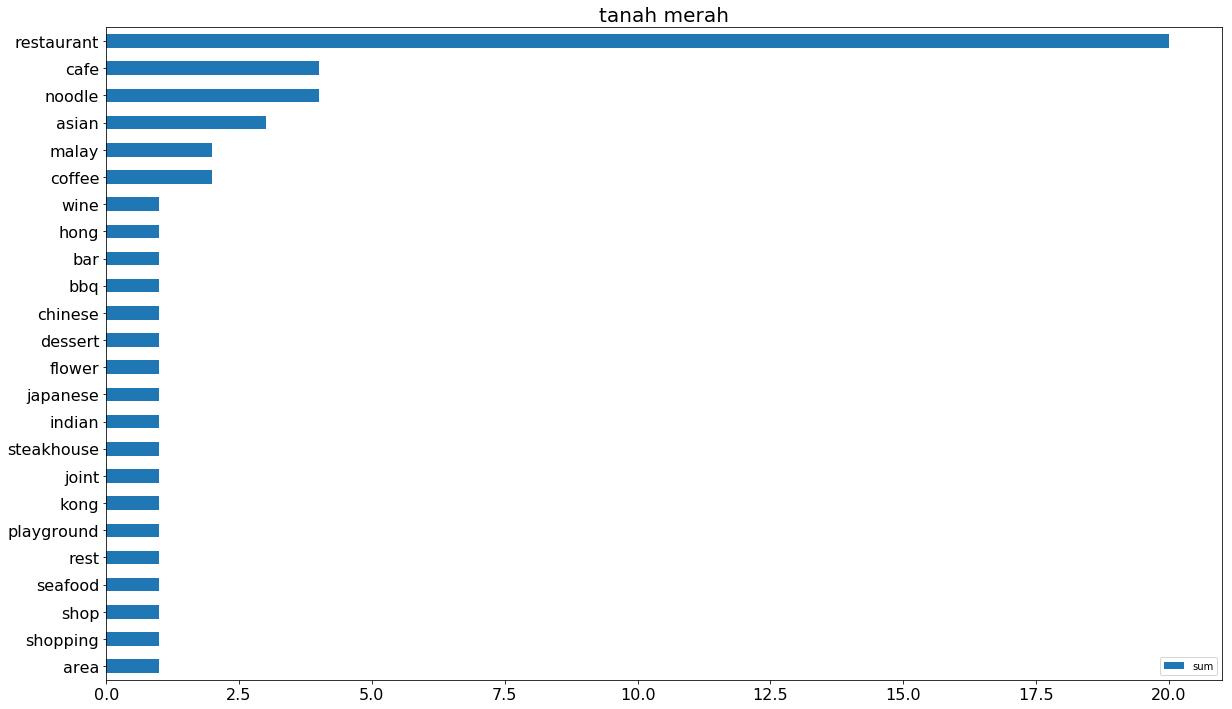

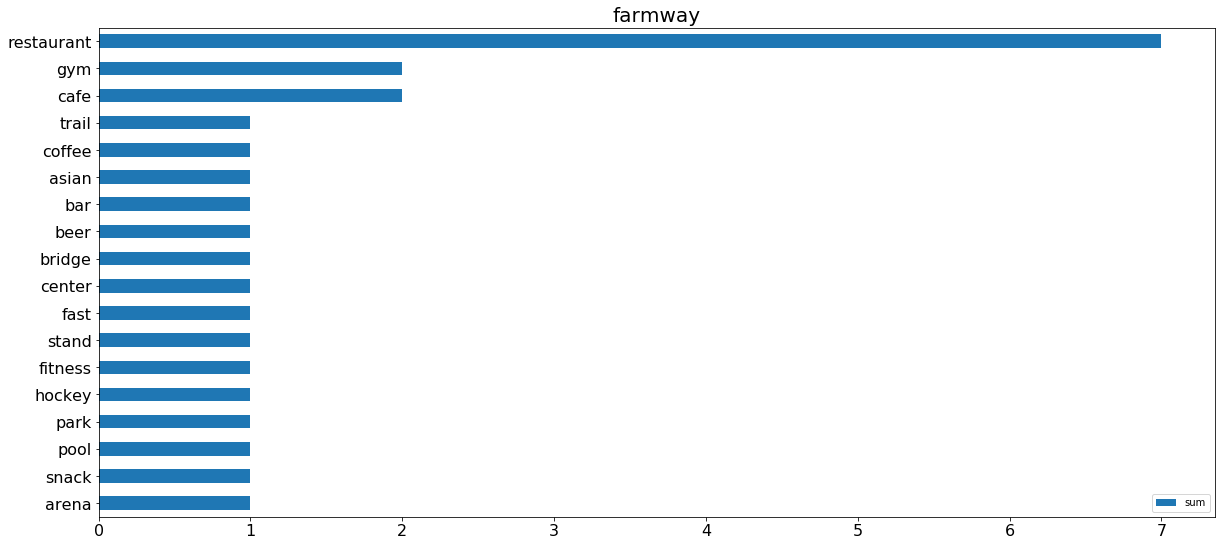

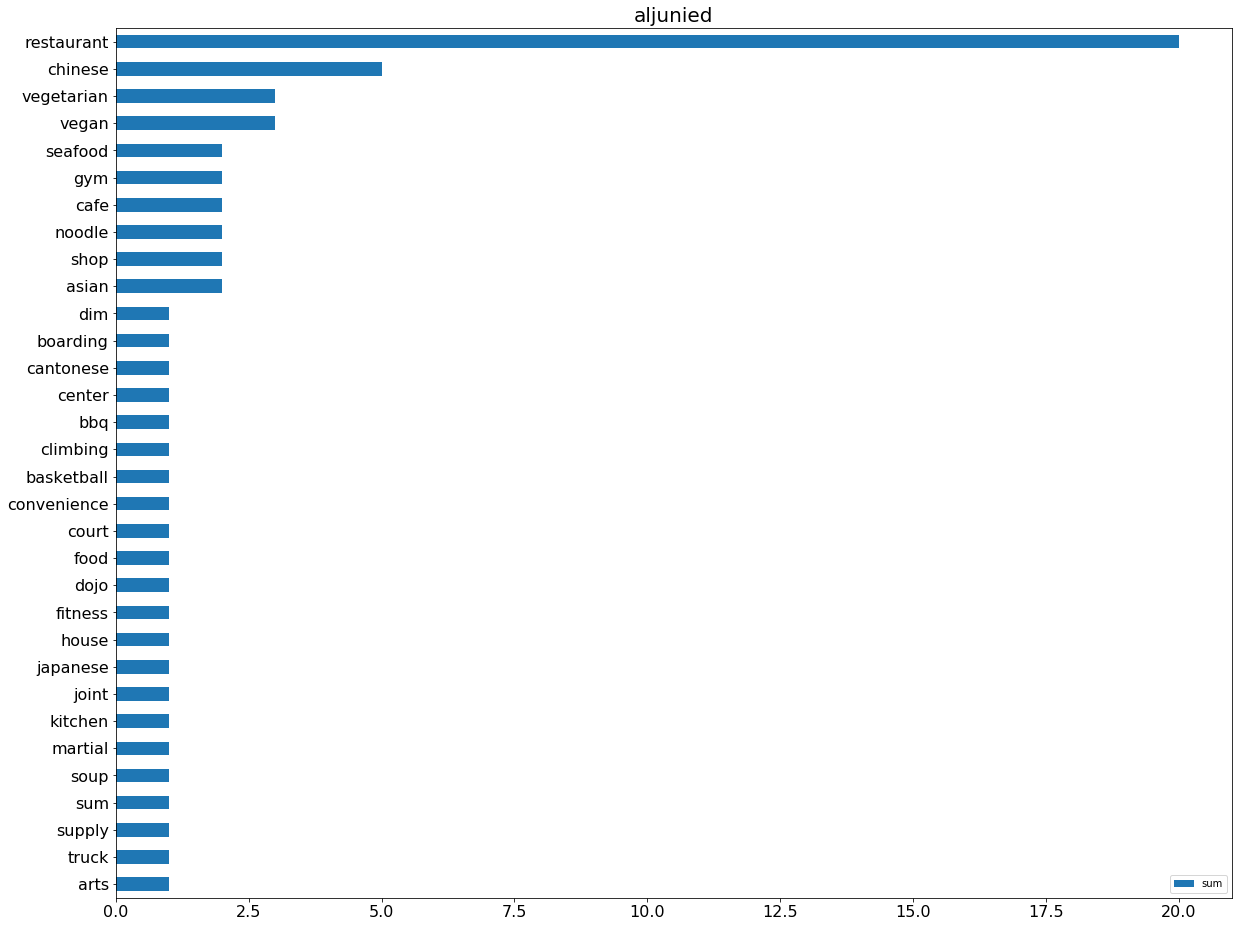

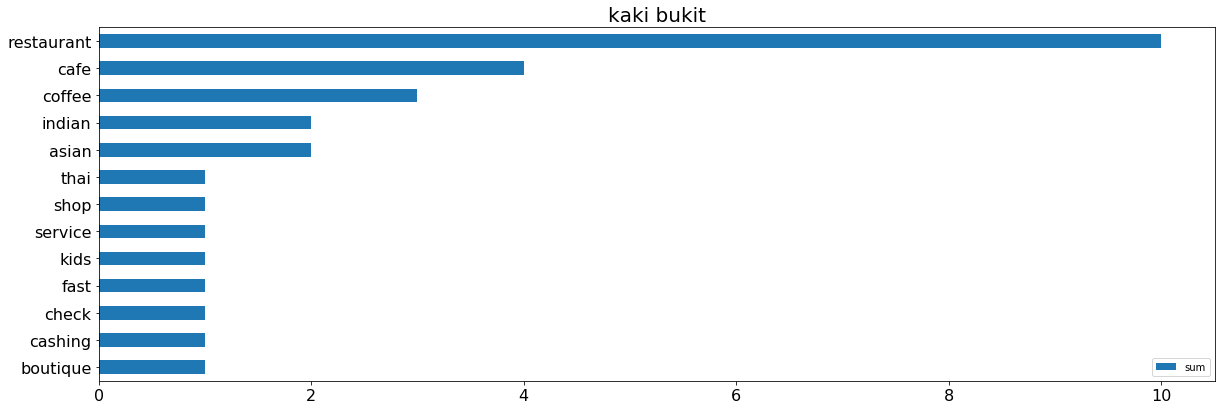

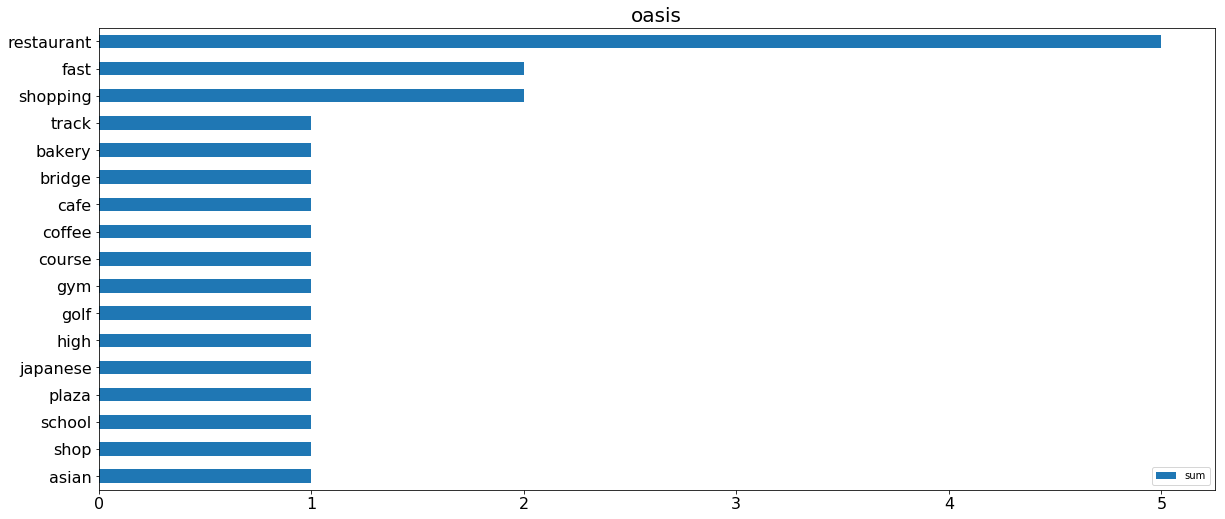

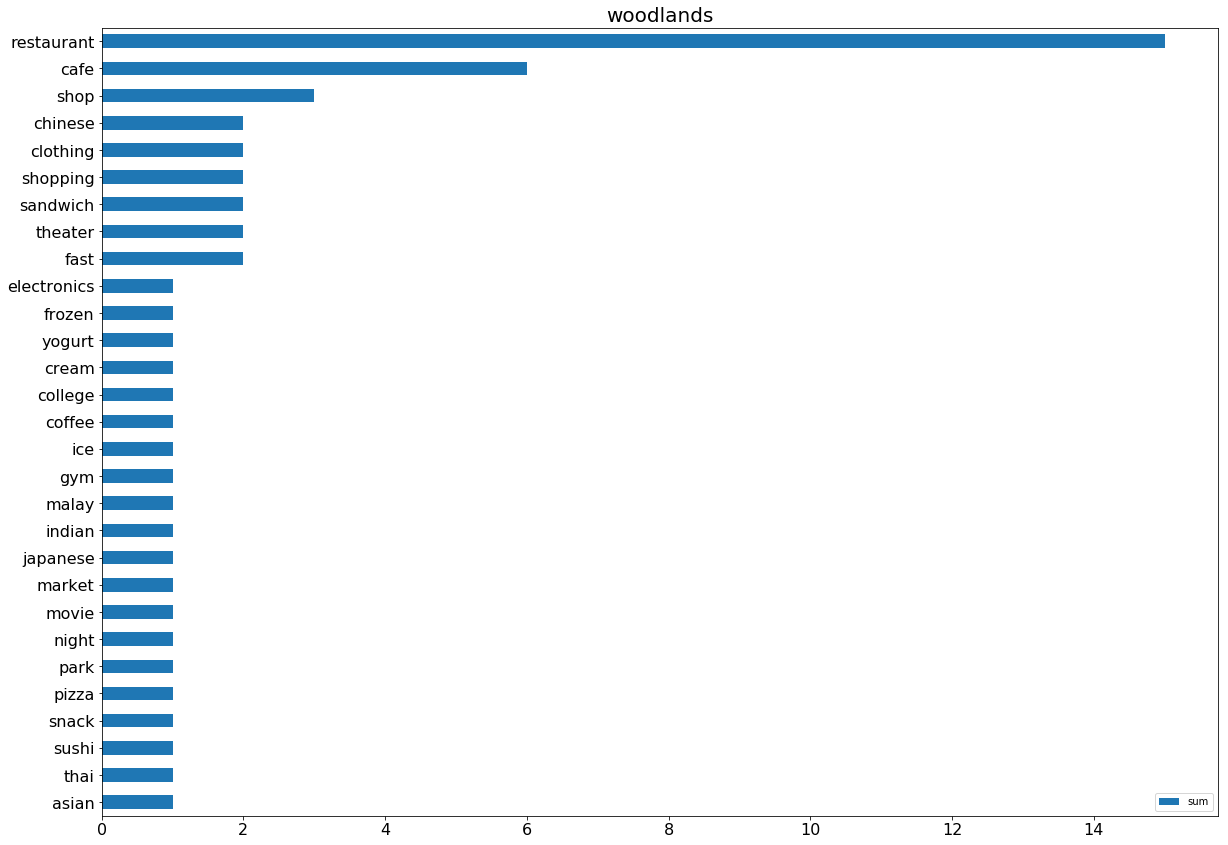

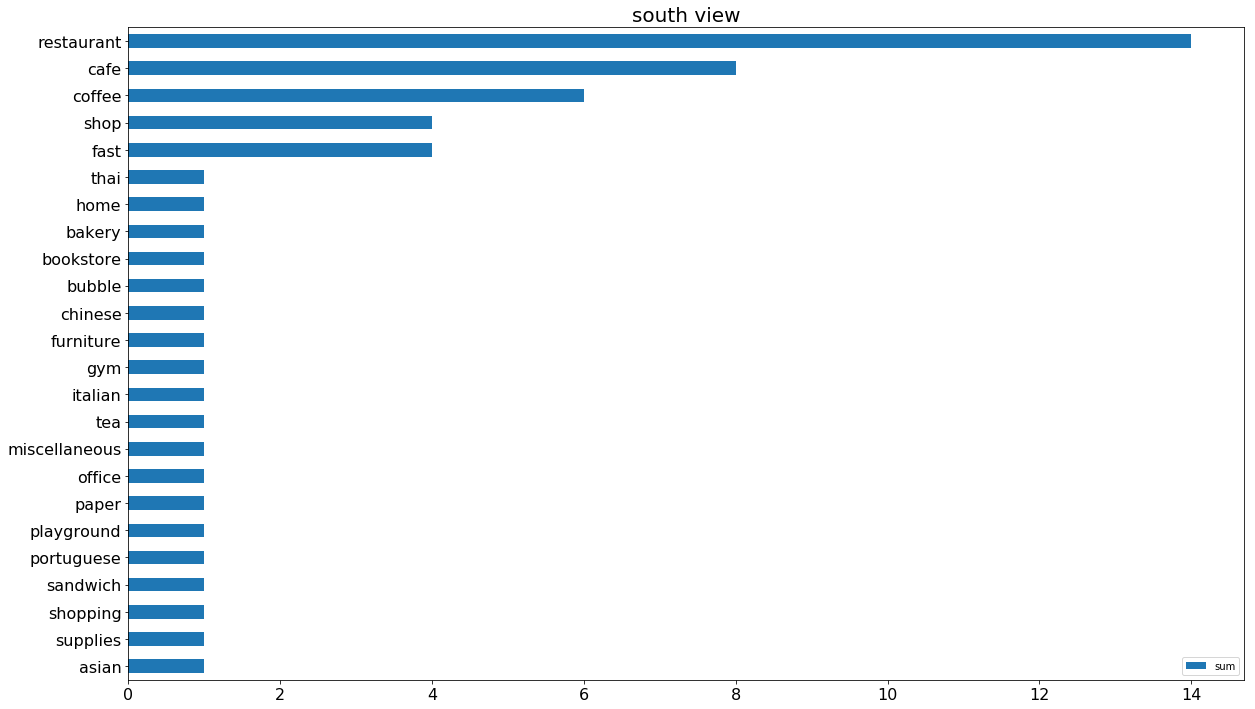

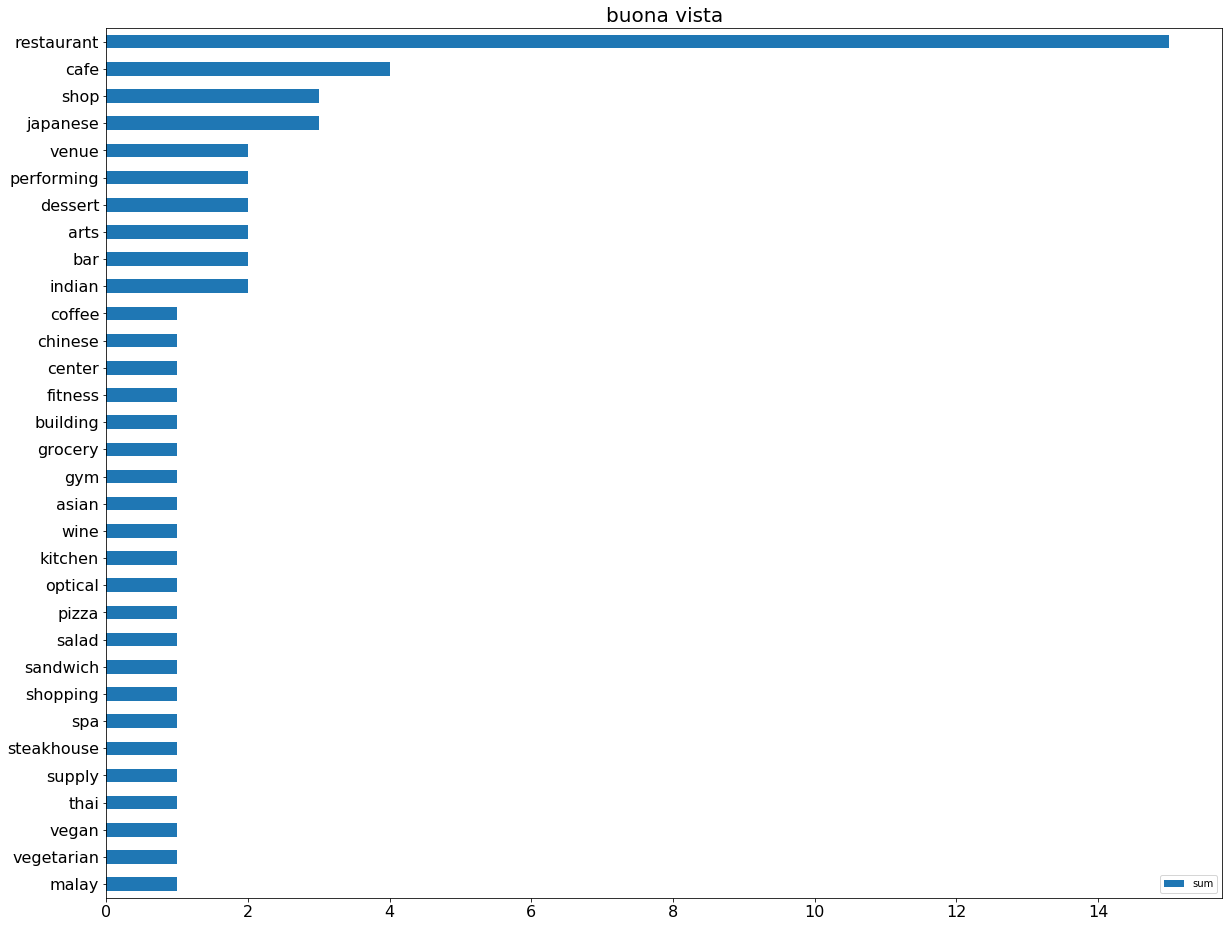

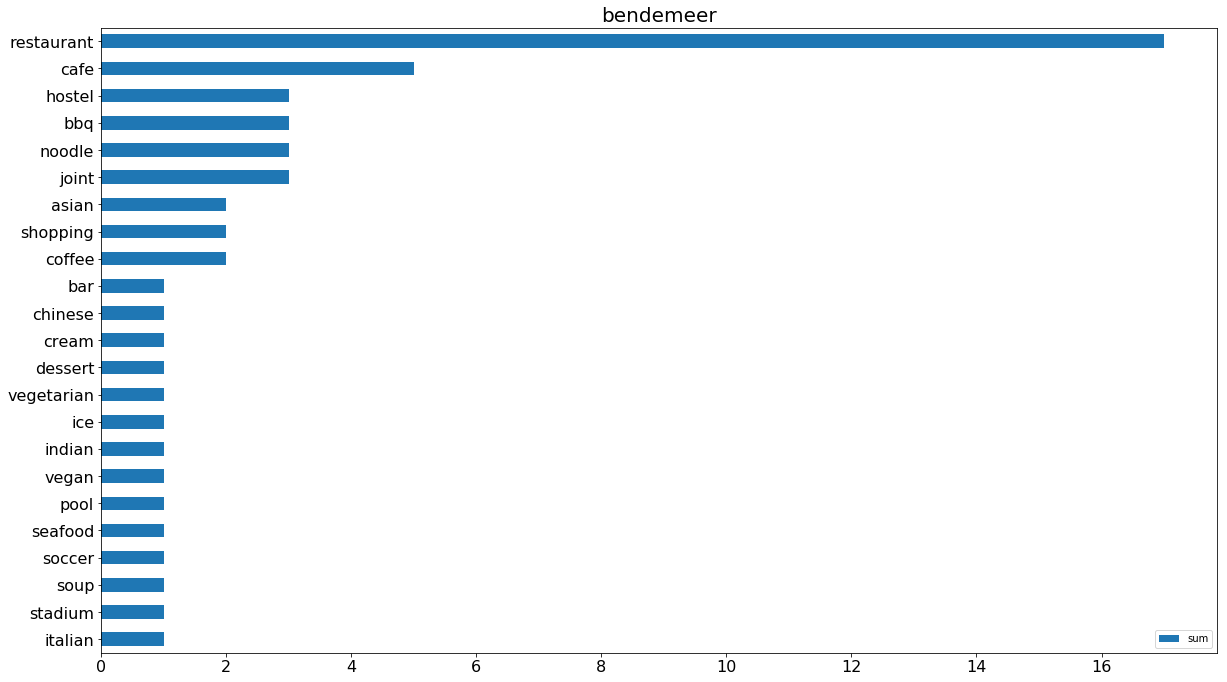

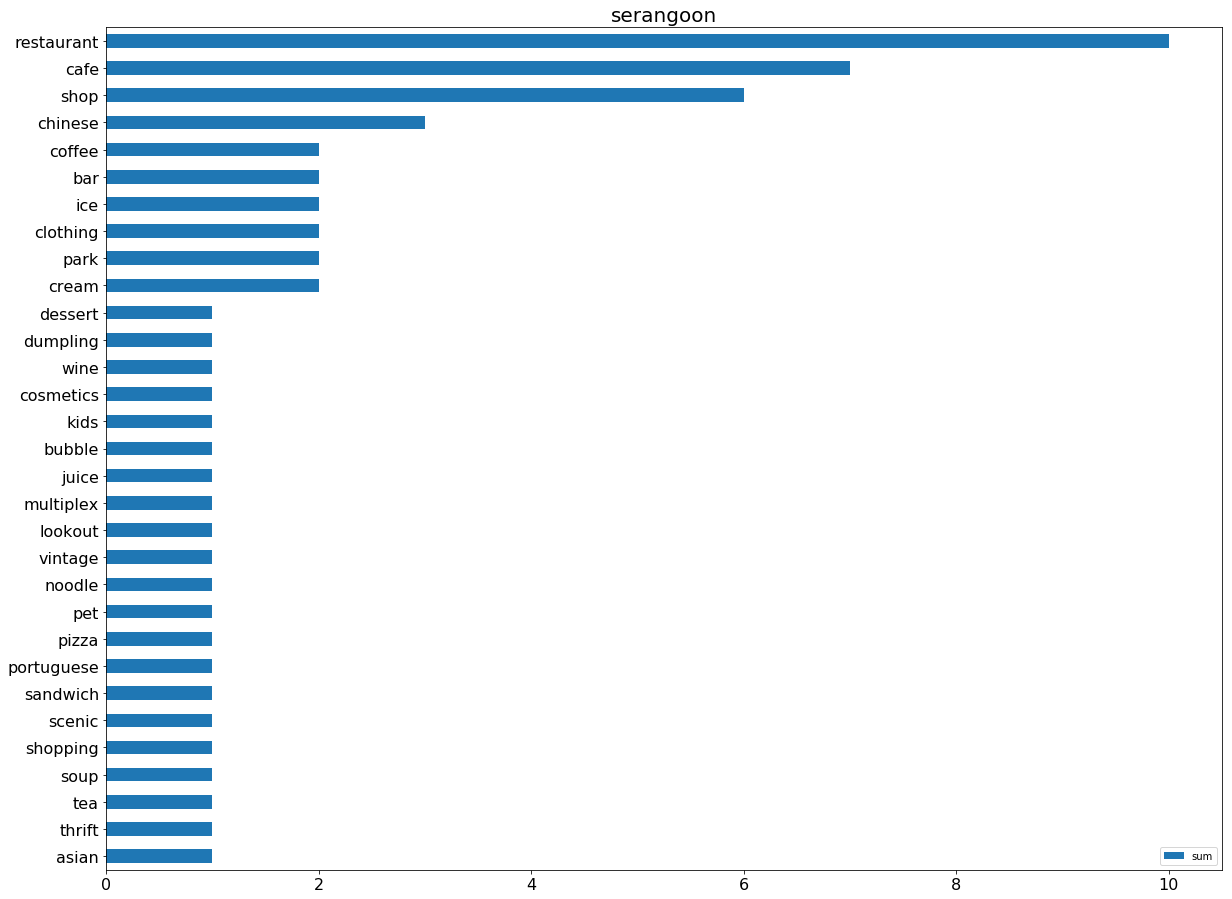

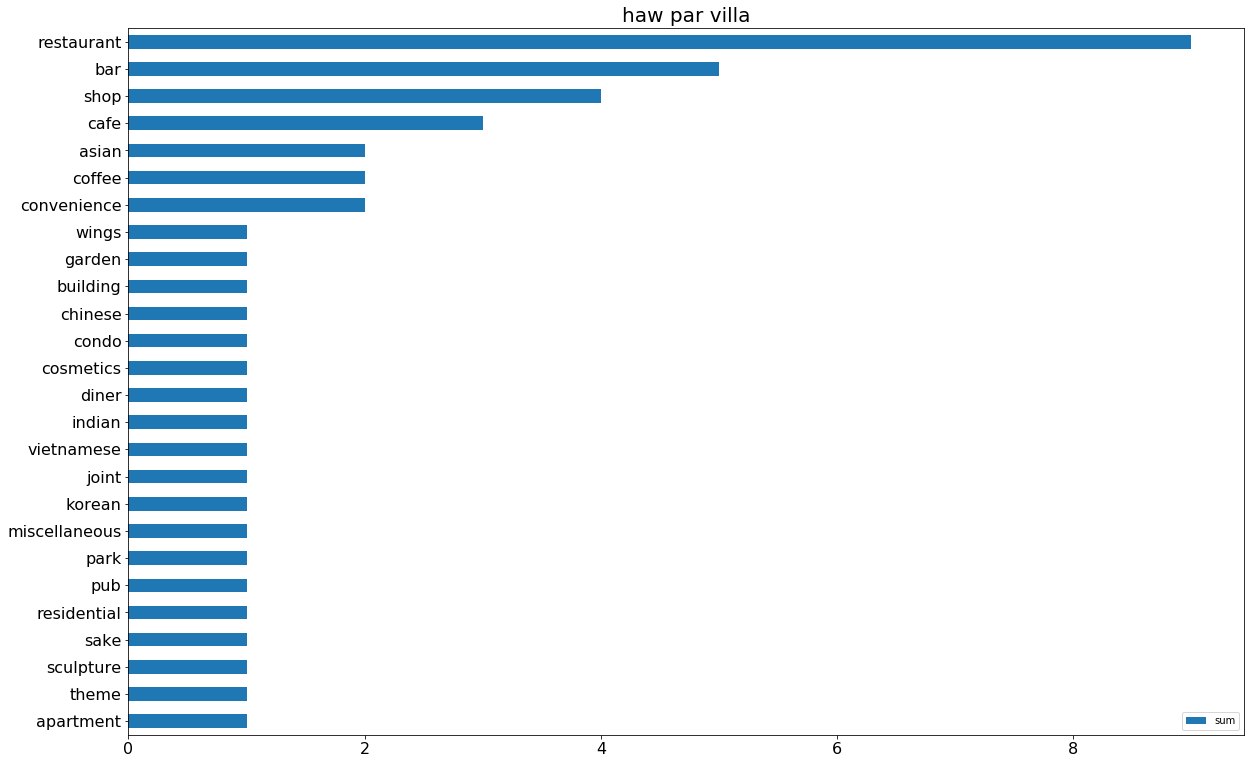

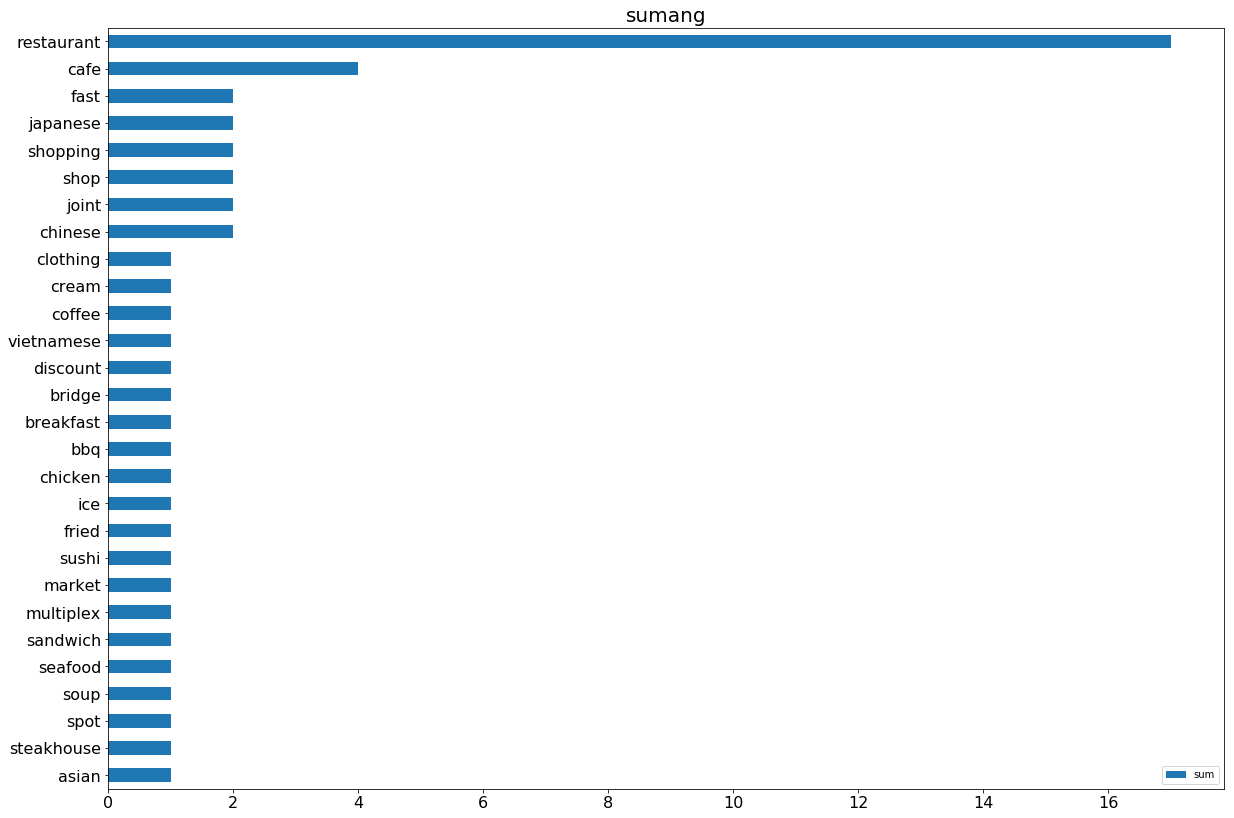

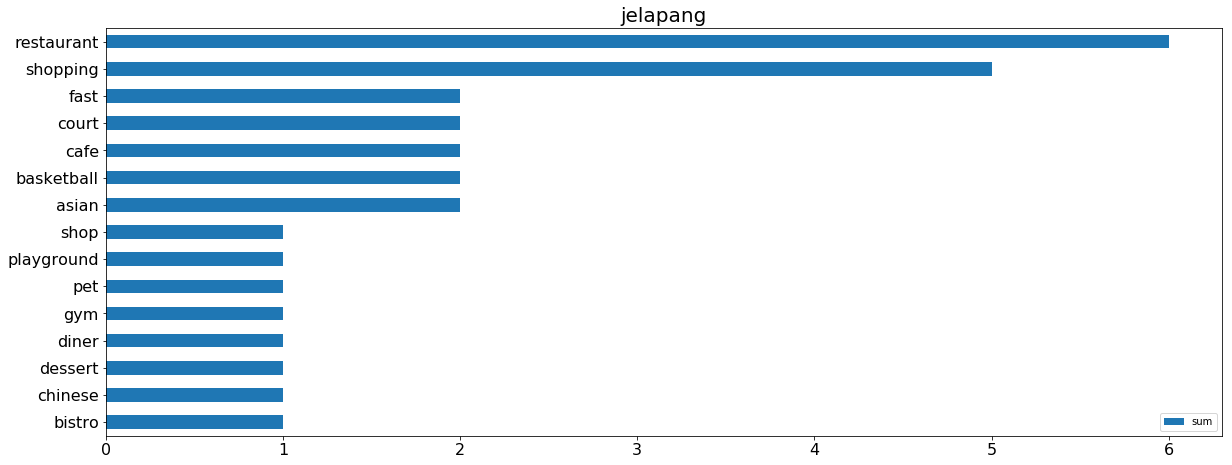

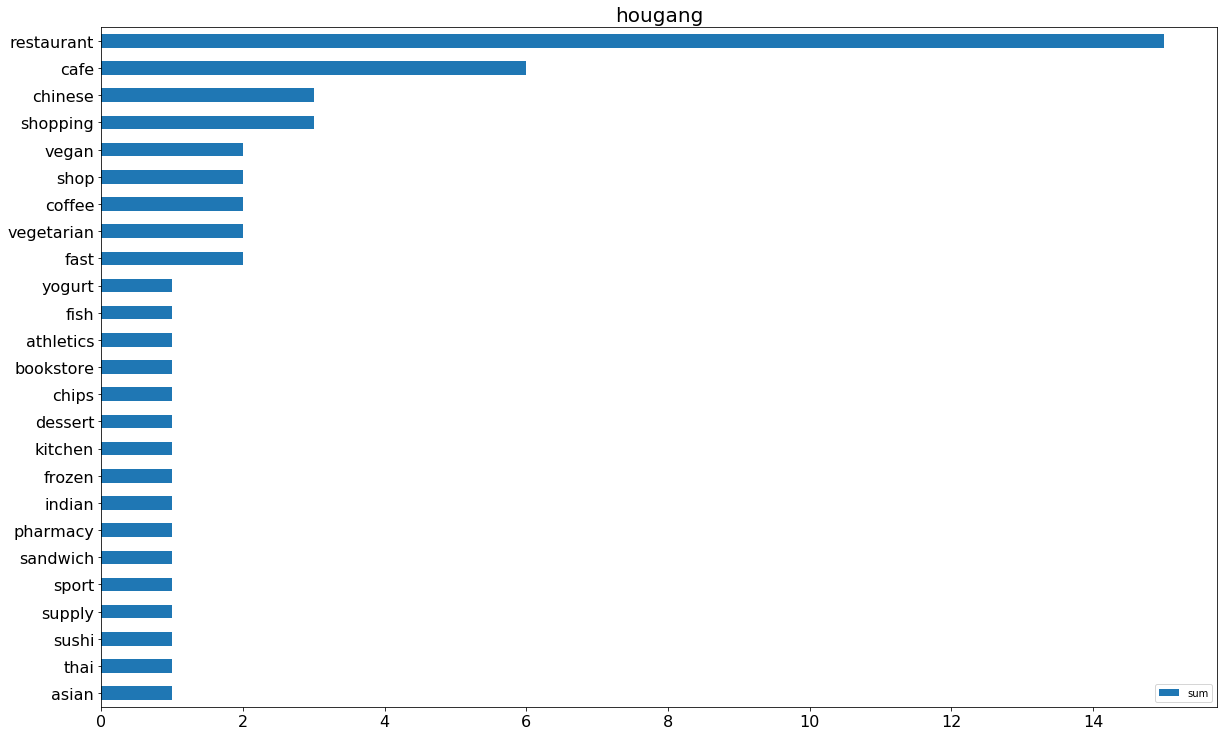

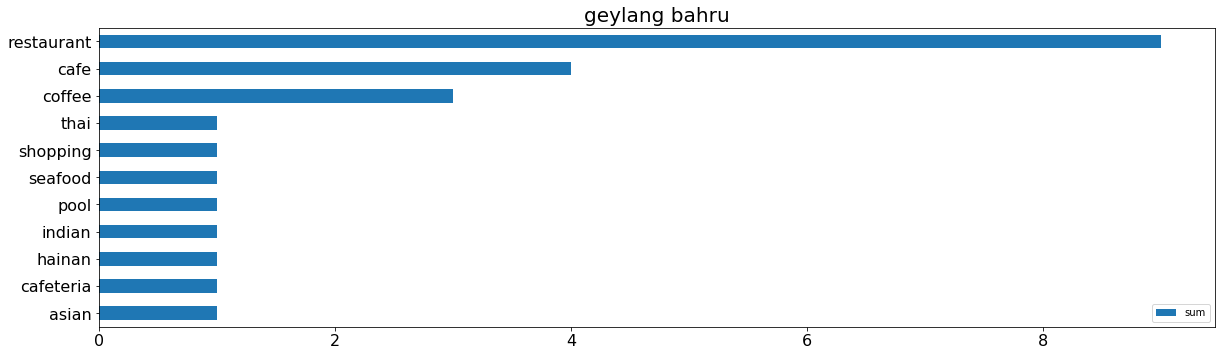

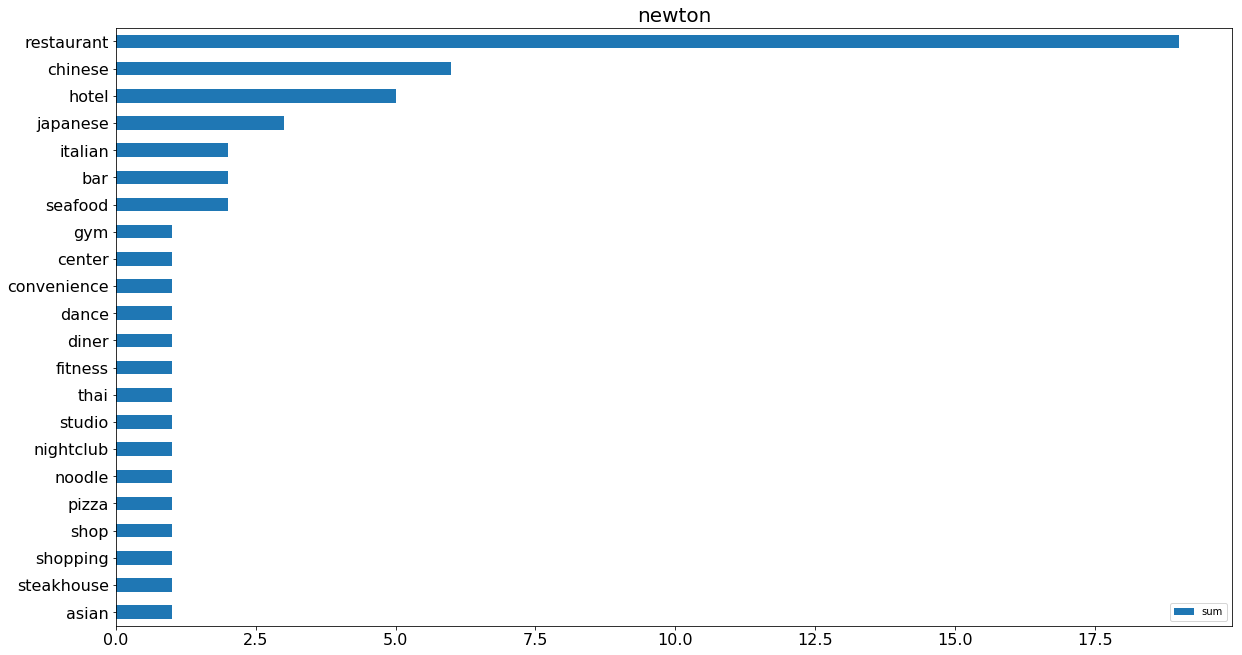

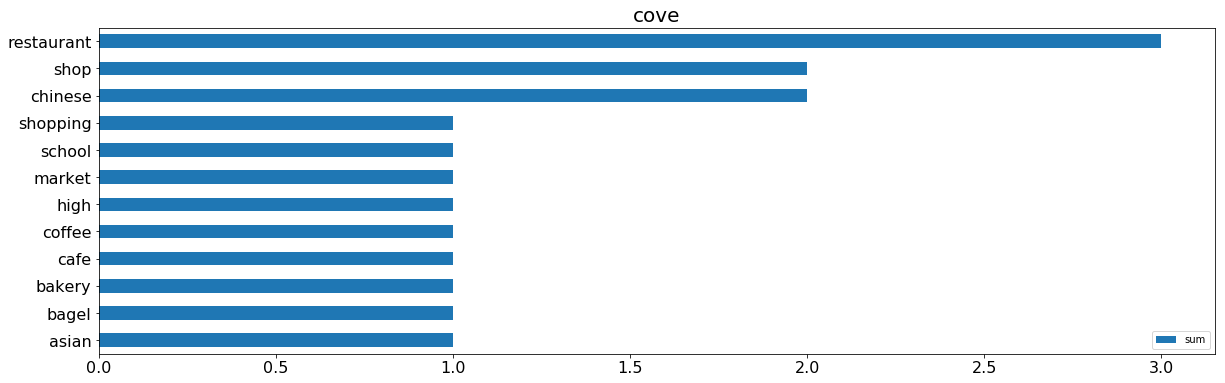

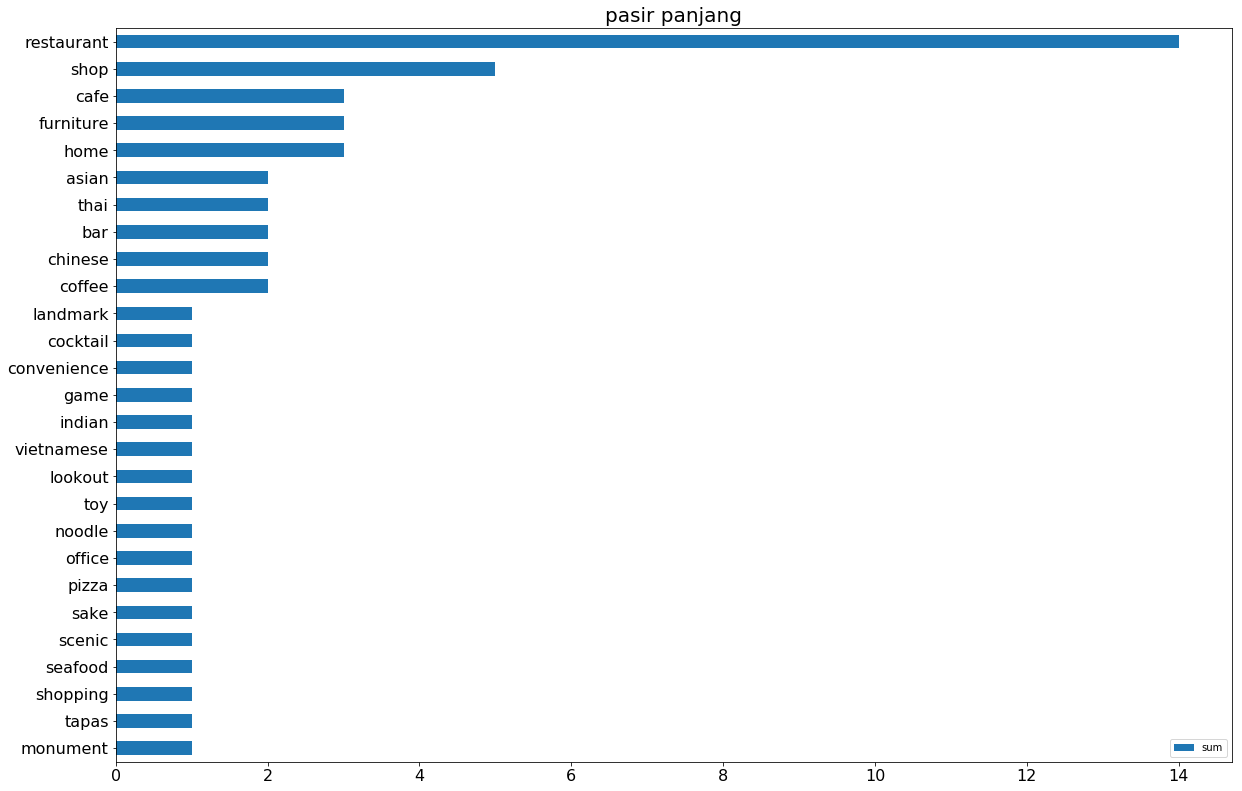

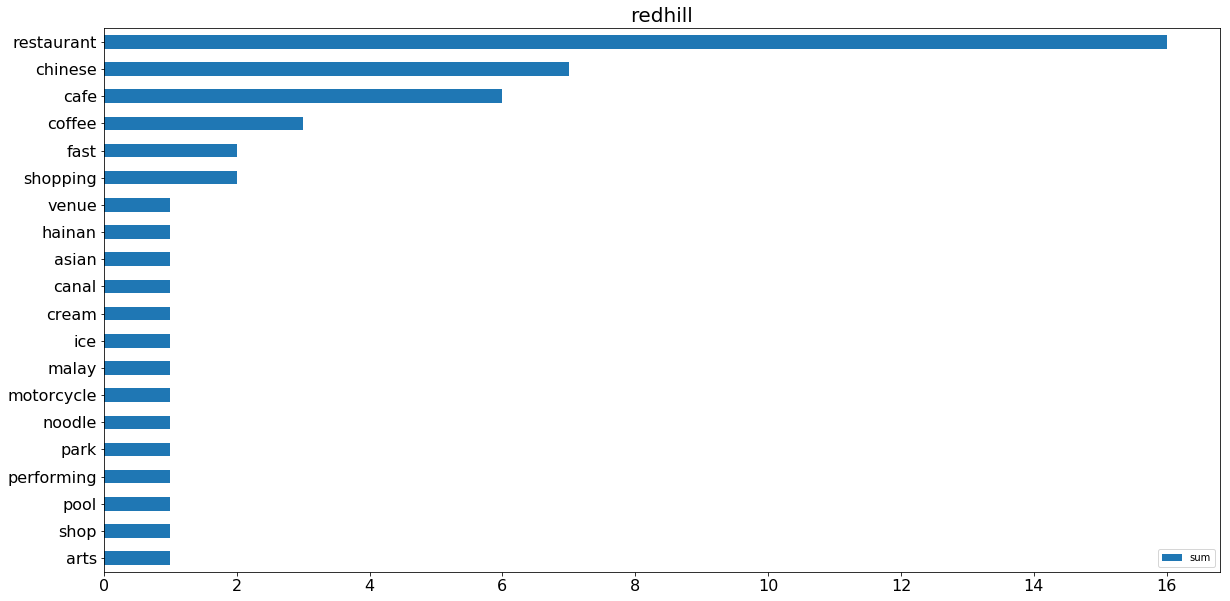

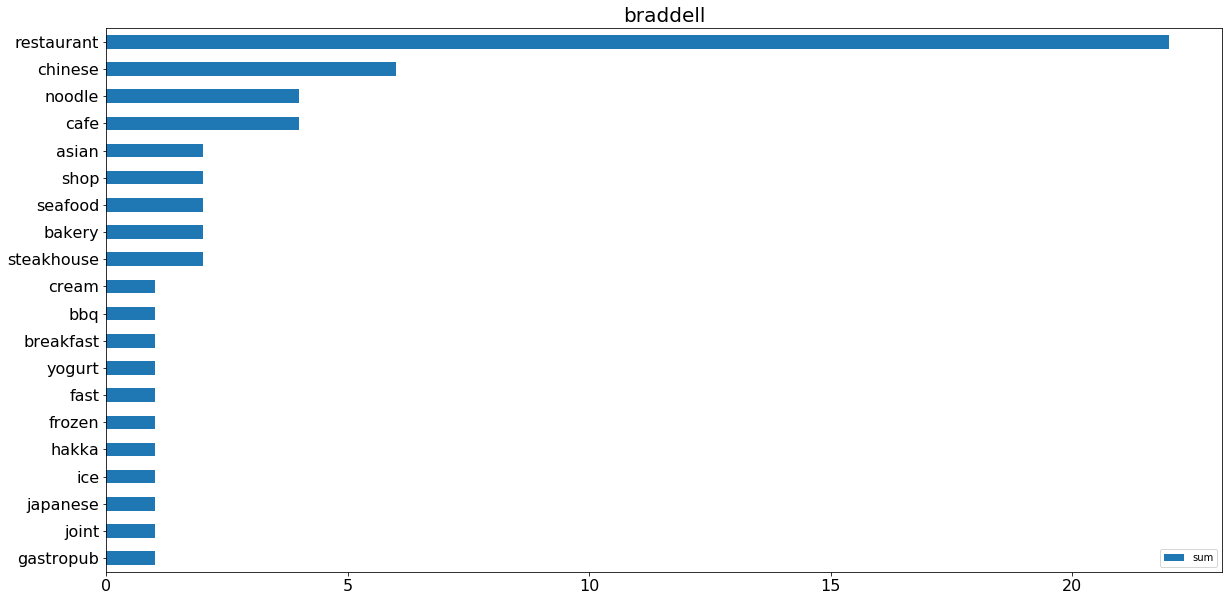

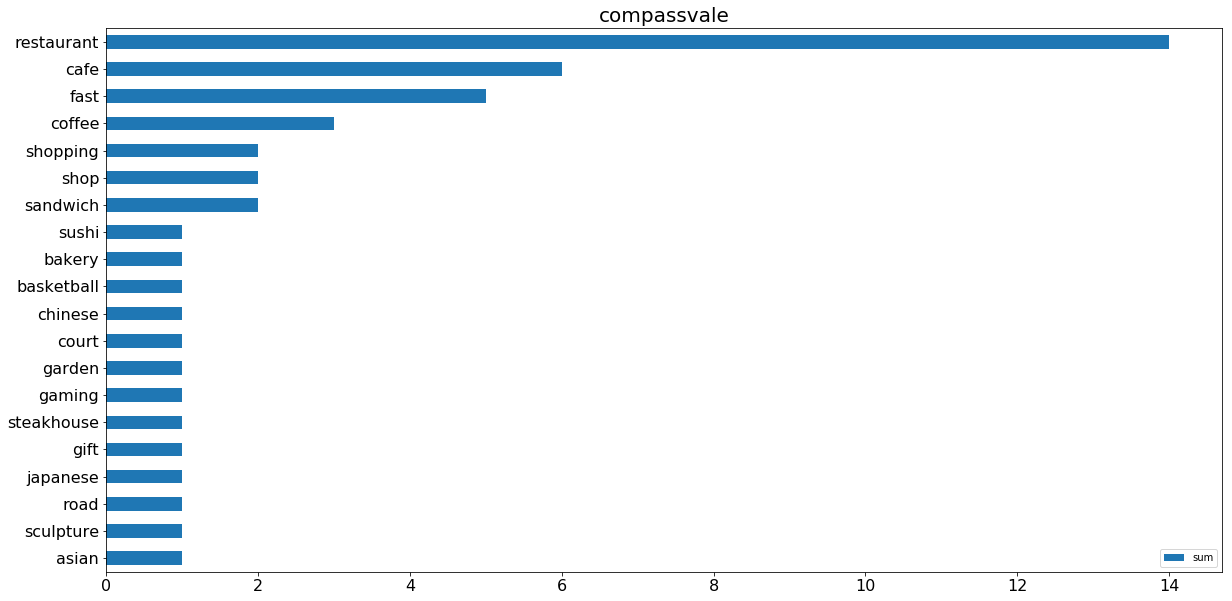

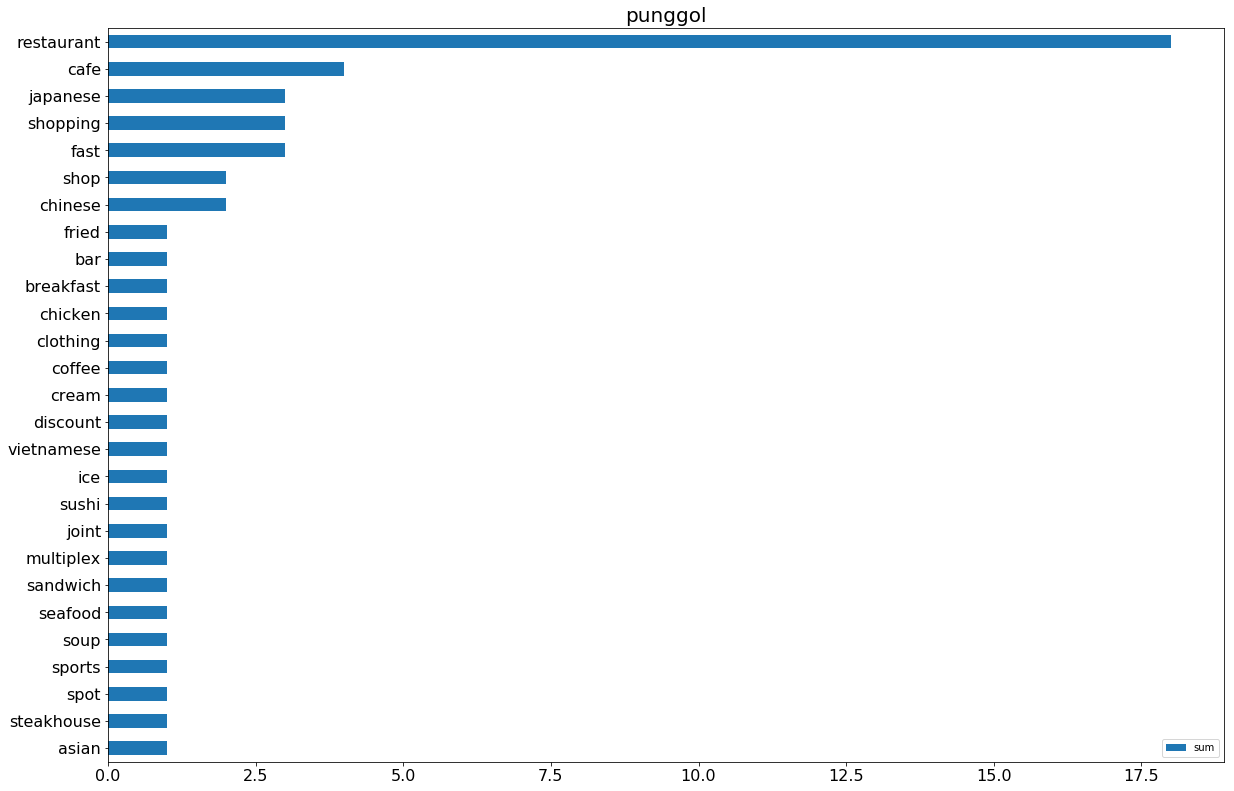

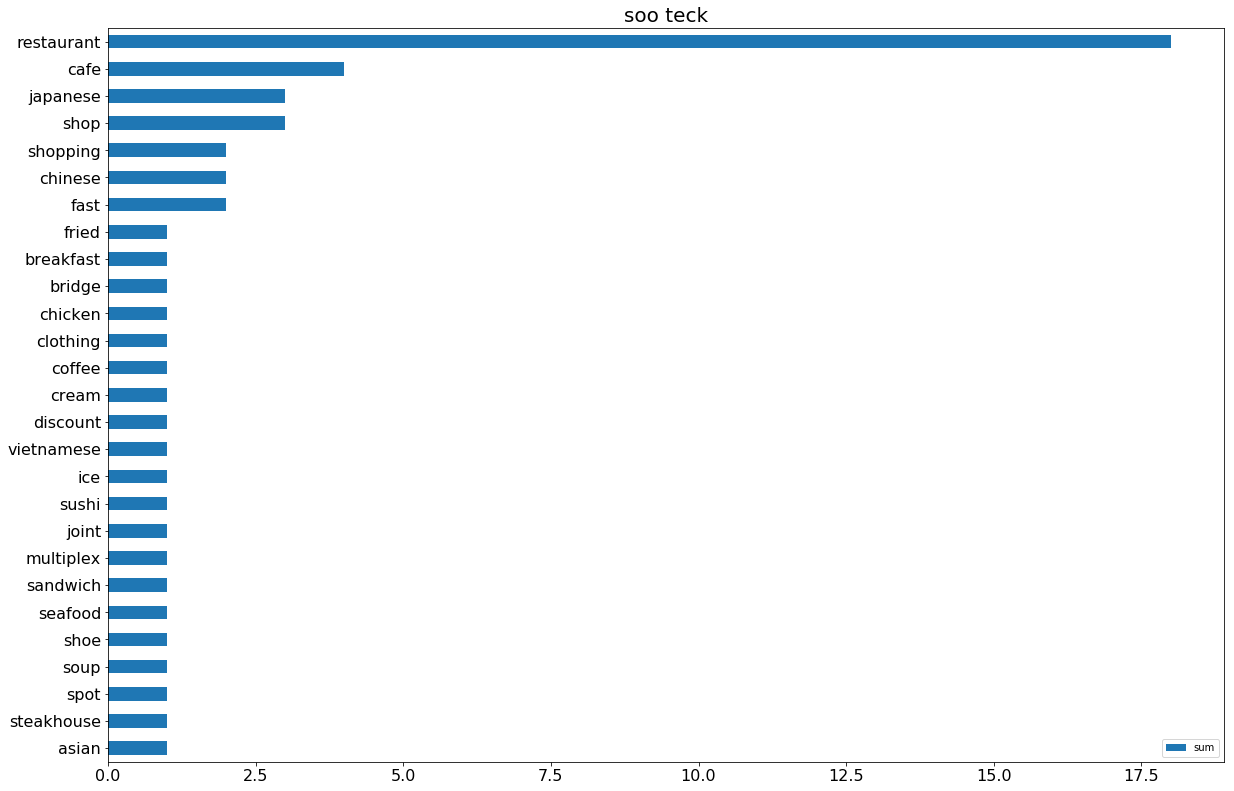

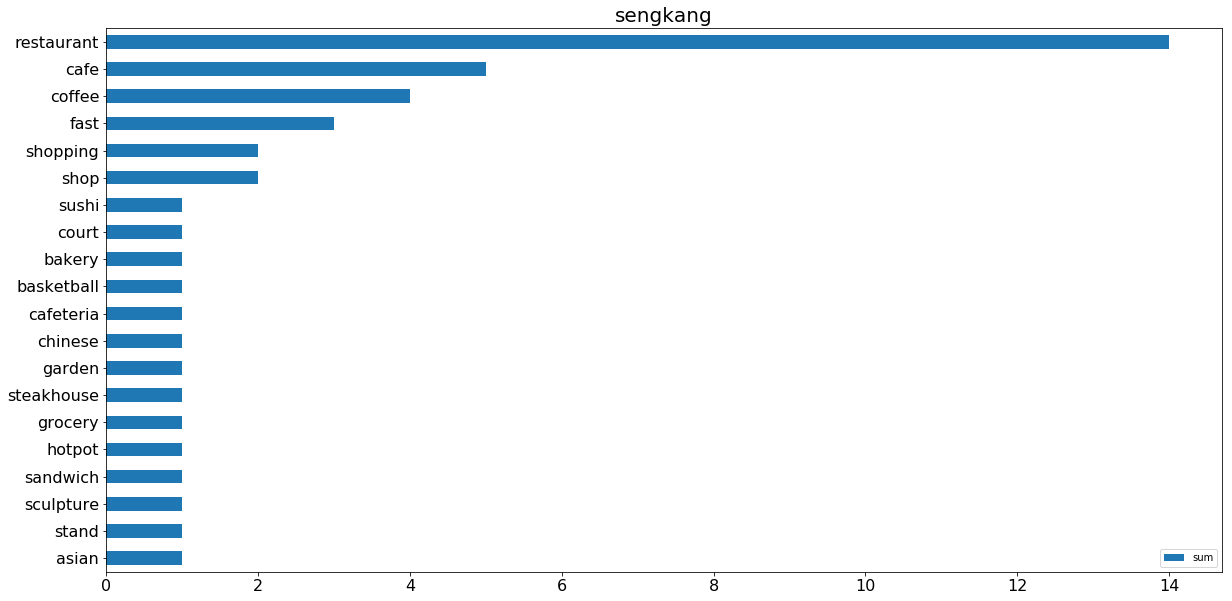

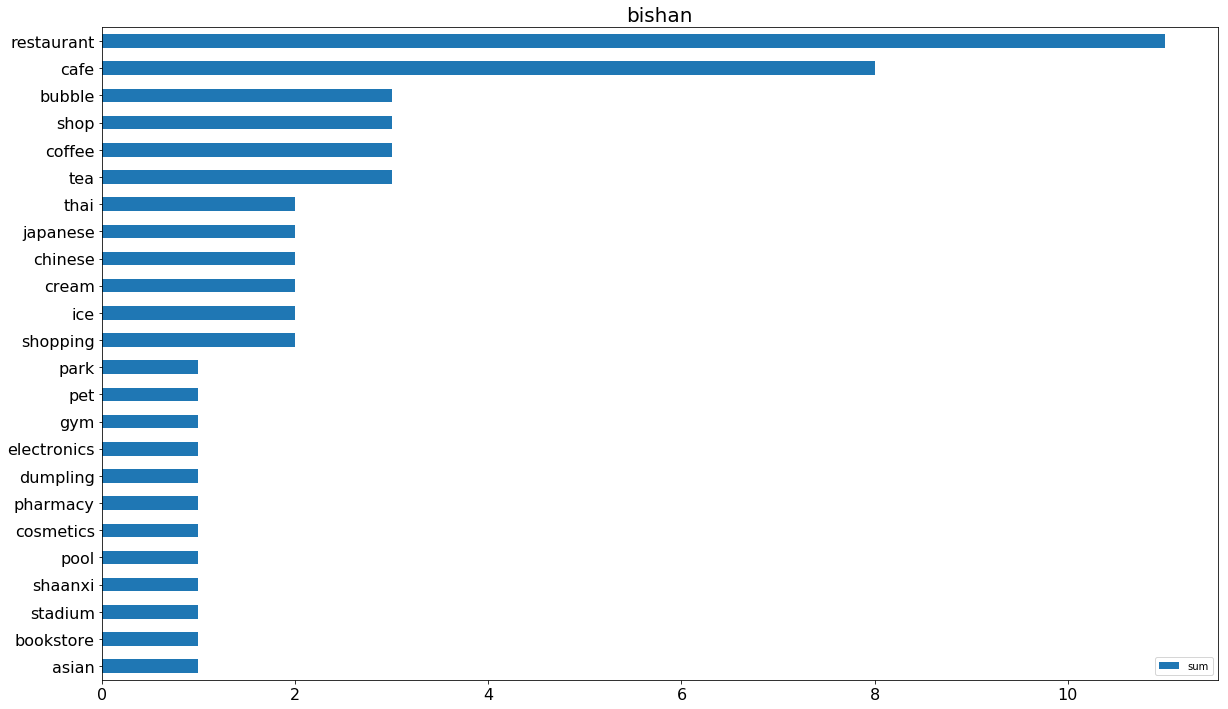

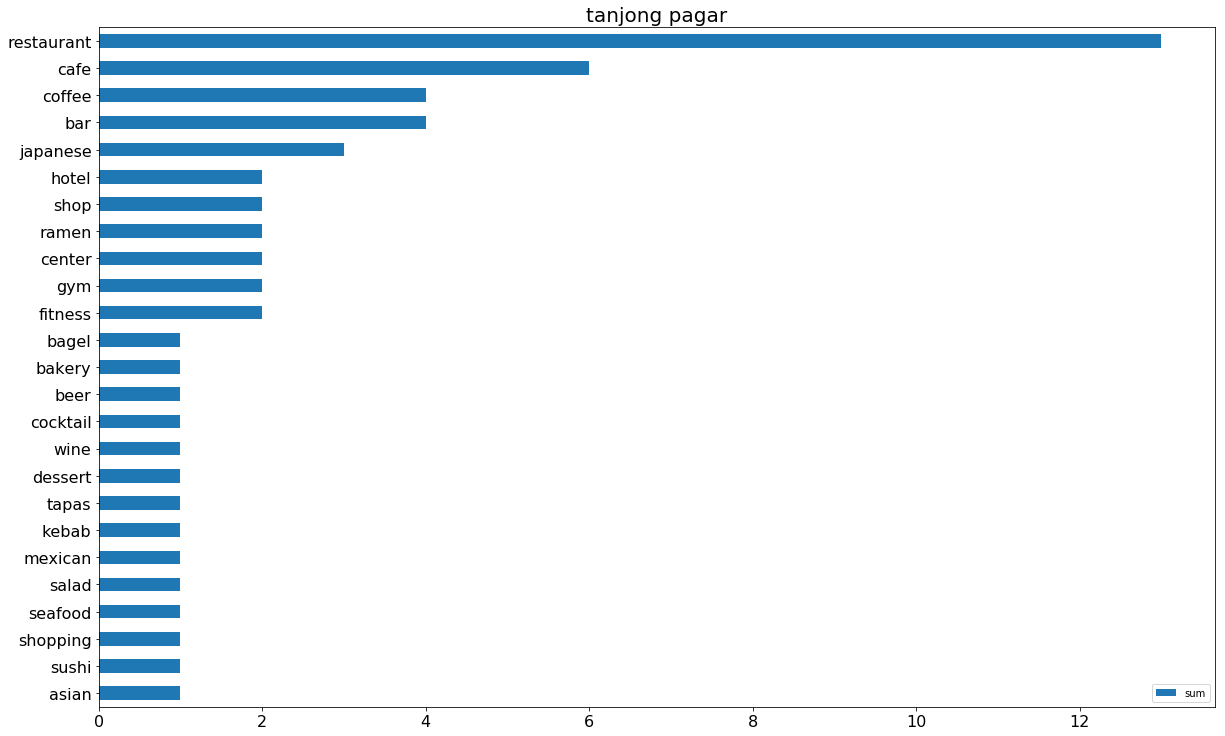

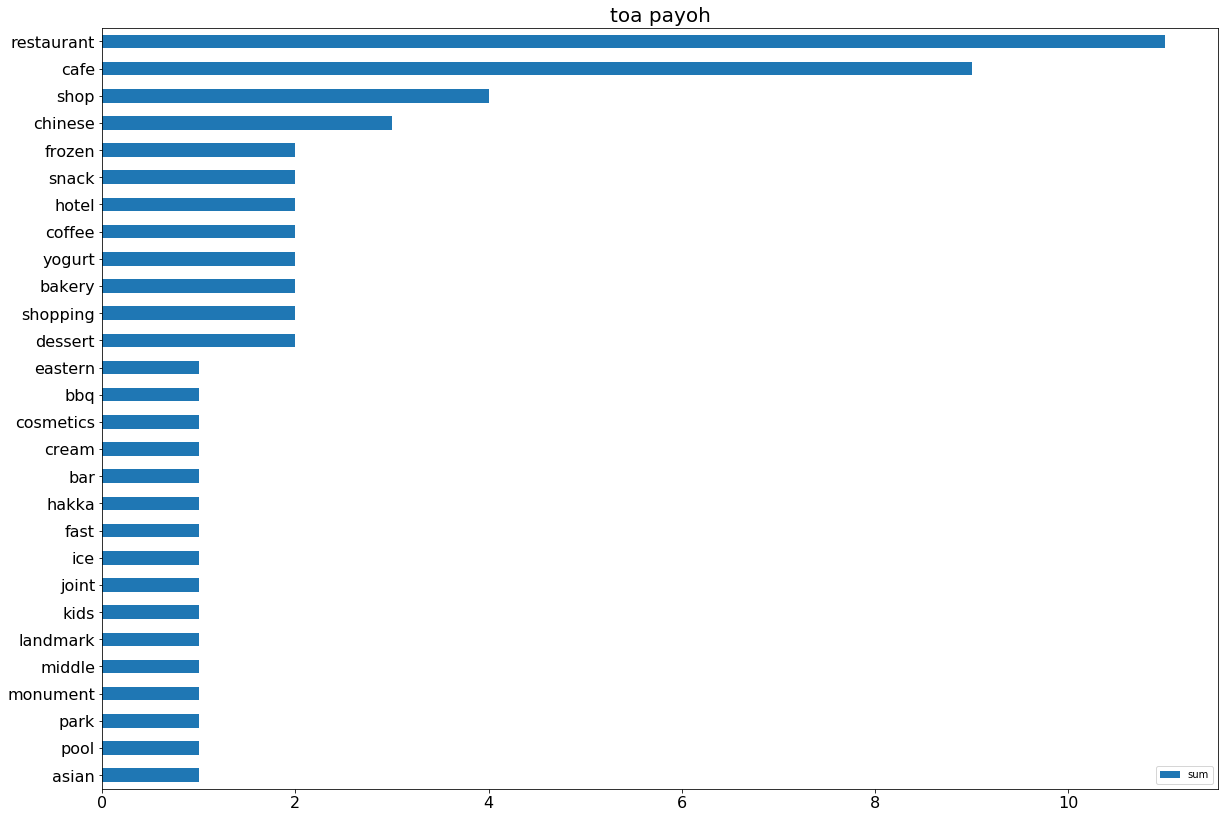

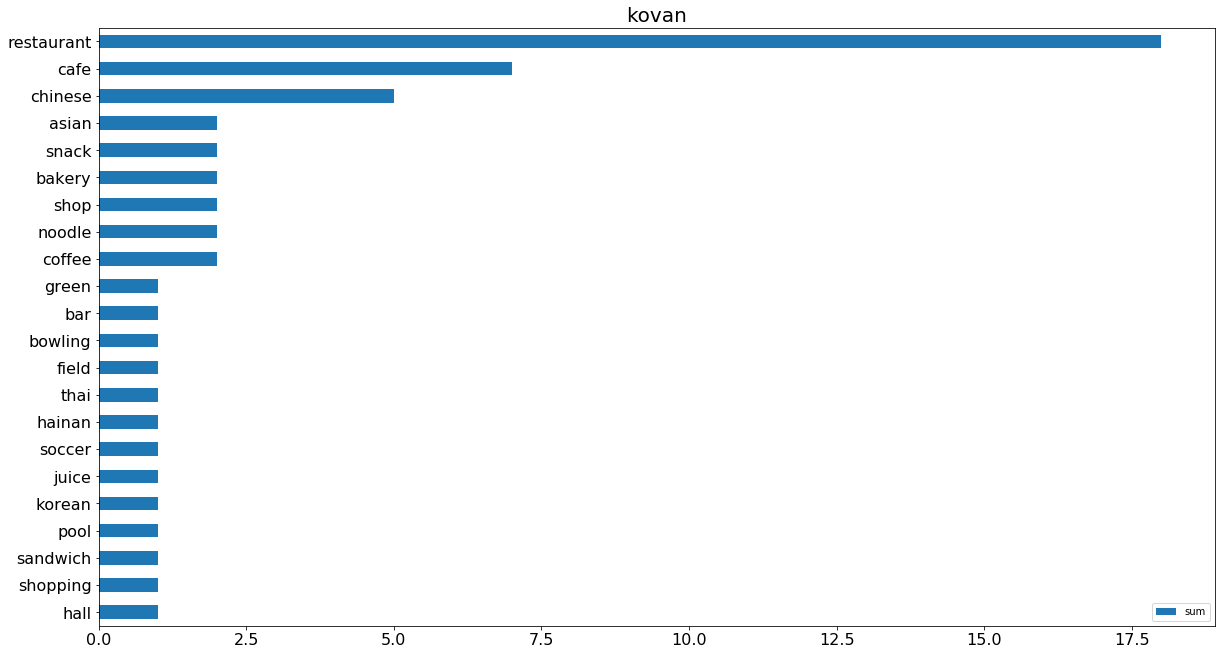

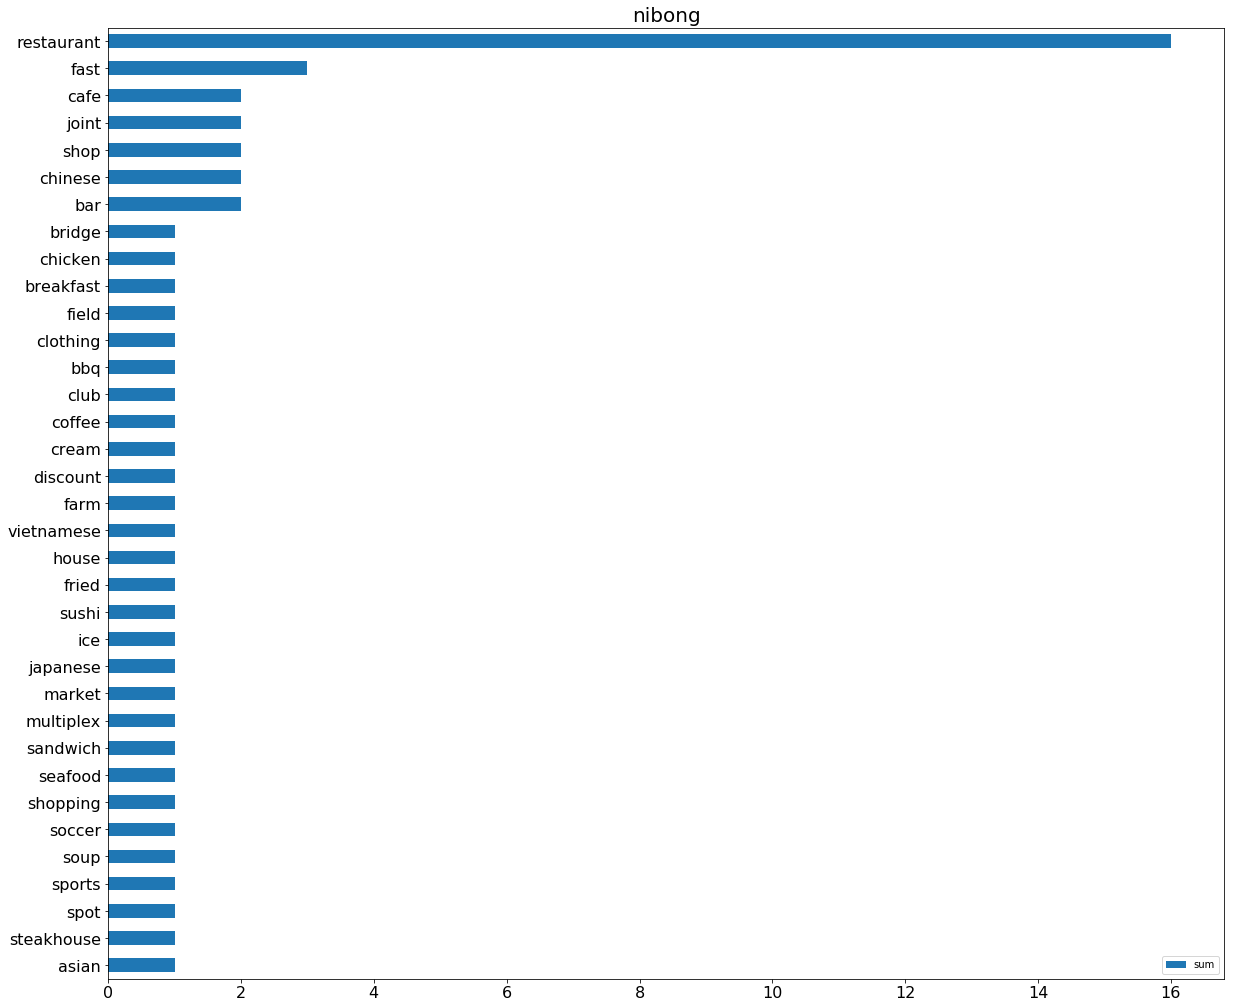

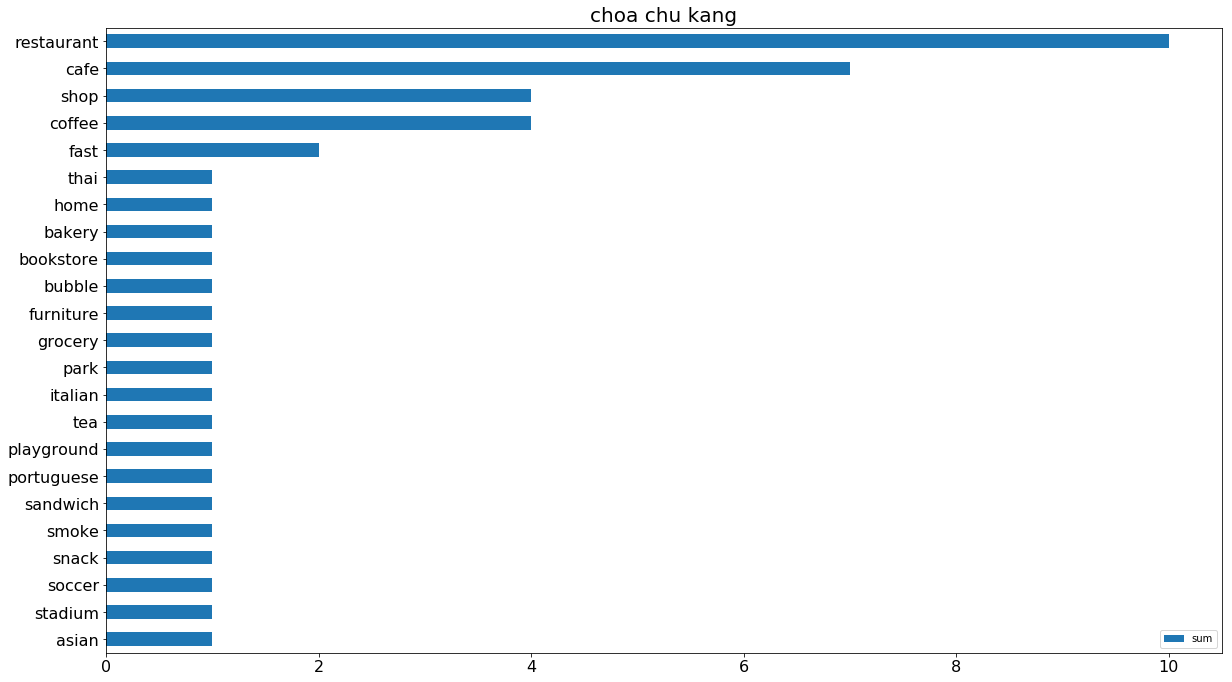

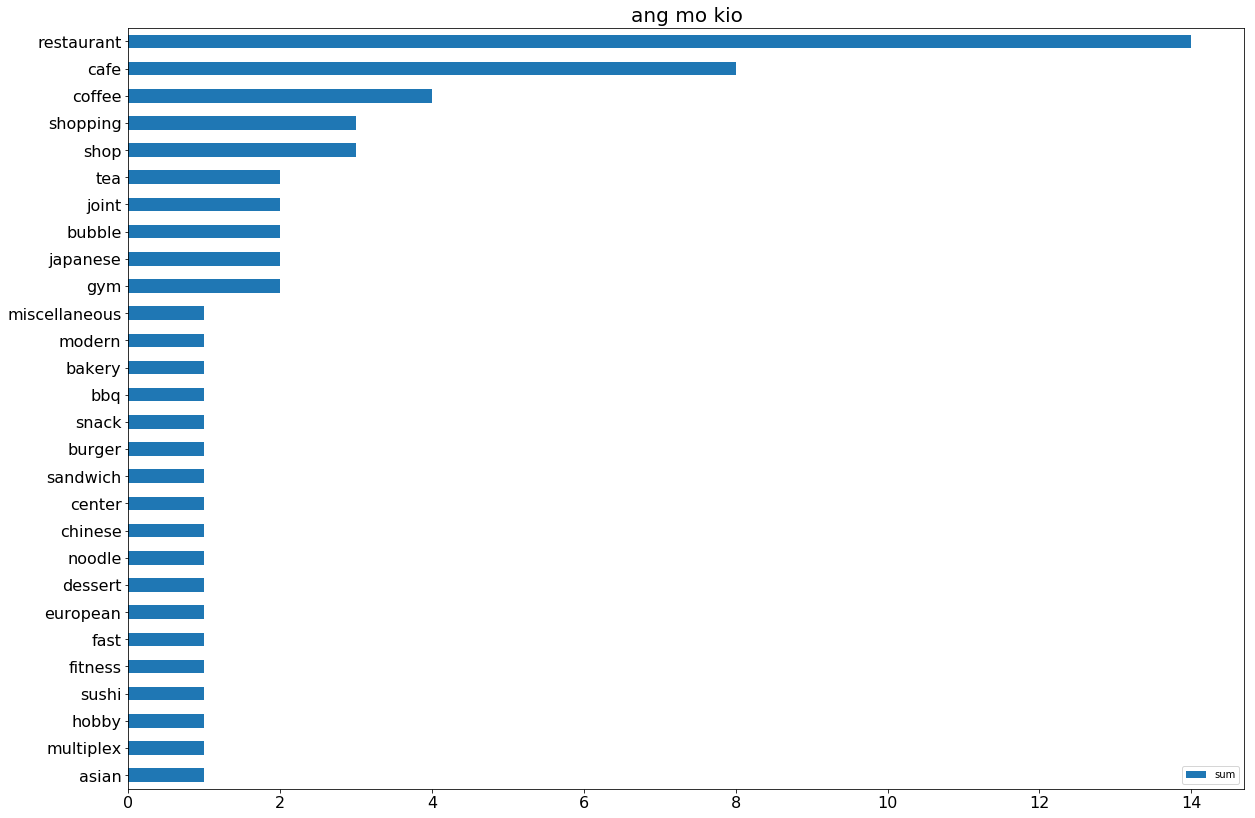

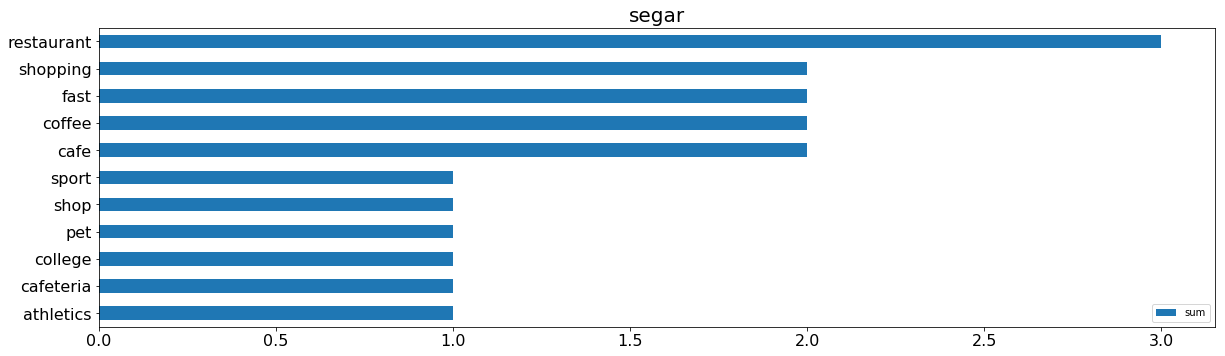

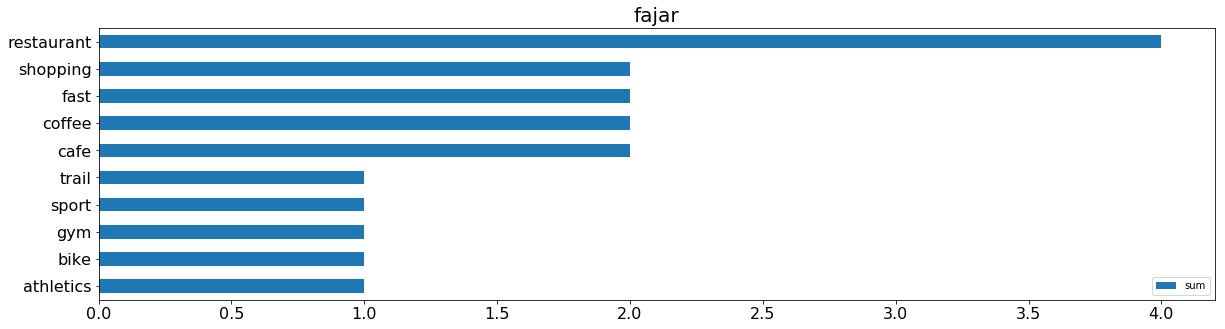

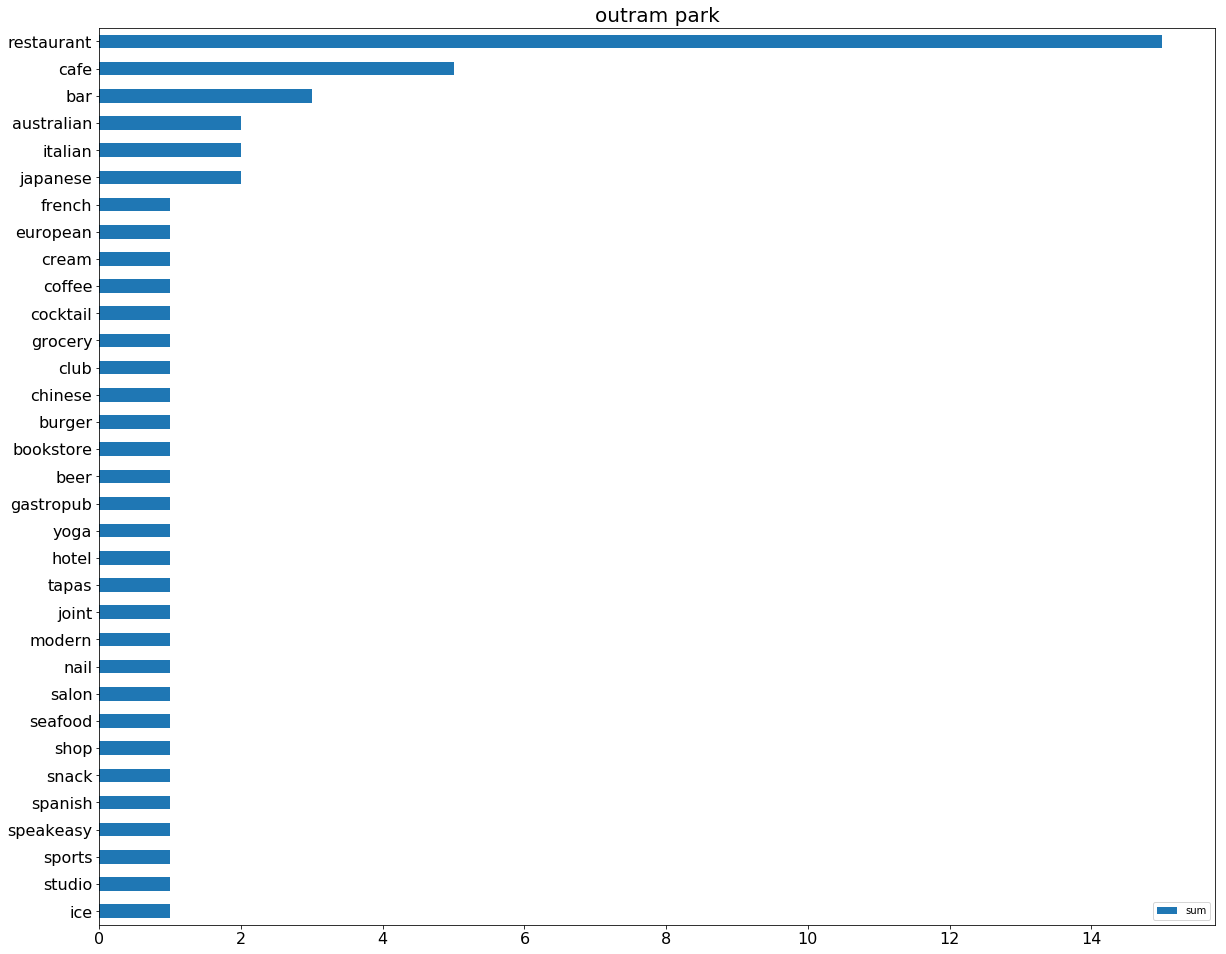

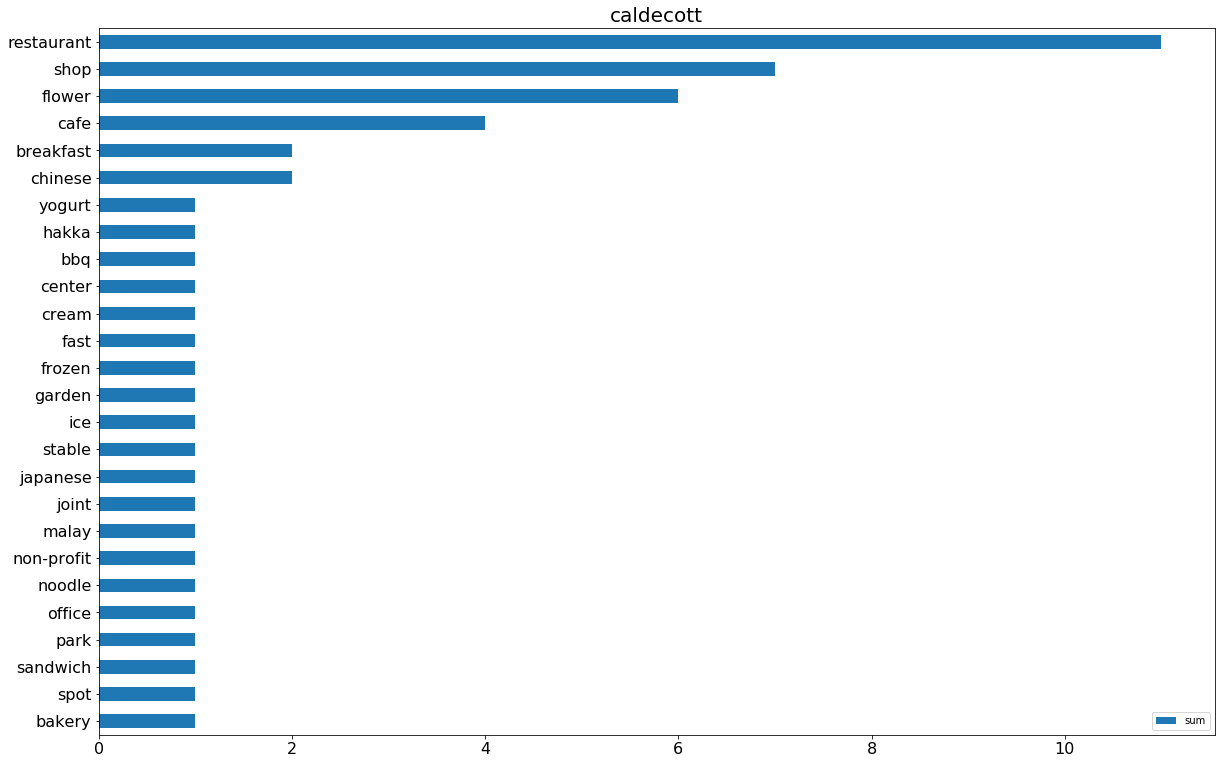

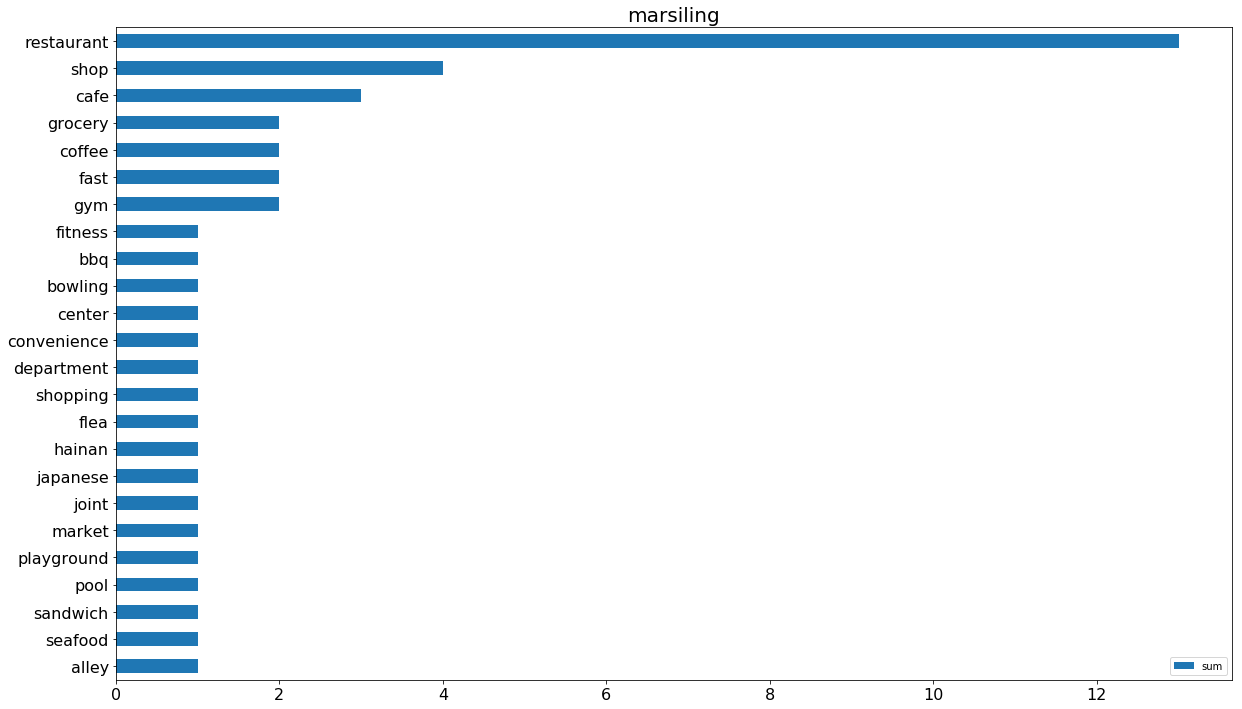

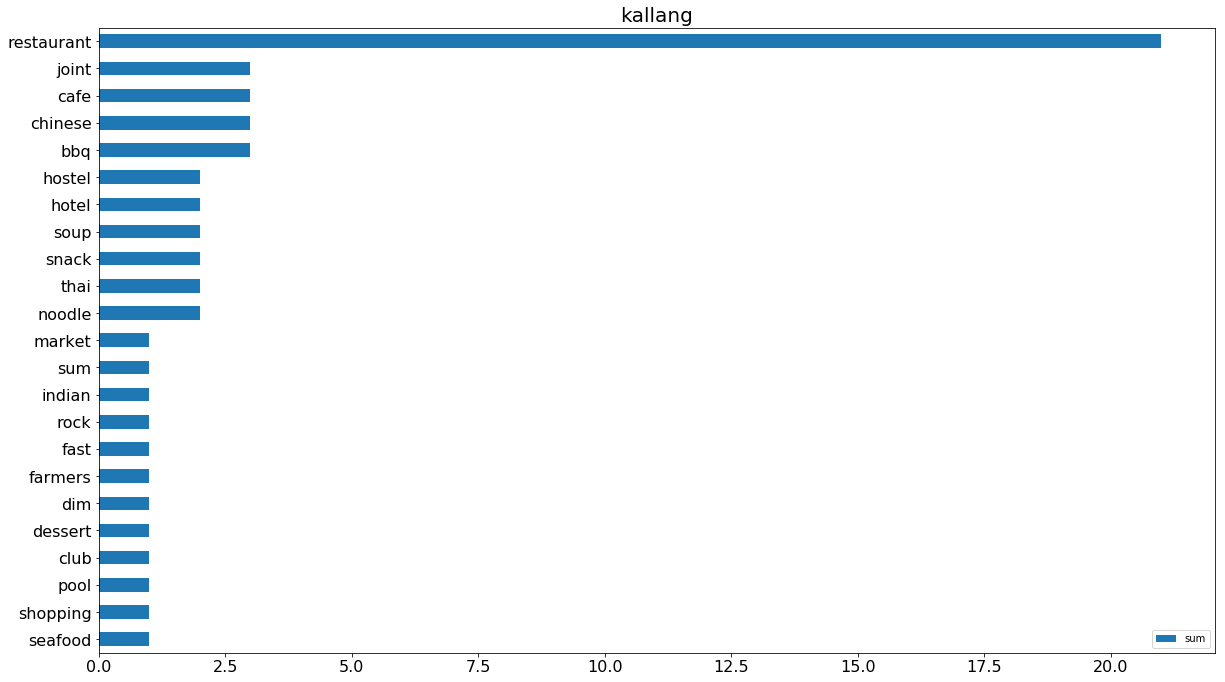

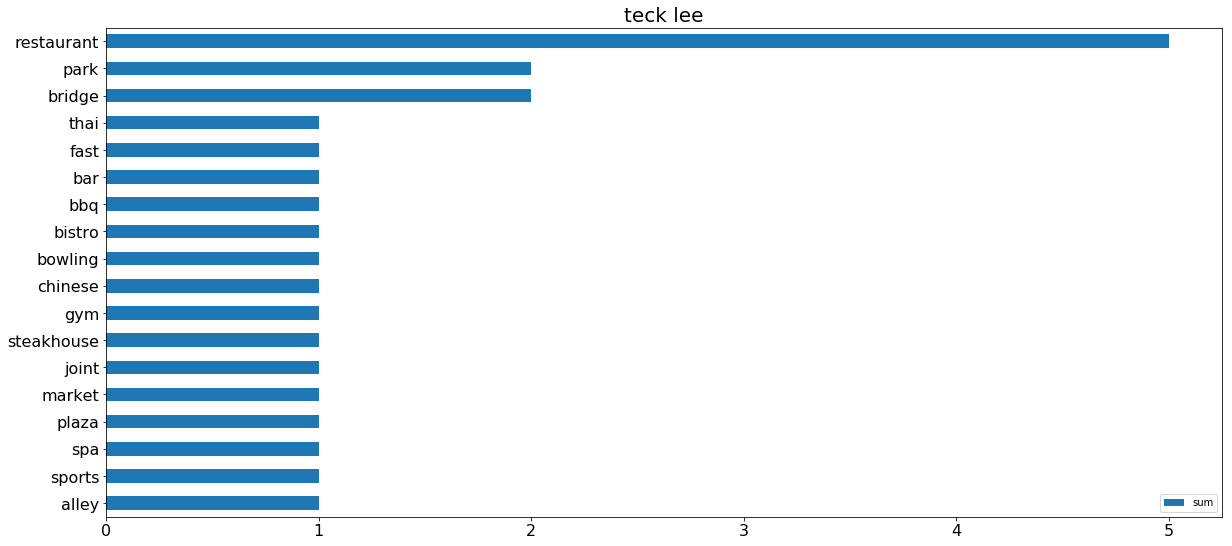

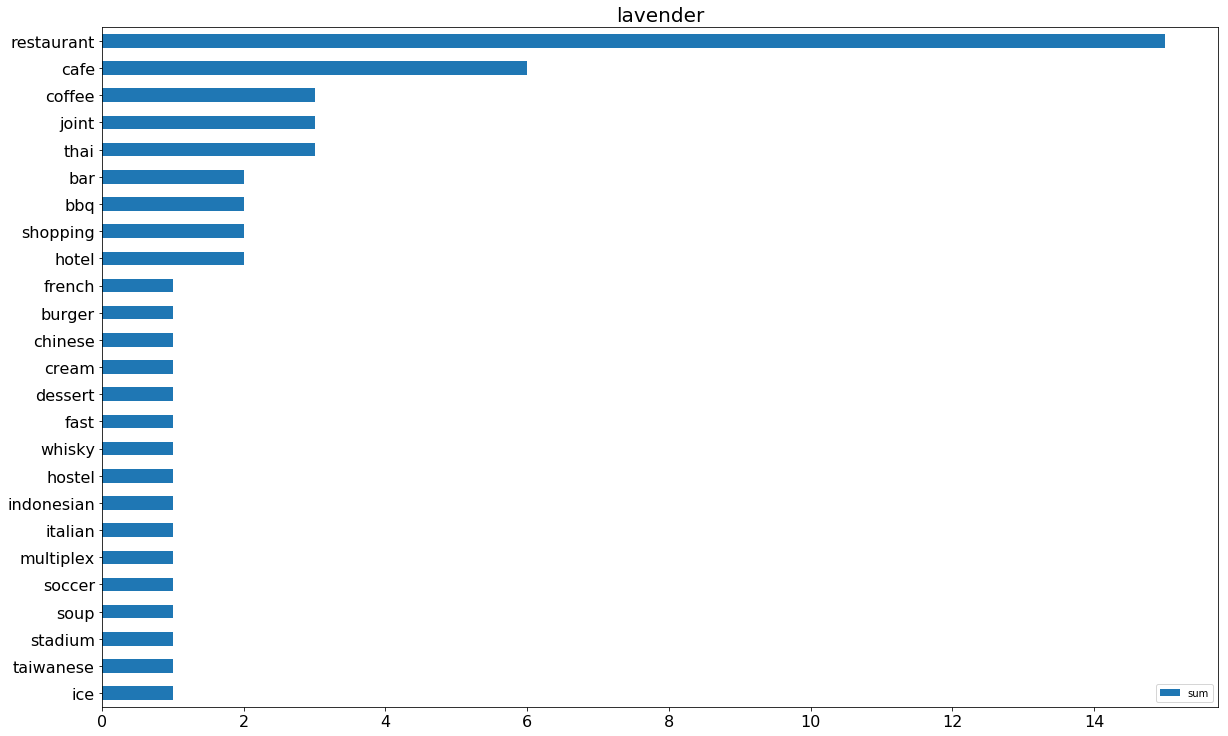

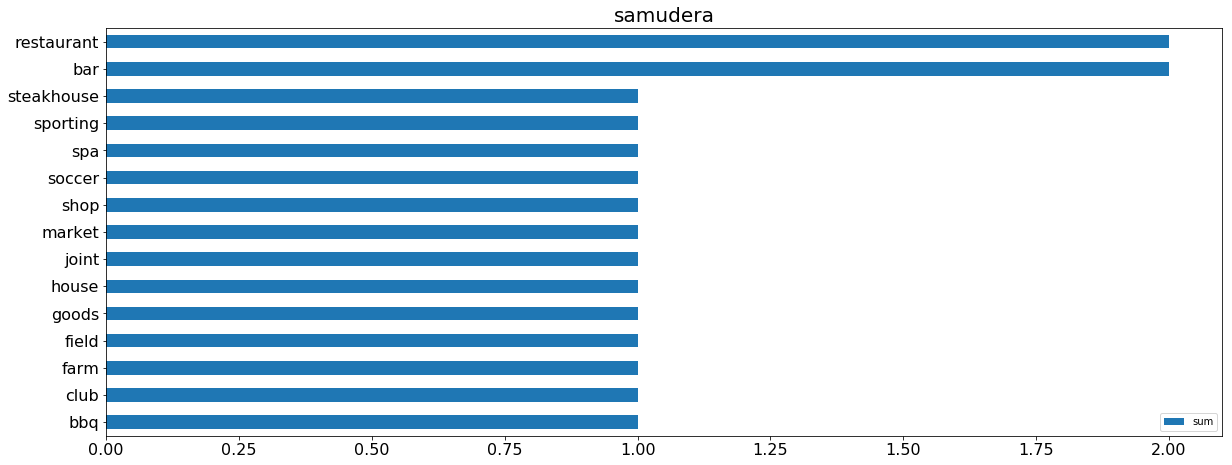

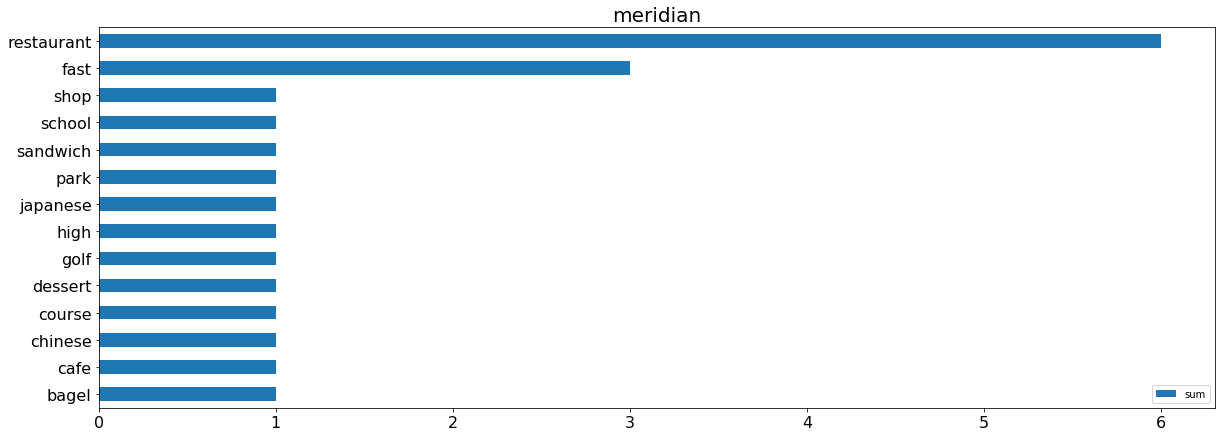

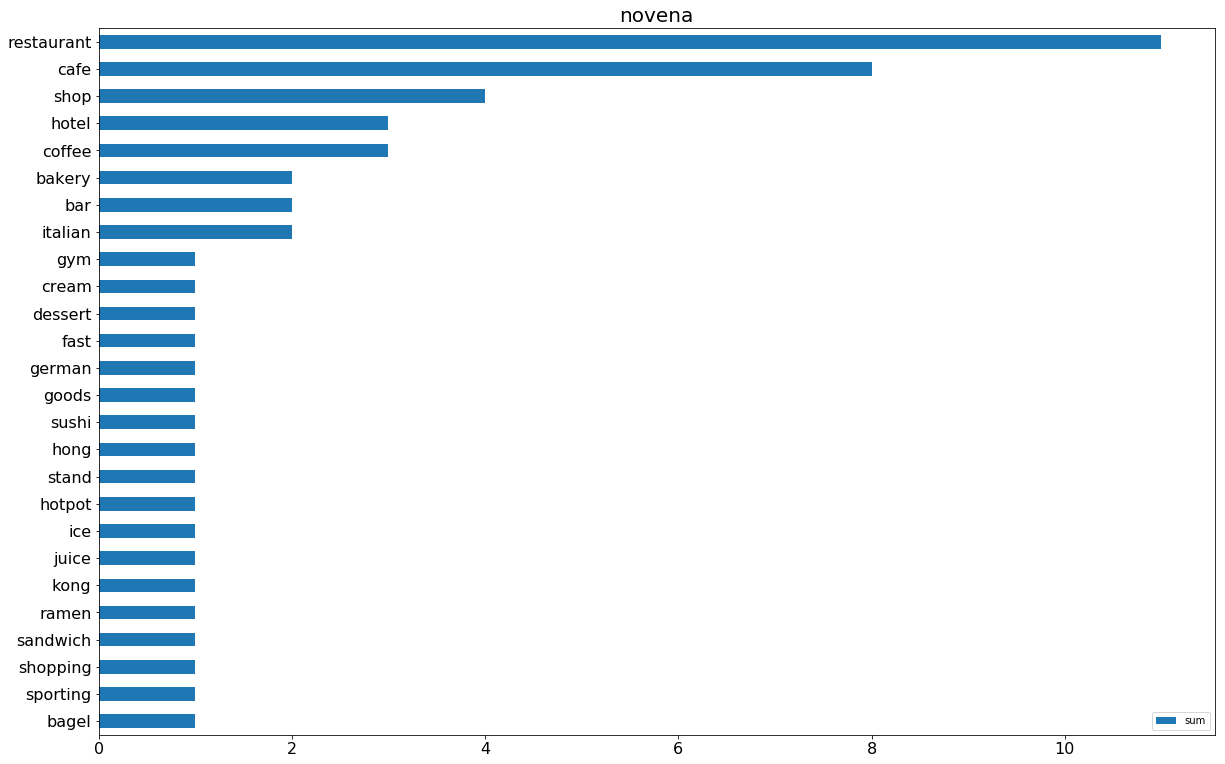

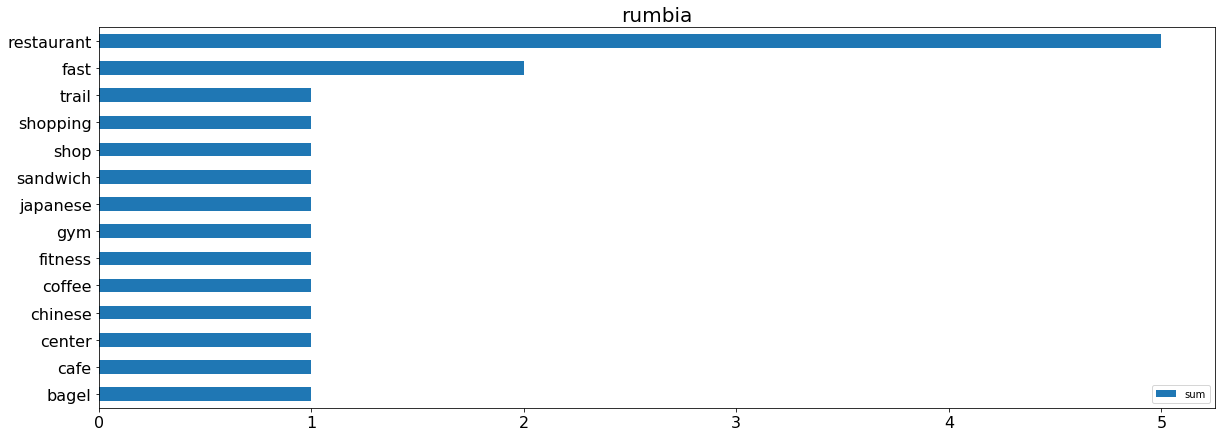

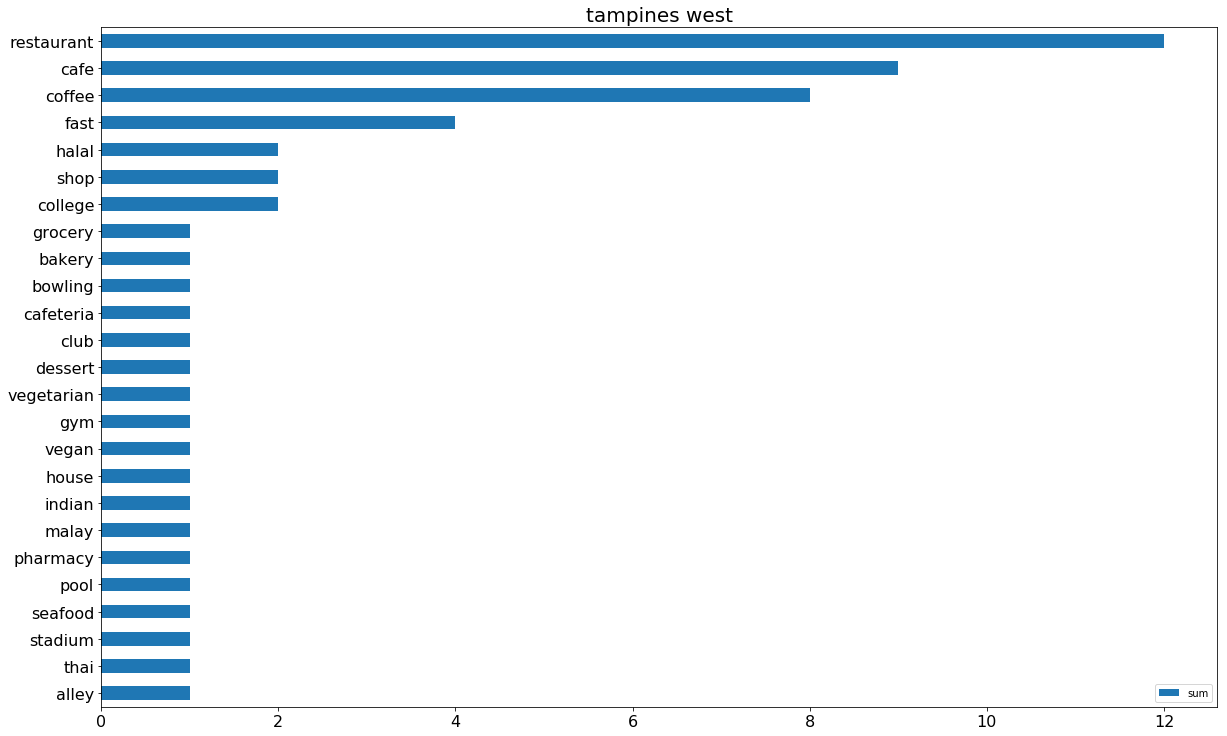

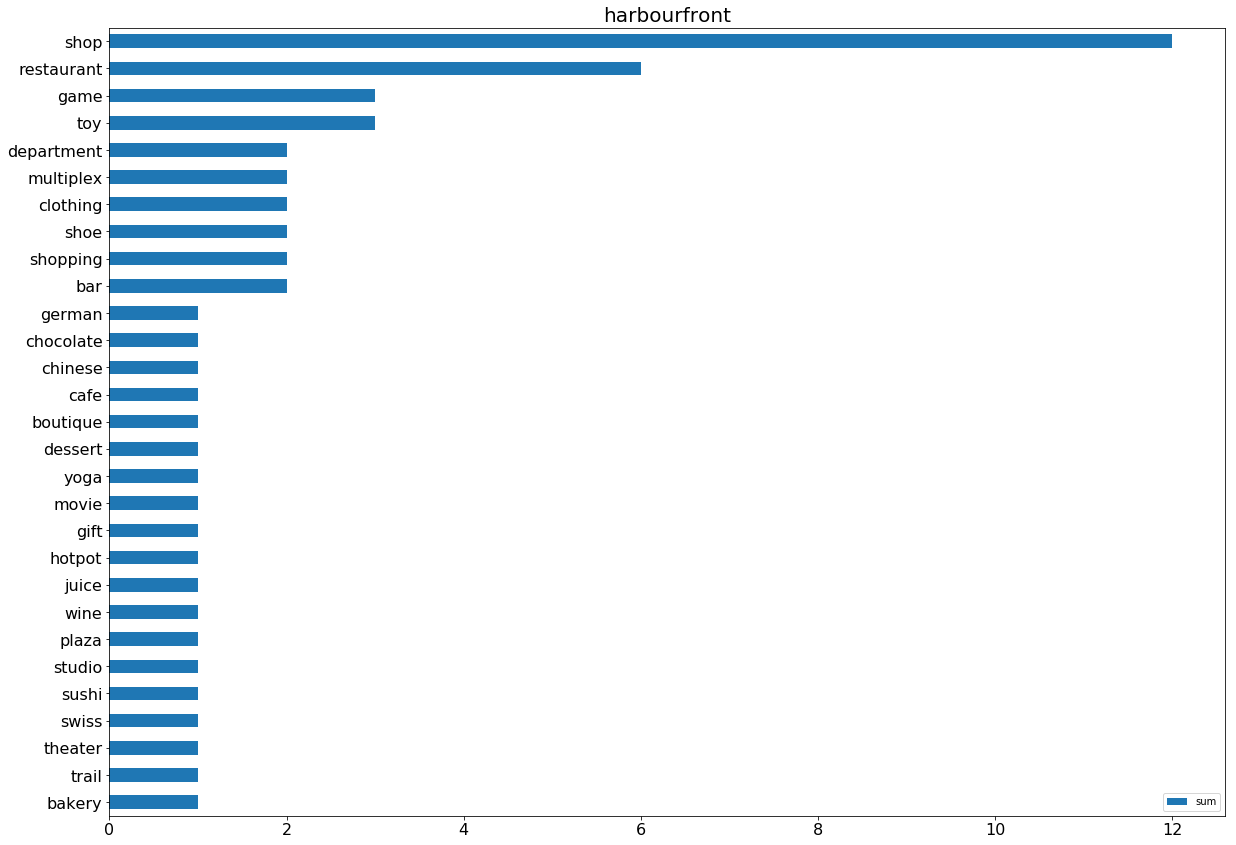

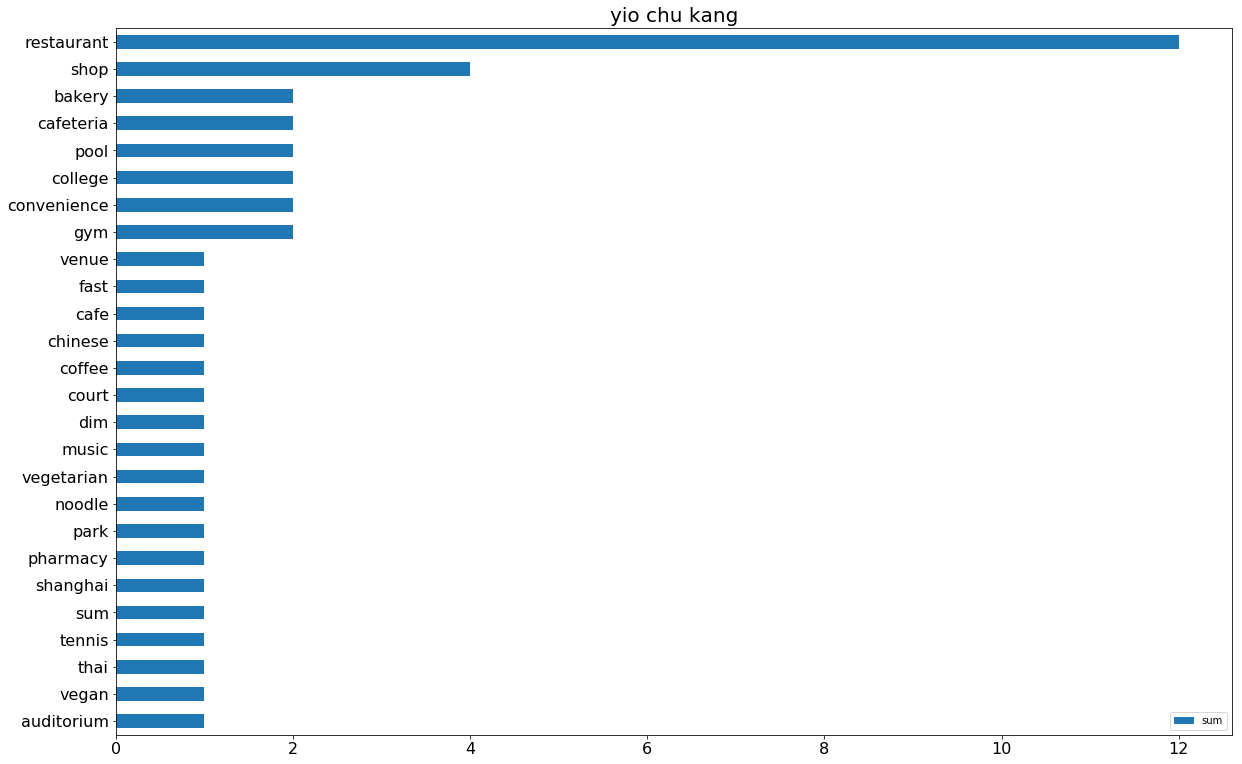

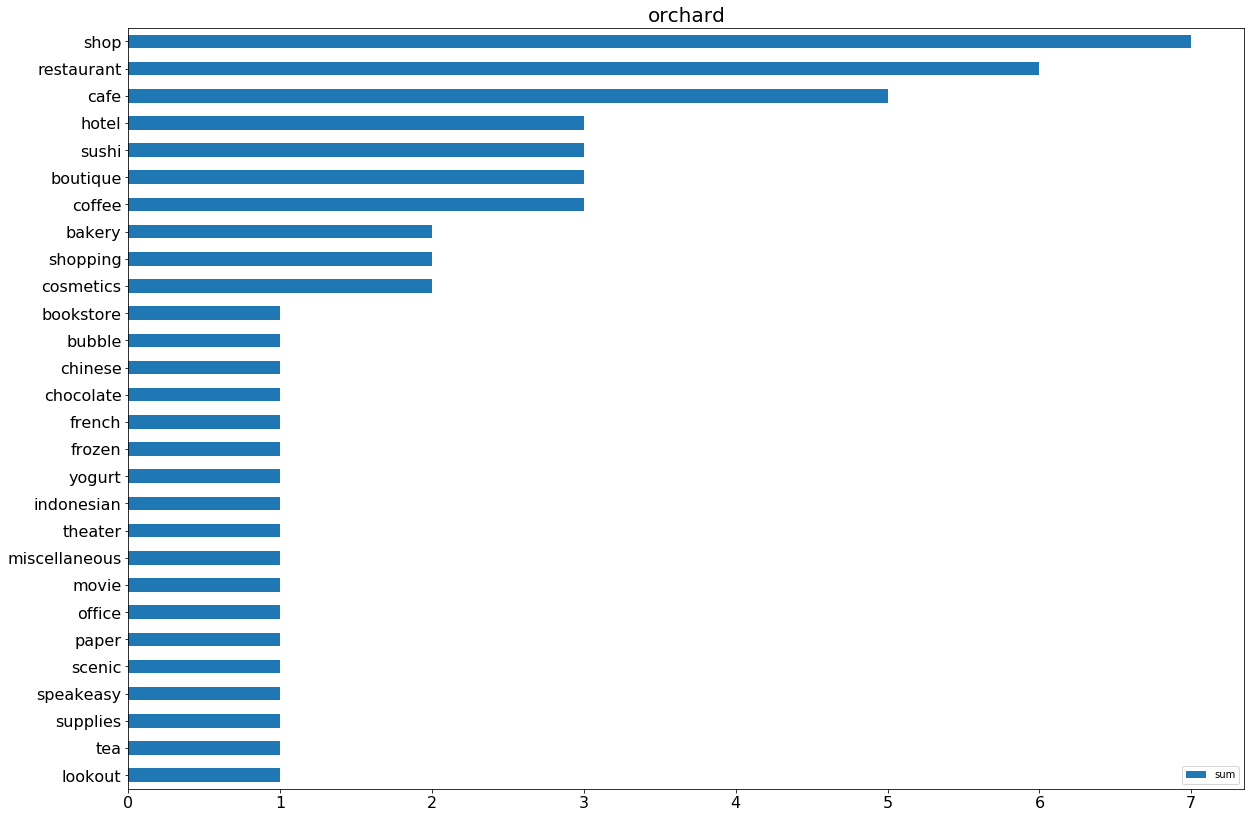

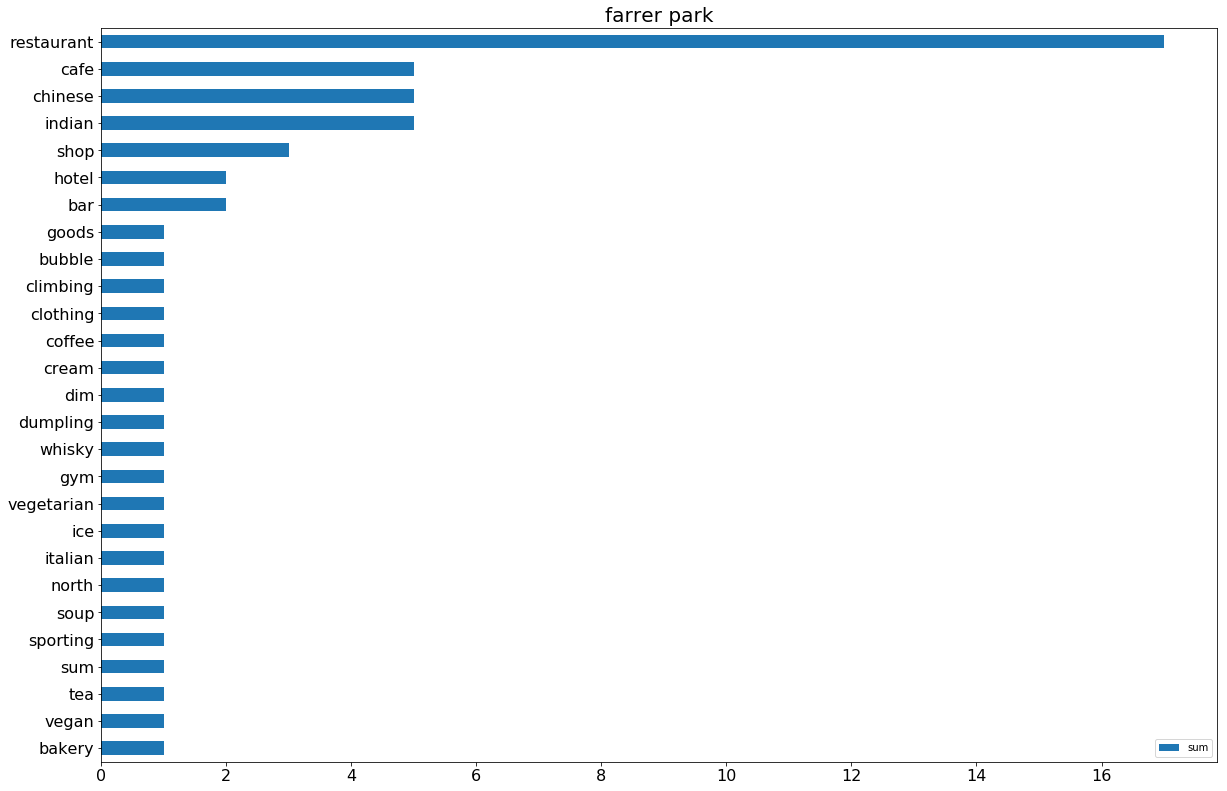

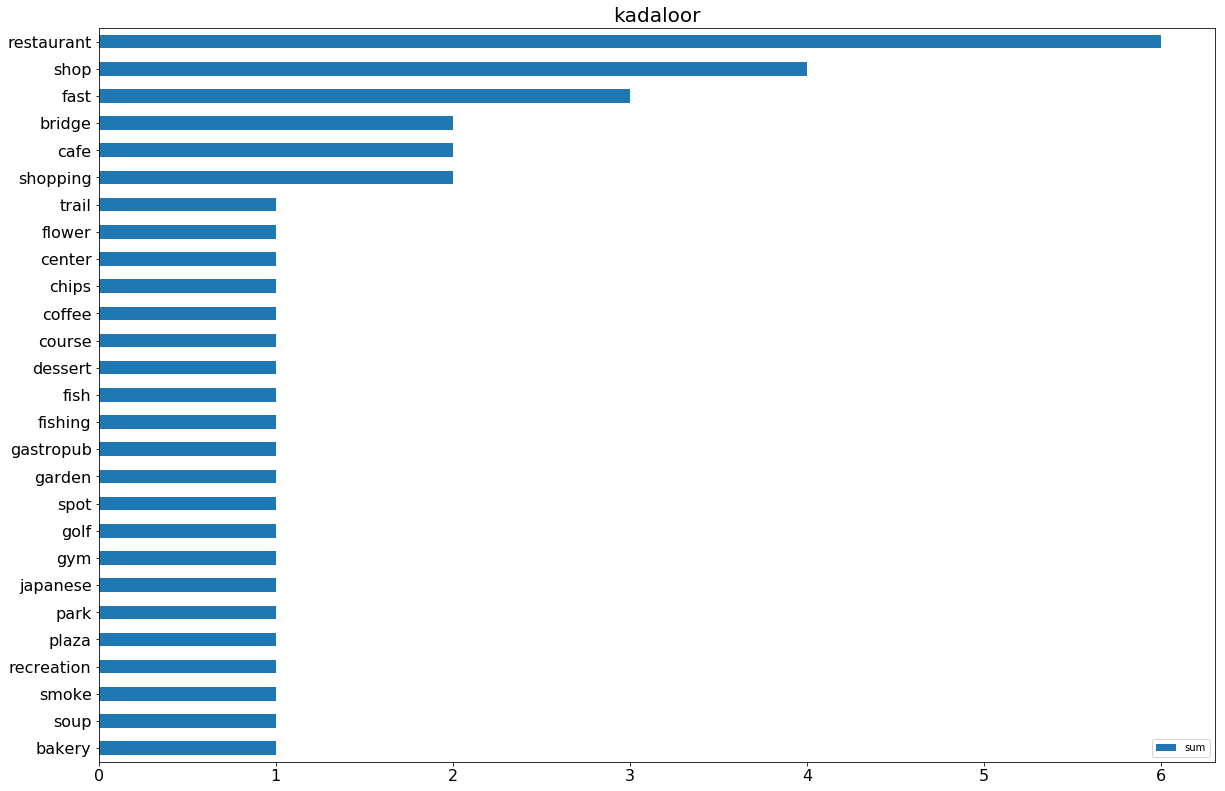

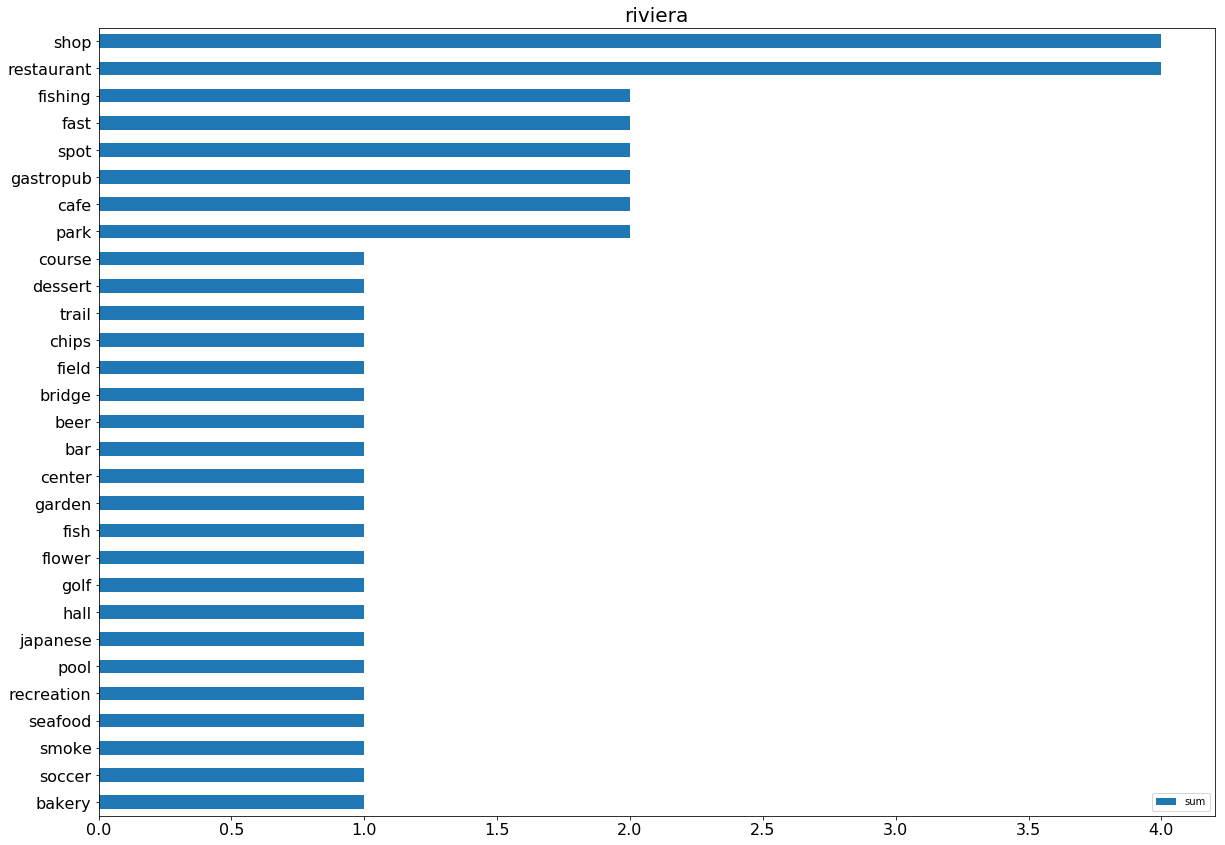

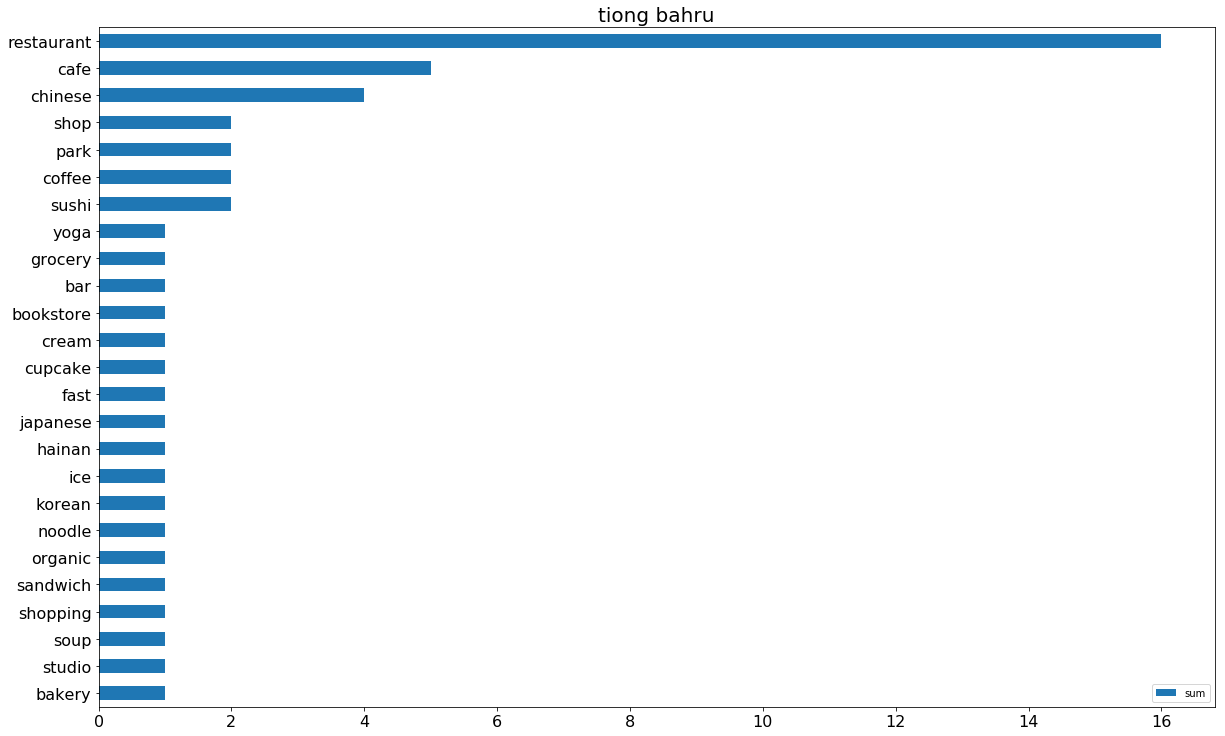

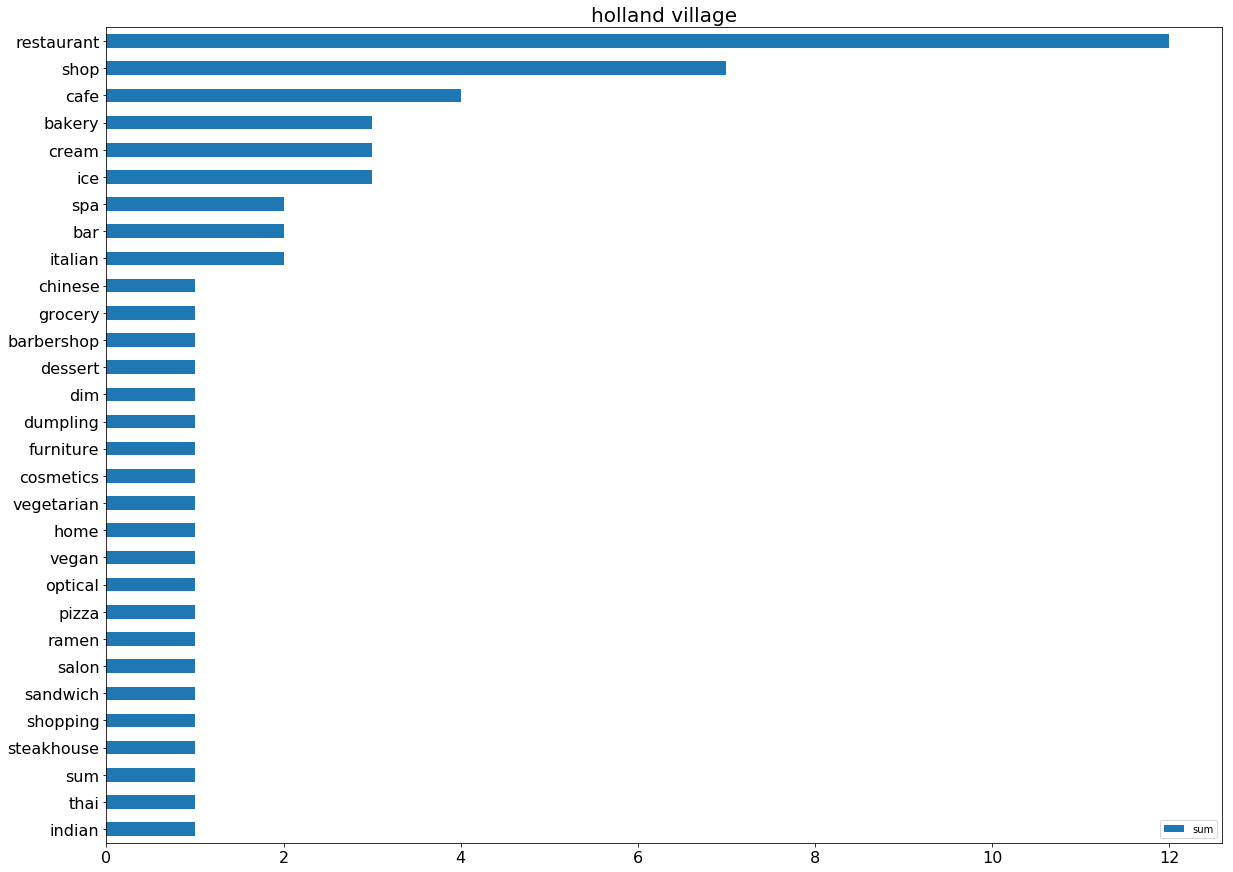

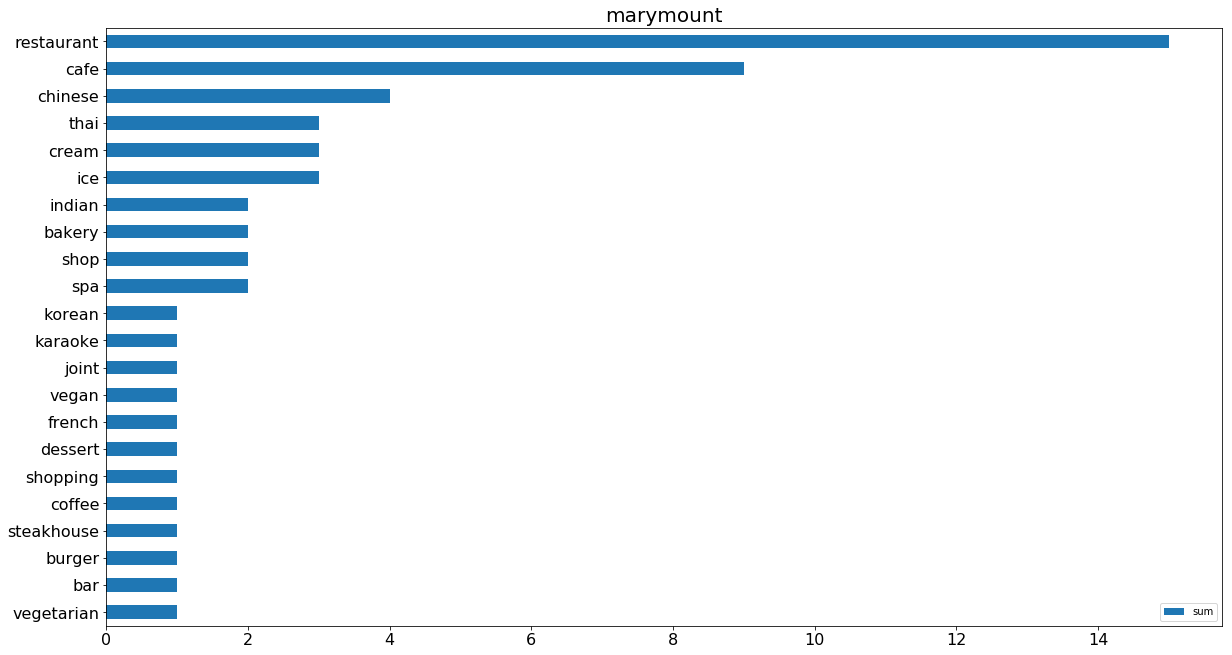

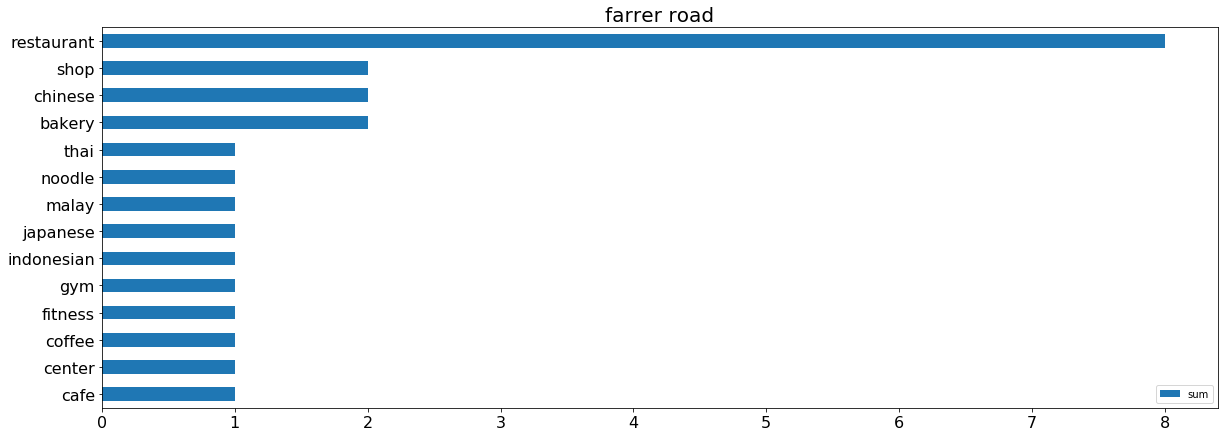

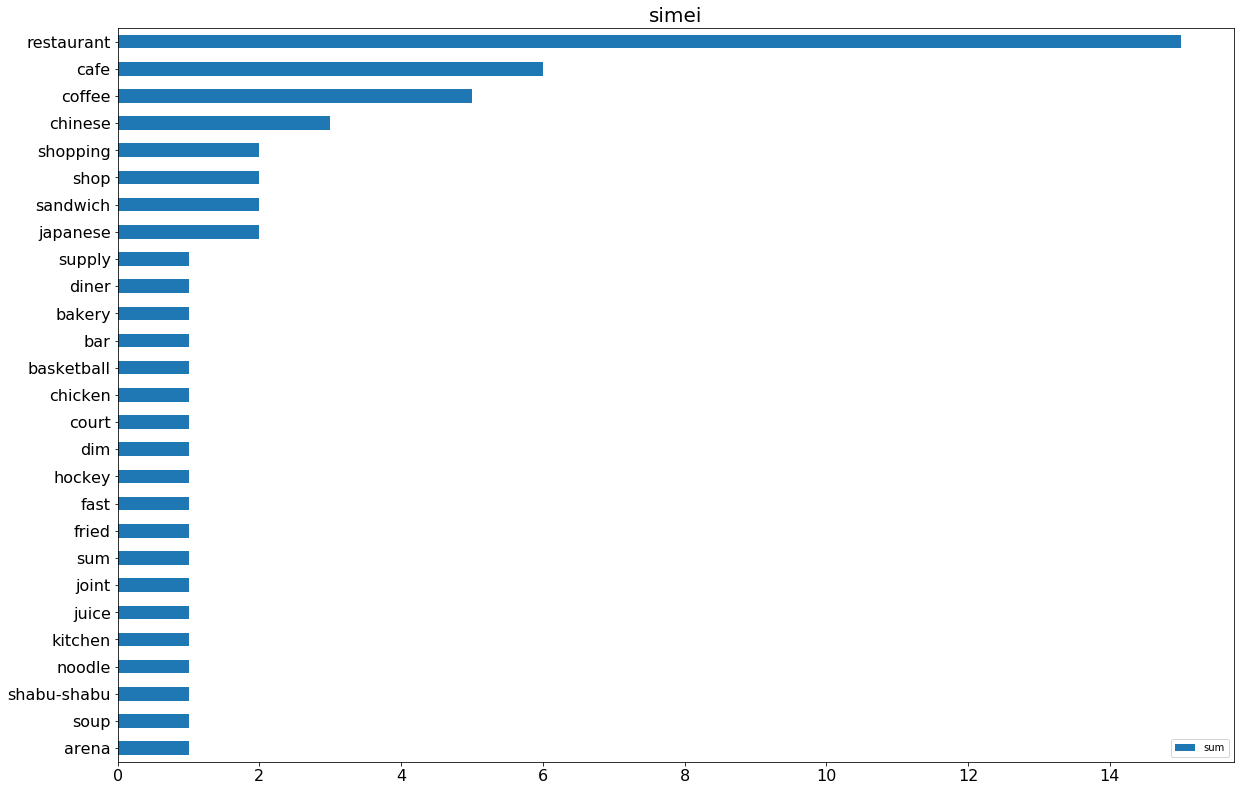

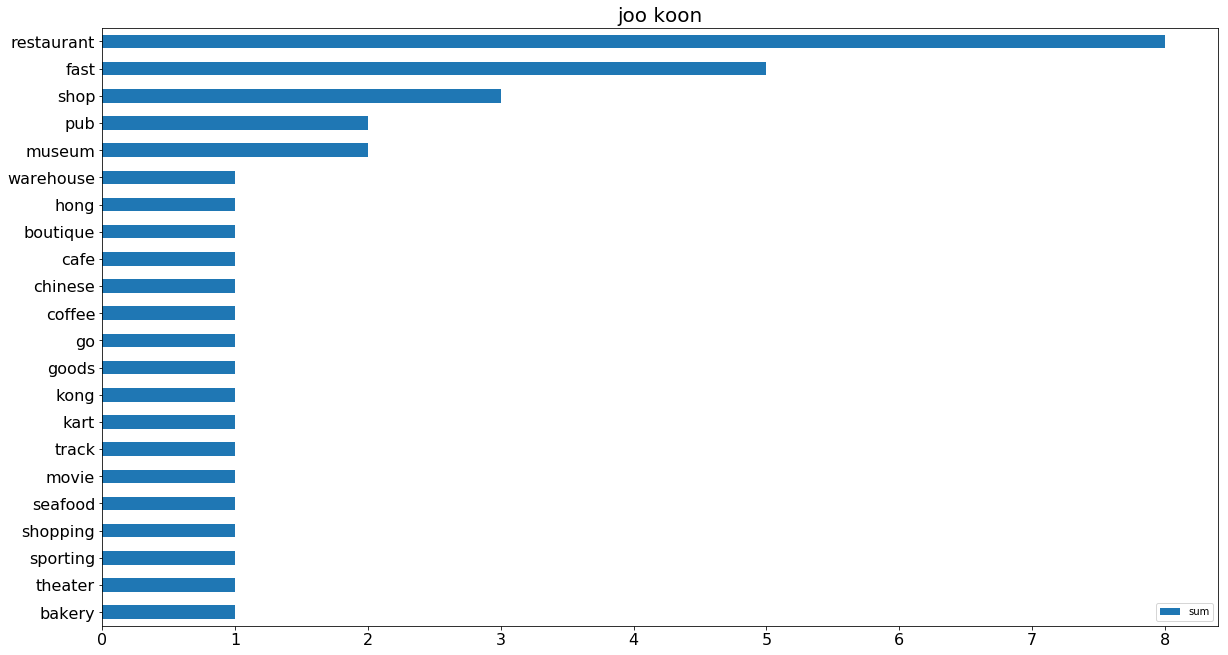

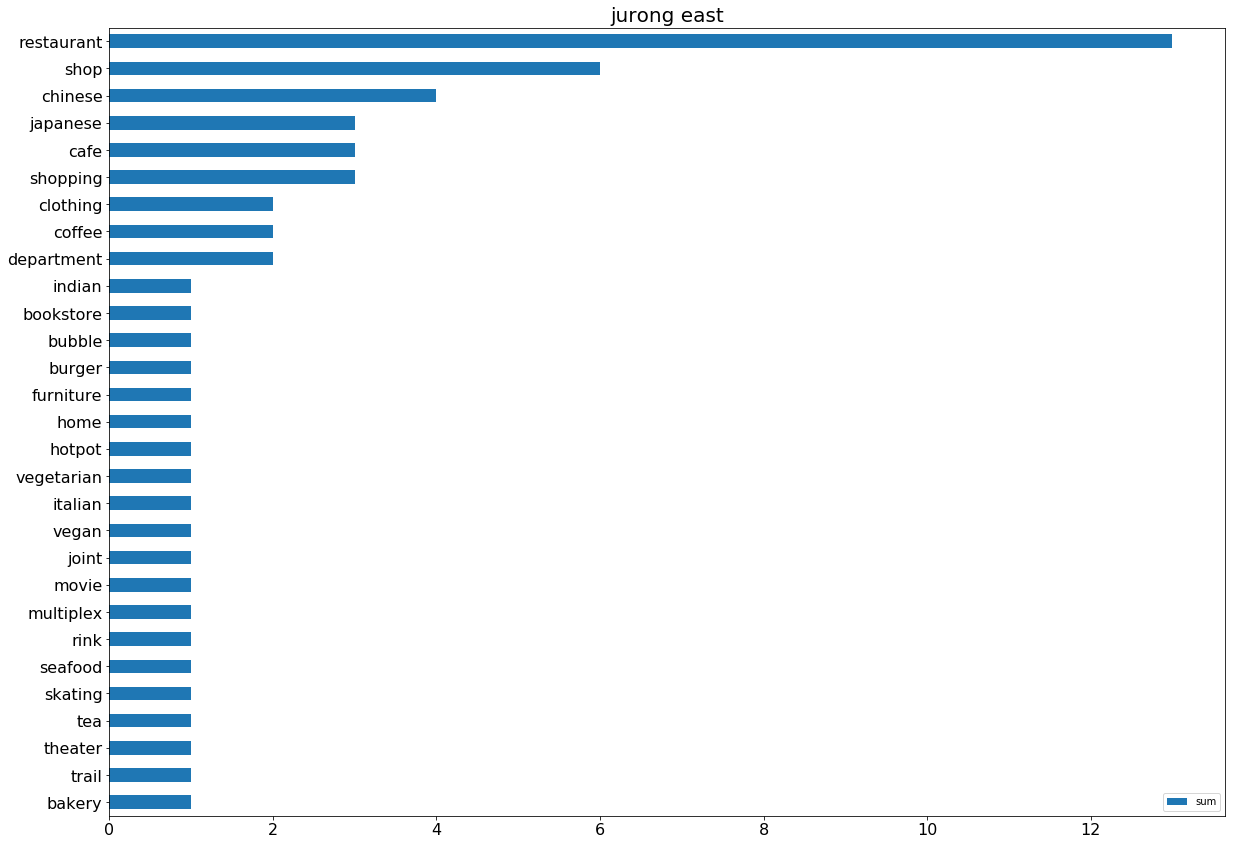

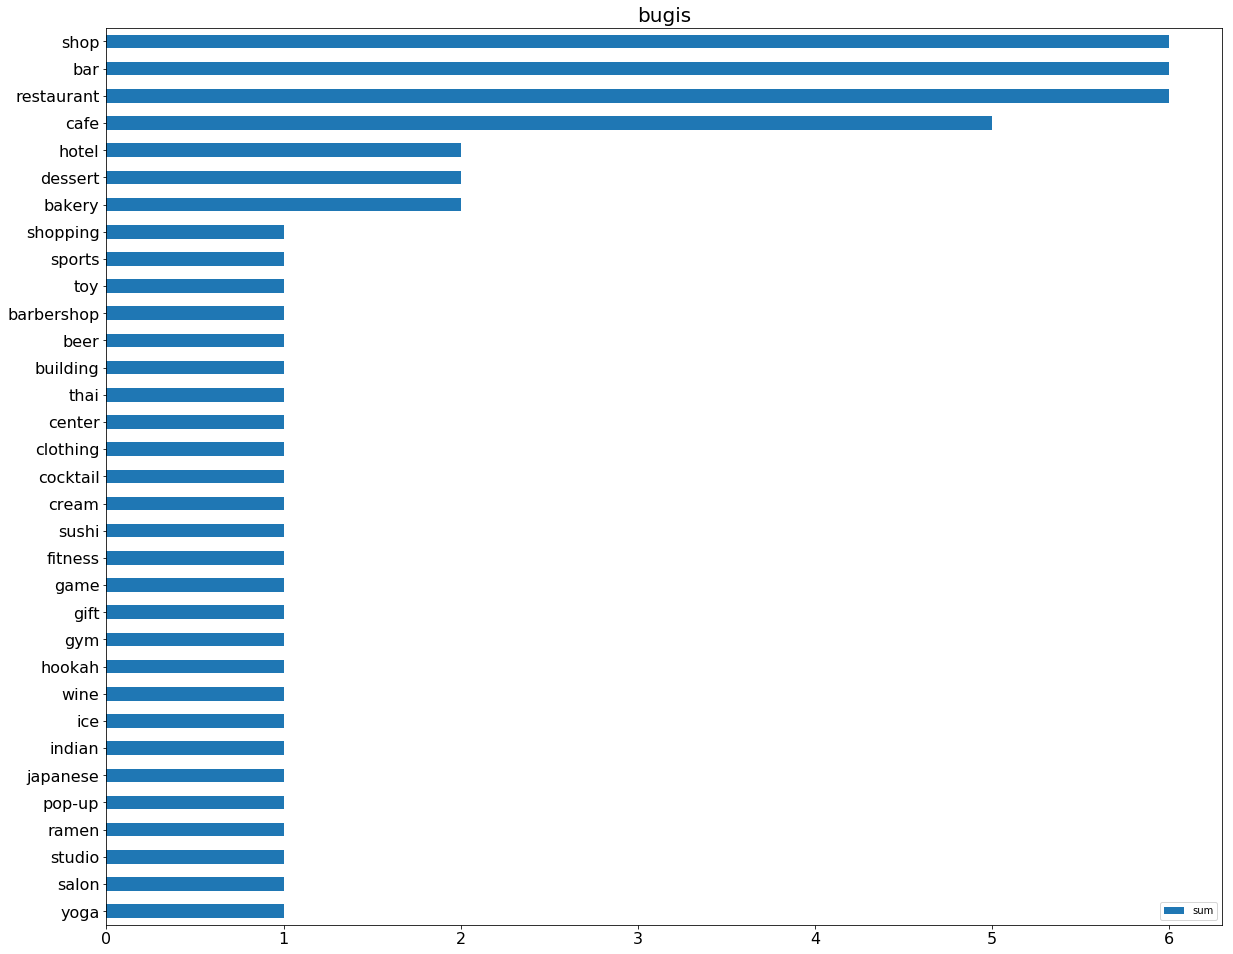

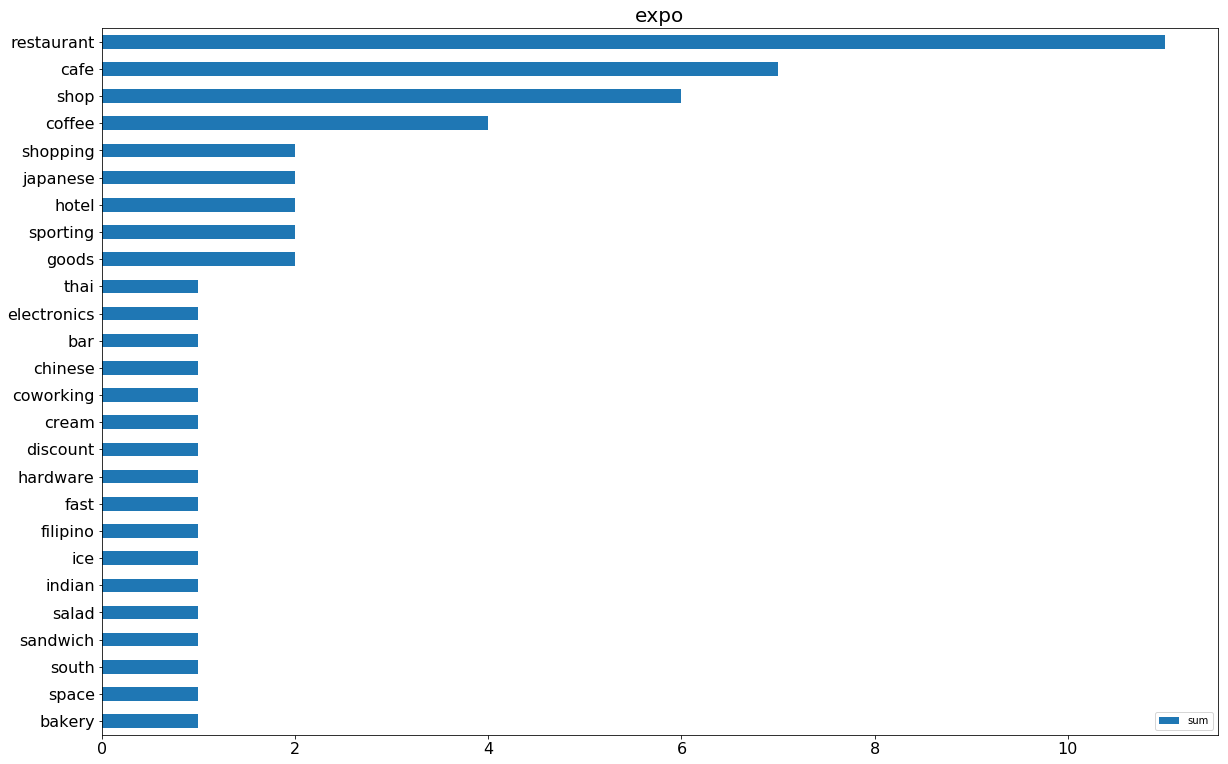

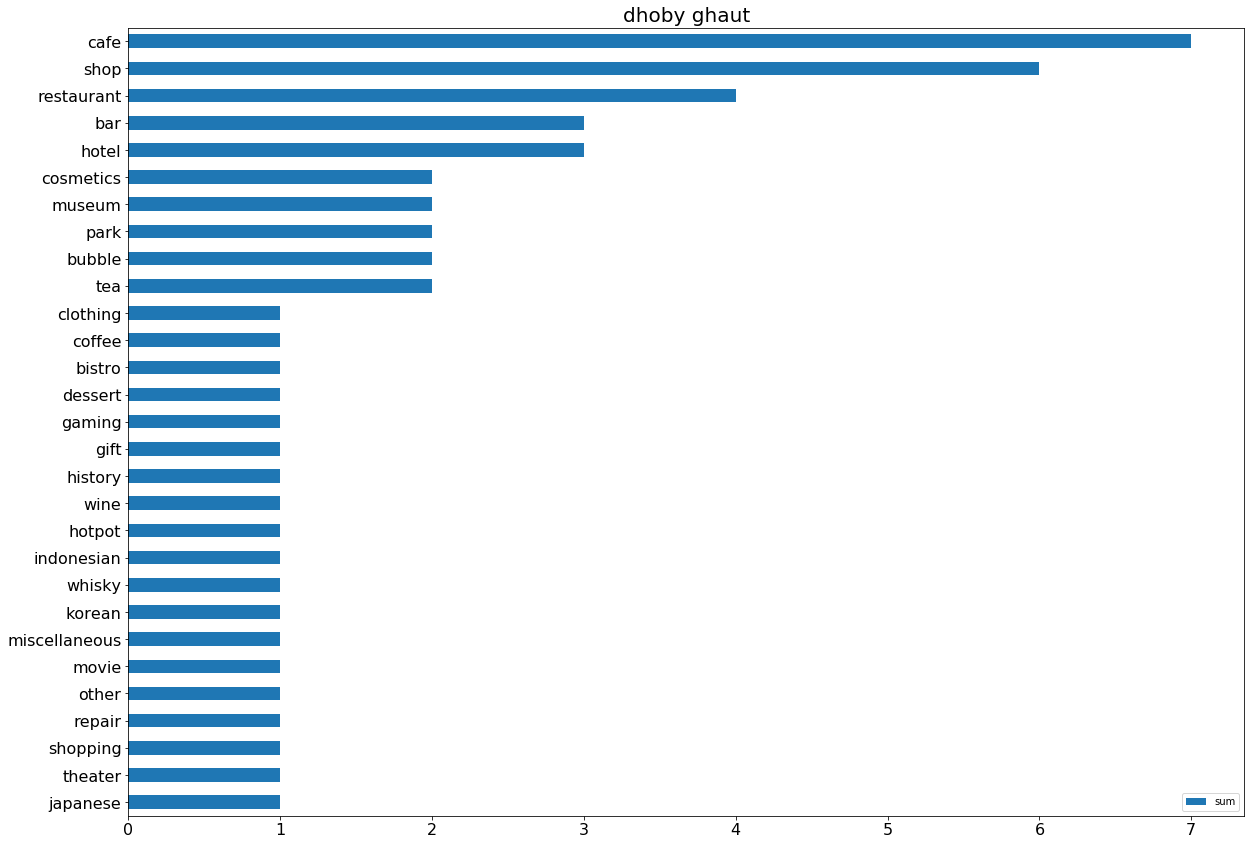

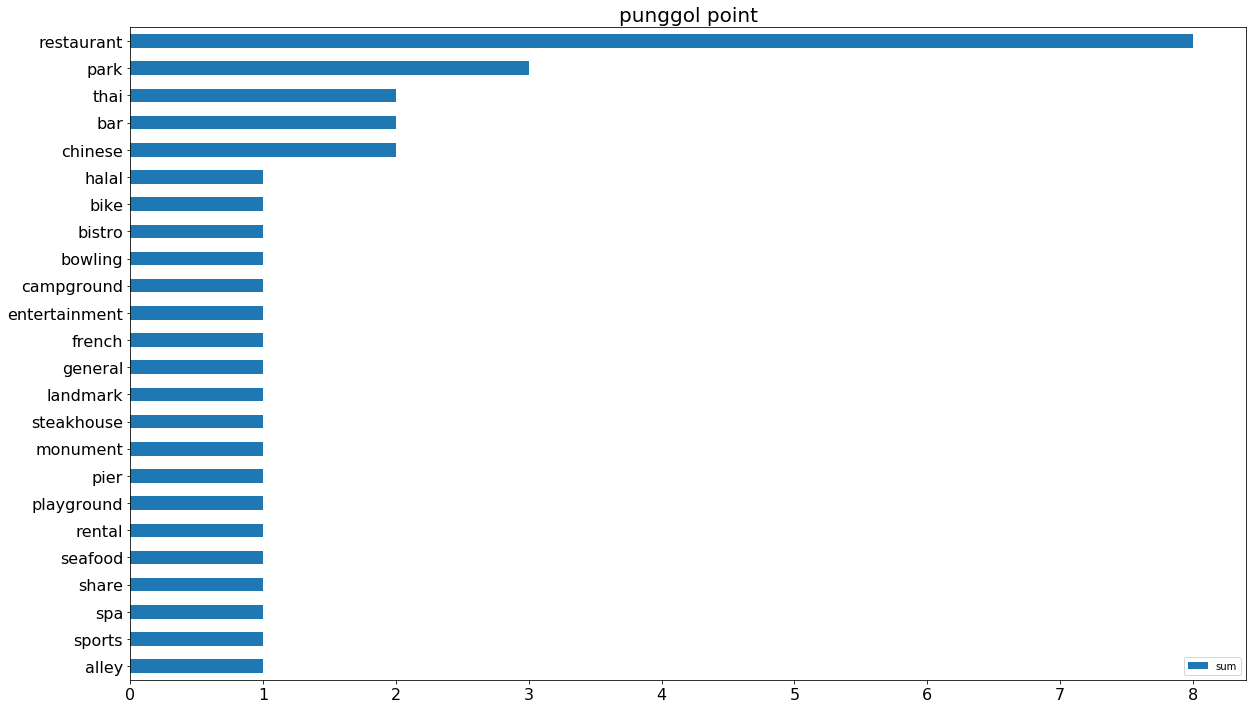

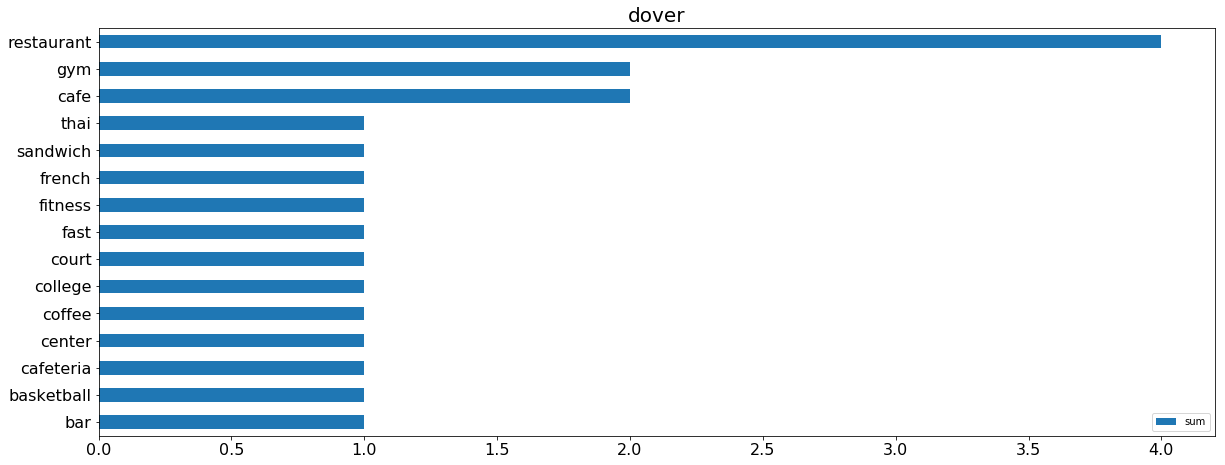

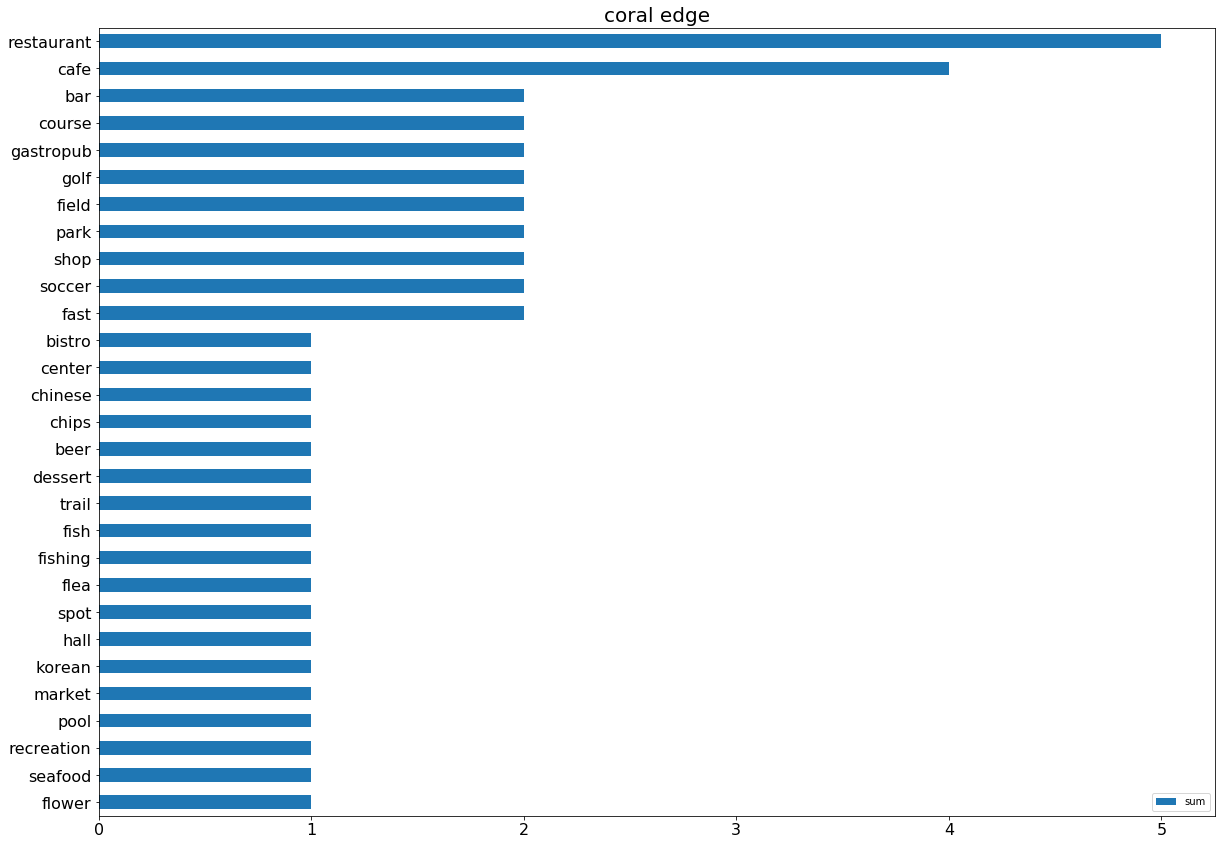

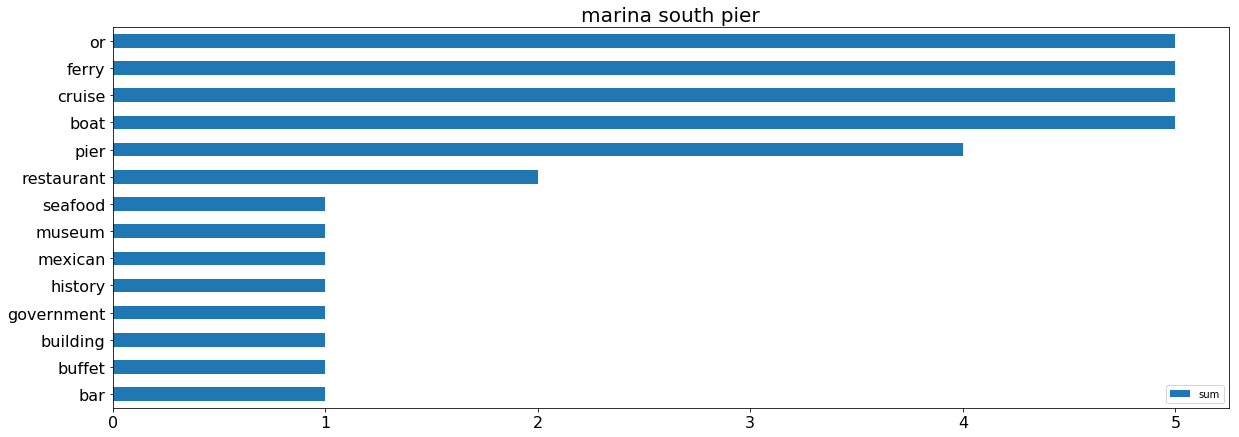

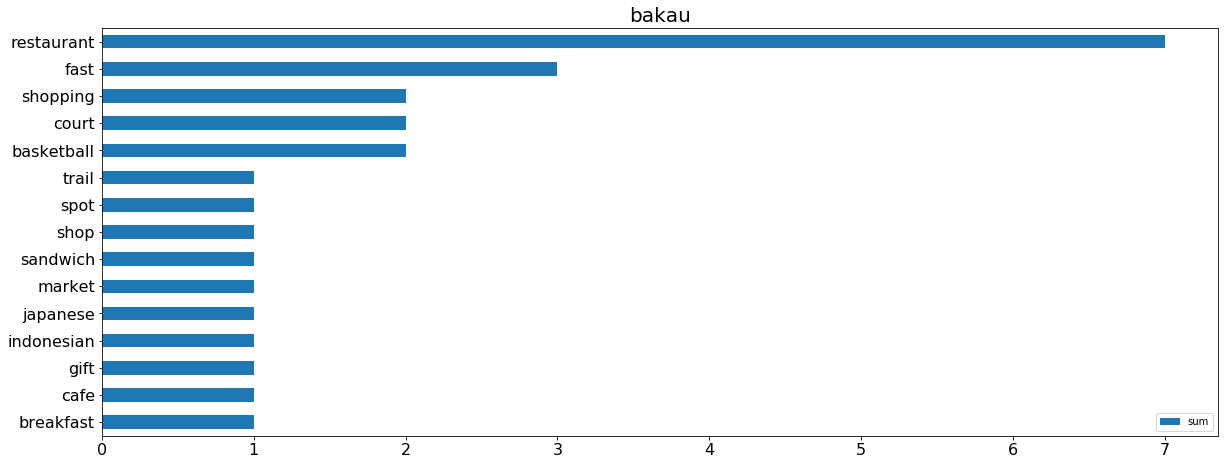

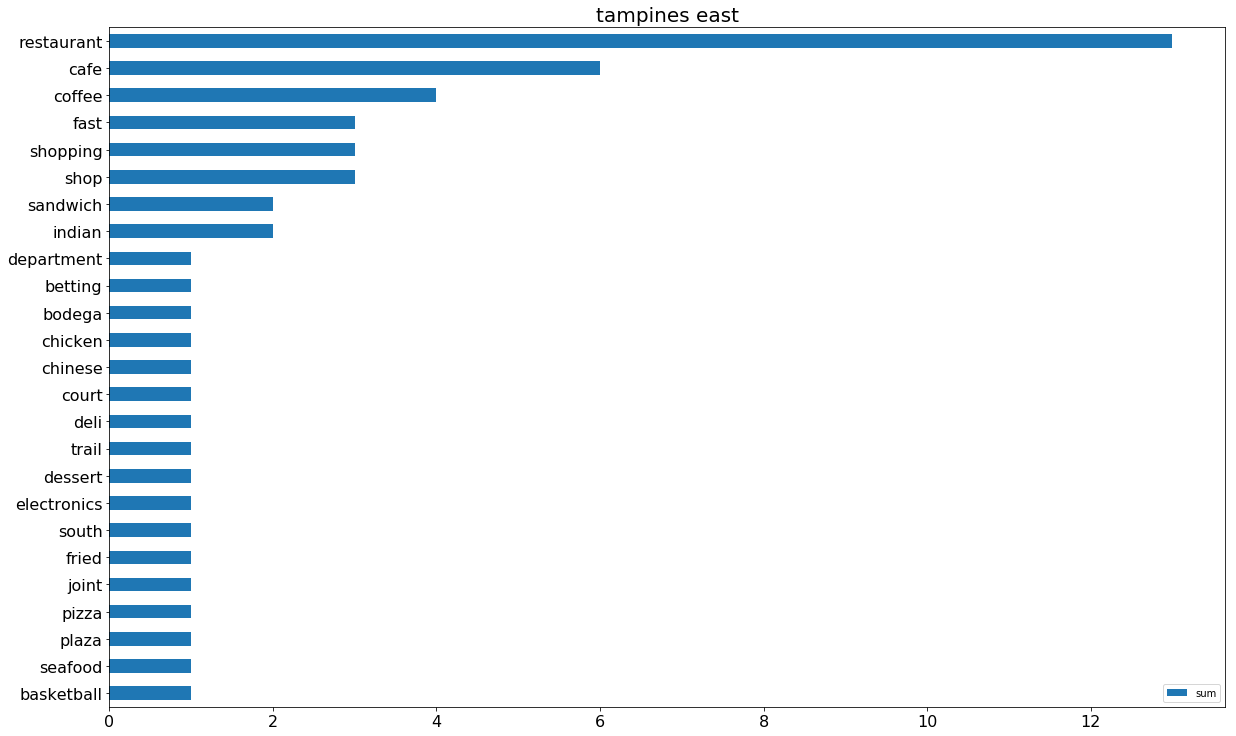

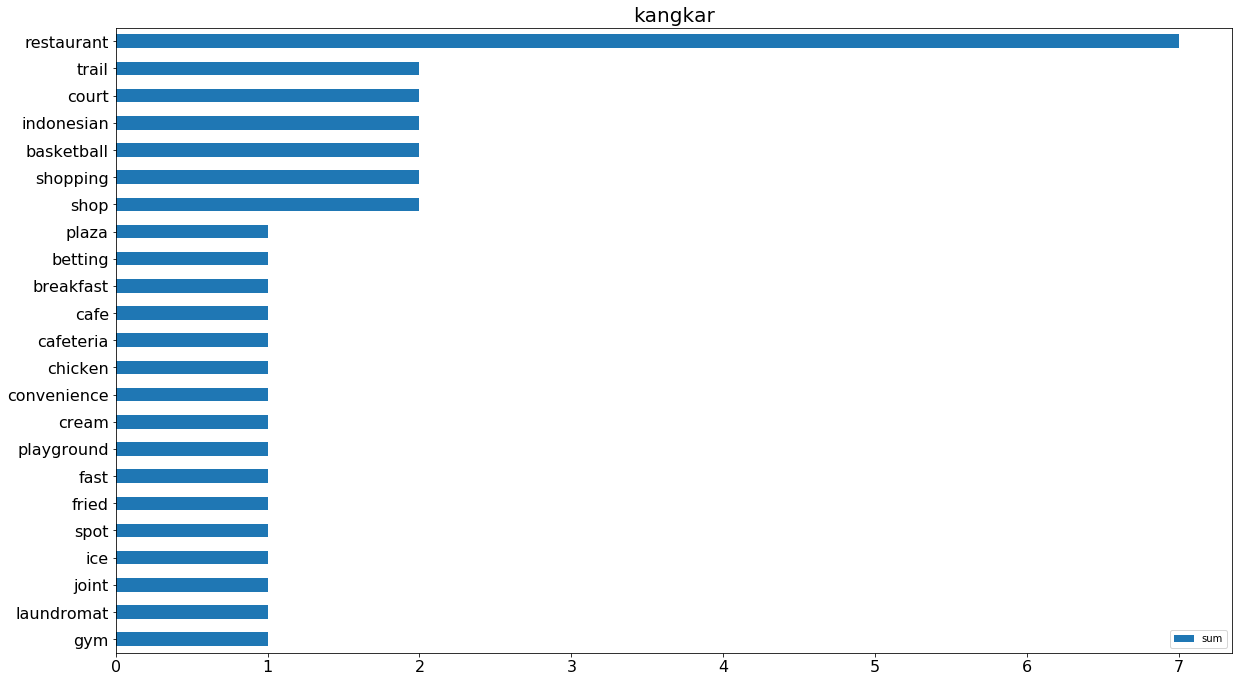

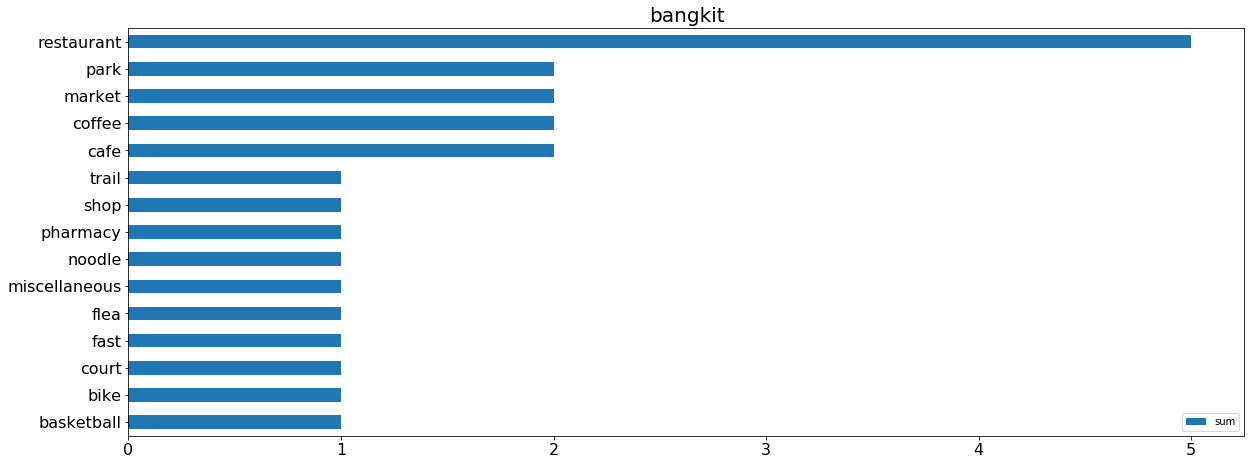

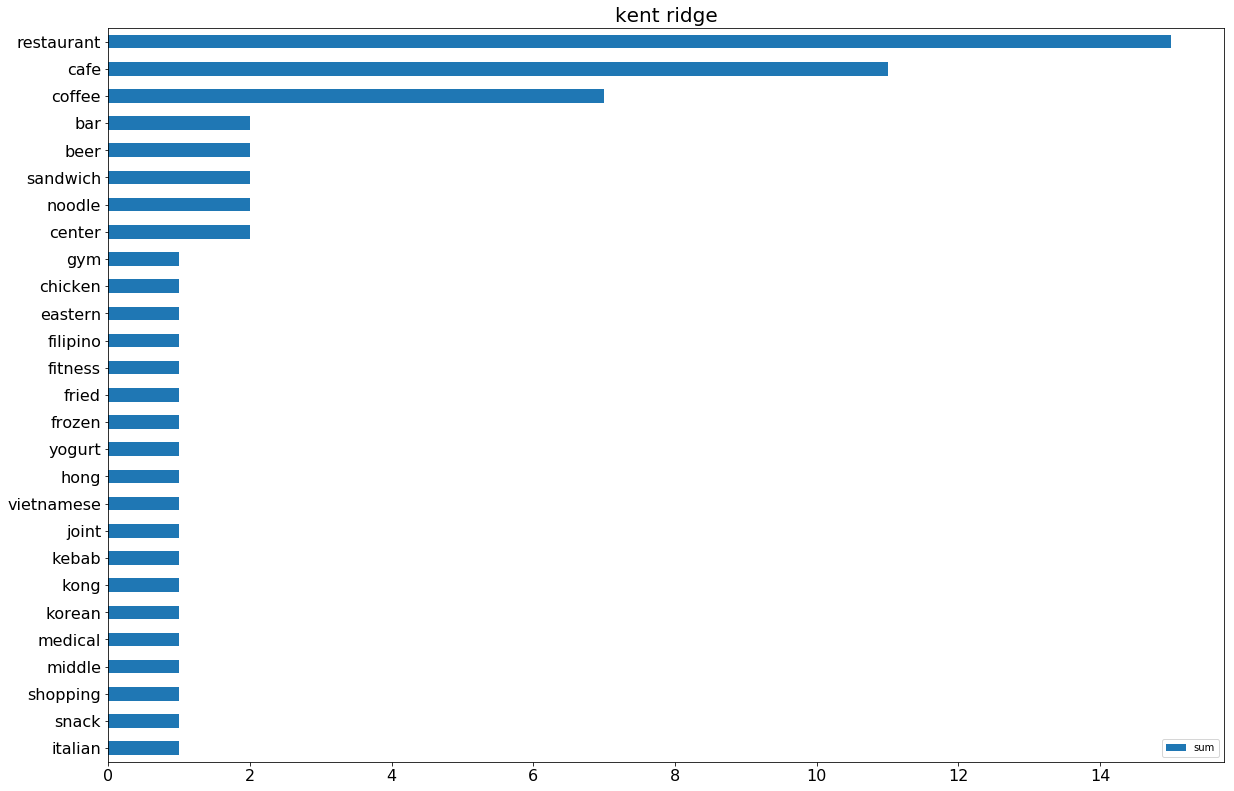

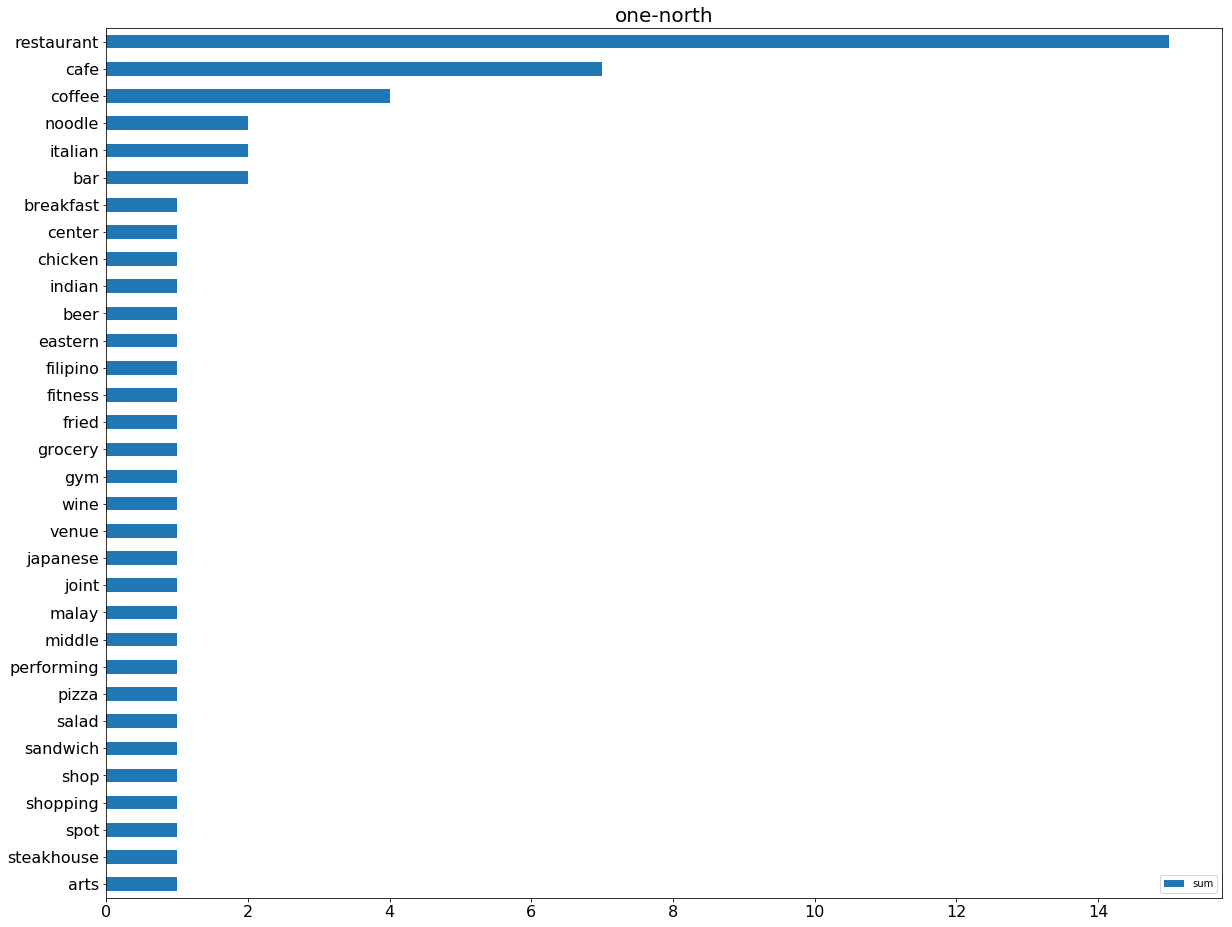

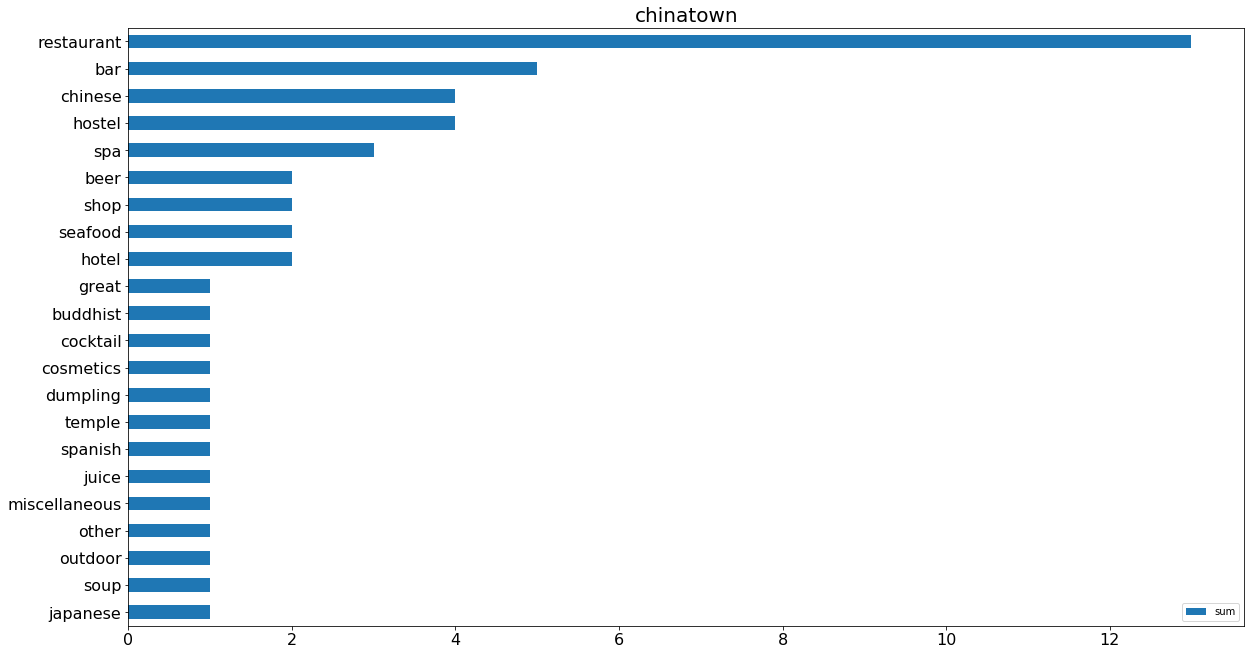

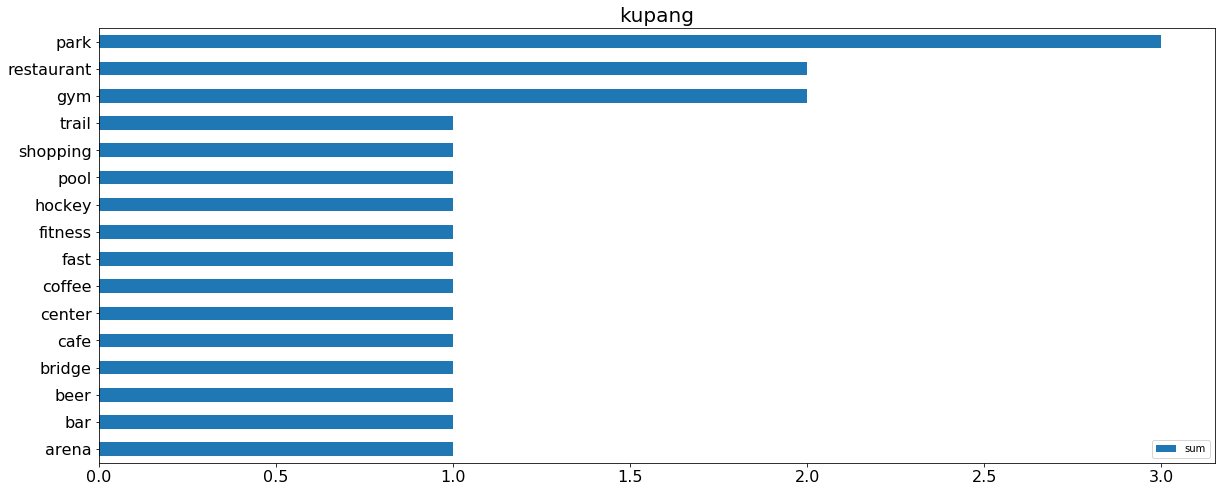

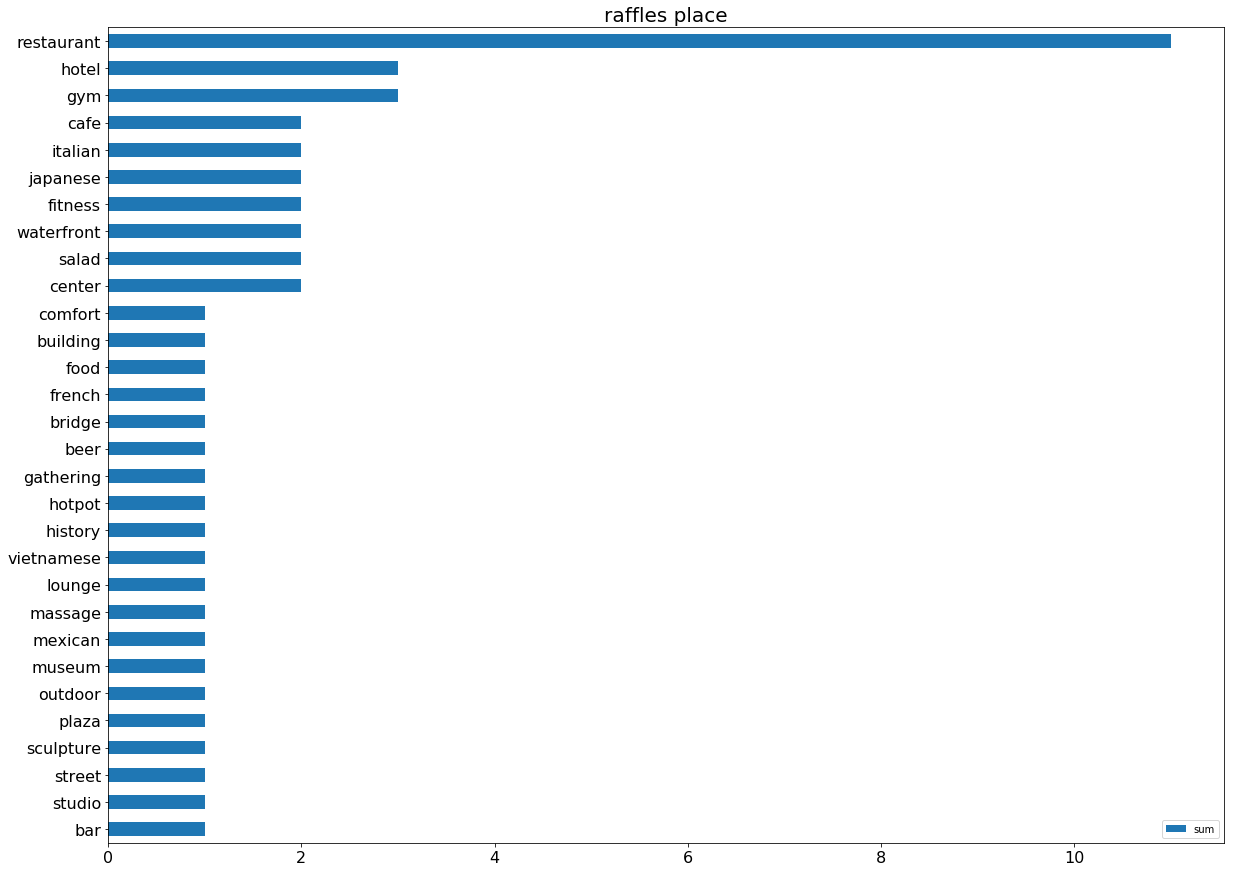

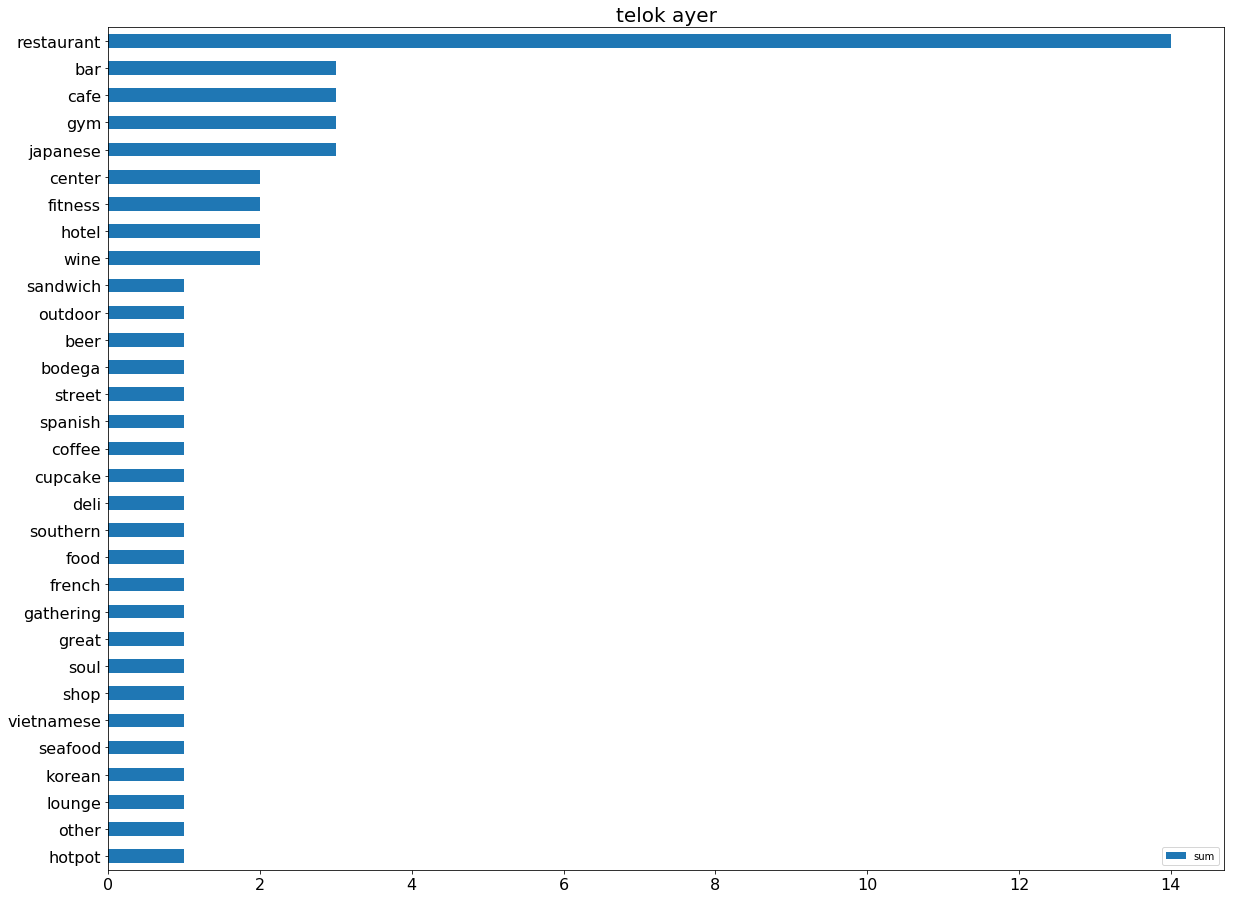

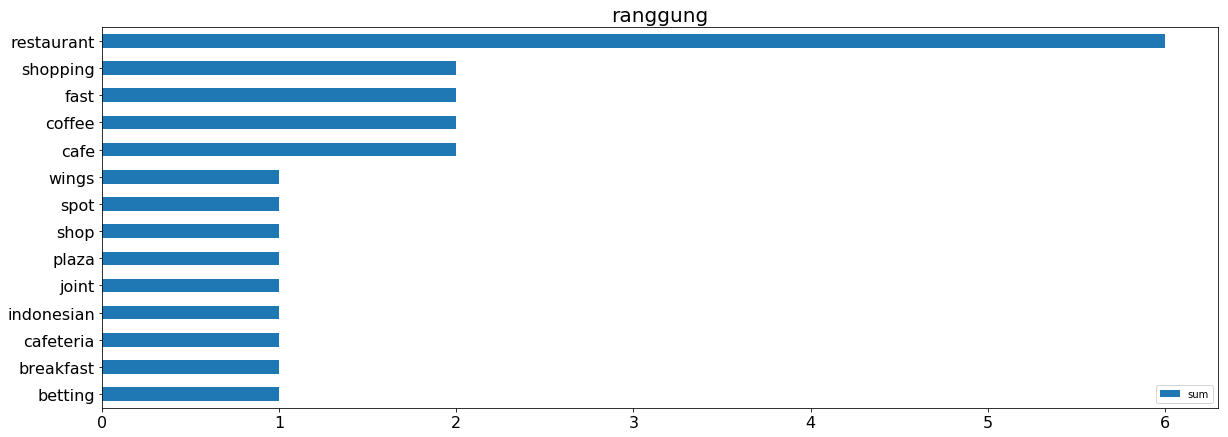

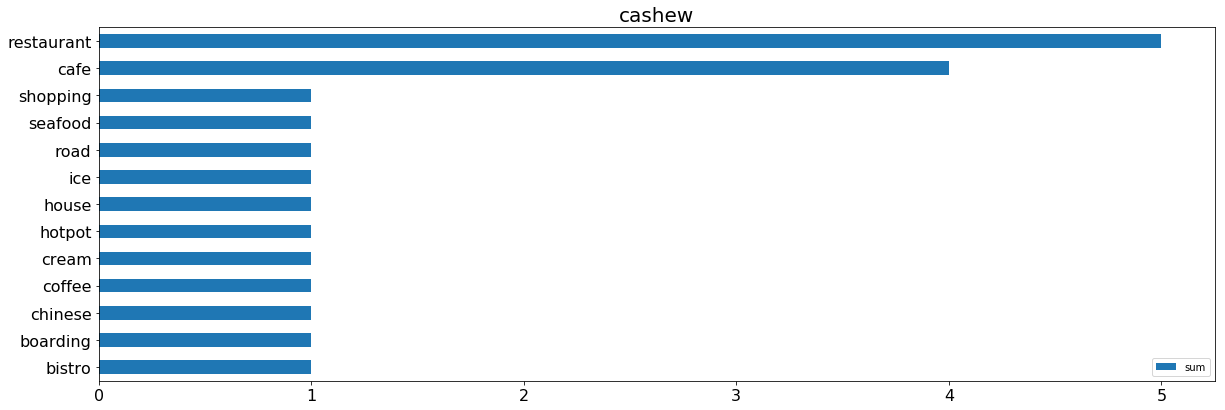

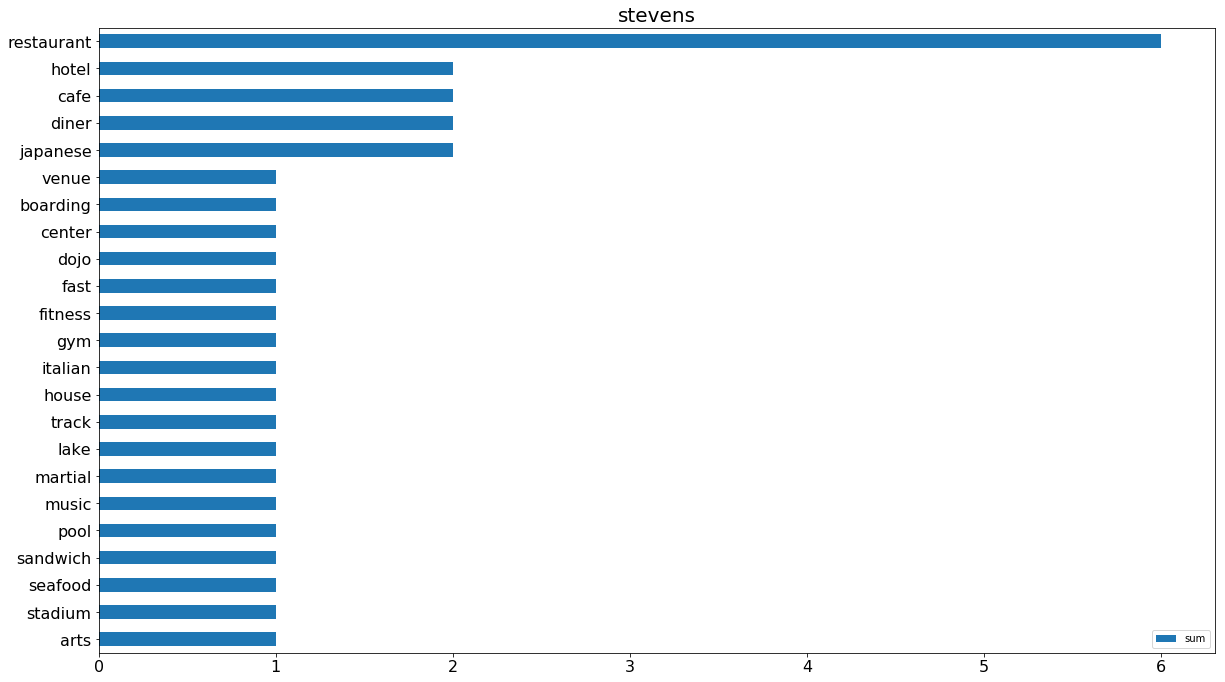

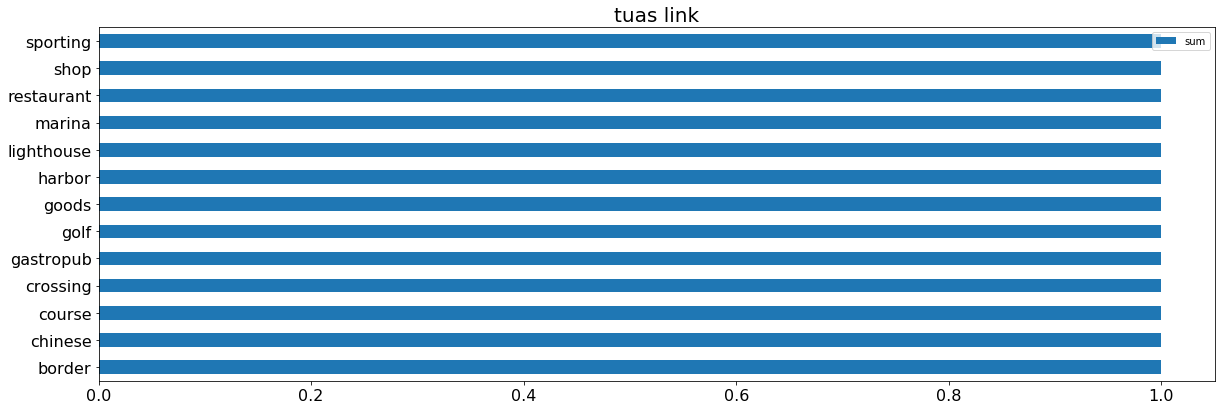

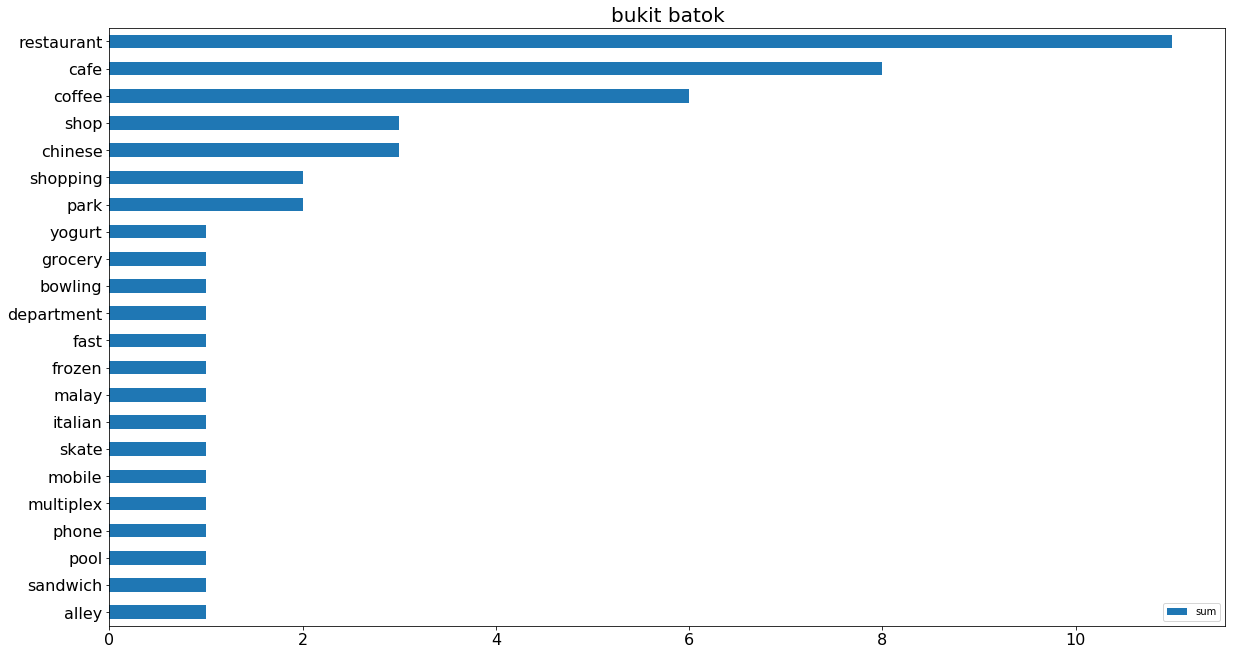

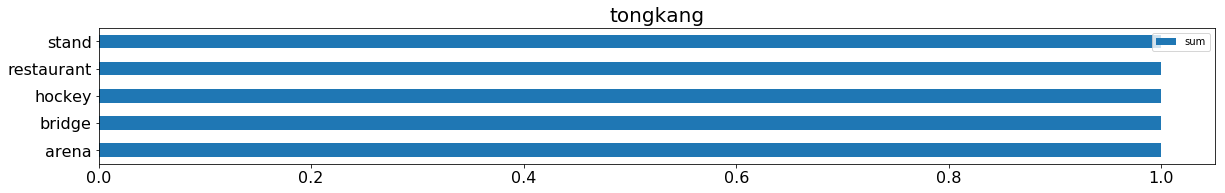

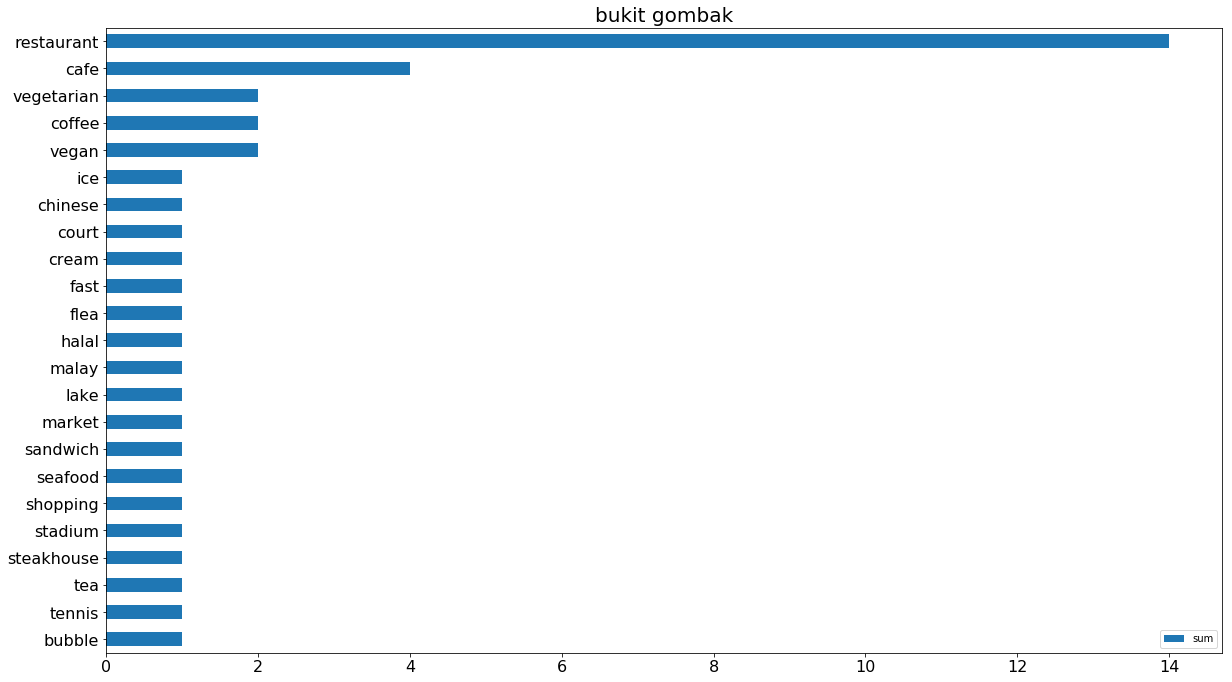

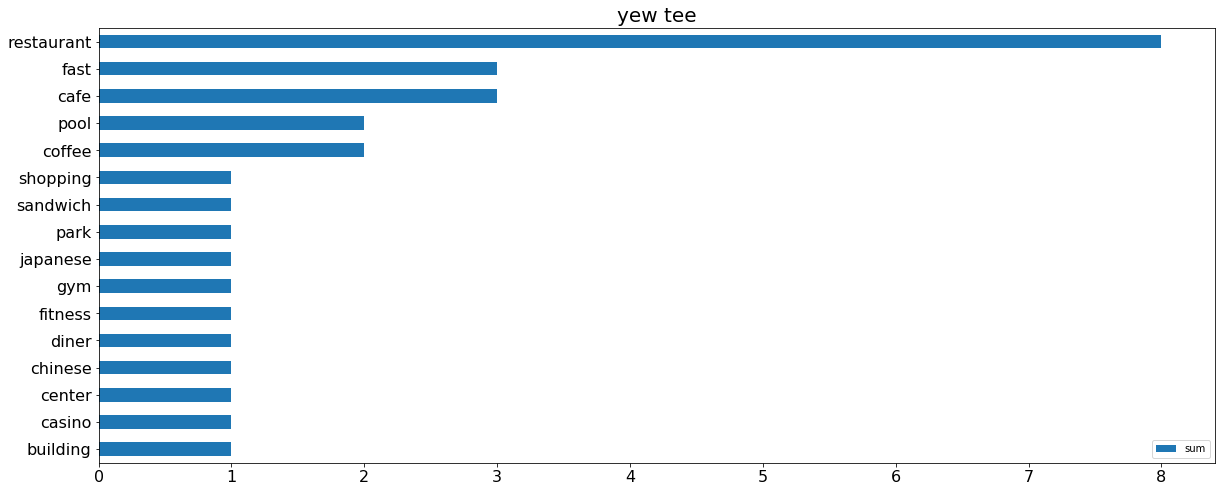

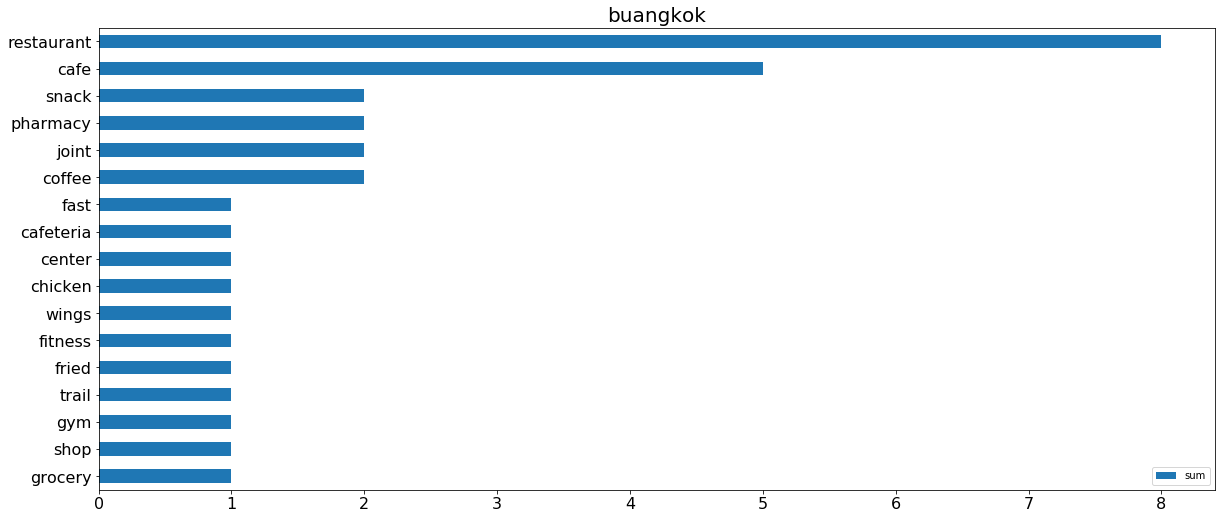

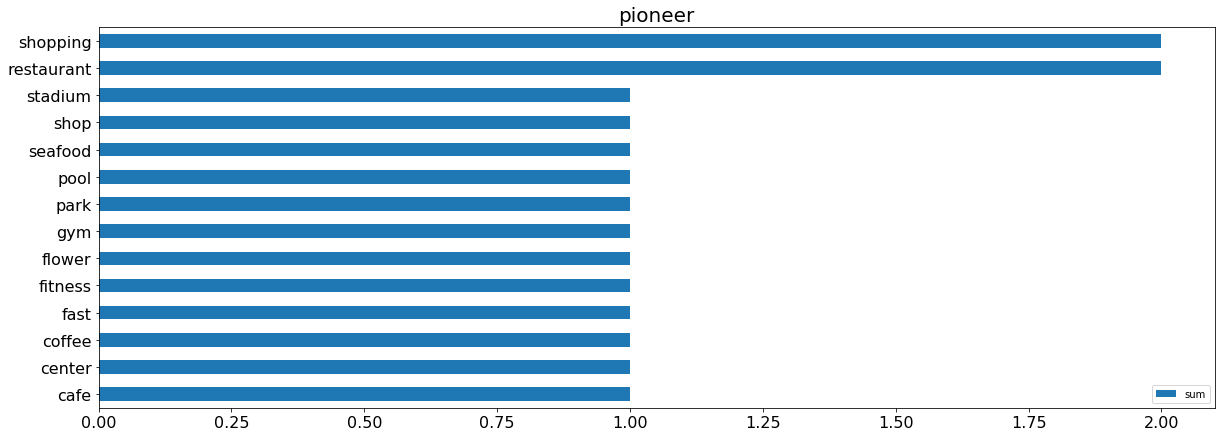

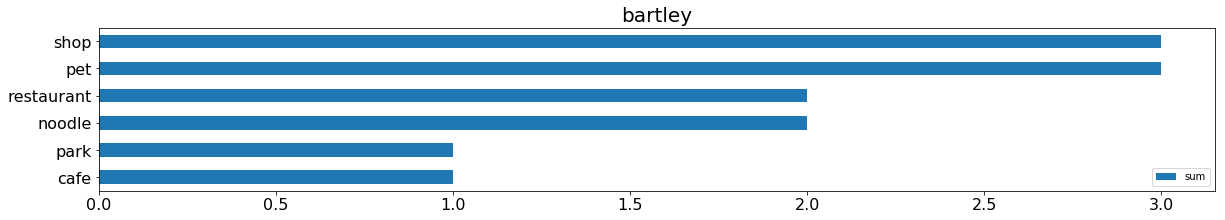

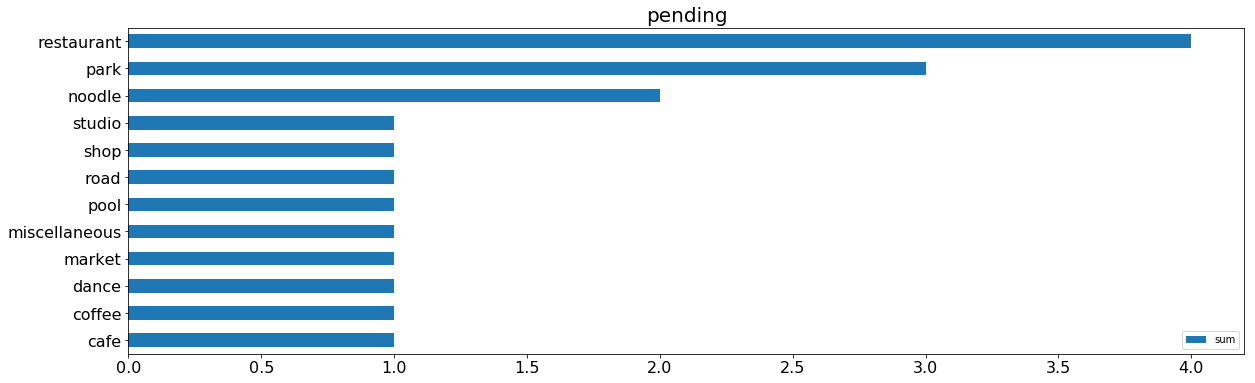

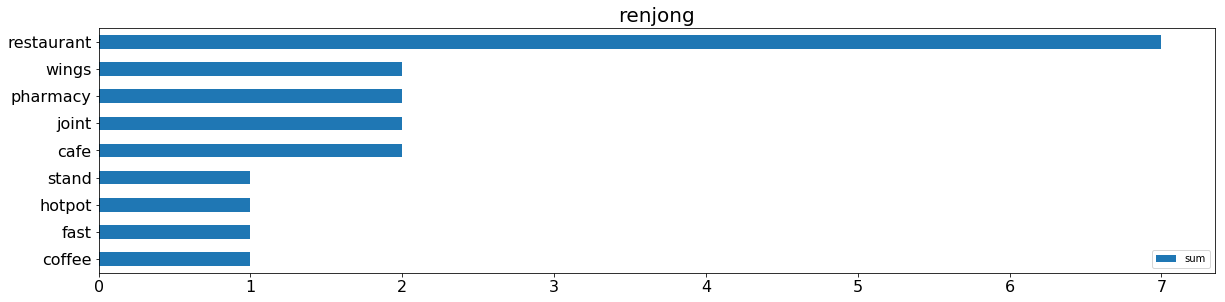

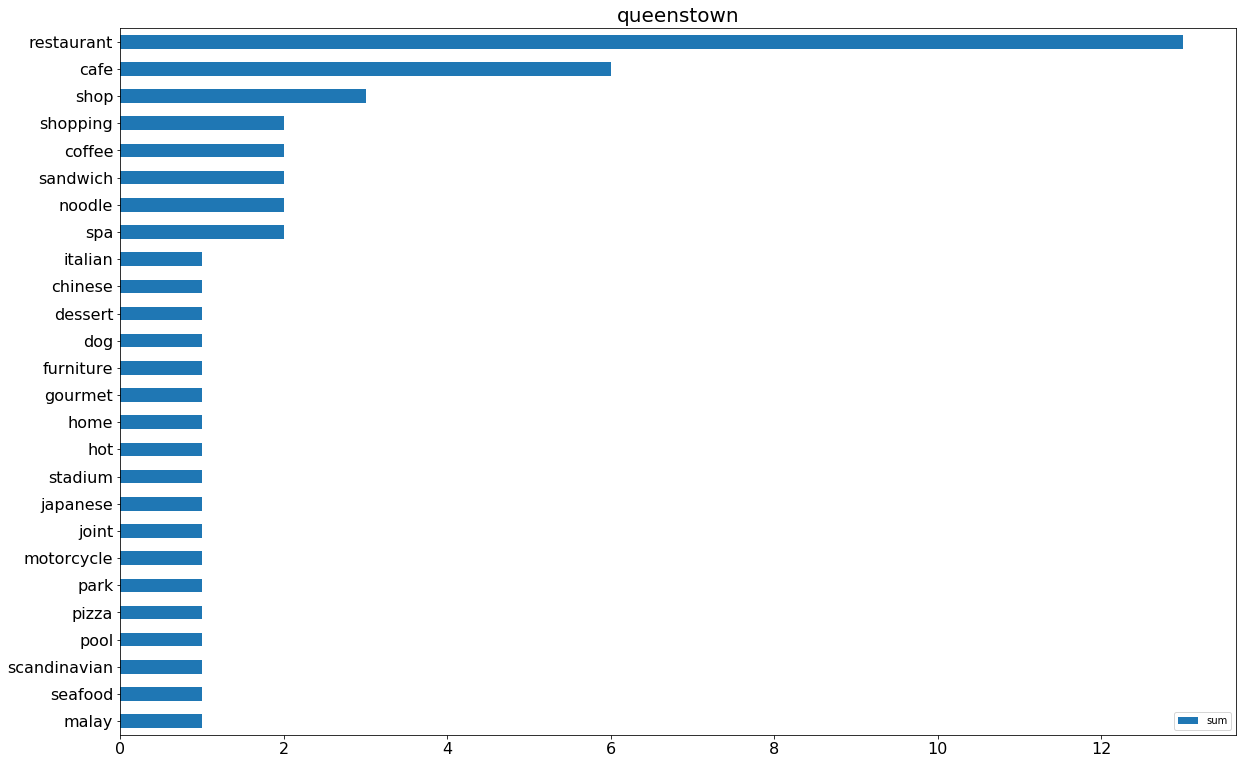

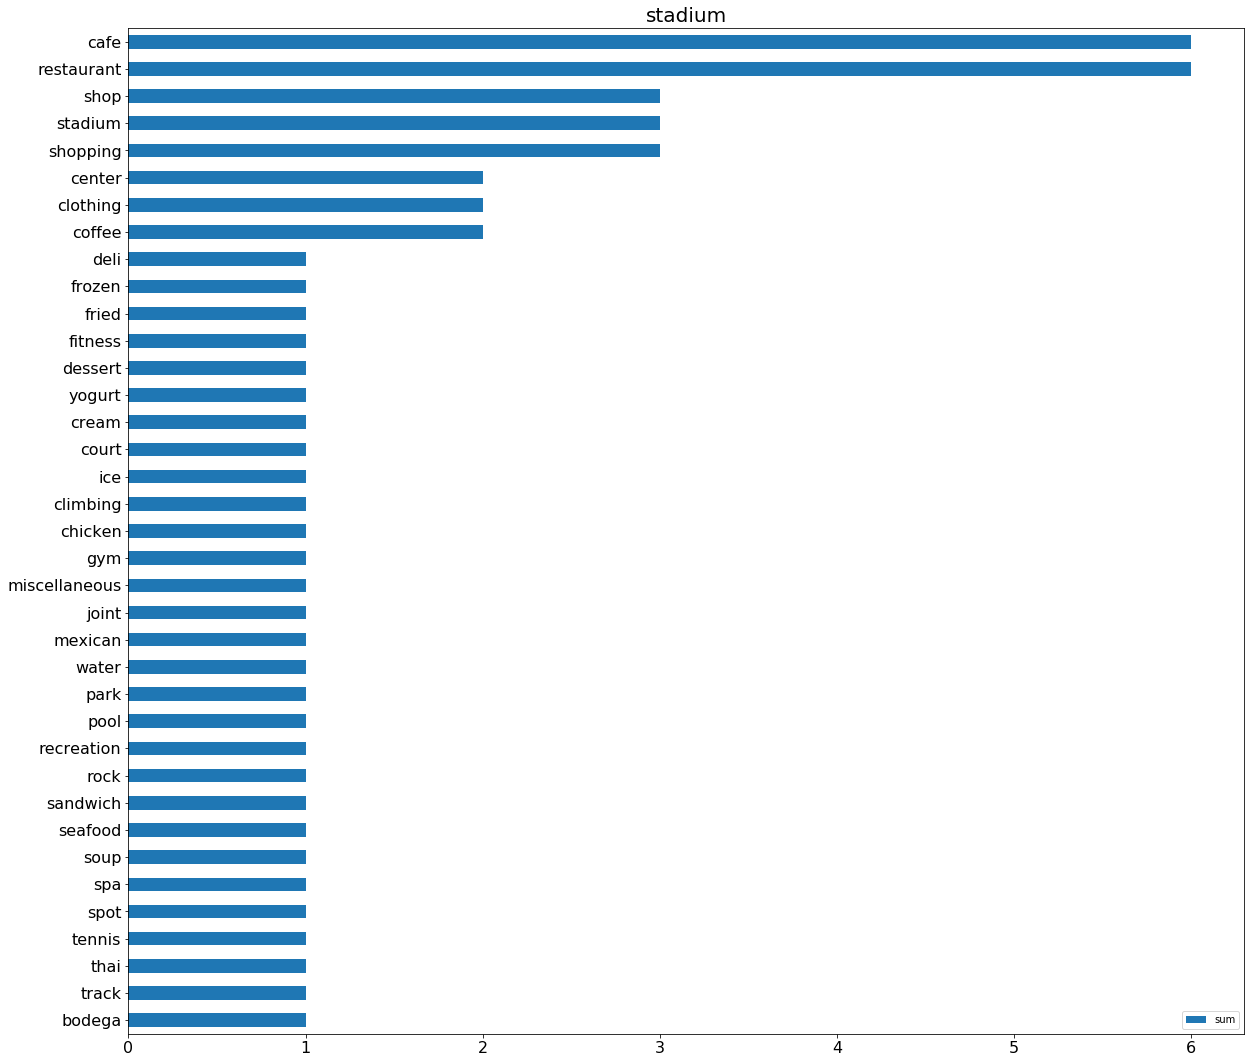

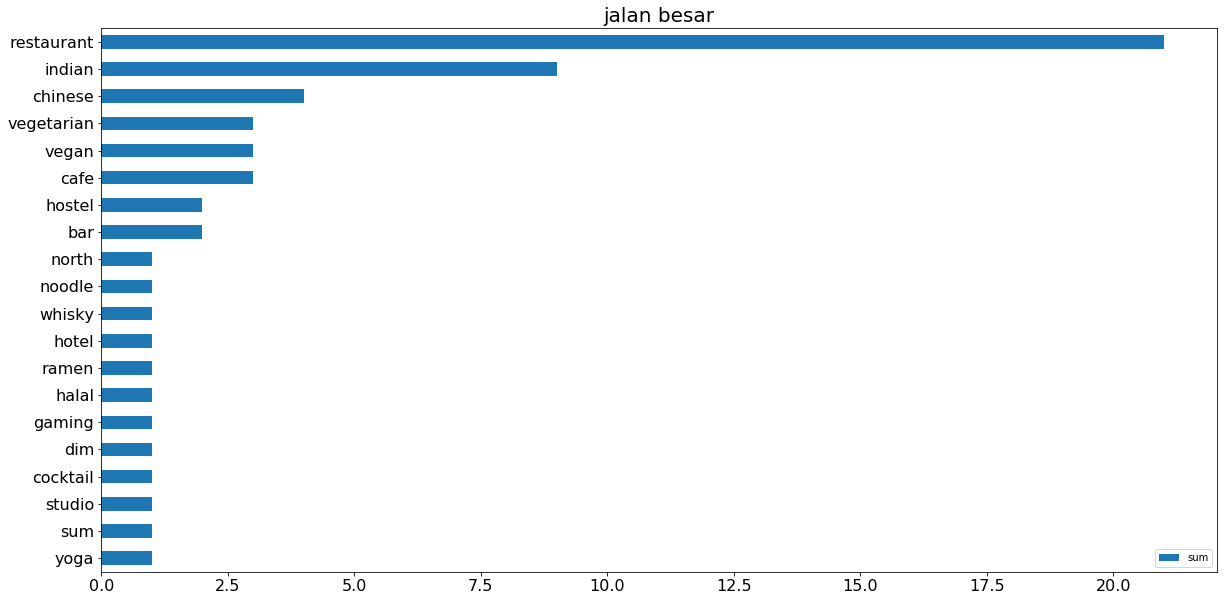

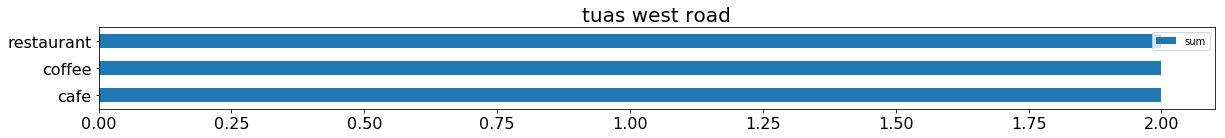

In [148]:
for i in list(df['station_name'].unique()):
    sta1 = df[df['station_name'] == i][att_place]
    sta1.loc['sum'] = sta1.sum(axis = 0)
    sta1 = sta1.loc['sum'].to_frame()
    sta1 = sta1[sta1['sum'] >0]
    sta1.sort_values('sum').plot(kind = 'barh',figsize = (20,len(sta1)/2),fontsize = 16)
    plt.title(i,fontsize = 20)
    plt.show()

## After review all station 

find out that major of every station are about
  - restaurant
  - cafe
  - bar
  - shop
  - gym
  - shopping

In [45]:
att_place

Index(['airport', 'alley', 'american', 'apartment', 'arcade', 'area', 'arena',
       'aristocrat', 'art', 'arts',
       ...
       'warehouse', 'water', 'waterfall', 'waterfront', 'whisky', 'wine',
       'wings', 'yoga', 'yogurt', 'zoo'],
      dtype='object', length=335)

In [121]:
df_f1 = df.copy()
df_f1['identity'] = 1
major_list = ['restaurant','cafe','bar','shop','gym','shopping']
df_f1 = df_f1.groupby('station_name').sum()
for i in major_list:
    df_f1[i] = df_f1[i]/df_f1['identity']
df_f1 = df_f1[major_list]

### Using K-mean to make station cluster

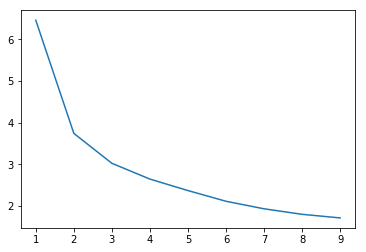

In [122]:
from sklearn.cluster import KMeans

inertia = []
range_k = np.arange(1,10,1)
for i in range_k :
    model = KMeans(n_clusters = i)
    model.fit(df_f1)
    inertia.append(model.inertia_)
    
plt.plot(range_k,inertia)
plt.show()

#### 5 is the good cluster 

In [123]:
for i in [5] :
    model = KMeans(n_clusters = i)
    model.fit(df_f1)

df_f1['cluster'] = model.predict(df_f1)

Check the clustering

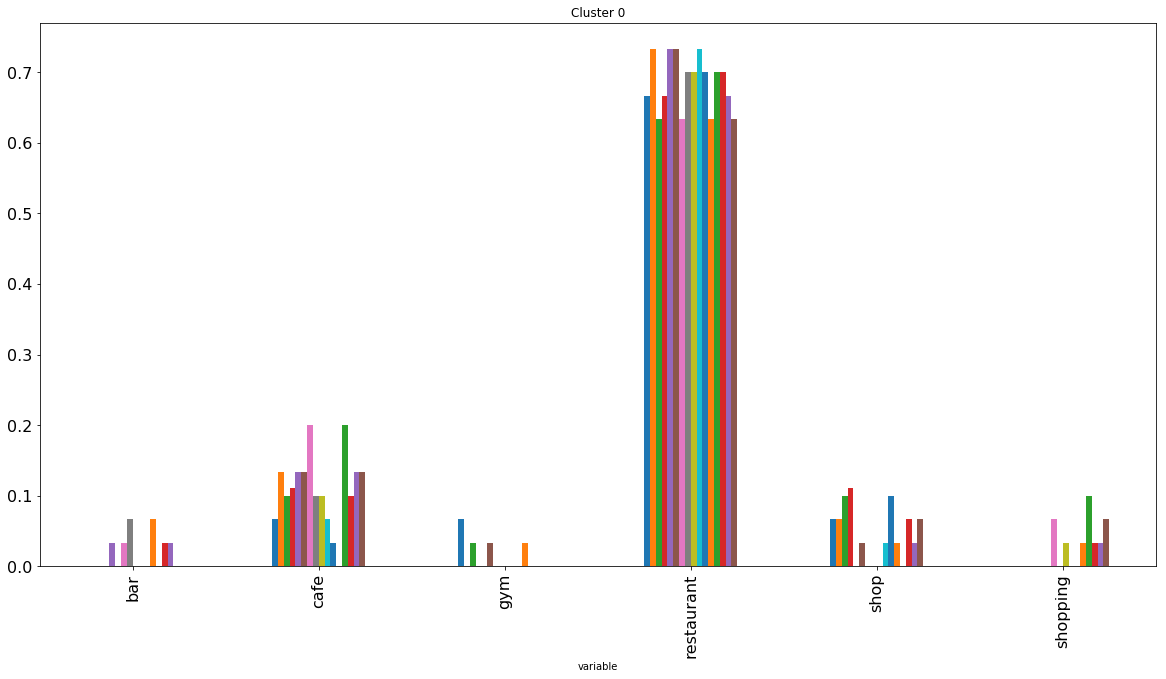

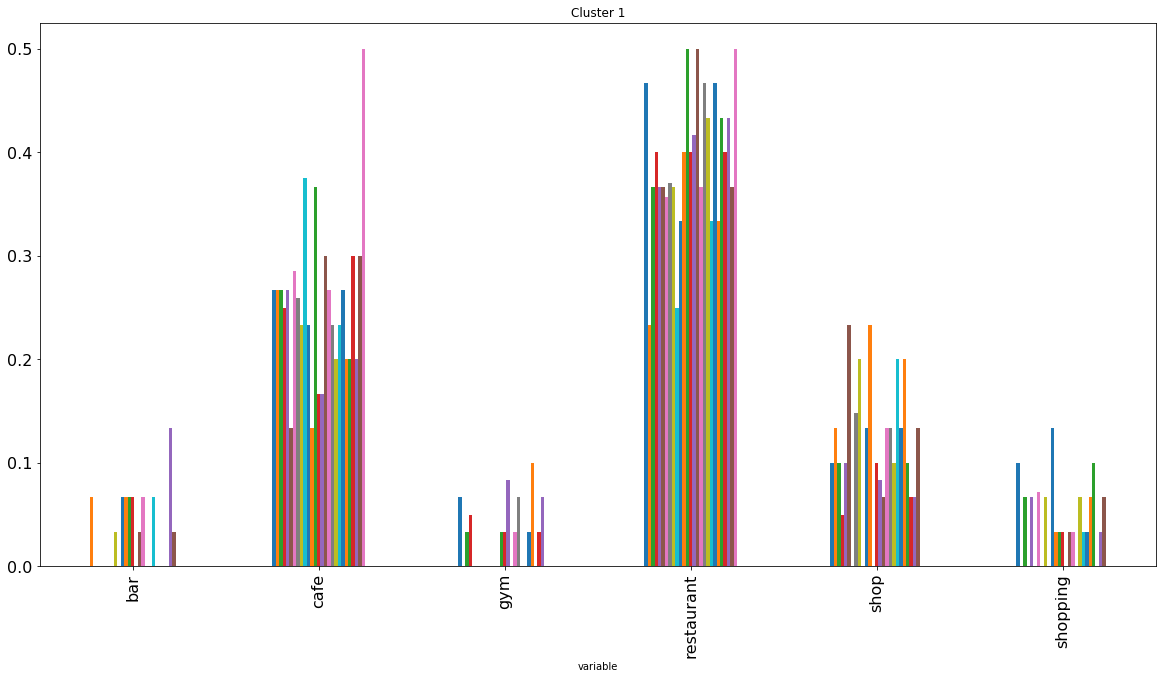

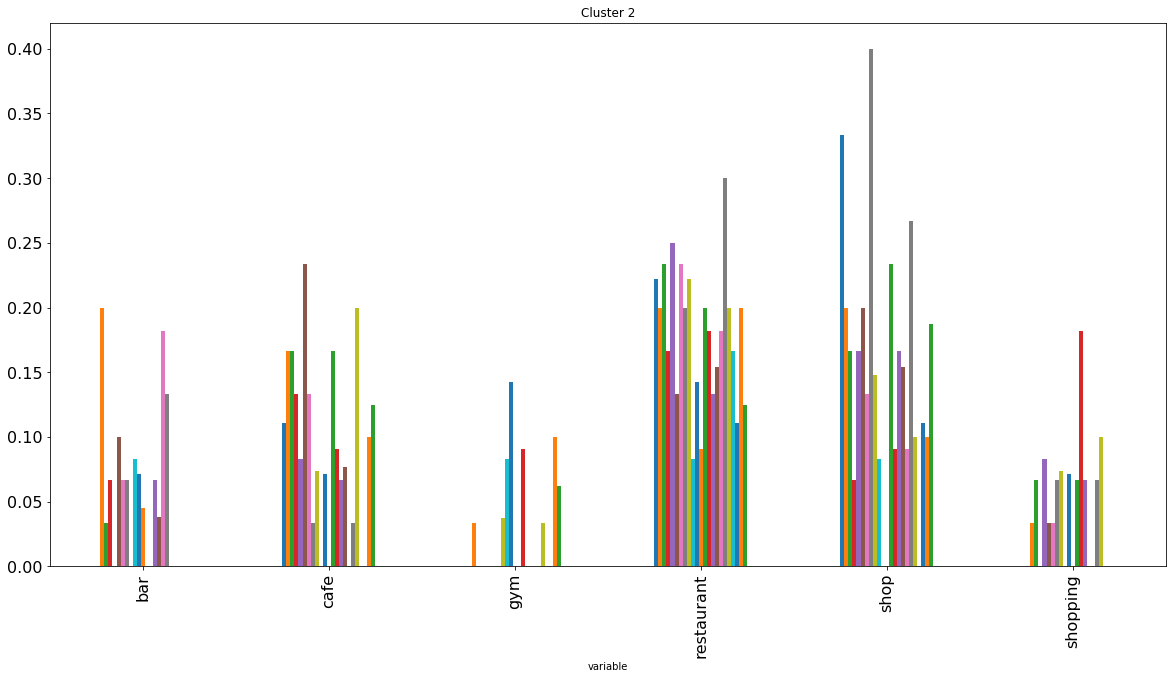

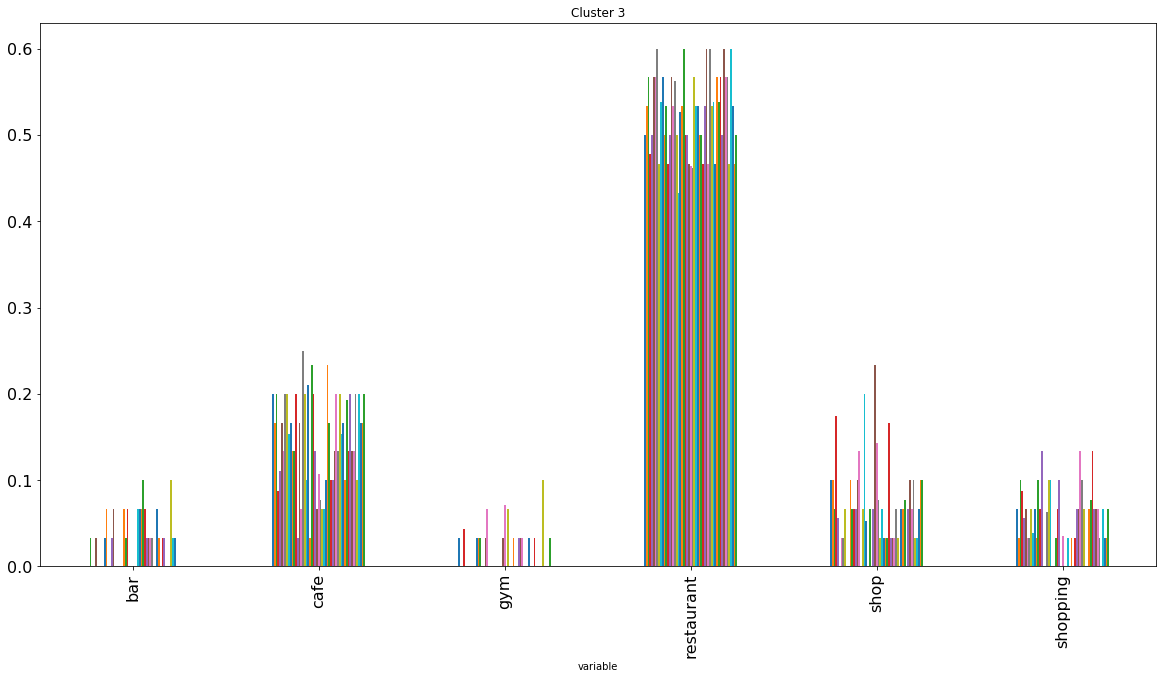

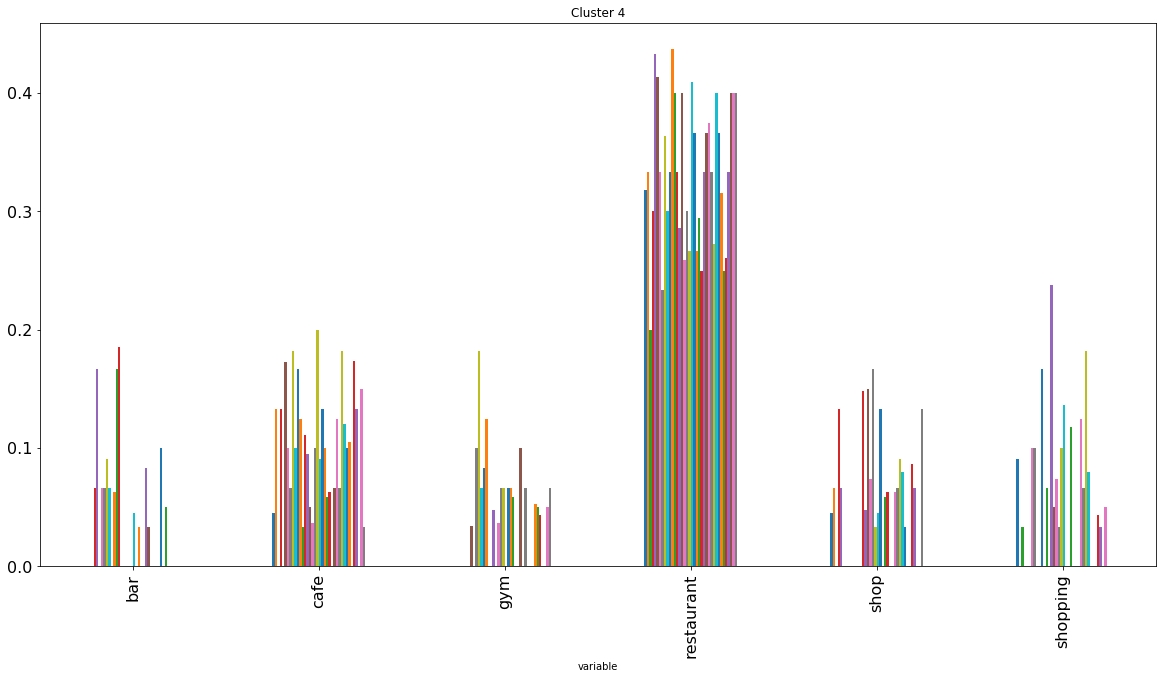

In [126]:
df_f2 = df_f1.reset_index().melt(['station_name','cluster'])
df_f2 = df_f2.sort_values('cluster')
for i in df_f2['cluster'].unique():
    df_f3 = df_f2[df_f2['cluster'] == i].pivot_table(index = 'variable',values = 'value',columns= 'station_name')
    df_f3.plot(kind = 'bar',figsize = (20,10),title = 'Cluster '+str(i),fontsize = 16,legend=None)
    plt.show()

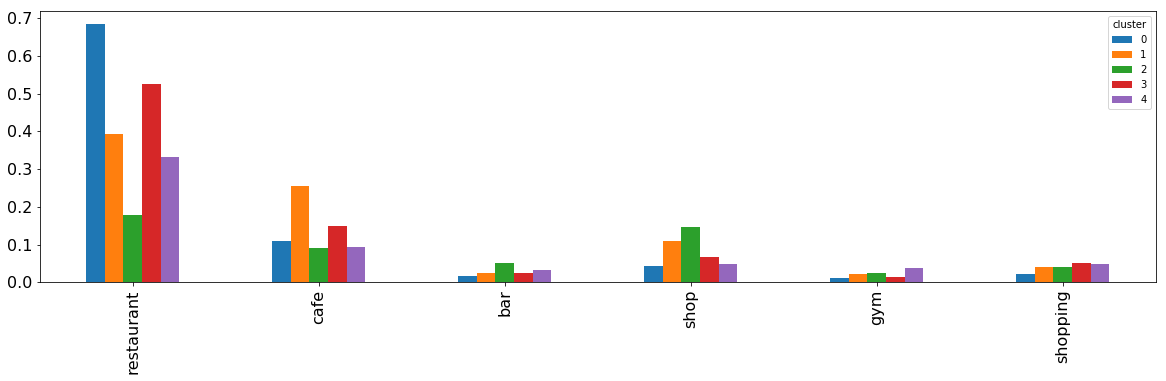

In [150]:
df_f1.groupby(['cluster']).mean().T.plot(kind = 'bar',figsize = (20,5),fontsize = 16)
plt.show()

From the cluster, we could define the meaning that ;  
 - Cluster 0 : Focusing on Restaurant
 - Cluster 1 & 3 : Focusing on Cafe but 1 has more shop
 - Cluster 2 : Focusing on shop and bar
 - Cluster 4 : Mixture of every categories

## Make a map from cluster

In [129]:
import folium

mrt_location = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets/287088/590207/mrt_lrt_data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1588937460&Signature=B75s9E01PhnGWNO73yUY8bDuYKr15gYSXobk9sfvCNDWMrqKXc1ZLxBK8Xn4DBcs1znG63oCGMedAFz9nnxo6MKjQDh6TXnRmF8VFFlNh2RFN5x3KqX5AfQAiWk9rnBK80p4Q9sFRzouYMDhN7iHKGtsn6oZAmtD66u8ceIwESss%2FmV0xp69EyLXtaTQC3mSlC4iPcC4Q%2FUq2AY59PSHrOUHWX3TpQyupPiwXdO63ONwjVUZH3KcTxVoKJbmyoNuz2%2FpSIbQ4A4JMvbPHouZF6Z%2BCx%2FNbaW%2BBHhiurq1zemczU6%2FZ8ILFIKdK46w%2FKHaroMLHyZE7YfO1uBCaBCShg%3D%3D&response-content-disposition=attachment%3B+filename%3Dmrt_lrt_data.csv')
mrt_location['station_name'] = mrt_location['station_name'].str.lower()
df_map = pd.merge(df_f1.reset_index(),mrt_location[['station_name','type','lat','lng']],how = 'left',on = 'station_name')

color_name = ['blue','orange','green','red','purple','black','lightblue','grey','yellow','brown']
coler_dict = dict(zip(list(np.arange(0,10,1)),color_name))

m = folium.Map(location=['1.3521', '103.8198'], tiles = 'Stamen Terrain', zoom_start=12)


for i in df_map.index:
    folium.CircleMarker(
        [df_map.loc[i,'lat'], df_map.loc[i,'lng']],
        radius= 8,
        popup = (df_map.loc[i,'station_name'] + '<br>'
                 'Cluster: ' +  str(df_map.loc[i,'cluster']) + '<br>'),
        #         'Traffic level: ' + str(traffic) +'%'
        #        ),
        color='b',
        key_on = df_map.loc[i,'station_name'],
        threshold_scale=[0,1,4,3],
        fill_color=coler_dict[df_map.loc[i,'cluster']],
        fill=True,
        fill_opacity=0.9
        ).add_to(m)
m


In [151]:
coler_dict

{0: 'blue',
 1: 'orange',
 2: 'green',
 3: 'red',
 4: 'purple',
 5: 'black',
 6: 'lightblue',
 7: 'grey',
 8: 'yellow',
 9: 'brown'}

As we could see harbourfront and orchard belong to cluster 2 for shopping

And most of stations on middle of SG are cluster 4 which have a mixture type like chinatown

## Finally, Make Some Recommender to the user

The use will key their preference from min = 0 to max = 0  
And ML will recommend them the type of station they should visit.

**Make ML Function**

In [136]:
def ML_Recommend():
    list_answer = list()
    for i in major_list:
        print('for 0 - 5, what do you think about :',i)
        x = input()
        list_answer.append(int(x))

    df_t = pd.DataFrame(dict(zip(major_list,list_answer)),index = [0])
    df_t['restaurant'] = df_t['restaurant'] + df_t.mean(axis = 1)[0]
    df_t = df_t/df_t.sum(axis = 1)[0]
    return model.predict(df_t)

### Cafe lover

In [141]:
ML_Recommend()

for 0 - 5, what do you think about : restaurant
1
for 0 - 5, what do you think about : cafe
5
for 0 - 5, what do you think about : bar
3
for 0 - 5, what do you think about : shop
0
for 0 - 5, what do you think about : gym
0
for 0 - 5, what do you think about : shopping
0


array([1])

### Food lover

In [142]:
ML_Recommend()

for 0 - 5, what do you think about : restaurant
5
for 0 - 5, what do you think about : cafe
0
for 0 - 5, what do you think about : bar
0
for 0 - 5, what do you think about : shop
0
for 0 - 5, what do you think about : gym
0
for 0 - 5, what do you think about : shopping
0


array([0])

## Shopping Girls

In [143]:
ML_Recommend()

for 0 - 5, what do you think about : restaurant
1
for 0 - 5, what do you think about : cafe
3
for 0 - 5, what do you think about : bar
2
for 0 - 5, what do you think about : shop
5
for 0 - 5, what do you think about : gym
0
for 0 - 5, what do you think about : shopping
5


array([2])

# Thank you for reading